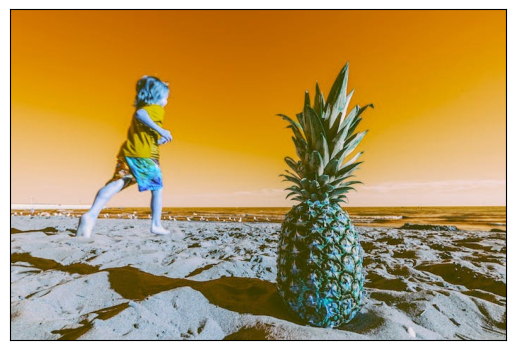

In [1]:
import cv2
from matplotlib import pyplot as plt
pineapple = cv2.imread('ascii-pineapple.jpg')
plt.xticks([]), plt.yticks([])  
plt.imshow(pineapple)


In [2]:
print(pineapple.shape)
X = pineapple.shape[0]
Y = pineapple.shape[1]

(467, 700, 3)


In [3]:
print(pineapple)

[[[209 116   1]
  [209 116   1]
  [209 116   1]
  ...
  [217 133   3]
  [217 133   3]
  [217 133   3]]

 [[209 116   1]
  [209 116   1]
  [209 116   1]
  ...
  [217 133   3]
  [217 133   3]
  [217 133   3]]

 [[209 116   1]
  [209 116   1]
  [209 116   1]
  ...
  [217 133   3]
  [217 133   3]
  [217 133   3]]

 ...

 [[176 185 194]
  [172 183 191]
  [173 184 192]
  ...
  [162 168 167]
  [160 166 165]
  [157 165 164]]

 [[179 190 198]
  [176 187 195]
  [175 187 197]
  ...
  [166 174 174]
  [164 172 172]
  [164 172 172]]

 [[184 195 203]
  [181 192 200]
  [180 192 202]
  ...
  [170 178 178]
  [167 175 175]
  [167 175 175]]]


In [4]:
pixel_matrix = pineapple
print(pixel_matrix[90][90])


[219 138   0]


### Constructing brightness matrix

There are many different ways to map RGB values to brightness, and each produces a slightly different style of transformed image. Think of them like Instagram filters. Some examples:

__Average:__ average the R, G and B values - (R + G + B) / 3 <br>
__Lightness:__ average the maximum and minimum values out of R, G and B - max(R, G, B) + min(R, G, B) / 2<br>
__Luminosity:__ take a weighted average of the R, G and B values to account for human perception - 0.21 R + 0.72 G + 0.07 B

In [5]:
import numpy as np
brightness_matrix = np.empty((X, Y))
print(brightness_matrix.shape)
for x in range(len(pixel_matrix)):
    for y in range(len(pixel_matrix[x])):
        pixel = pixel_matrix[x][y]
        # I'm going to use average
        # brightness_matrix[x][y] = np.mean(pixel[0], pixel[1], pixel[2])
        brightness_matrix[x][y] = (pixel[0]+pixel[1]+pixel[2])/3
        
print(brightness_matrix)
brightness_matrix[90][90]

(467, 700)


C:\Users\Piter\AppData\Local\Temp\ipykernel_356\1976954109.py:9: RuntimeWarning: overflow encountered in scalar add
  brightness_matrix[x][y] = (pixel[0]+pixel[1]+pixel[2])/3


[[23.33333333 23.33333333 23.33333333 ... 32.33333333 32.33333333
  32.33333333]
 [23.33333333 23.33333333 23.33333333 ... 32.33333333 32.33333333
  32.33333333]
 [23.33333333 23.33333333 23.33333333 ... 32.33333333 32.33333333
  32.33333333]
 ...
 [14.33333333 11.33333333 12.33333333 ... 80.33333333 78.33333333
  76.66666667]
 [18.33333333 15.33333333 15.66666667 ...  0.66666667 84.
  84.        ]
 [23.33333333 20.33333333 20.66666667 ...  4.66666667  1.66666667
   1.66666667]]


33.666666666666664

### Converting brightness of a pixel to ASCII

Let's map every brightness-pixel to a coresponding ASCII sign, I'm going to use the string below with symbols organised from thinest to boldest.


In [6]:
ASCII = "`^\",:;Il!i~+_-?][}{1)(|\\/tfjrxnuvczXYUJCLQ0OZmwqpdbkhao*#MW&8%B@$"
print(len(ASCII))
test = [0, 45, 100, 255]
result = []
n = len(ASCII)
for elem in test:
    result.append(ASCII[int(np.ceil(elem/4))])
print(result)

ascii_matrix = np.empty((X, Y), dtype='<U1')
for x in range(len(brightness_matrix)):
    for y in range(len(brightness_matrix[x])):
        pixel = brightness_matrix[x][y]
        ascii_matrix[x][y] = ASCII[int(pixel//4)]
print(ascii_matrix)

65
['`', '_', 't', '$']
[[';' ';' ';' ... '!' '!' '!']
 [';' ';' ';' ... '!' '!' '!']
 [';' ';' ';' ... '!' '!' '!']
 ...
 [',' '"' ',' ... ')' '1' '1']
 [':' ',' ',' ... '`' '(' '(']
 [';' ';' ';' ... '^' '`' '`']]


In [8]:
from IPython.display import display, Markdown
ascii_art_string = "\n".join("".join(row) for row in ascii_matrix)

# Display the ASCII art in the notebook
display(Markdown(f"```\n{ascii_art_string}\n```"))

```
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!
IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""""""""""^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;III;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!
IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,:,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!
IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,:,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!
IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,:::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""",,,,,,,,"""""""""""""""",,,,,,,,,,,,,,,,,,,,,,::,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!
IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!
IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,"""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllll!lllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIIllllllllllllllllllllllllllllllllllllllllllllll!!lllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,"""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIIllllllllllllllllllllllllllllllllllllllllllllll!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlIIIIIIIllllllllllllllllllllllllllllllllllllllll!lllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""",,,,,,,,"""""""",,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,"""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllIlIlIllllllllllllllllllllllllllllllllllllllll!!!l!l!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;IIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!!!lllll!l!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiii
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!!!ll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiii
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!llll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiii
llllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllIIIIllllllllllllllllllllllllllllllllllllllll!!!!llll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiii
llllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!llllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!!!ll!!llllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIII;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!llllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIlIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""",,,,,,,,"""""""",,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIII;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!llllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,"""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,:,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllll!!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllll!!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllll!!!!llll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIIIllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllIIIIllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
llllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;:;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIIllllllllllllllllllllllllllllllll!!!!!!!!llll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!llllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!llllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllll!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;I;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllll!lllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;III;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIII;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIIllllllllllllllllllllllllllllllll!!!!!!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~
!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;III;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~
!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;III;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::::::::::::::::::::::::::::::::::::;::::::::::::::::::::::::;;;;;;;:;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIIIIIIIlllllllllllllllllllllll!!!!!!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllIIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiii!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;;;;;;;;;;;;;;;;;IIIII;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllll!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;;;;;;;;;;;;;;;;;IIIIIIIIIII;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllll!!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIII;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllIllllllllllllllllllll!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~iiiiiiii~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;;;;IIIIIIIII;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllll!!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~i~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;;;;;;;;;;;;;II;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;:;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;;;;IIIIIIII;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIII;;;IIIIIIIII;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIII;;;IIIII;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;;;;IlI;;l`~:IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;;;;III!"I:I;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;i`I~,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;:^+_:IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;I;}I[+IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;;:?i}~!IIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiii~~~~~~~iiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllll!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIII;;;;;;;;;;;;III;")}~_+IlIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~iiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++
iiiiiiii!!!!!!!!!!i!i!i!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!l!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;;;;;I;;;;;;;;;;;;I;;:)[^~l-:!IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~iiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++
iiiiiiiiiiiiiiiii!i!i!i!i!i!i!ii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIllIIIIIIIIIIIIIIIIIIIII;II;IIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;:::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIII;I;;III;;I{-?"~;-~;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!iiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++~~~~
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIlllIIIIIIIIIIIIIIII;;;;;;;;IIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;I;;;;;IIIIIIIII;;;II;;)+1{^!-{:!IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiii!iiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;I;;;;;;IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;II;;;;;IIIII;;;;I:I:;,-~,:^:{`(~IIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIllllIIIIIII;;;IIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIII;;;;IIII;;;;;;l,I,"1i];+`:{1^!IIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIlllIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIII;;;;;Il,I,{+I{i~]i)?I;IIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~iiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIII;;;;;;;II:;"-!i]-,?{"?!;IIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!i!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++____
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;I;I`}i+^?I{:``{IlIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;I;I!}+l{?}[[{`]^,lIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++____
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllII;IIllIIII;;;IlIIlI;IIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIII;IIIIII;;;II;:;;;^?i!:-:!:(,1)"!IIIlllIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++__________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIllII;;II;;;;lllIlI;;;I;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIII;;IIII;;;;III;;II}+i?:(;~l(^)1"!IIIlllIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++++++____________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllIIlllllll!lllllIIIIllIIiilIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;IIIII;;^_~i{);!__`)({"!IIIlllIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++++++____________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllIIllllllIIIIllIIII;llIl++iIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;IIIII;;IIIIII;,]~++]+,i}}`{^[,!IIIlllIIIIIIIlllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++++++++____________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllIIlI;;;IIIIIIIll!!;lI;I~~!IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;III;II,(~+i+~liI^)`{,-,lIIIlllIIIIIlllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++__++_+_+_+++++__________------
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllIIllllII!I;Ii-]}[?+ii!!IIll;IiilIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;II;;;`]~_liii[:l``);+;IIIIlllIIIIllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++_______________________--------
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllIIIIIlIIlIl+[`,,^{_!l;,^,,,:Il!!IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;II:;,{__~!i~+-!_``^I!IIIIIlllIIIIllllllllllllllllllllll!!!!!!!!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~~~~~~~~~++++______________________---------?
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllIIIIl~])^^({_;^^`1}}[})",;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;II::"[i-i_i~_I-]``,lll;IIIlllIIIlllllllllllllllllllllll!!!!!!!!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~~~~~~~~+++++_____________________---------??
~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l!l!l!llll!l!l!lllllllllllllllllllllllll!!llIIII~+?}}[}{}+,))(`)[?-_-]{`"ll;;III!!!llIl!IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIII;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlI;;IIII;lI;:}~~_ii~i-;)(^["l,;IIIIIIIIIIIllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++_+________-___________---???--??
~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllll!!lllII;ii~+~!i~_~lI!i~~I:`{?__?{^:IlI;l;;IIlI;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIII;I;;IIIIIIIIIIIIIlllI;;IlIIIIIIIIlI;;;IIII;;;^?i++~i~i_I,`)]"I,;IIIIIIIIIIlllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++_____________-________-----???--??
~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllI:,:,,,"``"^;~?}{{{[]+;)]+i_](I~l;!IIIIl!lIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIII;IIIIIIIIIIIIII;III;;IlIIIIIIIIIII;IIIII:;:}+~+~~iiii~+`{-,:,;lIIIIIIIlllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++_____________----------------???????
~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllIII;:"`{}}{}[[}]^_1)1{{1)}+;)?~i_["!iIl!lI;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;IIIIIIIIIIIIIIIIIIIIII:;`_i++i+i!~!]{^]_:":;IIIIIIIllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++____------_---------------??????????
~~~~~~~~~~~~~~~i~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllI:")1{---??-__],]`1]__[}[-l^]++-?}:i!Il!!l;;IlIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII~!IIllI;IIIIIIII;IIIII;I;;:[ii-~i+i!~l^"`?-I1:IlIIIIIllllllllll!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++___----------------------????????????
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllll!!!!!!lllllllllI;"1[[}?____~ii};]{-l::Ili~!,){1)[]`l!!Illl;:;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII?+l;IlI;IIIIIIII;;IIIII;;;`_l~-~i~ii~ii,(-]!]:lIIIIIIllllllll!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++_____------------------?-?????????????]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llll!!!!llllllllII:([-[1]_~~~i!!1;_-l`)`)):+_i!~i!,(^:i?+!;,","^IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIi!llIIIIIIIIIII;;;IIIII;;"]~!~~~iii~~+[")?{i_;lIIIlllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++__________---------?-????????]???????]]]?
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llll!!!!llllllll;;:1-_[`[_i!!!i~);_+:()^)):?}?]11[+I,,~)I1~;I!!lIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII)"I!lIIIIIIIII;;;IIIIII;;)+!~i!+~!i+~_)^1?)i~;!IIlllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++___________-------????????????]]]?????]]]]
~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!llllll,")}"l,]_+~i!~-1l+l:^)`){^_)`)`^)]_+!Il{Il{-[}?!I;I!!lIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIl;Il;;II1};l;!IIIIIIIII;;iI:II;l,[ii+~ii!_!+I,1)`-I!,IlIIIlllll!llll!!!!lll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!iiiiiiii!!iiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~~++++++++++++++______----------????????????????]]]]]]]]]]]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!lllllI")}?);"-+++~!+?1I~I")}}]_}I[`";,^}?]_i~l-1^:,^)~lIIllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlIIl;;I;}?"I:II;IIIIIIIIIlI;II;l1-i~_+i!i_!~il^`(?l!,IlIIIlllIl!llll!!!!lll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiii!iiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++~+++++++++++++_______-----------????????????????]]]]]]]]]]]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllll!lllllI`}_~[^)+~++~i_})IiI`[--+i-"-),l:^1{1}--]-?{";,^+iIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlIIl;;I:?~1I:;l;IIIIIIIIl;IlI;;:?~i+-+i!+-!i-_:^)[iI:;IIIIIlIllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiii!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++_________----------???????????????]]]]]]]]]]]]]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ll!lllllI`]+!_}[ii~~!!-1^l+l(?+~++[;?1`,"^1)^)]?+~+-1^)_~!IlllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlIll;II"-![;;I!IIIIIIIIIl;II;II)+i~__iii__!!}]:`11+,:;IIIIlllIlllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiii!!iiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++__________--------???????????]???]]]]]]]]]]]]]]]]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ll!lllll;`]+i+_+!!ii!!?),!_!1+i~_]^~[}}{```^:^}]+I::;!iIIIIl!lIlllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIlIlI;II^+l-,IIilIIIIIIIIlII;:!:?~~++~ii~-+!l`}^))`_);;IIIIlllIl!lllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++___________-------???????????]]]?]??]]]]]]]]]]]][[]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ll!lllll;(]+~~~i!!i~~~]),!-!}ii+?1I-]]][`"":;"1{^i,,)[`I:;I!!lIlllllllllIIIIIIIIIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllIlllI;I;(~!+);;lIllIIIIllIII;;I`~~+_~i!~_-ii!;}((`,-[;IIIIIlllll!lllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++______--_------????????????]]]]]]]]]]]]]]]]]]]]][[]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll:)?+++~~ii+-?-]{:i]~}!+]{"i-__]1,:,::^)`)~+}~^^;;II!lIIlllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllI;l;)!~i[;;IIllIIIIllII;;I"]~~__~ii+-_!~+~{)"^I-_:IlIIIlllll!lllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++_______---------??????????]]]]]]]]]]]]]]]]]]]]]]]][[[[
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll,)-~++++ii_[}]]};~}_}i-{^I+_~+}":;:,"``""}}1~:IIllllIII!llllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllI;l;1!-i?;;;IllIIIIll;;;ll1+~~_-+i~-?+l+-?1);,l-~;llIIlllIIl!lllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++_+____-_-------???????????]]]]]]]]]]]]]]]]]]]]]]]][[[[
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llll:`_~]?i!!?{}{"`?`[[l}~}"i-?i![^^,"^^()^:,1{1}-++iII!IIl!lllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII!:+_;I!lI;IIIl:{_!~_{;;lIl;IlIIIIl;;:[i~~+_~l+[]i_l;)?):I_-!,I;Ill;i,:[lllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiii~~~iiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++____________-------??????????????]?]]]]]]]]]]]]]]]]]][[[[[[
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lll;`+~[]i!+[;l":,-?-{l[_,+?}[++[`^^"^^``";;^`"`1{{-!IIll!lllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIl!;!ilI;lI;IIIl:{+i++[;;IIIIIlIIIIIII^?i~+++i!_]_~ii~,{)";ll;:!lll!I^I]-;llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~iiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++~~++__+_______-----??????????????????]]]]]]]]]]]]]]]][][[[[[[[
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllI`_~]?~~(`+?:I+)]+{![[!}(`{??{))1(^^`";!l"^,,^^`{~;Il!!IllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII:;!;Iil~l;IIIl:1~i+i]:IIlIIlIIIII;l;{_~~_~~i~-?i~!]}:1^,IlI::lIll;;"["lIllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++_++++~~~+++_______------???????????????]?]]]]]]]]]]]]]]][[[[[[[[[[[[
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllll"?+?_~?II+-Ii[!^!_i`{l1,`}]{{[]-}`^":lil,":,""`)_IIl!!llllllll!llllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIi{~"!lIIIllIl;)+i+i-"Iii;llII;II;l,?~~~_~!~-[-!!i:`){:I,~~I:I;ll";]:{:illll!!ll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~iiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++__+++~~~________-------?????????????]]]]]]]]]]]]]]]]]]]][[[[[[[[[[[[
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiii~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!lllI,{-_i+)lI:li+}_l,:!:}^(:)]])}~!~])",Ii~!::;;;:^1_lIIIlllllllll!llllllllllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII:,^),;l;lIllIl;`-i~i_);-_;ll;l;lI;;`+i+~+i!~[{?!!+~1?1II(i~;:iII;:_!;lI~llll!!ll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++__++++~~________---???????????]]??]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[[[[
++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!lllI;)]_!?I+I]}"l{{_I,;I[][:)?]1_:;+[)^:!~iI,:Il!I"}+!lIIllllllllllllllllllllllllllllllllllIIIIIIIIIlllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII^_?`:,IillllIlI^]i~i+},]};lI;l;lI;,[~i++~il+}{-ii?_[_`I,"il,;~:,I-^_{,~!!lll!!ll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~iiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++_+++++++____-----?????????????]]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[[}}[[
++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!lll;(}?_)?}:ii_`1)}];^~,]i^1?]}!:~})``,!~!I:;l!iI`]~!!llllllllll!!llllllllllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIII:i";[)"lll!lIlI^-~_~~["_);l;;!;III`_i~+_ii!+[[+i+[}1?,::IiI:Il"I?)iI~;~l!ll!!!ll!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~iiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++_____-------?????????????]]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[}}}}}}}}
++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!lll;(}[]"1[`!~!{{]));{?[^I{}?]]lI{""^("li!il!~~~I(]ili!!!Illlllll!llllllllllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIII,!+ll`:lll!l;II"++?~~[^i^;I;;i;IIl1~i++_ii!~]?i!+1":1,,lI!;Il:,]""+`l!lill!!!!ll!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~iiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++___-------??????????????]]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[}}}}}}}}}
++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!l!,())^!?}"l):"{1[);!i^{;_1__-l[",^[]^I!~l+_ii+I}+~lIl!llllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllIIIII;)i!-+]:Il!lIl!;)~?i~i[{"`_"!;!II!^-i+~i~i!!?{-!~1~:"^:,Il~";;:{,:I+],!l!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++___-----??????????????]]]]]]]]]]]]]]][[[[[[[[[][[[[[[[[[[[[}}}}}}}
++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!lI^}]1I_]},[~]!}""[:?~`):;1?+~i{^;1~+`!!!i~-+~+l)+illl!!lllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIIIII;{ii-~?,II!lIl!:1~?_-]`_}{[,lIlIIl1_~~ii~ii~[{+!?;}I"^:":I?`);-"^:+I~;iIll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++____---????????????????]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[[[[[[}}}}}}}}
++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!l;)_~1+{{)+~1^-~1^l^`+));[][+~_)){i"l)Ill!l+_!!l)i!ll!!!lllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIIIII;[i~-~-^IIllllI^[+-?-(I!}-)IIlIIl:]++i!~~ii_}]li{?,!"^:""I?{(_^I^!?1:!i;Il!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++_____----?????????????????]]]]]]]]]][]][[[[[[[[[[[[[[[[[[}}[}}}}}}}}}
++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!l,{+i}i{)){(1`[:i~{[^~[]:!!?_-}`}!,"i1":l!I~_liI[IlIl!!lIllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllIIIII;?~~_~+)I;llll;)?+_]~`~i,l^~;!IlI^_~_il~ii+]{_I+"{Il^^:^`!_}i^::I-+~:~!IIl!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++_++_____---??????????????????]]]]]]]]]][[][[[[[[[[[[[[[[[[[[[}}}}}}}}}}}}
++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!l^[~i]"_)}[^))?),{?_1I!"{;)!_}11?l;I-})"Iii--i+;+;;IlllIIllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllIIIII;-~+_~~{I;Il!!:{_+_]i)~~i,1]I!;l:{i~-il~!~_}{+l[!{:,`,:^)i+)1;;;_]";l+liIl!!!!l!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++_+________---??????????????????]]]]]]]]][[][[[[[[[[[[[[[[[[[[}}}}}}}}}}}}}}}
++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!I`]~~-{;--i}^{;]^[[+{"`++![,-11[_iIl+]1,li+-_~l1l;IllllIIl!!!lllll!!!!!!!llllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllIIIII;_~++~~[IIIl!l,[++-}+)l~!`~1iIll^?i~_i!i!i_[?!i(~},``;:^^i-^^,Ii[_?:~il~ll!!!ll!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++__+________---????????????????????]]]]]]]]][[[[[[[[[[[[[[[[[[[}}}}}}}}}}}}}{{{{
++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!lI^[+i-1"::"~}i[?^)[~)")~-[1;?11[?i!~-[`li+-__i)~lIllllllll!!!lll!l!!!!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIllllllllIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIllllllllllllllllllllllllllllllllllIIIII;_~~++i];lll!l"]++?]?);+;)^"_:!I)~~+~ii!!i_?+l-:+1,)^l"`"i+^,"i-]:lI~l!i!!lll!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++______-----???]]]]]]???????????]]]]]]][[[[[[[[[[[[[[[[[[[[}}}}}}}}}}}}{{{{{{
++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!lI,1+i[",)?},i1~1;"?!^,^?{^,i[1){}_]1`),~+]]??~[;~!!!!lll!l!!!lll!ll!l!!!!llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIllllllllIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIlllllllllllllllllllllllllllllllllIIIIII;++~~+~?;!ll!l^]++--?):?:)]:-"iI{i++i~i!l_?[_i{~]^:1"l^`:~l1I;+__};!!;il!llll!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++____------????]]]]]]????????]]]]]]]]][[][[[[[[[[[[[[[[[[}}}}}}}}}}{}}{{{{{{{
______++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!i~~il;:,1--{1[-+-]_l))]1+"~:;[_!_1)11{^":;I!_]}_?--^:~!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllI!l;!,+!~+i-i^I!!!!"]+-_]~^I~l(!`(,I;~++i!~~ii+_]!_I-[!`},I`):!I^:+-+!lll!!!!ll!!ll!!!!!!!!iiiliIiiIii!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++~~~~++++________--------?????????]??]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[[}[}}}}}}}}}}}{{{{{{{{{{{
________++++++++++++++++++++++++++++++++~~~~~~~~++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!iiiii~!I:;:(]-]?+-_+_ii,,,!`+)?-`1??{{[]-(^:Ili_-?-[-]Ili!!!!!!ll!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllIlI!lIl"+i++i?~^I!!i!"]+-_]~^;~l)i)`I;"~+++ii!i~++_~{~?{I1}";``:li):+_?`llll!!lll!!!!!!!ll!!!iii~+!iili!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++~+++~+++++________------??????????]]?]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[[[}}}}}}}}}}}{{{{{{{{{{{{
____________++++++++++++++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!iiii!lI,^"`[-?_i~+~ii_:`I-l["1]`,1}1{{{{^,;!~+___]}-]~_l!!!!!!!l!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllllllI!lIl^ii~~!-~1lllii^?___]+`,+;}i[^+"{~_iii!i~~_++?:_?);}{:,^":Ii1I__-+lll!!!!!!!!ii!!l!l!!!iii!~!!ii+iiiiiiii!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++~~++++++++++++_______-----?????????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[}}[[[[}}}}}}}}}}}}{{{{{{{{{{{{
-------_________++++++++++++++++++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!l;:`^`}--_~!ii~+?`i}+_);"{^,`1{}{`:;;I!~+++-]]_-!-l!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllllllllllllllllllll!I!lIl`!i~~!-~}!ll~i`?-_-]+1(+^-!-,}(-i+!!!i_-+?--1!_-":](;"",,;,(!??l;l!!!!!!!!l!i!!!!!!!!!!iii~i!!!!Iiiii!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++______--------??????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[}}}}[[}}}}}}}}}}}}}}{{{{{{{{{{{{
---------___________++++++++++++++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!I;::"}_~i!!~i~--?[})i{,"[{,,^1[}`I!lI;Il!!--?-_,~l!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!IllII)i+~~!_+{!ll~!(---??~][~1+!~;`{~~!--~i+---]},ii];"]^:^^^`,[:+[?}:l!!!!!!!iIl!Ili!!!!!!!!!!!i!!i!l!iiiii!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++++_____---------???????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[}}}}}}}}}}}}}}}}}}}}}}{{{{{{{{{{{{
????----------__________++++++++++++++++++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiii!!!lIl;`]~!!!++ii++i~l-l_}{ll:I;^)):~i!I::;l!++-?~{ll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!llll!!!lillllI1~+!il~~1l!!il)---]-~_-+}+il;`]i+I`^-ii~]+}"!ii)!)]""`^1)"?!?}+lll!!!!!!l~;lilIi!!!!!!lll!li!l;,;!!iiii!!iii~~iiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++________--------??????????]]]]]]]]]]]][[[[[[[[[[[[}}[}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{
?????--------------_____________++++++++++++++++++++++++++++++++++++++++~~~~~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiii~i!llI;,,^{-i!ii~+~iiii_[1!I+[ll1^`11("lII:,^";l!i~!^+I!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!lillllI{!~i?++i}I!!!I)?_-]-~++-}+l,`[ii+Ill-++i?+)!?i+,I{[,"^,{``1~]],:il!!!!!lli:l+!li!i!!!lllI!:l;`]~?l!!iii!!!ii~~iiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++________------??????????]]]]]]]]]]]][[[[[[[[[[[[[[[}}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{{
?????????-------------__________++++++++++++++++++++++++++++++++++++++++~~~~~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiii!lI:,^`")]+!!!i!++~~i+}`)"}"-i+i+i!~__?`^`){1^:l!I^-;I~!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!llillllI}!_-"([~[;i!l:)?_-[_~~~]1~I)}~;!+l~I+][~_-^-{~_:,{{:":;1,);+[?1:~!!!!!llI!,!-~!il!!!llII;{]1)[~I_l!!iiiii!iii~iiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++________----????????????]]]]]]]]]]][[[[[[[[[[[[[[[}}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{1{{{{
??????????????????---------___________+++++++++++++++++++++++++++++~~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiii!!lI;")}{[-~iii!!!+___-]{1{1(,l~+___+______-]1^,,l)lIiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!ll!lilIiI]!+_]][`[,ii;`}??---+i~-}i+]}(I-!)!?^"}]ill[}i];:1""`"I,1[~]_-I!!iII!lIIll~;i},~I!II!i:}-!^:+l+_!^!!Iii!+iiii~~iiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++___--------????????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{11111
???????????????????----------_____________+++++++++++++++++++++~++++~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiii!l;,^{{[-~iii+~~_?}`::;;;Ii+_------?-??-__[^I;{~!~!li!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!ll!l!lI!:?i++-+_[?!~l,)[??---+i~-}~~[+?I_I;!{"1?_~+~[]![I:}}`""l;}`+?-ll!i;_!;ii;ill:"l]iIlil"}?--1Il"{-i!?;~li~i~i!iiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++_____--------??????]????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{111111
]]]]]]]]]]]???????????------------___________+++++++++++++++++~~++++++~~++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiii~iiii!lI,(]+ii+__-[1";!~___-----???????????_+-):^~:i+!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!l!lI!"_~++_!l++,!l^{}?---_+~~-{~!}"!i~i-l,:?_~[]?{]i{l"??`,^::[I--?[I!i!ill~:I1-,:}i1_ll,1?+~_?l!!i!`[?~"+!i~iiiiiiii~iiiiiiiii~~~~~~~~ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++_______-----------???????]?]]]]]]]]]]]][[[[[[[[[[[[[[[[[[}}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{11111111
]]]]]]]]]]]]]]???????????-?------------_________________++++++++++++++++~~~~~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiii!!!!ll^?~~+---}^Ii+__--??---_--------+-??_-]{]!!~!!~!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!ll!!!!ll!lllll(~+~_-ili~_^I^}[?---_++~-1~!]]l_!1[:!l__~,[})[_`I)+[^^11()+-__Illl_Il+:"?;)",[`l[;`?~+++]"Illl!iI"-"~~i~iiiiiiii~~~iiiiiii~~~~~~~~i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++________---------????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{1{{1111111111
]]]]]]]]]]]]]]??]?????????????-?-----------_____________++++++++++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiii~~~~iiiii~ii!!!!!:)]_-?]}`:!ii+_-______--___+__--__-???-_+i~~I!~l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!ll!l!llI1i~i-?+!!i!-1`)-+---+++~_)~i+ii_;!],_~++~![{`)},:[~{}]}[}:_-+l"lIIll!I:?,^^l`1}?i{+~~~~-^+lii!l~~I^;!~~ii~iiiiii~~~iiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++___________------????????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{111111111111111
[[[[[[[[[]]]]]]]]]]]]]]]]]??????????------------_____________+++_+++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiii~~~~iiiii~~iiii!!:)]_-[,i?1`)}]_i__++__--______--]?--???--il!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!llll!ll:}iii??__il-ii{(_i-__~~_~_`++i!~~,??;]_+iii[{^"`;:]_}+i1)1i_-+),!;IIlI!}"^`1}1`}~{~i+~!+(l!!!i~i!!!il!~~ii~iiiiii~~~iiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++_______________----????????????]]]]]]]]]]]]]][[[[[[[[[[[[[[[}}}[[[}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{1111111111111111
[[[[[[[[[[[[]]]]]]]]]]]]]]]]]????????-----------___________________+++++++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiii~iii~~i!;1-?)I]`";!l;,{_-____________-??]?---????+ll~i!i!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!ll!!lI,}+ii]?-]~l-~!+}[_+__~~_~+`+~i~ii!{?~[--i_-{1",";:{}{_-",,__-+~I!I!!;l}:^):{1)`:~+!_~i_`!!:iI!+ilii~!iiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++_____________------???????????]]]]]]]]]]]]]][[[[[[[[[[[[[[[}}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{{111111111111))))
[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]????????-?-------________--__________++++++++++++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiii~ii!,[-^?(^`",,,l+!,_-___++~______----??---?-?iIi+i~!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!l!!lI"}_+~[??{_lI]-l_`{!+_~i_i+^+ii-!+}(??}?]+]}((",";I^``1`;;l]__+,i!IiI;["1(;,)}")l!_+~l_,~lIi~!i!I!~!l!~i!~~!~iiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++~++++++++____________--------??????????]]]]]]]]]]]]][[[[[[[[[[[[[[[}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{1{{{11111111111))))))
}}}}[[[[[[[[[[[[]][]]]]]]]]]]]]]?]]]]]]]]????????-?----------------________+++++++++++++++++++~~++++++++~~++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iii!ii!i~iI"]`[^`^,,:;;;IllI~i[--[_~~~~__----????--?-~i!!ii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!Ii!l!!!illll!lll!!!!!!!!Illl!iiill+~;,1i~~-}?_]il!-+l-{+~__i++~(_i~?;;l"+i]?{:l}1;^:I:I{:!^I,Ii?~?l,_IIi,}"``::,1^l~;+~~i+,-i;l!iii!iiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~~+++++++________-----------????????????]]]]]]]]]]]][[[[[[[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{1{1111111111111111)1)1)1
}}}}}[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]????????????-----------------________+++__++_+++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii~~~iii!iiiiil:{?^]^^"I;IIII;IIl1_-?---_+~i!~-?--???---?_~i!i!!iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllll!!llllll!~!IllIlll!!!lll!!!!!!!!i!Illll!+l;")^)+++?{[?[i-i~+!~]]~i__ii-"+{);+;i"-!-?1;i)^:""!!^"l!1-^__+??("i!ll-::):,(,l]_`;_i__`lllii!iiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++~+++++++_________-----------????????????]]]]]]]]]]][[[[[[[[[[[[[[[[[}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{{1111111111111111111))))
}}}}}}[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]???????????????--------------_____________+++++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii~~~~iiiiiiii;`--1~`::lllllIIIllI]i??+-?_+i!i_?--???----_~i!ii!iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllll!!llll!!IllI!llilll!!!i!!!!!!!!!i!lii!!i;)]__)^?__?{}[[i}~l~~!+{]!+-ii-^l:,?)_}:}i--{l+`",I"!!{i,[~1Il-?}?-iilI~`,^`;;``!~!~!]!~1~~:l+iiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++~++++++++_+_______----------??????????]]]]]]]]]]]]]][[[[[[[[[[[[[[[}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{11{{{{11111111111)111111))))))
}}}}}}}}}}[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]????]]?????????????-------------______________++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iii~iiiil"{?--^}::;;Illll!i;!{!_?+----_+~~~---??----+~!!ii!!iiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllll!!!!l!!ii!i!!ilI!i!ll!!ii!!!!!!!!!!!!I;:"}_i!_^:[+-?{}[[![+li_ll]"_i~+~~)I~`-;":^)]}~]~-)";!;lI^il]{-1:-[}+i{i;!):[1:,;,-[?1I+-~[li!li!!+iiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++________---------???????????]]]]]]]]]]]]]][[[[[[[[[[}}}}[}}}}}}}}}}}}{}{{{{{{{{{{{{{{{{{{{1111{11111111111))))1111))))))))
}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[][]]]]]]]]]]]]]]???]]]???????????-----------_-_____________++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~i~iii~ii~i;([]?+]~)^:;;IIIl!il!"-~-?_~+-??-+~__--????_+i!!i!!iiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllll!!!!!!lI;`){}{{{";;IIll!!!!!!!llll!!"}[[_?+ii?;I}+?]{{}}~++l!-iIi"{+!-~l`_{`~;iI}1)1,?}})"II!I;I)--1-~?--[ll[Ii];"[`;^,,_?I]~!+`i+Il~!liiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++______--------??????????????]]]]]]]]]][[]][[[[[[[[[[}}}}[}}}}}}}}}}}{{{{{{{{{{{{{{{{{111{11111111111111111111)))1)))))))))))
{{}}}}}}}}}}}}}}}}}}}}[[}[[[[[[[[[[[[[[[[[[[[]]][]]]]]]]]]]]]]]]]]?????????-??------------__________++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiii~i~~!,{?][?["+{":;;;;;II+~!`--]+~i~+???-__---???_+i!!ii!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllll!!!!!l;,^1[_~i!~]]}(";l!i!!!!!lllii!(_+?_}?~!_":]~[[{{{{-!+~!--!I[)]!+il"1"^!;-I}})[}[;^^;I"!!;,:-?]]^]+[?^l;;{",1",^,:^1~1+~~{i~iIiil!+liiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++____--------??????????????]]]]]]]]]][[[][[[[[[[[[}}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{111111111111111111111111)))))))))))))))))
{{{}}}}}}}}}}}}}}}}}}[[[}}[[[[[[[[[[[[[[[[[[]]]][[[[]]]]]]]]]]]]]]]]]???????????-------------________+_+++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~iii~~~~~l`}?[[1)`l]1"",,,::;+~+l1??__~!!+-?---------_~i!iii!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l;:,!;`1}-_]---]{^;!!!iii!!!i!i:?~]}[?+li`:}i[}}}{)]~_+i_[_I!{1ii~i1:^(i!{:1[1i~`?,,I:,!i,~][}]1I~+{_+!"_":)1;,):!^?`-~~1ii;l!i!!~~liiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++_____-------???????????]]]]]]]]]]]]]]]][[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{111111111111111111111))1)))))))))))))((((((
{{{{}}}}}}}}}}}}}}}}}}}[}}}[[[[[[[[[[[[[[[[[[[]][[[[[[]]]]]]]]]]]]]]]]]??????????--------------_________++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~iiii~~~+~I)]?{[)""l??)(^",:;I!i+i"]-]]+!li+_+????--___~i!iii!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l!!!!llIII!l"("^}_!i-1"ll!ii!!!iI~i}i_}__+!+"!`l[[[[[1[-_+~_}]iI]1~!_+_~`{~_``{{{,I;1,";,!!i`{+-[]:---?~"iI`"`{,:"),~`)I!_-:_IiI~!!~il~iiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++_____-----??--????????]]]]]]]]]]]]]]]]][[[[[[[[[[[[}}}}}}}}}}}}}{{{{{{{{{{{{{{{{1{{111111111111111111111))))))))))))))))(((((((
{{{{{{{{}}}}}}}}}}}}}}}}}}}}}[[[[[}[}[}[[[[[[[[[[[[[[[]]][[[[[[]]]]]]]]]]]]]]]??????????--------------__________+++++++++++++++++++++++++++++~~~+~~~~~~~~~~~~~~~~~~ii~i~+~ii:{??{{{`:i_?{{)^^`,l;!+~l^]i_+??!l++??-_?[?++~i!iiiiiiiiiiiiiiiiiiii!!!!!!!!iiiiiiii!!!!iiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllll!!!!!!!!llll!!!!!!!lIIll;`1[+~-]^:l!!!i~ll~~`-_[}-!+i{+(!+-][[{1?+_i]-]+lI{]!+~+}^1~}{`?}-i_~^)""!^i~I]}+[i1--]?^:^}:1}`,I1^-{),?!!I+:_]:!!~i!i!iiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++~~++++++~~~+++++______--------????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[}}}}}}}}}}}}}}}}{{{{{{{{{{{1{{{{1111111111111111111)))))))))))))))()))(((((((((
{{{{{{{{{{}}}}}}{{{{{}}}}}}}}}[[[[[[[[[[[[[[[[[[[[[[[[[[]][[[[[[[]]]]]]]]]]]]?]????????????-------------_________++++++++++++++++++++++++++++~~~++~~~~~~~~~~~~~~~~~i~~i~~~~i,{??-]}1^:!+-]{)`^^^;!~+!:}_?}-+-+li~___-??-~~i!ii~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!iiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllll!!!!!!!!llll!!!!!ii!!!!!l^`^)[?+?}^Ii~il!i!iI[~?1]i+_)~(!~?[][{)?~_i?_]+~!_}_!+_!i+^-1-!?:l]l1^:;:I~{([?_--,-_}?i;+`"}}":({!^`]+~i,~;[^+{!!l+i~~iiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++~+++++++____---------????????]]]]]]]]]]]]]]][[[[[[[[[[[[}[[[}}}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{11111111111111111111))))))))))))))(()))(((((((((
{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]?]?????????????-------------__________+++_+++++++++++++~~++++++~~++~~~~~~~~~~~~~~~~~i~~~~~~~!"[?]-?][}1^"i?}[}("";Ii~~l^}_]-_[]_?~+-?????~~i!ii~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llll!!!!!!!!!!ii:]+[111{!~?)Iii!!~!i~)+-()+-}`!`!~][]]}`?~-~-+]_-+I}}l+-:,!^^]!~I?l^I{::;`+;`]}_?_`i-_[i)i)"1[1,`}"!{+"]+!I~I_`l{-~l+!l!iiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++________-------????????]]]]]]]]]]]]]]][[[[[[[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{111111111111111111111111))))))))))))))(())(((```````
{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]????????????????-----------____________+++++++++++~+++++++~+++~~~~~~~~~~~~~~~~~~~i~~~~l`]-?}-~+]{{}"!][]{`",;l~_+l,?i_]++?-ii~_-_--~~iiii~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!i!!!ii~{-[{{{1_~~-{:i+Iii!i"]-)^_?)"l"i~[[??[`]i]+_+?--~I?1~~_-++I;i";[i+l~(:,,^+?+?}-}+i--?-}^]")[}1([`i^1+~~;`?~,?;-)~i!+ii~iiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++~~~~++++++++++_________-__-----?--??????]]]]]]]]]]]]]]]][[[[[[[[[[[[}}[}}}}}}}}}{{{{{{{{{{{{{{{{1111{{11111111111111111111111111)))))))))))))((()(((````````
{{{{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}[[}[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]???]]]]????????????-------------___________+++++++++++++++++++++~~~~~~~~~~~~~~~~~iii~~;1]-?[_ii-}11[(l-]][{^";!+_+!^??}-_][[?_+__++~iiiii~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l!!!!!ii?I:!l,`)1[+i+};+!!ilIl^+{^?[`^I:ii[[???`{i[___??_!i~[}!iIiI-l[?-i~?I_"^"^l:)~}??[+]--[il~1)[{`{?};i(!,?l[?I[?l-I!!l~i!+~iiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++~~~~~~+++++_________---------???????????]]]]]]]][[[[[[[[[[[[[[[[[[[[[}}}}}}}}}{{{{{{{{{{{{{{{{{{111111{{1111111111111111)))))))))))))))))))(((``(((((```````
11111111111{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]?]????????----??---------______++++++++++++++++++++~~~~~~~~~~~~~~~~iiii!,{?_-[?_+~-})({1,i_?}1`,;!++~;^-i?_i+~!;";~_+iiiii~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l!!!!!!i!Ii_+!l;,^{-+?`I+!i!I+I+?)]{)1I;~!]]-?-``i}-__??+!-!_)~l~-![,l+!!+?,+"`,"!?+_}+--_`-?]:I[}[[""]+:;^1~!I]_";lii`,?i!_il~!i~ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++~~+++++___________---------??????????]]]]]]]]]][[[[[[[[[[[[[[[}[[[}}}}}}}}}{{{{{{{{{{{{{{{{{{{{111111111111111111111)11))))))))))))))))))((((``((((````````
11111111111111{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]????????????---------__-______++++++++++++++++~~+~~~~~~~~~~~~~iiiil^}?__[[?_~~-]^1}{`I-}[{`,;!~+!l],:;(}{{]-}:_-ii!ii~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!i!!!!IIlI;:"1[]{(lIi~~+l1+}[1}];I+l??-?_)"i}-__--+_-!i}[l~!li-I_+~i?;-,`,;)`~?-___]!??i1-]--1:)?1i:}::-~;^Il]~-I~i!l~i!_+~~~~ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++___________-------??????????]]]]]]]]]]]][[[[[[[[[[[[[}[[}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{11111111111111111111111111))))))))))))))))))((````((((````````
1111111111111111{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[]]]][[]]]]]]]]]]]]]]??????????????----------________+++++++++++++++~++~~~~~~~~~~~~~i~iI`[-_+]-_++____{({}`l+?})^,Ii+++;~^!!}:;`?]^i~iiiii~iiiiiiiiiiiiiiii~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ii!!!!i!i~!li~lII:^1[[[(;+--ili_[{(?_:I-l---]+),i}____++]+~!-`l+I_!~i+i_!]~[:`,I~+-?~]_?1-[-"-1_+_(,[]!i:[Ii~,__,-+~:~;I_ii~!!ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++_+__________--------?????????]]]]]]]]]]]][[[[[[[[[[[[[}[[}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{1111111111111111111111111)))))))))))))))))))(((`(``(((`````````
111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{{{{{{{{}{}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[[[[]]]]]][]]]]]]]]]]]???????????????----------_____+++++++++++++~~~~~~~+~ii~~~~~!:)[]_~-]?+~~+?l~}(1}):+_[1`,l~+iiI{ii-I+-"?}l+i~~~iiii~~~~~~~iiiii~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!liilIIlii!;")}}}?);-1]!!}?(`]])l[!]]?-i1:_]!+_?+__iil+1?Ii~ii~~~_l-!)`^:^_-?+]~-I__[:}1)}+:"1?,+!,?~~``_i+~~(~+I!iiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++______________----??????????]]]]]]]]]]]][[[[[[[[[[[}}[[}}}}}}}}}}}{{{{}}{{}{{{{{{{{{{{{{{{{11111111111111111))))))))))))))()((``(```````````````````^^^^^^
11111111111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[]]][[]]]]]]]]]]]??????????????????---------_______+++++++++++~~~~~~+~ii~~~~+!:)[]_~_]]-+i+]`_l-111(,l-}1^;!li~~l)~"???-l(^~i~~~iiii~~~~~~~iiiiiii~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!~ilIl!iii!I"`1[_-[,~i-}-I?[{-_1!{+[[?-~1;-]i++-~_+i~!!}1lli~~~~i_![+1`,;i?___?~?I`]!)}1{}{I?i?I!;^[~,(`:i-i_I+lii!iiiiiii~~~~~~~~~~~~~~~~~~~~~~~~+~~~~++++++++++______________---???????????]]]]]]]]]]]][[[[[[[[[[[[}}[[}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{{{111111111)111111))))))))))))))((((((`````````````````````^^^^^^^
11111111111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[]][[[[[]]]]]]]]]]]]]]]??????????????--------_-_____++++++++++~~~~~~~~ii~++++i:)}]_+_?[}[_+?::1+~[){[)I-})`^l~+~+~)lI?}[?I,!ii~~~~~~~~~~~~~~~~ii~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!~~illi+_+!)__+1;l+}{[1-]?_]l^]{[?-~}:]]++~_~-_~+~I_^+l!_~~~!+!{_{^;"[?++-++-iI?)})1]-,",~;+l)[~:^i,!+_-1i~l+iiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++___________-----??????????]]]]]]]]]]][[[[[[[[[[[[[[}[}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{{111111111)11))11)))))))))))(((((((((`````````````````````^^^^^^^^^
1111111111111111111111111111111111111111{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]??]????????????--------_______+++++++~~~~~~iii~++~+!,)}]-+--?)"}_+-^,-l-^,11(:~[1(:!ili-~";_-_??ilii~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!I!~i!!!!+l,`(())-+i(_iI?{l{-[?-:,11[]?+[:{[-~i+~?]_++I!{[ll+~i~!i!{~}:,_~]~_-+-l)i![()]];^!,^+lI:_"`+I,]_~)il!_iiiiiii~~~~~~i~~~~~~~~~~~~~~~~~~~~~~+++++__+_________------------???????]]]]]]]]]]][[[[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{1111111111111111)))))))))))))))))))(((``((((``````````````````^^^^^^^^^^^^^^
))))))))))))))))11111111111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]????????????-------_____++++++++~~~~ii~~++~i;^1{[-+__-{^}+~_++-+i-):^11"i[`)"I!~++i;[+?[]_!i~~+~~ii~~~ii~~~~~~~~~i~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiilIl!iI)]_~i_1)-I_l!,i?{I+?[_^;`)[]]_?,`[]~i~+-[-~+~!-{il~ii~iii{!1l1)_?~-++?"-!"{"[-`!"??ii:"i_:]:l~~~?I-l!+!~~iiii~~~~~i~~~~~~~~~~~~++~~~~~~++++++++________----------?-?????????]]]]]]]]]]][[[[[[[[[[[[[[}}[}}}}}}}}}}{{{{{{{{{{{{{{{{{{11111111111111111))1))))))))))))))()(((``(`(```````````````````^^^^^^^^^^^^^^^^
))))))))))))))))))))))))111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}[}}}[[[[[[[[[[[[[[[]]]]]]]]]]]]]]????????????-------___++++++++~~~~~~++~iI")1{[-_++_?[-+_[+!ii!!i[{))1`I~)`,li~~+_I,1_-?i~+++~~~~~~~~~~~~~~~~~~i~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiii~i;`_~+-_!!_"}il?:iIi(??+?-);^1[]]-_""}}~i~_+-?i+?~~{-!!iiii~+{i`,~_]-~_~+?"1:)1`][::~);l?i;_{]-;~-i+:~i~ili~~iiii~~~~ii~~+++~~~~~~~++~~~~~~++++++++__-_------------??????????]]]]]]]]]]][[[[[[[[[[}[}[[}}}}}}}}}}}}{{{{{{{{{{{{{{1{{{11111111111111111)))))))))))))((((((``((```````````````````^^^``^^^^^^^^^^^^^^^^^^
))))))))))))))))))))))))11111111111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}[}}}}}[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]?]????????------___++++++++~~+~~~+~i!"){{1}?_i+_-?-+_~-_!l++~l~?}{{11?[),li+-l--,[??~~++~~~~~~~~~~~~~~~~~~~i~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!i!!iiiI)?~~iii~__[`{!!{l!!]);+_]}:^1[]]-~":}{~i~-_+?~i-+i]]~l++!~++}_^-{~-_+~~~++`")1{[?l~"[i!]"-!^~;}I_[1~+l+iI+~~iiii~~~~~i~~+++~~~~~~~++~~~~~~++++++++__------------?????????]]]]]]]]]]]][[[[[[[[[}}}[[[[}}}}}}}}}}}{{{{{{{{{{{{{{{{1111111111))))1111))))))))))))))(()(((````(((`````````````````^^^^^^^^^^^^^^^^^^""""""
))))))))))))))))))))))))11111111111111111111111111111111{{{{{{{{11{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}[}}[[[[[[[[[[[[]]]]]]]]]]]]]]]]]?????????----__+++++++++~++~~+~i!`{[{)}?_i++-}}_~_~+-+!!++!li]11{1I}";li++~l~~1!i~~~~~~~~~~~~~~~~~~~~~~ii~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iil;"`{]}(`{1`}~I,,_~+}iii,{]+}],^{[[[?i^:}1~i~?]+]+l+~!-[+l-_li~i}?`,!+i__i~ii);I^}]}I^[[[I]+_!{li-l+-[!~~!ii!~iii~~~~~~~~~~~++~~~~~~~~++++++++++++_++_--------------????????]]]]]]]]]][[[[[[[[[[[}}}}}[[}}}}}}}}}}}{{{{{{{{{{{{{{{{11111111111)))11111)))))))))))))(()(((`````((`````````````````^^^^^^^^^^^^^^^^^^"""""""
))))))))))))))))))))))))))))))))))))))))))111111111111111111111111111{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}[}}}}}[[[[[[[[[[[[[[[[[]]]]]]]]]]]?????????----__++++~~~~++~~+~I"}}{1{}?_+~+-][?_++__i!i~_l~~!1!)}{"+1,l+-+~il~I[i!li+__~+i~~i+_i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiilllllllIlill!`+i~!`I_l[:i~_I?_}]`"}}[--+1;11{_?_?__+!~_+~{{l!-!i~l`+`+__-i_!i-_,l,1)-]II_]1?ll+i~I-!+}_I_Iii!+!l!!!!~_+i~~~~ii~+~~~~~+~~~~~+++++++______------------?????]]]]]]]]]]]][[[[[[[[[[[}}[}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{{11111111111)))))))))))))(((((```(((`````````````````````^^^^^^^^^^^^^^^^^^^^^"""""""
(((((((()))))))))))))))))))))))))))))))))))111111111111111111111111111{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[]]]]]]]]]]]????????---__+++++~~~++~~+~;`]]}11}?_~i~_]}]??-___~i!iI~--"I}_-])l}`^!~+~i~iI`}+!!~+++i+_~~+i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!i!l!!l!~:]i+i]")~+)!i~`[[]))^}}[--+}:11{_-_?+__+__!~]{i!+ii~!]1_i_++i+-ii:[!)!l~-i^^}`~~")?~ii_[_]++!-+!!!+~+_~i~~~+~~+__i!~~~~~+~~~~++++++______-------------?????]]]]]]]]]][[[[[[[[[[[[[[}}}}}}}}}}}}}{}}{{{{{{{{{{{{{{{{{{{1{{111111111111))))))))))))))(`((````((``````````````````````^^^^^^^^^^^^^^^^^^^^""""""""
((((((((((((())))))))))))))))))))))))))))))))111111111111111111111111{11{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}[[[[}[[[[[[[[[[][[[]]]]]]]??]??????---____+++~~~+++++i,1-?}11{]-~i~+?[]?--___+il~~+ii1-{^"`[?^];;i~~~i~-~l"1[-~!+i~-+ii~i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!iiii!i!!i~!(~++~["]!-;ii?{^~^{(}][??_],)1{__~_+_-___~i_{-li~i+~+~i+-+~_iii-l^l;I__!-?"`!!I;i!~~!}?+:-l!~i!-_iii~~~+~i^,l~_+~i~~~~~~~++++++++______-------????????????]]]]]]]][[][[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{{{{{{{{11111111111)))))))))))))))))((((`````````````````````^^^^^^^^^^^^^^^^^^^^^^^^^^""""""""""
``((((((((((((()))))))))))))))))))))))))))))))))11111111111111111111111111111111111{{{{{{{{{{{{{{{{{}}}}{}}}}}}}}}}}}}}}[[[[[[[[[[[[[[]]]]]]]]]]????----___++++++++++!^[--[11{]-_+~+-??-_-??-_+i!+-~l~1:"I_-:[1!^lil~il~l!!i!;^1?~i++ii+i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~i~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!i!ii!~;?~?+~}}ii`i+i{l!{[1[--???-^`1{-_~__--+~_-!i[[!!+i~_+i+-_+i-~I+i"l,[;i`l}(},!;`ii_~i?}~1]!~!ii~~i!~ii~+~:1[(I~ii~_~~~+~~+++++++____-_------??????????????]]]]]]]]][[[[[[[[[[[}}}}}}}}}}}}{}}{{{{{{{{{{{{{{{{{{{111111111111111))))))))))))))))((((````````````````````````^^^^^^^^^^^^^^^^""""""""""""""""""""
````````(((((((((((((((()))))))))))))))))))))))))))))))))))11111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}[}[[[[[[[[[[[]]]]]]]]]]???---_____+++~++++l)]_?[{1}]-_+i~_?]]--?---~!i~___~l;I!]!]~"(i`Il~il!!!ii~+~+"[ii_~i+~~~~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!l!li!Ii!)~+?_+-_i]I_l}-+_[{]++-?]+`^)1]_~-___+i!~~!?{~l+~!~~~_+i+~i_i]^}?+i][i_^,}I)"):[~++{-?!?!!i~_i:~1ii+-]_:{"I+_~i~_~~+++++++++_____------????????]]]?]]]]]]]]]]]][[[[[[[[[[[}}}}}}}}}}}{{{{{{{{{{{{{{{{{1{{{{111111111111111)))))))))))))))))(((`((````````````````^^^^^^^^^^^^^^^^^^""^^^^""""""""""""""""""""
````````````````(((((((((((())))))))))))))))))))))))))))))))111111)11111111111111111111111111111{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}[[}[[[[[[[[[[[]]]]]]]???---_____++++++~I)-_-[}{}]-_+ii+?}{))1{1)[+_~~+++~~i!i-:?_:1i`Iii!i~iiiiii~_,-i++ii~~~~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!ll!!i!I!iI-!?)_~-+~1!!?[)~?[]~~--]~)"1{]_~-_~+_~l!_!+1-l+~i~~++ii_i!+!_::)+_1];]]()i{:?,[!-][-;-;+;-i""i[?i-}1{]~I~~++++~~+++++++++_____-----????????]]]]]]]]]]]]]]]]][[[[[[[[[}[[}}}}}}}}}}{{{{{{{{{{{{{{{{{{11111111111111111))))))))))))))))((((((```````````````````^^^^^^^^^^^^^^^^^^^^""^^^^""""""""""""""",,,,,
````````````````````(((((((((((((((((((((())))))))))))))))))))))))))111111111111111111111111111111{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[]]]]]????----____+++++~I1-_-]}{}[]]-~~+-[{l~~!l!l;+i-]+iii!~~_)+]+^`l1:Ii~;I!i~~~~]![i++~~~~~+++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!iiii!!ii!i!!i(~_)]_?-i_,~~?i-_][~~-_?!1^{}]+~_+~~_+-)]!!{[!~~+~+_+~+~!~!l;:{{I,__?(,{^i^;,;?-}{?`-+l~i_,"i--I(^"`}-~l~~~+++~~++++++++____----?--??????]]]]]]]]]]]][[[]][[[[[[[[[}[[}}}}}}}}}}{{{{{{{{{{{{{{{{{11111111111111111))))))))))))))))))((``(````````````^^^````^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""",,,,
````````````````````````((((((((((((((((((())))))))))))))))))))))))))11111111111111111111111111111111{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[]]]?????----____++++i;1-+_?[}}}}{[-++_?[^!-~I;i_`--]__?+~i!i]^Il-}]!1"l!iiiiii~~_l}i~+~+~~~+++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!iiiiiiii!~!!+i!+I]+][}}-_i)+I+]]+?}++?+_!{^}[]+~i_+~i+`[[iI}{ii~~i~+~++l!!I["_^~1-1{?i^`l;^"[--})1]~_l]:i[?1l~~:l;^{[?+!i+__+~+_~+++++++____-----???????]]]]]]]]][[][[[[[[[[[[[[[[[[[}}}}}}}}}}{{{{{{{{{{{{{{{1111111111111111)))))))))))))))))))((((```````````````^^^^```^^^^^^^^^^^^^^^^^^^^^"^"^"""""""""""""""",,,,,,,,
``````````````````^``````````````````````(((((((((((())))))))))))))))))))))))))))))))1)11111111111111111{{{{{{{{{{{{{}{{{{{}}}}}}}}}}}}}}[}[[[[[[[]]]]]]???-----____~:1?++_]}{(,I+;[+-??1+]~l""_I[?]~+]+!!!~+~_1~;}];1""l+~;I!i+_-"~i+~+++++~~+++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!iiiil!~li_i~+:?[)}[?_]i1+!!`~+}-_]__i]`}})?~i+~i~++_;?,[1!~iiiiiiiii~!li~+-[}[+?:}:)I:,[i+{1{}l?~~I_-:^~+`ii:,^""-I~~~+++++++~++++++------?????????]]]]]]]]]]][[[[[[[[[[[[}}}}}}}}}}{}{}{{{{{{{{{{{11{{111111111111111111)))))))))))))))))((````````````````````^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""""",,,,,,,,,,,,
^^^^^^^^````````^^^```````````````````````(((((((((((())))))))))))))))))))))))))))))))))))1111111111111111111111{{{{{{{{{{{{}}}}}}}}}}}}}}[[[[[[[[[[]]]]????----____i,{-_+_?[{`:i~i^-+?-{l__~"(!_`1)?!lI?i;Ii+-];_!]?I`l!!I!~lI~i_!}i+_~++++~~+++++~~~~~~++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!iii!i~l!~li~I{{)[]]]]i[l~_I-~]?-?-_~[^}[1?~!~~~~~ii))!i1-l~~~iiiiiil!iii+?[[][`+^;";)l]I]("?!-+i[!}:i;^(i+II:;,{+ii~+~~~++_+++++___---?--????????]]]]]]]]]]][[[[[[[[[[[[[}}}}}}}}}}}}}{{{{{{{{{1111{{111111111111111111)))))))))))))))))(((``````````````^^```^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""",,,,,,,,,,,,,,,,
````````````````^^^^````````````````````````(((((((((((()))))))))))))))))))))))))))))))))))1111111111111{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}[[[[[[[[]]]]]????----__-_i,{-_++?]}^Ii!-i}+?-["i?-,{^?;,I;[-{I!++!!~-`i]l{]:{^Illii~++~+;?+_~++++~~+++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!iii!~!i~I~~~)[1}[[[-+-)i-!{~-[--___}"{]{?~!~+~+~!!+I1:}{;+i~iiiiii!i+~_]}}[],!1l,;i",(Il`[;?_`?+i~~;"^-!!lI:I^_~-i~+~~~+__++______---?????????]]]]]]]]]]][[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{1111111111111111111))111)))))))))))))(()(((```````````````^^^`^^^^^^^^^^^^^^^"^^^^^^^^^"""""""""""""""",,,,,,,,,,,,,,,,,,
^^^^^^^^````````^^^^^```````````````````````````````````())))))))))))))))))))))))))))))))))))111))11111111111111{{11{{{{{{{{{{{{{{{}}}}}}}}}}[[[[[[[[]]]]]?????-__--~;1?_++-?}^lll_-^?_??`!?];{}~!Ii_:^i!1+ii+?-{;?[~^):+{,liilI-!~+^_~-++++~~++++~~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!iiii!~~~l^;!-,-?}}}}-[-];~i,_+}-+_+-}"1]}?+~_++_~!~Il_i~{I~iiiiiii!i!!+]1{]}[~]"!`lil-i-I1"{!1+i?]lI;"i?,;;","]!+?~++~~++______----??????????]]]]]]]]]][[[[[[[[[[[[}}}}}}}}}}}}{{{{{{{{{{{{11111111111111111111)))))))))))))))())((((((```````````````^^^^^^^^^^^^^^^^^^^^"^^^^^^^^^^"""""""""""""""",,,,,,,,,,,,,,,,,,
^^^^^^^^^^^^^^^^^^^^````````````````````````````````````((((((((((())))))))))))))))))))))))))111))))1111111111111111{{1111{{{{{{{{{{{}}}}}}}}}}[[[[[[][]]]]]]???----~:{-_++_-[^!l!i+!{+--)l-]i)?I+i!i"[)_)+ii+--}i?i+{1?l,l1!~l:Ii+_l?!?++++~~++++++++~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!iii~i~il^??1~~}+?][{]1?-(!_![+[?~_+?[")]}?___+++i!+;^^";?+!iiiiiiii!l!_][]?[}-{,l(i:)"[`1,1i}l+}+~^);!!;;;1^,{i~__+++++++___------??????]]]]]]]]]]]]][[[[[[[[[[[[}}}}}}}}}{{{{{{{{{{{{{{{{{111111111111111)1))))))))))))))))((((((`(```````````````^^^^^^^^^^^^^^^^^^^^^""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,
^^^^^^^^^^^^^^^^^^^^^```^^^^^^^^^^^^^^^`````````````````````````(((((((())))))))))))))))))))))))))))))11111111111111111111111{{{{{{{{{{}}}}}}}}}}[[[[[[[[]]]]]]????-i,}__++_-]`li~!i_^_+-{;~--,?(~-ii,]-[[?_~l!_)~-li)!~!)!,-!!}[;++l[i-++++++++++++++++++++++++~~~~~~~~~~~~+~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii+i!^_i+^-,+~_?]??-_],++)-??~+~_]"(]}]-++i~~!!+!["[~_?liiiiiiiil+[}[?][]^]):I"+;i?{l![I-!~?!!"1lI+;,I)1^"?!_-~+++++____-----???????]]]]]]]]]]]][[[[[[[[[[[[}}}}}}}}}{{{{{{{{{{{{{{{{111111111111111))))))))))))))))))))((((````````````^^^^^^^^^^^^^^^^^^^^^^""^^^""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,::::
^^^^^^^^^^^^^^^^^^^^^```^^^^^^^^^^^^^^^^````````````````````````(((((((((((((((()))))))))))))))))))))))1111111111111111111111111{{{{{{{{{}}}}}}}}}}[[[[[[[[]]]]]???-~:1?_++_-](I~+ii_l}_-]`!_-l{?I---!`{i~1+++!+^!___?^~il{,;,-i[}^!I[~__+__+++++++++~~~++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~i~l]~~_II-ii+-?~[}+{:_;?_?~~i~_^`[}[-++i~+!!+__[",]-!iiiiiiiii);`}{1}1~),I::_))]`+-ilii?+I",;+IlI;^]``}+~_+~++++_____----??????]]]]]]]]]]]]]][[[[[[[[[[[}}}}}}}}{{{{{{{{{{{{{{{{{111111111111111))))))))))))))))))((((((`````````````^^^^^^^^^^^^^^^^^^^^^^^^^""""""""""""""""""""""""""""""",,,,,,,,,,,,,,::::::
^^^^^^^^^^^^^^^^^^^^^^``^^^^^^^^^^^^^^^^````````````````````````````````((((((((((((((((()))))))))))))))111111111111111111111111{{{{{{{{{{{}}}}}}}}[[[[[[[[[]]]]-?]]_!^}_+___?);+i~~+~"--_1l_-i`_^+--~,`;)?}_il+`~-~_}(^l!~:~;{_,li;I]~-____+++++++++++~++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~!~![~?;}:]~ii?}+";+?1+!]+?+iii+^^[{}?++~_-i!_]+!,]1+iiiiiiiii+,!`}^`?"{,l!,;~,i:-_]!++[lIl,;!!I;:^))11~!_~i++++__--__----????]]]]]]]]]]]]]][[[[[[[[[[}[}}}}}}}{{{{{{{{{{{{{{{{{{111111111111111))))))))))))))))))((((((``````````````^^^^^^^^^^^^^^^"^^^^^^"""""""""""""""""""""""""""""""""",,,,,,,,,,,,,,::::::
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^```````````````````````````````````(((((((((())))))))))))))))))1111111111111111111{{1{{{{{{{{{{}}}}}}}}[[[[[]]][]][-!l!;?_+___},~~+~~+l1__["~_~l_}I--~,{`!~)~i~~){`}{):Ili+~`!i`~-"(:?[-____________++++++++++++++++++++++++~~~~++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!i+il~;?~_??_i!+_-?1I,-!^?`~?~l+i~{1}{]?~++-?+~--l~))_i+li!!ili{,:)1"([{+[,l,l_)`,`:I~-i?+?l"il;,,,"`{})~+~~++_____-----??????]]]]]]]]]]]][[[[[[[[[[}}}}}}}}}}}}{{{{{{{{{{{{{{{{111111111111111)1)1)))))))))(()())))))````````````^^^^^^^^^^^^^^""^^^"""^^"""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^`````````````````````````````````````((((((((())()()))))))))))))))))))))))111111111{11{{{{{{{{{{}}}}}}}}[[[[[[[[]?_l,:!i)?~___[^ii+~i+i,]_?`i_~i}-`_+i!,,+?:-i~+?;,`,:IIl!:::?l{I+^})~?_----____________+++++++++++++++++~+~~~~~+++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!~i!~!(i+__~~i!~__-}{}{+!l-+-i!ii}1{{??i+_-?+~_]~!)`]]il!!i~i-`;,`",``:-`;I;+~-(:";+!~?l__I,;I]:{{{]}1-~++~++_____-----????]]]]]]]]]]]][[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{{{11111111111111)))))))))))))((((()))((````````````^^^^^^^^^^^^^^^"""""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
""""""""^^^^^^^^"""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^`````````````````````````````(((``((()))(((()))))))))))))))))))))))1111111111{{{{{{{{{{{}}}}}}}}}}[[[[[[?+I(1"i_l{_+-_])l~_~i~_i`?_{I++_,_[i+i+!;_?I]i~??;l:"^;li^!+I"+?"-;[}~]????-----________++++++++++++++++++~~~~~~+++++~~~+++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~iii!ii!~~I-++~i_-l~-_ii_]{{):[+-i!!i}1}{?-i-???-+_[_I1){"I!i!i~~]^^}{"^^l-1;ll!+!]:?II[~+l]-;!!;`11_~_]1}i+++++__--_-_--?????]]]]]]]]]][[[[[[[[[[}}[}}}}}}}}}}}}{{{{{{{{{{{{{{{11111111111111))))))))))))))))(((``((``(```````````^^^^^^^^^^^^^^^^""""""""^""""""""""""",,,""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^``````````````````````````(((((((((())((())))))))))))))))))1111111111{{{{{{{{{{{{}}}}}}}}[[[[]+;([["~_~"[-++]1;i_~i~__l1-]"~__i]?:__~!+[{-"+!!~:iI,^,"1+"i;;]-)]+[[_[[]]???-??-------____+++++++++++++++++~~~~+++++~~~+++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~iii!!iii~~)_~~~?]ii++ii_+iI{l`+_!i!![{}}--~[}[[[--??;{1{iIiii!!i_[]~-1);[():;i~i+i:Il1-~+-]!I^!;{`~-!+"1i+++++__-------???]]]]]]]]]][[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{1{{11111111111)))11)))))))))))))((((``````````````````^^^^^^^^^^^"""""""""""""""""""""""""""",,,,"""""""",,,,,,,,,,,,,,::,,,,,,,,,,,,,,,,::::
"""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^````````````^^`````````````(`````(((((((()))))))))))))))))))11111111{{{{{{{{{{{{{}}}{}}[[]-_I^}?}:~~il"[++?1:i_+ii~_+:}](~-~_^?{~?il~?}[~{+~~^:","1I1:]",1]?]?-[?_]?]]]]?????-------________++++++++++++++++++++~~~~++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!i~~ii~l]~~+-]?!!!i+-_!]}[Ii_il!!]}][--_}{}}[?-_}l1{{-~!!ii!!i+_!_})+"^}^,!~+?_`l]]Ii1[;,:;,`{~+]-},]l-_++___--?----?]]]]]]][[[[[[[[[[[}}}}}}}}}}}}}}{{{{{{{{{{{{{{111111111111111))))))))))))))))(((((```````````````^``^^^^^^^^^^^^^"""""""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::
""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^``^^^^^^^^^^^^``````````````````((``(((((()))))))))))))))))))11111111{1{{{{{{{{{{{{}}[[-~l^{]?{I+i!!I(?+?{,i++~!i~+i"})i-~+i}-;]_~!!I;:1[`I{``^^{;1l`I`[[]-?][]??-]]]]???????????---------____________++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~iiiii~i!ii~~i!i+)~~_+_]-~i!!+?[!i::-+!iii?]-]---}{}}]-?_{i)11?{!liii~+~~i-}(_^`)::;i_!_;}?!i^(":,,;,}_+)})^]i~?_____---??????]]]]][[[[[[[[[[[}}}}}}}}}}{{{{{{{{{{{{{{{{{{111111111111))))))))))))))))))(((`````````````````^^^^^^^^^^^^^^^^^^"""""""""""""""""""""""",,""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::
""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^````````````````````(```((())(((((())))))))))))))11111111{{1{{{{{{{{{}}}}]+I"1[??{;~~!;::1-_}:i~~~i!~++I``l__~?,]^-?_-_:)}--),~?{)`"1+?}{{}]]]][][[??]]]]???]???????????-?-----------__________+++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiii~~iiii~ii~i!~i!i+:?~_+~]{_ii!!-}-l~{}il_~i?-_?-?[}}}}?-]-}~1((_,iliii+_~i+[),+)^;I;Il~1+i?~_;(I1;i:`(-_^,)^)il__-----_--????]]][]][[[[[[[[}}}}}}}}}}}{{{{{{{{{{{{{{{{111111111111111))))))))))))))))))))`````````````^^^`^^^^^^^^^^^""^^^^^""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::
""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^````````````````````````(((())((((()())))))))))))11111111{{{{{{{{{{{}}}[]~:([]?]},+_~,^I,]_[;i!i~~i~~+i:";+-~]+1(~]~+?~:`?+]){[:-[)}-{]?{[-][]]?][??]]]]????]]??????????????-----------_________++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii~i~i~i~i~i~i~~iiiiiiiiiiiiiiii~~iiii~~i+ili~ii~!}~?_i?{i!~ii_?~]?]?!!i~i--+--?}{}{{?-}?]~{``~I+iii!~_i~-1:!-`l!""l!l]I]i+}"!~;i,I,~~^:^,`-i~++-------??]]]]]]]][[[[[[[[[}}}}}}}}}}{}{{{{{{{{{{{{{{11111111111111)))))))))))))))))(((((````````````^`^^^^^^^^^^^^^^^^"^^^""""""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::
""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^`````````````````````(((((((())))))))))111111111{{11{{{{{{}]+;)[?--?},++!^})l`?["!~~+~i!~+i;I~___+_I`;[11}]_!;1+{:~~+][-[[}[[[[[[[[[[]]]]][[]]]]]]]]]]]]]??]?????????-----?--------_____________++++++~~+++++++~++++~~~~~~~~++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiii+:_++i{~_-_i!ii}:)_?_l~~i+-_+-}?1{]}?_[][~[^}??)I+~!-+++]^+}}`l,^,_;;!l[i{:;I~;I:^]+`!:+`_~+++---???????]]]]][][[[[[[[[}}}}}}}}}}{}{{{{{{{{{{{{{{{111111111))1)))))))))))))))))````````````````````^^^^^^^^^^^^^^^^^^"""""""""""""""""""",,,,,,,,,,,,,,"",,,,,,,,,,,,,,::::::::,,,,,,,,::::::::::::::::::::
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^``````````````````````(((((((())))))))))11111111{{11{{{}{{}?!"{]-_-?[^~-+;[?"!`?"!~i~~ii~~iIl~____?i,;-?"^`{?+;{-^-}[[[[}}}}[[[[[[[[[[]]]]]][[[]]]]]]]]]]]]]]??????????-?------------___________+++++++++++++++~++++~~~~~~~~~++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~i~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiii~I]++!-~++i!!ii-;"_++!!ii~__~_][1}[{]_[]]i]"{[]`l+~i_++_[;]11^I^^l_;Il!,`"li:),I`?}:,`:;{_+__+_--??????]]]]][[[[[[[[[[[}}}}}}}}}}}{{{{{{{{{{{{{{{111111111)))))))))))(())))))((`````````````````````^^^^^^^^^^^^^^^^^"""""""""""""""""""",,,,,,,,,,,,,,",,,,,,,,,,,,,,,:::::::,,,,,,,,,::::::::::::::::::::
,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^```^``````````````````````````(((((())))))))11111111{111{{{{{{[+:)[??-???1;+~l1_[;;1,!i!iii~~~il!+____]+;I__~+-[1^`}:!-}{{[][}}}[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]?????????????-------------_________+++++++++++~~++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~i)_-++++~!l!~~i;l?i~i!!i~++~_]{1[[}-~???l-^)}["!~+~_~_+}i11)",:;!I~![;;`,l{-i:`{](:1{l}?_-?-_-???]]]]]]]]]][[[[[[[[}}}}}}}}}}}{{{{{{{{{{{{{{{{11111111111)))))))))))))))))))))`````````````^^^````^^^^^^^^^^^^^^^^^""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::
,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""""""""""^^^^^^^^"^^^^^^^^^^^^^^^^^^^^^^^^^``````````````````((((())))))))))111111111{{{{{{]i^{[]?--?-[^l_l^]_[",,!~!!!i~~~~!i+_____i;l-]({?~+]11}?-]}}[[}}}}[[}[}[[[[[[[[[[[[[[[[[[]]]]][[]]]]]]]]]???????????????????----------________+++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiii!i_,]{}?]?+!!i++~:l}++~iii~+++_]{}?][+!+_-:i`({}:~i+~+~_i{_){1"^{;~,_^_I(]?;,^:`{}((}):,_+_??--??]]]]]]]]]]][[[[[[[}}}}}}}}}}}{{{{{{{{{{{{{{{{{{111111111))))))))))))()))))()(((````````````^^^^```^^^^^^^^^^^"^^^^^"""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::
,,,,,,,,,,,,,,,,,,,,,,,,"""""""",,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^```````````````````((()))))))))))1111111{{{{{}?l`}[{}]_+_?)I]!,1--[),i~!!!i~~~~i~+___++il!?}","`)[+lli?{{][1}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[]][[[[[[]]]]]]]]]]]]]??????????????????----------______+_+++++++++~~+++~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiii!-;{)(}{[-~i++~_),1-+~iiii~++_-}[???+!i+_^;)`{};_!~~~i_~(?1}),";^l;-)]+)~:)";}{`)()^iI-+_-??-?]]]]]]]]]]][[[[}}[}}}}}}}}}}}{{{{{{{{{{{{{{{{{1111111111))))))))))))())(())(````````````````^^^^^``^^^^^^^^^^^""^"^^"""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^``^^^```````````````((()))))))))))111{{{{{{}_;)}}1,^}_++]`!__,[__]`l~ii!!~~~~++++_+++~ii+-_[1"I:1}!i?{1}}{}{}}}}}}}}}}}}}}[}}[}[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]?]]]]]]?????????????------_-_______++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~i-l))1{){?++_+i_?{1?~i!!!ii~~++[[]?-+~i++)"1`{}I?!i~~~+?I}{{`,"!}i+Ii~i!:^"I([[^:";-~{i--?--?][]]]]]]]]]][[}[}}}}}}}}}}}{{{{{{{{{{{{1111{1111111111))))))))))))))())((((``````````````^``^^^^^^^^^^^^^^^^^^""""^^"""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::;;;;
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^`^`^^^^`````````````(`((())))))))))111{{{{{{]+,{[[}I!,{?__[`~]~"[_?{:iiiii~~~~+_+++++_++ii+`1?-}11(}]]}11}[{{}}}}}}{}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]?]?????????????--------________++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiii~~i-!")}{(1[?]]-~~~]}-+~i!!!!i+++_]]_~++i+_{`1^{}I}ii~~~~}_)})"^^![+^;i!~?{}:[]}}"Ii-_)~-???--?][]??]]]]][[[[}}}}}}}}}}}}{{}{{{{{{{{{111111111111111)))))))))))))))))((((``````````````^^^```^^^^^^^^^^^^^^^""""""^^^""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^```````````````((((()))))))111{{{{{{]i"}??[^!i:)]-?1:!+?:]?["!iiii~ii~+_++++++++~~_{)1`,{l"~?{1}}{1{{{{}}{}{}}}}}}}}}}}}}}}}}[[[[[[}}}}[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]????????????-------____________++_++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii_~;`[)`1}[{{]+ii]}___iiiii~__+i-]~!+_i_-{`{^1}l{i!~++~1[`}("))~)]__~?][~I,}`,l~;+?"++????_-?]]???]]]][[[[[}}}}}}}}}}}}{{{{{{{{{{{11111111111111)))))))))))))))))))(((```````````````^^```^^^^^^^^^^^^^^^^"""""^^^"""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::::;;;;
::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",",",",,,,,,,,"""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^```````````()))))))))(){{11{]+:)[]??{:ii;"1[?{:~+!,(1`;!~~~i~~++++++i+_~~+~!_---?)^1I;~[{{11{{{{{{{1{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]?????????????-------------_______++++++++++++++++~~~~+++~~~~~++++~~~~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii+!~~:,^[?[-~-[]?++]]+~~~~!;??`}1i`+li~i~-??"{^{]!{!i!!-++}}{^(1,1lI+1~_1?;^[,l;_~]?"_-[_]????[[--]]+_}1}}}}}}}}}}}}{{{{{{{{{{1111111111111111111111)))))))))))))(`````````````````^^^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""",,,,,,,,""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::;;;;;;;;;;;;;;
::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^```````````())))))))(1{{11{?i"{]]?-[^!~!I,([[1,~_!:`":li~++~~+++++++~~+i!-)?]?i;i[}_!+{)11{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}[[[[[[[[}[[[[[[[[[[[]]]]]]]]]]]]]]]]????????????--------------_______+_+++++++++++++++~~+++~~~~~~++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~+i,")~_}}_~~+-++-_~iiil+-}"^`;{[`{l~[~--?,1:`{~1_l~~i`)_?^^()}`--__+++I,)^Il;l?i"[+_?__?[?~_-++,^i}{[[}}}}}}}}}}{{{{{{{{{11111111111111111111)1)))))))))))))))`````````````````^^^^^^^^^^^^^^^^^^^^^""^^^""""""""""""",,,,,,,,"",,,,,,,,,,,,,,,,,,,,,,,,,,,,:,:::::::::::::::::::::::::::::;;;;;;;;;;;;;;;
::::::::,,,,,,,,::::::::,,,,,,,,::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^`````````()))))))))1{{)){-l([]??-?`liii!I(}]1:i~!:::;l!ii~~~++++++~~+~i-1;,^1}}]~[~+})111{{{{{{{1{{{{{{{{{{{{{{{{{{}}{}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[][[]]]]]]]]]]]]]]]????????????-----------_________+_++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+_!,,)!_{1-il!+-_?-~i~il+[1[++?+i:l~i}i]]]"1:`{-^]I++l-)[[)^:[(+i{]~-":l`"l;l++~`-_+_--]?]{^,1!__1_)}[1}}}}}}}}{}{{{{{{{{111111111111))111))))))))))))))))))((((```````````````^^^^^^^^^^^^^^^^^^^^^^^"^""""""""""""""",,,,,,,,,,,,,,,,,,,,,,:,,,,,,,,,::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;
::::::::::::::::::::::::,,,,,,,,::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""^^"""^^^^^^^^^^^^^^^``````((((()))))1{1)1}+:{]?]?-?1":;III;")1^;~-i!IIl!!!~~~+++++~+_~+_i;[]}(";^]?_]{{{11{111{{11{{{{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]??????????????----------_-______________++++++~+~~~~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~i~_~;;^?][]_~~i!]]}{?_+ii+)"[+-?[i(+^+++]?-^{,)}};]l+i?)])11,{`i]{-]_{`!((;!I~?~1?_??_-[}]{:!;-)-^+}}]][}}{{}{{}{{{{{{{{111111111111)))))))))))))))))))())((((((`````````````^^^^^^^^^^^^^^^^^^^^^^^^""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;
::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""^^"^^^^^^^^^^^^^^``````(`((())1)11)1}?!^[?]??-_[)",,,,"^)}}),!i!II!iiii~~~+++~~+_~+_i:{{`^^,II,i{){{){1111111111111111{{1{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]??????????????-?-----------________+++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii++l,"^]_~~++~l]}^"{]-~~]:;?l_[{][i])l___+`{:"(1~-~i!;`[{`;1{;_}{~+]!!;),I!_+:}+_?]]--]-{l-I}+!-}}?]{{]}{{{{{{{{{{{1111111111111))))))))))))))))))(((``((((````````````^^`^^^^^^^^^^^""^^^^^^^^"""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;IIII
::::::::::::::::::::::::::::::::::::::::,,,,,,,,::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""^^^^^^^^^^^^```````(((11))){]~:1]?]?--+]`;lI:,"`1}}}{)",,:Il!!ii~~~~~~_~+++i+[_!;"1[]??)_{{)){111111111111111111111{{{{{{{{{{{{{{{{{{{}}{{{{{{{{}}}}}}}}}}}[[[}}}}[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]?????????????--------------________+++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~i~_i,^,?+iii~~!]{,,1?-_?]`^]~~~~[?`[l~i___`},"``?]+l_]1}1:``;!]]i?_^"I;{;i~+^_+_??-??-]1:-[;{1"}]?]}{1){{{{{{{{11111111111111))))))))))))))))))(((```````````````````^^^^^^^^^^^^^^""""^^^^"""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,:::,:::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIII
::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""^^^^^^^^^^^^```````)11)))}_I`}???-_-_](;llIIlI:,"^(`^",,:;lli~~~+~~~_~+_+i+]"){1{[+I}{;]1))11)))11))1111111111111111111{{{{{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}[}}}[[[[[[[[[[[]][][]]]]]]]]]]]]]]]]]????????????--------____________++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++l,"{_~~i~~![1"^]-][]-]11]~ll_~-l_1I+--`]^``"})!l`1[}^)"I~}_?!])?!;:[l+;(-~?-]?-??]1+_+l){1{]?[1{]]{{{{{{{{11111111111111)))))))))))))))))))````````````````````^^^^^^^^^^^^^^^"""""^^"""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::;;;;;;;:;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIII
::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,:::::,:,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",",""""""""""""""""""""^^^^^^^^^^^```````(1))`)}~:1[?]]-_-_-[1`^,:,:;;:,,,,;IIII!iii~~~~~~~+_+__l"";+[}{`"}lI](1{11))))11)11111111111111111111{{{{1{1{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]?]]???????????---------____________++++++++~~~~~~~~~~~~~~~~~~~~~~iiii~~~~~~i~~~-_I^,]~~+-+l{("(-+[)_]{`(]i~?il_"]!ll~+)?``",{::li{[)`Il!}[~]?iI":;1`il[~-]?_][[[?{:?]+^}1(]1{}{{{{{{{{{{{11111111111111))))))))))))))))((((((````````````````^^^^^^^^^^^^^^^^"^""""""""""""""""""",""",,,,,,,,,,,,,,,,,,,,,,,:,::::::::::::;;;;;;;;;;;;;;;:;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIII
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,","""""""""""""""""""^^^^^^^^`````((``)(^1?;1[][{{1{]]ii;I_~-]??[{1{1,^^,;Ii~li++_-_~~?]-__!,(1[["",~}]?})`(11)))))))))))))))))111111111111111111111{111{{{{{{{{{{{{{{{{{}}}}{}}}}}}}}}}}}}[[}}}}[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]??]]?????????-?--------_____________++++++++++~~~~ii~~li-:[{),!+_+i+i__i~{]``{_+_~!!)"(,1_{]l1!)+--]++++,[!(Il^!];")^,`lI]11:I}?]]_-(i`",,l]l,}+_}[-_?]]?}I[_i;`{][}[}{{{{{11111111111111))1)))))))))))))((((((```````````````^^^^^^^^^^^^^^^^^^^^^^^^""""""""""""""""""",,,,,,,,,,,,,,,,,,,:::::::::,::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIII
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""","""""""""""""^^^^^^^^^^`````(`")1()[l{?{,,`^`][-_;{[I??][{(`{?~?]__})1,^":lIl!~;:!~~]")[[I]})_])~)`{{`)))))))))))))))))))1111111111111111111111111{{{{{{{{{{{{{{{{{{}}{{{}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]???????????----------_____________+++++++~+~~~~~i+]!{]]+~-(;!__i-ii__+-["[][-+~![,""?~``!{l^]_i~-+~!1?-l~!"+[^(""{`~-[,);":(_!i}{)~^^,;-"}-?]?-?][]?)!--!;^1{}}1{}}}{{{}111111111111))))))))))))))))((((((````````````````^^^^^^^^^^^^^^^^^^^^^^^^"""""""""""""""""",,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIII
;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,::::::::,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""^^^^^^```````")1))1-;}}1)(^)?_?_)]:^?(1{`:,({-~-^I,^""1}^!_~li+[}!):}:;,`{_!i))I}^){())))))))))))))))))))))111111111111111111111111{{{{{{{{{{{{{{{{{{{{{{{{{}{{{}}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[]]]]]]]]]]]]]]]?????????????-----------____________+++++~~~~~_l;)?,+"([]]{;_ii+__-_-}!{}1?__!};:)~!1){`I^]+!~]_+l_i[_{l}i)I^,,^^^``"i~-{-~+_}[_)`^,^+[--[[?-??[[1I]]~;^1}}}}1}[[{1())11111111111))))))))))))()((((((```````````````^^^^^^^^^^""""^^^^^^^^"""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIII
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::;;;;;;;;::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,""""""""""""""""""^^^^^^````````)1(`{^1)"1]]{?[_-;[`:]I`,I::l"?+"-_I;^^((;-[?{{(":`-;^;l-}I`+[+~[``)1)((((((((((((((())))))))))))))))))111111)11111111111111111{{{{{{{{{{{{{{{{{{{{{}{}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[][]]]]]]]]]]]]]]?????????------------_________++++~~~+-i)_}!]_!"}-[:-~]?+-]?-{I1]-?-i`,`1+!--1^;(]]~~]--i!,]-~](i{"{}:l``?{:+i~+i[)-i)`"{^:1~-[}[][[-_]^!-_++:`}[[[}}11{{{{{{111111111)))))))))))((((((((````````````````^^^^^^^^^^^"""""^^^^""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,""",,"""""""""""""^^^^^``````^(1()[i)},;^}][?~_,?1,I)+l;;!+~I]l?,;:`",^)"~}?[[{:~I1~I_?;^"},+{`))))(```````((((((((())))))))))))))))))))111))111111111111111111111{1{1{{{{{{{{{{{{{{{{}}}}}{}{}}}}}}}}}}}[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]?]]]??????????-??---------_____+++++Ii!`__1"l-?~"__"[]_+__-[1[:]]]_+`1{)?!~+i[,){1_l-_-iI1-];{;i-``,:^)~)^Il?{)`i~{+l")},,[+?}{]-]]?[`!??~i+^1[[}}}}}{{{}}{)11111111))))))))))((((((```````````````^```^^^^^^^^^^^^^""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllll
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::,,,,,,,,:,,,,,,,,,,,,,,,,,,,""""""""""""^^^^^```^`()))?,"]+?^l,}?__~}+1"l!,_:Ii!??:+I+)!I,:~_!;II_[]_]^!`i,l_?i"_:}`)(^^``````````````````(()))))))))))))))))))))))))11111111111111111111111111{111{{{{{{{{{{{{}{{{{{{{}{}}}}}}}}}}}}[[[[[[[[[[[[[[[[][]]]]]]]]]]???????????????--------_____+++]+~"__?!{)"i_"-_;_}?_??i~]!{}?+]){)^]l!_-1,1})-I+++iI?+1-:!!+`(`,)^]^ii]}`";{(+_](]{:(]-}]?]?_]1:~?_+_~I{[][}}}{}{{{{1(^11))))))))))))))(((((```````````````^^^^^^^^^^^^^^^^^"""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllll
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,""""""""""""^^^^```^())(`-^+-]-~-):]-}~!`-):!!(iIl!--i,[i-![+i[,:-^li+?[}1`_;~I[-^"1;?1`^^^````````````````````((())))))))))))))))))))))))))))))))))))111111111111111111{{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}[[[[[[[[[[[[[][[]]]]]]]]]]??]]???????????----______+_i~-!}-}{?l![:_i{?:[[_}_]`"`{}_+[{}11_l~]`":{]}-i~_~~!+l({:;I?;:,"")iI_{}[11)i+~"1}]":[?[}?-][}`;~__~ii:1[]][[]][{[]]}{1{1))))))))))))((((((```````````^^```^^^^^^^^^^^^^^^^^"""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllll
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::::,,,,:,,,,,,,,,,,,,""""""""""""^^^^``)(`))^{i{?]}]_-?[~??~(~}",ll[:;]?}-l,1}^)`[+{!,i);+-?]]?{;l?"~[!:!]`^((^^`````^^`````````````(()))))((((()())))))))))))))))))))))))))1111111111111111111{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}}}}[[[[[[[[[[]][]]]]]]]]]]?]]]]]??????????----____+_+l~~}i])i++i"?"[]I[-_;i]ii]]__]-_]-i+[111^1}}_~~?+-+i,1^i~~_`^:,"+~-(-~+1`}]i_?)[{l,-?}][[]{:i+~!!~~,}-]]][]-_-;,"l?)(1))))))))))))(((((`````````^^^^^^``^^^^^^^^^^^^^^^^^""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllll
;;;;;;;;IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,"""""^^^^^^^`^)1`")?,[++__-}l^?]+!:?[,!l)~I!?-!;I,}-`[{++`!1`^:+}[?}})!~-:?]i!{"1^;1^`````^^^^^^^^^^````````````````)((((((())()()())))))))))))))))))))))111111111111{1{1{11{{{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[]]]]]]]]]]]????????-------___i!_;-l-?i~_~))!}?:?]"!,-1{_-+?__-?--[(`)`^[ii~+-++i_l[,+;+~",:i"!-]?[[{[[][{-1)}:i`][}[-?^l!~_l~!l:]_1]iI;"]!I};?111)`)))((((()))((((````````````^^^^^^^^^^^^^^^"^""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,:::,,:::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllll
IIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,""""""^^^^^`^`)``[i[[[?++_?1??{-?};[1:!;];;i[[i:^^"[,ii:_,1]+:^;~-}11)!!?~[i,!)"^^^^^^^``^^^^^^^^^^`````````````````(``````(((((((()))))))))))))))))))))))1)111111111111111{{1{1{1{{{{{{{{{{{{{{{}}{}}}}}}}}}}}}}}}[[[[[[[[[[[[[[]]]]]]]]]]??????????------___~~i^+-1{+~~-(]i)]"?:,_-"{+-_??-?]??{^(1)1_!!ii_++!_!1^]^~](,;l[_]_+?[}}][]{{{^`:I`}}[?{^:!~i;l!;{?]_:[_~iIl1?_[1111)))))))((())(((``(``````````^^^^^^^^^^^^""^""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllll
IIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::::::::,,,::,,,,,,,,,,"",""""^^^^^^^```1~^]"l,{}}}1:_:)]i:_](I!^i,:-1{+:^,,^!-;i^^"`-::l!i?)}^+l)}~:;}:^1"^^````^^^`^`^`^`````````````````````````((((((()))))))))))))))))))))))))))))11111111111111111111111{{{{{{{{{{{{{{{{{}}}}}}}}}}}}[[[[[[[[[[[[[[[[[[]]]]]]]]]]????????----__?-i-+)-{1?~++!):l^?-]_;]l{~-+-_++___[((()[~!i!i+iii-i^")"_}`l}~+[}++][}{?}?):[),;"{[[][;+!,:i+l`}l?~??~?+I]-)])1{{1)`)))))))((((``(````````^^^^^^^^^^^^^^^^""""""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllll
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::,,,,,,,,,,,,"""""^^^""^``[I{[,i:1{1)`:?l{[?_:-)"II{l`"!{^?;`i;l~Il]`";"}?-+~_[{1:__;?+_1^^`^^^^^^^^^^^^^^^^^^```````````````````````````````((((()()`(((()))(((())))))))))))1111111111111111111111{{{{{{{{{{{{{{{{{}{{}}}}}}}}}}}[[[[[[[[[[[[[[[[[]]]]]]]]]]??????-?--?-+??!1-?[?-_!+~]`1+i_l};]~]+_+iiiii-{`^^[+~+!_-!~_[~^:^i+[::1+-}}?]}[[{-}-^~?{li`]?]{;,,lil^{][;i[}-i_i?!^;(]{{{{)``1()))())((```````````^^^^^^^^^^^^^^^"""""""""""""""""",,,,,,,,,,,,,,,,,,,,,,,,,,,:::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllll
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::;:::::::::::::,,,,,,,,,,"""""^^^"^`^`}l))",`}]{(^I?)l?[+1i[{":"{I)},[^[l[{{?_!-:`1?+-][1{]}`:i-{,]}"`^,`^^^^^^^^^^^^^^^^^^^^^^^^`````````````````````````````````````(()``((()((())))))))))1)111111111111111111{111{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}[[[[[[[[[[[[[[[[[]]]]]]]]???????]__?-_?~{-]---~++~_}}_![])?-{-?_~iii~-{)^"{---!?[_-]}~":^-l):l!}][}}}}[]{-}];??:~!1]})",^"I:[,]I+?]]-_[_^?^^{{(1(````()((((((((`````````^^^^^^^^^^^^^^^"""""""""""""",,""",,,,,,,,,,,,,,,,,,,,,::::::::::::::::::::::;;:::;;;;;;;;;;;;;;;;;;;;IIIIIIIII;IIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllll
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::,,,,,,""""""^^^`^^`[l`,`1{[]}))`,;l:}]["i?{)^;)+1+}-([{;;[~"^[^]I;_{`,`:^1I_+{-}};"^:`^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^``^^^^^^`````````````````````````````(((((()))))))))))))))))))))))1111111111111111{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}[[[[[[[[[[]]]]]]?????]__[_~[]I1?+?]~!?}?+~+?)_}[[)[[_~iii~_[}1`{??-!_}[11{~:::]ll{__]?]}}]]]][?[}~?]_l)?]`,,";,-`-+-}[+-}+;!l,i)?)^[)``)))``````(```````^^^^^^^^^^^^^^^^^""""""""""""""",,,,,,,,,,,,,,,,,,,:::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllll!!!!
llllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::,,,,,,""""""^`^^^1+^[{]--]][}1,l[;,I!_{"!?[1,I^-1~{!_~}1+,?!{{}__{,;;"ll):?-_},(:,",^^^^^"^^"^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^``````````````````````````((()))))))))))))))))))))))11111111111111111{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}}[[[[[[[[[]]]]]]?]]?-??-_---l)?]}?-~~?[++{}i`,}{[[_i!iii~-][{}?--i~]?):,_,;!1?:"!}-?][[]--??]]1]_}_(?]{^,(,?^?+_-]____!I{?,){)`(111))11(```````````^^^^^^^^^^^^^^^^^^^""""""""""""""",,,,,,,,,,,,,,,,,,:::::::::::::::::::::::::;;::;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllll!!!!
lIlIlIlIIIIIIIIIlIlIlIlIlIlIlIlIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::,,,,,,"""""^"^"^[;]i_+_-[{{}^1+{`I-}i[("i]}}"",[}l?,??)1?I})^i-_["::i(Il^l--]_I"^"^^""^^^^^^"^"^"^"^"^"^"^""^^^^^^^^^^^^^^^^^^^^^^^`````````^``````````````````(())))))))))))))))))))))))1111111111111111{{{{{{{{{{{{{{{{{{{}}}}}}}}}}}}}}}}[[[[[[[[[]]]]]]]]-][_][+_[]l)[[{1]++--]"-il~}]]?_~i~~i~-?]}}?--+~_~)i~]^:!^1_l--]}]-?]-+?-]?`{~{![?)^",1"_!?{-_]??_li:))""`11)``)```^^`1````````^^^^^^^^^^^^^^^"^^^"""""""""""","",,,,,,,,,,,,,,,,,,:,:::::::::::::::::::::::;;;::;:;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIlIIIIIIIIIllllllllllllllllllllllllllllllll!!!!!!!!llllllll!!!!
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::;;::::::::::,,,,,,,,""""^"^^{:?--}1[-[){`1:}1^,;~i{"^l-+)^^`{_^?,[(1^"]!!,-{I~,:I;:,,;i+++_~:^":"""^""""""""""""""""""^^"""""^"^^^^^^^^^^^^^^^^^^`^`^`^`^^^`^``````````````````(`(`(`(```(())))))))))))))))))))111111111111{{{1{111{{{{{{{{{{{{{}}}}}}}}[[[[[[}[[[[[]]]][}[--][?]??]+,{]}[]?+-:;!?"I!(~?]~!iii~-[[-~++~+_i?,~-1,!,)i`!--}[]]?_+_-_}+;1![:`(^"{^;!_}[???+?}i-?,1{1[-~~-[1((`(``````^`^^^^^^^^^^^^^^^^""""""""""""""",,,,,,,,,,,,,,,,,:,::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!
IIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::;;;::::::::::,,,,,,,"""""^^(]"??`[]]_~_?),)`!+_l_i?))"i_~}^^`1{]"~{^^)(:)?!_}]?(,:::,:!~~!i!:"^^,,"^"""""""""""""""""""^""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^``````````````````(((((((((((((())))))))))))))))))11111111111111111{{{{{{{{{{{{{{{}}}}}}}}[[[[}[[}[[[[[]]]--?[}[??]??[[+:){){-~];"~{!;[+i-?~!!i!i+_-_~++~+-+?,-}),:i?-[~_][]?-+~~+--}_:-,?;,,1);!)-+-[[-_?+^{)}?(1+_-?[1`^(```````````^^^^^^^^^^^^""^""""""""""""""",,,,,,,,,,,,,,,,,::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!!!!!!!
llllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;II;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::,,,,,,,,"""""^1+)?[{[[]}`([_)}[^""^?ii[1):_?[}[}(,,)_~[^;I;",_:]`{{1`^`)^l~illl;,^^,,"""",,""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^````````````````````````(((((()))))))))))))))1111111)11111111111111{{{{{{{{{{{{{}}}}}}}}}}}}}}}[[[[]][{}-_]}{][[[{[!(1({]_{;`[}I^~i-[}_iiiii+~__++i!~_-?,[``,:+!;__?}??-+i!i+--]]l+,)I);_!?]i+-?--+!;Il,1!?,,{{1))11{```````````^^^^^^^^^^^^^^"""""""""""",,,,,,,,,,,,,,,,,::::::::::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllll!!!!!!!!llllllll!!!!!!!!!!!!!!!!!!!!
llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::,,,,,,,""","1!1][?]-+{],"+,^^][`[-il-)`^I11[~!+}(,([i;?,,Il:?~(I:,"(}]}^I!ll!;,"",:,",,,,,"""""""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^````````````````````((``((()))))))))))))))))))1)))))))11111111111{{{{{{{{{{{{}}}}}}}}}}}[}[[[[[[?i,("I_[}?[{[+"1]1{{")1-[[]}{)}-~~~ii~i__++i~?+?[:{"^,!Il~__???--+i!~-?-?{~!,)-1!i-]?+i?[_l;!?-^]i)^{:``()))))````````^^^^^^^^^^^"""^^""""""""""",,,,,,,,,,,,,,,,,:::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!
llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;IIIIIIIII;;;;;;;;;;;;;;;;;::::::::,,,,,,",,1l{][}}(I~[^:):i[;^^?+il+),`1~1"[I,i]`""?;+":I)"^_~1",^{][1^:IIll"^";::,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""^^^^^^^^""""^^^^^^^^^^^^^^^^^`^`^`^`^`^````````````(`(((((((((()))))))))))))))))))11111111111{1{{{{{{{{{{{{}}}}}}}}}}[[[{__[i?~_l]1[?{()_,}{]?{]??-~[^{{]_i!!!!!i+_+++?)~]{I1"":lI;_++~~---+i!~-??-)!^];+!~_il!~i~~il!^)1lI{")1()))))`^^````````^^^^^^^^""""""""""""""""",,,,,,,,,,,,,,,,,::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiii
llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;::::::::,,,,,,,,}:}]]]I`I,)-:;1I1`-^[~i!i[,^[:[,"?I"`~]":1]]}[]]}}-_][]?]{`",,:II^(":::,,,,,,,,,,,,,,,,,,""""",,,,,,,,,,,,,,,""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^````````````(`(`(`(((((((()(()))))))))))))1111111111111{{{{{{{{{{{}}}}}}}}[}}}}{{}+^??;[{}{{[)];{~~]+!{{!+{?-]_~iiiii--__+i_{+_{!{":;;~:!_]!_+++~!!i_+_?^I}~_l~+!l++;!~II)_[[^l)^]}"1(````())`````^^^^^^^^^^^"""""""""""""",,,,,,,,,,,,,,,::::::::::::::::;;;::;:;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllIIIlllllllllllllllllllll!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiii
llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;II;;;;;;;;;;::::::::,,,,:"`-`]?--~:;,I,-l,`:?+)`_~i!~(;`,_),"[I{}^~]+`^+-1}]":`))1{{1111,,Il:^",::,,,,,,,,,,,,,,,,,,,""",,,,,,,,,,,,,,,,"""""""""""""""""""""""^^^^^^^^^^^"^^^^^^^^^^^^^^^^^````````````````````(((((((((((((((()))))))11111111111{{1{{1{{{{{{}}}}}}}}}[?11-]([;_1l+?{1})([I?~}}_}1_i-_-]-_~+__+--++il!-?i[i{";:l;1~?}~-+iiii!i~!+?^`?-~-l!-~I!?i[[)]:?`+?[1,`1^1)`^^^```^^^^^^^^^^^^""""""""""""""",,,,,,,,,,,,,,,:::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIlIIIIIIIIIIIIIIIIlllllllllllllllll!l!l!lllllllll!!!!!!!!!!!!!!!!!!!!!!!!i!i!i!ii!!!!!!!!iiii
llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;III;;;;;;;;;::::::::,,,,:^1~{----:)lllI,_l,^ii1{}_+!I{!l)!{,:"{?i1l!1^:+]]]1"^"I::,^))``,,Iil:,",:,,,,,,,,:,:,:,,,,,,,,",,,,,,,,,,,,,,,,,",",",""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^```^```````````````(((((((((((((((())))))))11111111111111{{11{{{{{{}}}}}}[[{[[1{??}?~:`,+}1[1({"-`I^_?}???[-_~i~__+!!!iil!-[I?~{"l,!_+]_?+~+ii~iii~!+?1?~]+iii!li+i-(+,;_,~}1)11^"^"^^^````^^^^^^^^^^^^""""""""""""""",,,,,,,,,,,,,,,:::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllll!!!!!!!!llllllll!!!!!!!!!!!!!!!!!!!!!!!!iiiiiii!iiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;,::::::;;1,[[[?_})!{;ll!^}!:;!l,^^}+i!{]Il!1"(`}}-i`~~{^_{)[{",{(```))(`;Ili~~I^,:,,,,::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^```````````````````````(`)()()())))))))))111111111111111{{{{1}[][}[]][}}}[[]]{)_`]^-]^)1{^_"^{}{{[?+~iii!~~iiii!~!I]]_~:)^,:!);!!+?i+l+l!_lii~-_+??i!~!li!i]"};,[~+}[}1)(`^^^^^^``^"^^^^^^^^^^"""""""""""",,,,,,,,,,,,,,,:::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIlllllllllIIlllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;II;;;;;;::;:,,,:,"!?}!I}"l++[,:^I)_!!I;;~?~)~;-l~il?``^){{1?:1}??)!-??[1)(`()1)`"IlIl~!,,,,,,,::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^`````````````((()())))))))))))))))))11111111111{{[}{{[-~!,l?1{][)}??}]I}-;?)^"},]:)[{)]+]+~iii~i!!!i!ii!}[+l,^Il;~[+11_I::;!!i~i_~++~+_~I~il!-]);1:I^)1[?{),;;"`1`^^^^^^"^^^^^^^^"""""""""""",,,,,,,,,,,,,,,::::::::::::;:::;;;;;;;;;;;;;;;;;;;;;IIIIIII;I;IIIIIIIIIIIIIIIIIIIIIIllllllllIIllllllllllllllllllllll!!!!!!!l!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiii
!l!l!l!l!l!l!l!l!l!l!l!l!l!l!l!l!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;::,,,,"1I]}!}1^i?_-1::`+:;!i+?};!),ll1}{+i[()]?]}[_i!:1)"!_]{(11)){}1(^Il;:l!;,:::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,","""",""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^``````````````````````((`((())))))))))))))))))1111111111)()];[~l~-);i+++}1{[{{i1)"_{("]{`^)}{?~_~~i!!ii!!!i!iii){+i:^,}~`)^!]?~!I)Il~ll!~-~!+-~i~)I,`"i[;I"{1(1}}[?_-[(,)`""""""^^^^^""""""""""""",,,,,,,,,,,,::::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;IIIIIIIII;IIIIIIIIIIIIIllIIIIIIIllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIII;I;;;I;:::::,`_)__[,_!::~]-__-i~{Ii!l,;ii{{Il:11~+{)1}[]?__--+~!l~[1{}}{1{}1^^:Il;;;:,:::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^````````````````````(((())))))))))))))))11111111{]~;^"I!1?"~I~?],+[}{)1]`]1~{,"-](^{]}]~~_+i!!!i!!~!!!i()_!1i!`?)"^1,][!1iIl-!?[{I)!i~!~-:i`{I)I":,`{_ll~_[),l+?1`""""^^^^"""""""""""",,,,,,,,,,,,,:::::::::::::::::::;;;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllll!!!!!!!!lllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIII;;;I;;;;;:,1![~_}{][-[I+i?,l:^^:l!l+l,:"+[;!i,1??{"{1){[-++I~-~!~+_]??}}})"`),l!:,;::;;::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^``````````````(((())))()))))))11111111^1]-?[{1_}{+`-++~i-^I!]^)l}}:?`l:}[){[[_!-?+~!li!i~!lIl1`_l!_[[[1))-~`,+l??!-]Il"}!il_?{-!)]`];ll`_I`?+[i_[11[-+1(^""^^^"""""""""",,,,,,,,,,,,:::::::::::::::;;:;;;;;;;;;;;;;;;;II;IIIII;IIIIIIIIIIIIIIIIIIIIIllIIllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIII;;;I;,^}"_+-?}{[[{))`!}^([l,:i+{",)[+"+i[+)^1]}-[111{}{_+_-_~i+-++]{{(,1-[;!I:I::;;;:::::::::::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^^^```````````````((()``(()))))))))))1{{1(`)[-)}[[!}_?[}?il+})_]!{[)!`:^_11i!+I++i+il!ii~!!lI}`_il!-}(`}))_}"}l^^;?I[+I1~~i);!+::],:)]:]Ii1:~1"^^``^,:)`^"^^^""""""",,,,,,,,,,,,,:::::::::::::::;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIlllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllllllIIIIIIIIIIIII;;;I:`1+[~_+~?)`]~-^l,{{)^"`1}}]"i!:,"`}i{~):`[[}]?}11`,)?_-??-?ii-{1)")~!1;lII::;;;:::;;;;;;;;::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^`````````````(`(``((())))))))1^({[[{)))[]1{l]lI]1?_]?i:1;,"^`"`_{-{11"^`-!~~liii~!i!l}`--__[[{)?]}?]1)-",l^{^{1^~?]I++__1"}:?l-])!1"""^^"""^^^^^"""^","""",,,,,,,,,,,,:::::::::::::;::;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllIIIIIIIIIIII;;;;"1[`]-?{""}+?`I~~ii;1[}}-+~?l!{:l+?"}^,:}`{{}-+[{}{1")~l_]_]i!-{1(^`~:_"I;::;;;;:::;;;;;;;;::::::::::::::::::::::::::::::::,,,,,,,,:::::,:,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""""""^^^^^^^^^^^^^^^^^^^^^``````````````((((())))))))[{``)1{{[11}{)?:}ii{`]_]?~;l1;^]]{ll)`;;!)^~++i~ii~i+~!}"-+~+{}{{[?[(^(1~{I1~{{":)I}^-}][]~{I!]})~1)``(`(`",,"""""""^",:"",,,,,,,,,,,,::::::::::::::;;;;:;;;;;;;;;;;;;;;;;;;I;IIIIIIIIIIIIIIIIIIIIIIIIIIlIlIlllllllllllllllllllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~iiiiiiiiiiii
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!lllllllllllllllllllllIlllIIl!lIII!l"`1l]]{``11^;1~:~l^-^`}]?+l~??[]i,)?}~}(?_i[_)]+-[]]}()`[llI1({1I--_]1[;!1";;;I;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""^^^"^^^^^^^^^^^^^^^^^`````````(((((((())))))111111{)}1{_-[?:{__{)]i+-_~_{",]i[+,I(ii,-i?~I+-~Il~^``I!~+[_}`}[)"^""1_)ii}1,";1_?1[!:(;I-][1!}":,,^`"1`""^""^`""""``:`":;:,,,,,,,,,,:::::::;;:::;;;;;;;;;;;;;;;;;;;;;;;;;I;II;;IIIIIIIIIIIIIIllllllllllllllllllll!l!lll!!!!!!!!!!!!!!!l!l!!!!ll!!!!i!iiiii~~~iiiiiii~~~~~~~~~ii~~~~~~++++~~~~iii~~~~~~~~~~~~~+++~~~~~~~~~~~~~~~~~
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllIllIII::,1i)][{(`1}1:i),!___,_"1]_~~+i]??i)+l!?"}![[{]}]?[)())1{))[?~^I!_`i+_?{[l_`,:,;I;;II;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""""^^"""^^^^^^^^^^^^^^^^``````````(`(((`)())))11))))1`~`-!i_~~~_?}{}[]+i~!I+),?`^i)I`_!??I!}[Ii~l{_I}^__l-?]-1[1`1`;I}^~!{,I(!`){l]il_]^]i:1,":^)`^`^::"`))`^":^1`""";,^^":;I,,,,,:,:::::::;;::;;;;;;;;;;;;;;;;;;;;;;IIIIIIIIIIIIlIlllIlIlIlIllllllll!!!!!!!!!!!!!!!!llll!!!!!!!!!!!!!!!!iiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~++++~~~~~~~~~~++++++____________++++++++++++++++
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllll!llIIIIIl,)?:]-[?}`^,i{;~i+_]{?;i`]_~~-?[++l_^1)(^1;]?[`1{[}`:;;:1}}}{}+[[?]`l-{]?!?^":;II;;II;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""""""""^^^^^^^^^^^^^^^^^`````````````((()))))))){}`1^Ii-[-~!:`}]]}}1{]_~i!-):I;^[-]i?]l{-_?!?{^??,:;!~i_}-}_?):+{{"^_])(Ii(,{{+!?[}}])[;""","";I,^(11)(1{1?{)(",""`:lI:^^"::::::::::::;;;;;;;;;;II;;;;;;;;IIIIIIIIIIllllllllllll!l!l!l!l!lllll!l!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiii~~~~~++++++++~~+~++++++++++++++++++++++++++++++++++++______---------------_-_________----
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l!l!l!!!!!!!!!!!llllllll!lIIlIII1!)?-]}_[(`1),!!i---[]~1^_-+~};1i!!~}[]?]i{_{{{`(}-},IIl"{]?{1[iI{~+1l?-?+[^(,!II;;IIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"""""""""""""""""""^^^^^^^^^^^^^^^````````````((`())){[???{(1)`)()1{?!^{_]]-]{]!!Il_l?}]]]+l~{l[~_[,1}"~1;}ii~~-_!~?`-`),`ii^~:l1l:~?][[-}I);^1:,;;"`}+!I`}}}[{`1}}`,:-II,``:II:::::::;;;;;;;;;;;;;;;IIIIIIIIIIIllllllll!ll!!!!!!!!!!!!!!!!!!!!!!!!!!!ii!!!!!!!!l!!!!!!!iiiiiiii~~~~~~~~+~+~+++++~+~+~+++++++___________________________________------------------------------------
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllll!lll!I,1~1~!-"~1"lilIl~i+[[---~:^~-?](;{!i_-}]_?}[`I_``^`[+_),,;;,){{[~[]l{?]}1+??)`}`l;;:;IIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,,,,,""""""""""""""""""^^"^"^^^^^^^^^^``````````````(){[?())1}}{{}{1^"`}-l1--?__]?,"]][?-l?_i_!+:I[[{[[1,)+_;+];_i~__1]I:!{_`:-)lI~_?}?+?]~iIi]i;")]~lI:^{?-}))^:-~!il:!)1^;;,",::;;;;;;;;;;;;;;;IIIIIIllll!l!!!!!!!!!!!!!!!!!iii!!!!!!iiiiiiiiiiiiii~~~~!!!!!!!!!!!iiiii~~++++++++______+_______+++~~~~~_________--_-___________-_-_________-----_------________--------------------
iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllll!l,{;}-1;~},,;llI:;I++-]??-i,^~-1"`?-!+]][?_[I{)lI)""")[[)^`":;,)}-~?]_;")[]^Ii1`]{III;;IIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,",""""""""""""""""""^"^^^^^^^^^^^````````````)1())^"")}`)1}}1`""}~"[_+_i]{{}?__-__--ii]i_}]?}?-_{?(!_~~!i_{i:!1-;i}:;,~!?+!_?}:[i:+?,:}}+II~?-!:^)1[_~~[`,;!I"^[l)I;:;!;;;;;;;;;;IIIIIIIIlllllliiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~++++~~~~~~~~~~~~++++++++___________________-____++++________________________---_____++++_______-----________-_______--------____
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!I1~-_{+^::;ll!!!i+-_+_?]]_!1)_}";)l~+?}}}("_},I{?1},::^`""^^`^,^[?[i+i!!lII)^"?)]1lII;;IIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:;;;;;;;;:::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,",""""""""""""""""""^^^^^^^^^^^^^````````^^``,`{}1)1{{)`^`)1)1"`-I"}il_{{]]}[}_!i~+++l+1}__~+i`})l;+I~l+)i{]^?[[l"~?Ii+~_1"l-IlI,){~[?i!+?]i)+++-1;-{`,"`":,"`]+?"I,);;;;;IIIIIIIIIlllll!!!!!iii~~~~~iiiiiiiiiiiii~~~~~~++++++++++++++++++___++++++++++++_+__++++________________________++++++______________________--___+++~~++++________--____________________________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llll!lIl;]:-"?(";i~ilIIl!ii?-[}]_i:]}-";"1+-{)))^+)"Il:}-)^,::""","([{:;1[)``)}}]_-il,-)[)!II;;IIIIIIIIIIIIIIIIIIIII;I;I;I;I;I;I;I;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:;:;:;::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,",",""""""""""""""""^^^^^^^^^^^^```^`````()1````()``()111)("`^:`~`[-l+11}[?+]-iii~?(}1?i?]~^!^^?ili!!]`^:iil{{}!;~-_i-1,i`ii,+:il][iIll:^?:},_1":,"^,,,,^";;:^`^:I!;;;IIIIIIIlIllll!!!!!!iiiiii~~~~iiiiiiiiiiii~~~~+++______________________++++++++++++++_++++++______________-_-__+_++~+~++++++_+_________+_+_+_+-____+++++++_________---________-_-_________________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!lll!i!ll!"!];?";I!i!ii!!i~+__[]_--l,l{1,:1~-[^l+]^II;;;;-^+`(","`^,:^}-]),)!":":,^^``1[}}-[,llIIllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,"""""""""""""^^^^^""^^```^```````()()(^"^))``1{1(`[}`,,^_11+i+{)-??-+~+i~?``{-_?_!l)1{_!+~!-{^`--`);lIl)!,:}:I-^!+},,??+_]~+I[i[l{^,::,",:::;;;;;:::;;;;;I;;;IIIIIIIIIllll!iiiiii!iiiiiiiil!!i~~~~++++++++++++++++++++++++++++++++++++++++~~~~~~~~++++____+++++++++++++++++~~~~~~~~+++++++~~~++~~~~~~~~~~~++++++++++++____+++++___________________++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!ii!!!!!l!!l:)_;[^l!!i~i~~iii+_-]__-__l){1:,{-+[I-(,;lI,;;I!{":~{{1`^`",)({~:!_i:i)1[1[{^^`^`{[`lllIlllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;I;I;I;IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::,,,,,,,,,,,,,,,,,,,,,,,,""",,,""""""^^^^^^^^^^^^````````)`^){1^""()`")_;{[{:],`+1?_~?`{??-~ii!i-{{]~~--i)";]+_il+?[{[+~["}1":i~:(^i{:++:--}1][1[)+;~);IlI"(";;,",,::;;;;IIIII;II;;;;IIllllll!!!!iiii~iiiiiiiiiii!!ii~~~~++++++++~~~~~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~+++___+++++++++~~~~~~~iiiiiiii~~~~~~~~~~+++++~~~~~~~~~~~~~++__________+++++++++_______-_______++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!i!!I:)}[{,I!lli~i_++++_--]_]?l!;-[(,{-}"+`:lIIII:!IIl):,!__}":,""`{{{l)^+`1??+]i?-?])^`),lllllllIllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::,:,:,:::,,,,,,,,,,,,,,",,,,,",,""""""""^^^^^"""^^^^````()(^,:`}{}1^)l-:+^I}+"{";}-~_1{+++iii!~[}[-!!+_~-ili+II--?-_+ii_)][{}:]{}i?``,;)}^;"{`,{?-]("){{^l!"(:I:::;;IIl!!!!!llllll!!ii~~!!iiiiii~~~++~~~iiiiiiii!!ii~~~+~~~~~~~~~~~~~~~~++++++++~~~~~~~~iiii~~~~~~~~iiii~~~~++++_+______+~~~~~~~~~~~~~~~~~~~~~~~++++++++~~~~~~~~~~++__--____+++++++++++++_______________++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!lll!!!!!~;`1{}),;Illl~++------?????iI!)^}{{[`+),IlI:,;Illl;I)I^!;l-1``()1+_)1ii{1:+1){[`1{{(,:;!llllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::,,,::,,,,,,,,,,,,,,"""""""""""""""^^^^^^^``""^){1`^"^`}i",i[iI,?I}-})~i!?1{~+~~~!~[{}?~i+~!~li!l!?i+_~ii~++?{[?[[`+^~~^!~l`:)[~:^)]!-]i;l]):;?;l^(:IIIIIl!iiiiii!i~~~~~++++~~~~~~~+++++++++~~~~~~~~ii~~++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++~~~++~~~~~~~~~~~~~~~~________+++++++++____---__+++~~~~~~~~+++++++___________+++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!ii!I,)}}1(";Il!i~---?---?????+IIi:l~?{^i}^;;;IllllII:Ill^I},+?[?-]}[}]-?{)((,?!)^{^`,,",I!i+llllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::::::::,:::,:,,,,",,,,,,,,,,,,,,,,,,""^^^^^^^^^^"^``""1?,,")??"?i~I1??-~;[-?+_}]~+~~~!!_[[]_~~il~!;i[!-Iiii!!++~-[][()}){]},,]I;[iIIl!!Ii~ii-1){[??`?;ilII;;;;Il!ii~i~~+~~~iiiii~~~~++++++___++++++++~~~~~++++++++++++++++++++++~~~~~~~~~~~~~~~~~~~~~~~~+++~+~~~~~~~~~~~~~~~~~~~++~~~~~~~~~~~~~~++++++++__---___++++++++_____++++++~~~ii~~~~~~~~++++++++++++++++++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!;"?]{`"":Il!i~__----??????-~!!,I--^i}:I,Il;Il!!lI;;l!l,i1l])`}__~I-}11(`^"^^+})[^{1",:!++_l!llllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;::::::::::::::::::::::::::::::::,,,,::;;;::::,,,,::::,"",,""""""`^"")+)ii!~-?-]}~;I~;[}~~++i;I?+ii!i~ii____+~~i!!_i`~;li!!ii!i~!-_}(1`^{{?l^}l,l~~+~_]]?-_]11[?--1[li,1:IIIIIIIIll!!ii~+~~~iiii!ii~~~~++++++++++++++++++~+++++~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiii+++++~~~~~~~~~~~~~~~~~~~~~iiiiii~~~~~~~~++++_+_+________+++++++++++~~iii~~~~~iii~~~~~~~~~~~+++++++++++++++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiil:)]_[`,:;Ill!i+++_-?------_~~~;i[1!{";~!:!ilI;IIIIIiiI;;_)!l_?_!I"{;+1I!"1^1^-+}})11;!~-?_+!lllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;::::::::;;;:::::::::::::,,::;IllII;;::,,::;III;;::::::::"l;?1~_})}--?]]?([_-?~~}-?lI~}Il_~l!~ii-i~~~i~~i!li;!~-Ii!++!l~~+_{{[(:)![:"l-_iI~+~+-_~?]]]_-`i??(;[^I";IllllllIIlll!!iiiiiiiii!iiii~~~~++++++~+++~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~iii~~~~~~~~~iiiiiii~~~~~~~~++++++++~+++++++~~+~+~+~~~~~~i~i~~~~~~~~~~~~++++~~~~~+++++++++~~++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!l;(?!{("":l!I!i+___?[-----__+~I:](^[";!;l!l!:lII!!lIIllI;I+_{;:,",::,;]("I:]lil^1!-+1};~+?]_+!llIllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::;Il!!lII;::,,,:;ll!llII;;;;;;!"]~_{":^^{+:)[?-)1?--+~i_]+;;"{`}+!i!lii~~iii~~~+iI]_?~i!_-i!_-_[_~)I,`I![}i~]-???]}}[[{)`:_^:,:I;:Il},,:;IllllIIllIIllIlllllll!!!!iiii~~~~+~~~~~~~~i~iiiiii!!!i!i!i!iiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~iiiii~~~~~iii~~~~+~+~+~~~~~~~++++++++++++++++~~~~~~~~~~~~~~~~~~~+++++++++++++~~~+++++~~~~~~+++++++~~~++++++++++++
iiiiiiiiiiiiiiiiiiiiiiiiii~i~i~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!l!!`!I](^:;;Il!ii+_-???-----_~ii,[_](;llll!l!!lll!!!lllIIlil1,_`?{?]}{^,:;l;I1[__,~?`^`,I~_-?_~!!!!!!!!!!!!!!!!llllllllll!l!l!lllllllllllllllllllllllllIIIIIIIIIIIIIIIIIllIIIIIIIIIIIIIIIII;;;;I;;;;;;;;;;;IIII;;;;;;;;;;;;;;IIIII;;;;:;;;IIIllIII;;:::,::;Ill!!!!!l!ll!``l!II;I::;"{-+:{]{1?~~~:l^[~"()}_i!!ii_~~~!l!~~l!_?[-!il!i!i[({11!+?{(~{")-_?]{}?]{})l;,!?(Il"::::::::~1;I;;IIIIIIIlllllllllll!!!!!!!!ii~~~++++~~~~iii!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~i~~~~~~~~~~~~~~~________++++++++++++++++~~~~~~~~~~~~~~~~ii~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++++++++++++____
iiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!ill"~;~[(^:;IIl!i~+_---?--__+~!l"`))";ll!llllllllllllllli!l!!:}~,[^,!il!Il!il!^`1)~}{",,:l~_--_~!!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllIllIIIIIIIIIIIIIIIIIIII;;IIIIIIIIIIIlllllllllllllIIIIIIIIlIIII;;;;;;;IIIIllIII;;;,::;;IIllllllIII~I;I;::;`Il,;~l1Iii;`{]_-i[-+[-]{{[_il!~iiii~~ili!i-]]-!!iii!!+[{!{:]"1,!_]][11[{11))}[1I,,;![,I;;;;;;;I{`:ll;IlIIIlllllllllllllll!!!!!!iiii~~~~~~~~iiii!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiii~~~~~~~iiii~~~~~ii~~~~~~~~~~~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++++++++++++____________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!~l;[^,]}`";IIl!i~~+_------_+i!I;1`,Iii!l!!!!!!!!!!!!!!!!~!l!ii!I^Ill~~l!ii!i!i:;)`_{{`^,;!~_--+i!!!!!!!!llllllll!!!!!!!!llllllllllllllll!!!!!!!!llllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIllll!!!!!!!!iiiiiiiilllllllIlIIII;I;;;;;;;II!llllIII;;;;IIIIIIII;;;;Il;,:;;:i^`I;-`]!}:;::,^?~++1)+[{{}]+ii~!~+!l!!li!+][[?~l+~l~[}?I;[~,"+__})11(^"("",;;Ii!II;;~`lllllllllI:,I!II!lllllllllllllllllllll!!!!!iiiiii~~iiiii!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiii~~~~~~~~iiiiiii~iiiii~~~~~~~~+++~~~~~~~+~~~~~~~~~~~~~~~i~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++________++++++++++++++++____
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!i!^!)l}{^,;ll!i~++_-?---__~i!l;:,;liii!!!!!!!!!!!!!!!!!!!!!!iiii~iI;lll~!il!l!I+}1~}[1`:Ii+_-_+!!!!!!!!!llllllll!!!!!!!!llllllllllllllll!!!!!!!!llllllllllllllllllllllllllllllllllllllllllllllllllll!!!!!!iiiiiiiiiiiiiii!!!!lllIIIII;I;;;;;IIIIllllIIIIllllIIIIIII;;;;;";,"Il:,^II-}i+]]]]{(":;;)?~{(_-}[]]]?+!i~!Il!!l!!+?][}?!~i;_!_)::,i-_?-])`1{1)^:"}_?(!?[})^^"I~!!!!!!!!il;I!ll!llll!!!!!!!!!!!!lllll!!!!!!!!!iiiiiiiii!iiiii!i!i!iiiiiiiiiiiiiiiiiiiiii~~~~~~~iiiiiiii~iiii~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++________________++++++++____________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!l?(`~})":I!ii+_--???---+~~ii!lIiii!ll!i!!!!!!!!!!!!!!!!Il!i!lll!!!~~!lil!I!l!l}11~}})"IIi+___~!!!!!!!!!!!!!!!!!llllllll!!!!!!!!!!!!!!!!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllll!!!!!!i!!!!!!!!!!!!!ii!!!llllllIIIIIIIIIIIIIllllllIIllllIIIIIIII;;;;,::,;:",![)+-}?!!i_{,I;,I!,~!1}l]]?][?+iilI+{}+i!li_-[1{-!ii_i)++`ii+~?{}{[{,I,,1^;!+[`^,:Ii+~ii!!!!!!!!l!!ll!i!!!!!!!!!!!!!!!!!ll!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++_++++++++++++++++++++++++____________________
iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiil";[,-[^,;li~+_-??]?--_+iiiiii!!iii!l!!i!!!!!!!!!!!!!!!!!!i!!!!i!i~+ilIl!!l!!!i^")i[})^;li+___~!!!!!iiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!i!i!i!i!i!i!i!!!!!!!!!!!!!!!!!!!!!!l!lll!!!!!!!!!lllllllllllll!!!lllll!!!!!!!!llllllll!!!llllllIIII;;;IIII;;;;,,;;^":,l{-]?i-"I?)^,:(]";~,?})--][[?_++!]^Il)?[i!!~+?}{}!_}-1?`:"I!_-[1{``"i~li[)I~~i!;!il;II;;!!!!!!!!;i~!lii!!!!!iiii!!!!!!!!!!!!!!iiiiiiii!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~iiiiiiii~~~~~~~~~~~~+~++++++++++++++++++++++++++++++++++++++++++++++++++++++++__++______________________++++++++____________________
~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiI]^1l-{":Ii~+_-????--+~iii!!iii!!!!iiiii!!!!!!!!!!!!!!!!ii!!!!ii!llll!ii!ili!l!,:1;-]1`,l~+___+i!!!!iiii!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!lllllllllllllllIIIIIIIIIllllllllllllllllIIIIIIIIllllllllIIIII;;;;;;:::::,";:`:,?_--],[`1:;;,,;!!}lI!1i?)][[]-+++i^~~;}-1_i!ii+-_?+])?_I;;)l_?]{)^li~+!I~]~!!Ii[(`!~IllII!!!!!!!!l!ii!!!!iiiiiiiiiiiiiiiiiiiiiiii~~~iiiii~~~~~~~~iiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++++++++________________+++++++++++++++++++_________________________________________________________
~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii:i`;_]1";li++_-????-_~i!ii!!!ii!iiiii~i!!!!!!!!!!!!!!!!!!!!!!!!!i!!!!~iIiili!;l":{,+])^,li+___+iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!lllllllllllIIIIIIIIIIII;IIIIIII;IIIIIIIIIIIIIIIIIIIIIIllllIIII:::,,,,,I^::^I){i-;);"^:,`"II`{("-l!,]-]1}]??-+i+)({1[_??+i!!iill?[[[?,;1}+]~~^+-[][(}~~[++_l;!+1]Il!ill!!!!!!!!~!l~~!liiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~++iiiiiiiiiiiiiii~~~~~~~~~++++++++++++++++~~~~++++++++++++++++++++++++++++________________++++++++____________________________________________________________________
iiiiiiii~~~~~~~~~~~~~~~~ii~~~_-+i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiiiiiiiiiii~~~~~~~~ii~~~iiiiiiiiiii~iii!iiI(`"-]1`"l!i~+___--_++i!!iiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!iiiiiiiii!!!!!!!!i!!l!i1^1^!?1":l~____+iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!iiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!lllllllIIIIIIIIllIlIlIlIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;II;;;;;;;;;;;;;;:::::,,:"I:,,,~,^?,,^,:";,1+"[_~]-[""[~~[}]]]_~-i{^({{[++~!!iii+]l}?]]~{}+!_)~!~I{:"^:`__]?+_})1{?]~!!ii!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++____________________________________________________
~~~~~~~~~~~~~~~~~~~~~~~~~i~~i+_iii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii~~~ii~iiiiiiii~iiii~i;["l}1`",l!ii~++++++~ii!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!i!il!!}(1^i])":l~____+iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!iii!!!!!!!!!!!!!!!!!!!!!llllllllIIIIIIIlllllllllIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;:::::::::::I^!`:}i}}^II,",;,`}_;1-~ii~++~i!i}]+[}+l!]{[]}[--~!!i!!+~~]-++]-,_![lI:,1,;;l;-1lli-??]{([l`liIl!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++____________________________________________________
~~~~~~~~~~~~~~~~~~~~~~~~+~~~!~~l!i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~iiiiiiii~iiii~!"i;?^^,;;l!!i~~~~~~i!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!i!!i!il!I]){"+[(,:!~---_+~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;:::::::::::::I`l,:++{;I,`"l,[!~?[]l1_~~+_--+iil!-?[[?i?}}[}[_[+!i!ll~!???[^["l~)!i_I^II:,,{`:!!-,?11{)[?]"illl!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiii~~~~~~~~iiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+++++++++++++++++++++++++++++++++++++++++++++++++++++++++____________________________________________________________
~~~~~~~~~~~~~~~~~~~~~~~~+~~~!~~l!!i~~~~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ii~~~~~~~~~~~~ii~~~~I);i(;:I!!!!i~~~~~ii!ll!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!i!ill:+1{,_{`,:!+---_+~iiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!lllllllllllllllllllllllllllllllllIlIlIlIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;I"i^I}l:;l!!(I]_++_[1^"[~!-}]+~?l_];;i,i_--?]?_]_~i!i+++?+i]i"`{^!~}l~[;;;l!;{+"?,;:IlIi+l}{li;lllll!!lllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii~~~~~~~~iiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++++++++++++++++++++++++++++____________________________________________________
~~~~~~~~~~~~~~~~~~~~~~~~~i~~i++i!!i~~~~+~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~ii~~~~~~~~~~~iii~~~~:];?"IIl~~~~+++++~i!!l!!i~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!iiiiiiiiiiiiiili!l"!{{:-1`,;!+---_+~i!!!iiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllll!!!!!!!!!!llllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;IIII;;;;;i)~(i~,!::"!l";I!-}1)``:{-??+i~l-?!~I]l-_+~+-[}[[[+l!iI?-[?"(I:""(I}1I^;l~-]][{:_1)^;lI:l!,1,i:llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~++++++++++~~~~~~~~++++++++++++++++++++++++++++++++++++++++++++++++++++++++____________________________________________
~~~~~~~~~~~~~~~~~~~~~~~~~i~~~+_~!i~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+i!!i~~i~~~~~~~iii~i~i^ii):Ili_++___-_++ii!!!ii~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!iiiiiiiiiiiiili!I`:11;?1`:;!+---_+~!!!!iiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!llllllll!!!!!!!!!!!lllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;I"l;`;:;I:}il?)_~;`}}1^":,)}}]_+,{-![I,_+_-_++-!~]-!+?+;I?)i`,;i",-+!?}}}1``)(^}?-{;?:+i;Il`1Illlllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~++++++++~~~~~~~~++++++++++++++++++++++++++++++++++++++++++++++++++++++++________________++++++++++++++++____________
~~~~~~~~~~~~~~~~~~~~~~~~~i~~i+_iii~~~ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+illi~ii~~~~~~~~i~~ii!1;?,:I~~-__-----_+iiiiiiii~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!i!li!I)"1)I]1`:I!+---_+~!!!!iiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;III;I;;;;;;;;;;:;,;;!!"l(Il""!!^III:`]~l1^,",,)-~1{,}I;^l!i+~l!~;:il[ii!^,^?,)^,_"1++!?-ii~+++~+1^"1-_"]Iil!"{,illll!ll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++____________
~~~~~~~~~~~~~~~~~~~~~~~~~i~~i~+ii~~~~ii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+illi~~i~~~~~~~~i~~i!l{"{I:I__-+------__iiiiii!!~~~~iiiiiiiiiiiiiii~~iiiiiiiiiiiiiiiiiiiiiiiii!!i!liiI1`)(I?{`:I!~--__+ii!!iiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l!l!l!l!l!l!l!l!!!!lllllllllllllllllllllIlIlIlIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;::::::::I:I,";:,;"";;^"I,",:II:"1_III^-I"^`"i]-l+i!i~_)l1[`^!}})}}`1i-[[)I"~-!!l!!iii~+_}`":I;1iI,ll;`,llll!ll!!!!!!!!!!!!!!!!!!iiiiiiii!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiii~i~~~iii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~+~+~+~+~++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++_++++++++++++++_____________
iiiiiiii~~~~~~~~~~~~~~~~i~~i~++~~~~~~~ii~~~~~~~~+~i!!i~+~iiiiiii+ii~~i~+ii~~~iiiiiiiiiii~iiiiiii~!II!~~ii~ii~iiiii_l!,!~^,l~_--???---_~iiii~~~~~~~~~~~~~iiiii!ii~~~~~~~~iiii~iii~~iiiiiiiiiiiiii!l~!!l-`1`i[1`,;!+-___+iiiiiiii~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!ll!l!l!l!!!!!!!!!!!!!!!!lllllllllllllllllllllllllllllllllIlIlIlIIIIIIIIIIIIIIIII;;I;;;;;;;;;;;;;;;;;;;;:;;::::::::::::::,:^",^::;:"","":^;:~]~`?,:~{({1+i;`~];^--+])]?Ili),~^]}i[~1)?i!!;}+-_!l)`"",::")",{~I(,~llllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!i!i!i!iiiiiiiiiiiiiiiiii~~~~~~~~~~~~~~~~~ii~++~~~~~~~~~~ii~~~~~~++++++++++++++++~~~~~~~~++++++++++++++++++++++++++++++++++++++++__+++++_________++__________________
~~~~~~~~~~~~~~~~iiiiiiii~~~~~_+~~~iiii~~~~~~~~~~++++++++___+++++iii~~i~+~+++++~~~~~~~~~~~~~~~~~~_+ii~++~~~~~~~~~!~~ii{l],;!+--??----_++~~~~~~~~~iiiiiiii~~iiiii~iii~iiii!!!!ii!!iiii!!!!!i!!!!!!lIill;_))^i[1`,;!+____+~!!!!!!!i!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!l!l!l!l!!!!!!!!llllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllIIllllllIIlllIIIII;;;;;;;;;;;;::::;;`,;,"1{^:::,"^;;[}l-;]+I~^-`)-]~i;-i;{[}_!]Ii_`^[~l`_]"?`1+~++_-_];;-+:;;I!!llI]?`^";Illllllllllllllll!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiii~~~iiiiiiiiiiiiiiiii~~~~~~+~~~~~~~~~~++++++~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++++++~~~~~~+~+~+~+~~~~~+~++++++++++++++
llllllllIIIIIIIIlllllllll!ll!i!llI;::;IlIIIIIIlI;Il!!lI;lll!!lll!i~+~!!~!iiiiii!~~~~~~~~~~~~~~~~~i!lllllllllllllIiI~l~i^Il~_????----_~~~~~~~~iiiiiiiiii~~~~ii~~~ii~~~~iiiiiiiiiiiiiiiiiiiiiiiiiii!~!!;+))^i}1`,;!~+___+~iiii!!iiiiiiiiiiiiiiiiii!!!!!!!i!!!!!ii!iiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::::::::::::::,:::^,:,"{!l,}[`,",l+!+~i!-`!!;?^1!~[l?""]^[[IiI+i,"`:};^?);!++--~!I";^Ii1Il;:II:I+"`"^"IlllllllllIIIIIIII!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!iiii!!!!!!!!iiiiiiiii~~i!!i~~~~~~~ii!!i!iiii~~~~~~~~++++++++++++++++++++++++++++++++~~~~~~~~~~~~~~~~+++++++++~~~~~~~________+___________________
________________~~~++~~~!ii!i~i!!llIIl!!llllllll;;lllI;:;;IllI;;:I!i!Ili!!iiii!!llllllllllllllll!!lI;;;IIIllllllI!I+^I[;!~_-????---_~i!i!iiiiiiiiiii~~~~iiiiiiii~~~~~~iiiiiiiiiiii~~~~~~~~~~~iiiiiil!:i))"~}1`:;!i~+_-+~iiii!iiiiiiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllllllllllllllllllll!l!l!l!lllllllllllllllllllllllllllllllllllllllllllllIIIIIIIII;;;II;;;;;;IIIIIIIIII;;;;;;:l;:,,I"I:"",:(-,?l++Il_;_ll^"i]]`^Il-!},ii,~]il[_)+:`!Il?:1)[~;-{`?_-~11,l:I!;!;I++I:!i!!!!!!!!!!!!!!!!!!!!!!!!i!i!i!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~~~~~~~~iii~~~~~~~~~~ii~i~i~iiiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~++++++++~~~~~~~~~~~~~~~~~~~~~~~~++~~~~~~iiiiiiii~~~~~~~~~~~~~~~~~~~~
}}}}}}}}}}}}}}}}[[[[[[[[][]]][[?]]]][[[]]]]]]]]]--????----?]]?-_[[]_I`{1--------________+++++++++_-_+~_-____--_-+++_[!,;~+--?------_~!!!l!!ii~~ii!iiiiiiiiiiiiii!!!!!!!!!!!!i!!!!!!!!!!!!!!!!!!!!l!Il"I{)"~})`:;!i~+_-+i!!!!ll!!!lllllllllllllllllllllllllllllllllllllllllllllllllllllllIIIIIIIIllllllllIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;::::::::::,,,,,,";,,^":}^)":(+1l,!!~~i+l+!!i{{{~+_,!;1`-;i{))"`{)-i~:1[;i{)";{??,I?},("{`?!l;l:IIllI:;lIIIIIIIIIIIIIIIIIIIIIIIIIlIlIlIllllllllllllllllllllllllllllllllll!!!!!!!!!!!!!!ll!!!!!!!!!!!!!!!!!!lI!iil!!!!!!!!~~~~~~~~iiiiiiii~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~++++++++++++++++++++++++__++++++____________________________
[[[[[[[[[[[[[[[[}}{{}}}}}}}}}{}[[}{{{{{}{{{{{{{{{}}}}}{{{{{11{{{[[[[_ii~[[}}}}[[{{{{{{{{{{{}}}}}][}}[[}{[[[[}}}}}][~?]!;+_-?-----_++~~i!!iii~~~~iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii!ii!!Ii,l)1^i}1^:I!i~+__~!iii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!llllllll!!!!!!!!llllllllIIIIIIIIIIIIIIIIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;III;;;;;;;;;;;;;:;;:::::;::::,:::;,::;^I^`:I)?~I^};I!!+!_!i!~+^!`(;^{{l?!1}^{1)^_`{I};;`[-,":1[}^;,+?[),+^;~;I;!i!l;;li!llllllll!!!!!!!!!!!!!!!!iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii~~~~iiiiiiiiiiiiiiiiiiii!ii!i++!~~~~~iii~~~~~i~i++++++++++++++++_______+++++++++~~~~~~~~+++++++++++++++++++++++++~~~~~~~++++++++~~~~++++++++++++++++
[[[[[[[[[[[[[[[[[[[[[]]]][]]][]????]]]]]]]]]]]]]]]]]]]]][[[[[[[[}[}}}][}]][[[[]]]]]]]]]]]]]]]]]]][[[[[[[]]]][[[[{[],["ii+_???----+~~_-_~iiii!!!liiiiiiii!!!llll!iiiiiiii!iiiiii!!!!i!iii!!!!!!!!!!lIi,I){`![1^;Ii~~+__~l!!!!lll!!!!!!!!!llllllllllllllllllllllll!!!!!!!!llllllllllllllllllllllllllllllllllllllll!!!!!!!!!l!l!l!llllllllllllllllIIIIIIIIIIIIIIIIII;;;;;;;II;;;;;;;;;;;;;;;;;;;;;;;;;;:::;;;:;;I`"??}[!l+~::;{__!!i!!!il")i[:_`;!^"":,:"(il;l:1^?,;),1)[?+i`?)I}:I,}];,IIi:IlI;;IlIIIIIIIII;I;I;I;IIIIIIII;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;:::::;::,,,,:::;::::::::::::::::(:I:,;;:::::::::,,,,""""""""""""^^^^^^^^^^^^^^^^^^^^^^^^````````````````((((((((((((((((()))))))}}}}}}}}}}}}}}}}[[[[[[[[[[[[
]]]]]]]]]]]]]]]][][[]]]][}[[[}[]]]???][[]]]]]]]]??]]]]??]]??????]?-????]?]]]]]??]]]]]]]]]]]]]]]]]]]]]]??????]]]]?-+{{!!-_-???---_~i~?]]-i!!lI;;:;;;;;;;;III;;;;I;;;;;;;;;;;;;;;;;;;;;;;;;;;:;;::;;:,l`,{{(![1^;I~~~+__iI::::::::::::::::::::::,:::::::::,,,,,,,,,,,,,,,,""""""""""""""""""""""""""""""""""""""""^^^^^^^^^`^`^`^`````````````````)))))))))))))))))))11111{{{{{{{{{{{{{{{{}}}}[[[[}[[[[[[[[}}[?[-}"1}+I?::`-)^)!~!ii!+[]-lI1l1??},["!~l_i]l;l-"{][:+I)_"{-]")`,:}!l1"__?+~?-~~__~i++++++++~~~~~~~~~iiiiiiiiiiiiiii!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!IIIIIIII"",,:;II;;;;;;;;;;;;;;;;{:!I,,;;::::::::;;;;::::;;;;;;;;;;;;;;;;;:;:;:;;::;:;:;:;;;;;;;;;;;;;;;;;;;;;;;;::::::::;;::::::;;;;;;;;IIIIIIII;;;;;;;;;;;;
]][]]?]]]]]-?][]]?--?]]]][??]]]]??]]_?[]]]]?--?]?]?--?]]?-?[]__?-[[-?]]??]]??]?-]--?]??????][[]-]]]]]]]]]]???[[]1+"),i_-??--??-_++-?_+l^"l{{`?[??]]-__]}[++]}}]-{?~i+-_~__+~__+_+~_-+++!____++__+~+++_I[{)l[)^;Iii++_-;+~~l!+~!~i~~i!ii!~iiii!i~~~iiiii!lI;Il!ll!:;l;:;::;;:,:Il;;;;;;;:;;;:::::,::"",::;:,,,:;;"",,,,,","",,";!]i,^^"""^"""`(`^"","^^```^"^`(`^"^()`""`````````````(((((`())1)()`(11^`)"1,1`!`]^+i~?`!1]i]:l~i~iii++:11`+;!+I+;!i{:1::]-]"_l})1,i;Il}l,1?_l^,li];-{^;}:"``(""1^""^^`^^^^:,`1`""",:::;;,;,"":;;:::::::::,":;:;llllI;:;llI;;l!!I:;::,:IlI```^",:;;!!:,;lIi;:II:;l"!+!:,,"I;;;:;!l~~~~i!i~~i~_-+~+__-___-]+_?-_++_?_iii!i~i~++_--_iiiii~_?++_____----_+_++iii~~++_+i!i~_+~!l!_-_-[-_~~~+~~~~~~
]?--???-?-___+_-__---_++_-?]]?~;+_-??-_--+i+-?-_++++_--_-_++++_?++~+____+_-+~++++_-_++++__+++_------____-??_~~~~l:^"I+--]]???-__+!l!;`?;":~II"Il??-+~ii~,(^l_?_l!!llli+__-~!!!!_-+++~_-_++~~~+_-_++__-!1{1I[)":I~~~++_"iiil!+iI;!ii!llI;lIll;::IllII;:,"I;::;;;:":!l::;,:IlI;::,:,,,,,,,,,,,::;;,::,,:::",:,,"^^^^"::::,,,,;:"":I,^^,::::::,"^``(`^^^^"",,,"^^^^)":"`(`^"""","^^`^^",,,,""""""""^^^`":::,;,^~i}]~i~_}}{~]II]+_~i-l!+I``:_}I!_l~l~~!:i{_1I}{~lii"^~`+};^![;~^;_?;i+i}``I^I)!I^I":""^^^^^^^,,^^,,"^",,::;:::,,"^^`,,,""""""^^""::";ll;,"^`,",:;:"^^",",::,lI;:,""^^,,",Il;,":I;",I`!i^`Ii;l:,::II,:ll,"II""^",,^`^:;IlI;::,::::,,:,"":;;;;,:;;;I;:!!!lIIllIIIIIII;l!l;;;;:IIIIIll!~!l!~++~l;;ll::Ii!ll!iii!!!!
lI;;:::,IIl~~!!i::;l!!I:::lI,:^]II::I,^::,,:,"";;:::;:,""""^^",,:`1(``,I,;l;"`1{{)`^(1)^)^""^)1{)``(1{{1{1))11)){)"I~_--]??]-++__,{{{[_l?1--?i~~~~~~~~++-++_-?+;~~~~~~+_++~!l;I~~ll!!++i_+~~~~++~i~~++!`{{;])";Ii~~+_+`li~i~-_i!l!!lII;,;;IlIIli!!i!!!lI;:::;;;;:;lI:;lI:;I:,""^,,,,:::;:::,,,,,","",;:",;lI,^^""""""^^^^^^"^`^"^``""^`````^""^^"",,,",,"^^^^^^`((``""^)````^``````````(""",::,""^``^^^"`:^:l1+ili~+{[+,[()}]~l~i~iI~i"I})1I;~l+lII!_1I+{li}?_}~)-!_;?`-{;l~[)!`,;;!~}I)^(,"(^^`^^^"""^^,,,,:;:":::"",,"^":;:::;::;Ill!!iI;I;I;"`,;IIllI:;III;::,;I;;Illllll!iiiii!l!~!;,",:,,l-i]-I;+?+]--?_--~~__~+]]+~~+_+i!iIIl!iii!i!!!iiiilIli~iii!i~iiii!!ii!lIII_+++++++~+~i!ii!iii!!!!!lI;Il!!!il!~~ii+++~~++____++
?][[?-?]--?]]]]]1}][1)[___}?+):"!l1_?+l++ii-?-?}]-+++~!l:l~+-?-~!!-1`,l~^,;;:^{?!;I~!""l++_-??--+_--+ii~~!!i~+__[(I+____?--?+~+_;]!!!i+~;~Ili!_--_~iiiiil!~il~-+?_~~~~!Il!iii;:I!ll~_-+!iii!!!!!iiii~~!:{{:?)";;!~~_?+1;:;;;;;;;!ii!!!I;;:::;:,,;;;:::;I::::;;IIl:,;:,:I;;:"^^""::,,,,,,:::,"""^;:,,:II:;II:"^","^`)111))))))(`":,,,")))111(^""``^^""",,,"^",::,""^^","`^^^"",::""^`````^^^"::,^"`)`^`^""l!~(+}_+++?^1+}!(__-!l~ll+!~_:I??]^[]l--_++!:-[;-),[^;{^II"_l-?,l`]-"[[-}]:^:^")_,^;";`^",,:,,,;:::::,,:;;;Ii~+!!iii!!!!!!!lI;;:^",,::"":;:;IlI;I!!llIIIll:,;!~i!i!!!ii__--?[]?]?_~lIi?~~!lIIII;IiiIIii+ii+_++_i~__+~~~~!ll!~++_+~~_--_[?---_+_-??---_+----__-?----___--??--?]?}[[]????-_++_---?-___~i~-_+~~~~~!!!!
++_--_+~i~i;:;;,^":i]{{}-_[__"l!~i{i_-~_-ii-[]+i!;:;;:::l~++~~I"^!);;!+~_+ilII,("^";I:,:,1+I;III;III;:;;;:;Ili-}`:~-___-?_-_++_~{_i~!;;:";,,,^,:"^)11)))1)"^^I++I;,:;;,",""::`1`^``"Il;,;Ill!!lliii!ii!l{{,-)";;!~+_-!]"i~iI:I!!iiii~~i!l:,;!!I;~i!I:;Iliii!!!!!Il!!I;;Il!lIl!ii!lI;:,"^:;;;IIll;:"^,;;,;;::,,,";;::,:::```^^",,I;:,"`^,IIIIl!I;:;I;;::;;,"":;::;+]_;":II;:::;II:,"^",;I:,,;II:":"":Il!+i-+l?i{]+i](,`_~^^{~iii!+,[}ii""{"`{[l]I[I"]iI!??I+^))i"!}+`:`)};Il;[!_}`---)+}[1!!`(^()^"",,,,""""^``"::;:,,;ll!lII!ii!llllI;:,"^"^))(1^""^```(^",,,"""",,^`^:;;;::,,,,,;IIIll!ii~~il;;:"",,^`^",l!;Ii~!;;ll:,;!~______-+!Ill!!~!l!i+++_~~~i!ll!ii!!!!I~ii!!i+-----????]]]--??-+~~ii!!ii!lIIIIII;::,"",;::,,",,,"""
^){}{}?+-?]-__+!!+?[}[[[({([1:^^_i`]1`{{?][[]_il^^,li~_]-+iI:,`1:!?-~?)1")[-]}{}1",":!I^{_;":l!!!!!ii~++i~_-++}"I!_--_?]]--_+-~"il!~l;:,Il!i!llIii!!i~+++ii!III,:I!iii+--_i~~!i??_!li++_+++~il;::;:,,,:I{1:?)";I!+++_;-,lll;,IilIIII!++~+!li__il+~ilII!+~i!l;,,,^ii")`,I!i~+-??_~~~~+~+~++__----~i!Il!il!!i~+~!I",:::"^(;Il!!!l::"^()1`"II;;II;;!!i!!llli!I;;III!?1{-~~+i!l;;;;I!l;::I!i~iii~i!Iill!~+_?+_"]+!~_+!]11}+~?-_i!!!il?)-;:+;!;,1{?l?l:!,]~l]"l,{I{_^;)_])^;;:)"-(}+I,l+}ll]i!`"_{I`;))((((((1)))11^;II:^)))1`1{1":::)(^",:::;:;:^`^`)^,,,,,"`^^^^``))^""^^^^))))`^""`^""``^"``^":;;;IlI,,::";,,,"""){)())(()"I!!!i~+?-+~~~ii++++_---!i~--_~iliiiiii!llIIII!i!!!!!!!!llI:,,,":,,"""""""^^````^^^^^",:^^^^^^",,","
;,^1{{1))]-???{^(1{}{{{}-?1?{^},_,[[}]_+liil!-}{`)11?l,:l:`)`^,:!,^1]^_]?})^:IllIi~!I;,(I,``^"^`1{}{(",,`(`^`1`;~+_---???--+~_:i`)(`)`,,I:^``:!~i+_+~i!!?~!!I;;,^","^^,:!lIIll?,!:[i!!i_?_~l:"^`1){}}[{^1)I]1^;li_+~+I{_[????[?I```^:!ii~!lll:"``^^^``":"^`){}[[}))1{[[)",::Ill;;;Ili~+_------??][[]??-_!i+++i!l~~~i!lI;l!!l!~iII:,,,"":^^^`((`^",:Il!ii__+~i~+_~+++_-+i+++~~~ii-__+++---_+~ii!l~i!Iliii~^?~_-i~+~__[[i_?!Iiill~;1}l}-1_]?~]~](?!}^,~Il11]!)i?}}}({}-I?II1I}-?}^1``_":l"-{{{``("````((```))``)`,:;:,,;II,"^^""^^`^""""^`^`"::;lI:IlIII;;;:,,,"`))`^^^^`)))111111``^^",;l::"`(^,;:;;,",::~l;:,,")`,I;;;II"Iiii~__!!llIl!ii~+++++_++-][?+~~+__-??-__-?---???--_+++-?-+~~~i!!!!!iii++~~i~~+__+i!ii!l!!!lli~llll
[1){?[,~-)l;I~"[_,]_?[]_l-{~_]?i^l^liII!(-,^]i?~l!+_i"(^)]++__-[)i:"):-[!}l__l"11}):"[])]?++_-]]_+i+?{11}-?)I!!i__--?-__-_-~i~11"^`){)`1}][[[}[][{`^`)))`11``^l+{[-~!l;,:;l!i+`?{]:]~lIiI:"){{{{[}]??-?))(l]1^;l!++~_i:^:`)))1+1[[[{`;ll^^:;I;Il;IlI:,:;"""`)111)[1+],?{]??-?[}[[[}}{1)):;Il!ii~li+~i!I:",:,^``";:"^`",:II,^,li!+~+-????--_ilIl!+++~illl;;;;;I!~~~!:^":;;Ili~i!!!!i~+__-++~!I;;;Il;,:l!l;!i~i?+!!~i+`1lii_?~!i~l+^i]I]??_+};:~I1[1l_{1?!?_I)[ll?_~!11^^{;^+_Il-"i+)[[}+I1il;[1l:II;:::;;;"^""`))(`^^,;lli~+_+~~+ii+___++!;;IIll::::",:IIl;,""^1{}}}}}{{}1{{}[[[[[?--][[[{)({]]}{){(:;",i;:::,:I;;:I!;)(;),I;;I!!!l;"`^:lI!iii!!i+iii!;,"Il!!i++~~+?]]]????-_+ii!~++~~+_+~~+++_--~~~~~+_-[[]??][[???-_+_-?]]]
I`^`[II}}:l`,;{[_?"`1(,""!:`,I+`l^",;::{},!{_--i!!!l~-l],(,;+^I_?_^~~"+_1Ii{"^]+(;}+"::!:;,:,`^)1":;II;,!["l!~_?--____--+]+i_,!,^)1`"""^?^~{1^,)^```){1`,,`:^"}{`[[[1^{}--,11(i_1[-!^^:;,")1)^)[[-?[?-][{1+)`":!l~_~+^Iil:),"1)[]1)`II^^)^`":l_!lIli!:",""``,,^`")I1"1+:llI,;llIi,^1"l,^:",^I!^(11][)}?1}-][-]1})?{{})1{{)^`^;il~I!Ii?i-_+-i~[--_i!!l!~l;;!^1`{1{)1^`{^"`1`{)(]1{}{1)1`,,,"",:I~_~]iI~:"~]_~~!!lii~__~!!ii_!~!_-]]"-_~~i1i+,;I{{_!~]):1:+}l"l,;~,!-_-l}{},1?[)~!1]1i"i:^;[-{l{~{]++-+i~-+~l")(`(```":``l:::;;:,:;;!Ili::,^)`^)),``":l!I:ll;,,l~iI,,;l!++~__il;,^"^()1{{{}{1))```,,;I!iii!I:"",;l~!I,`111)`",",I!I!+_++_-_~!!~~!;`)1{1)`"^"""""^^:;Iiil;;::,^`^,;,Iiiii!I!!i~_-]]?_+~++~i+_-][[]]-?[}}}}}[[}}
?,;-__"?_:-!I,i,![;:I:",:";~I^:!?IIii:!:?,[I[-i:::;;!__;-"("+`;?1{+^`i[}I)}?[){[)"+1_1{1?]ii?]_l+iiI"^l?^I+-__---__++____-~i!`?]-][--1)-_]"+_~iiI!!ll~__,I1{[-}-]-]??{]]i?_i!?:;)`""";!Ii__iIl!i`;,`;;,;:`+1^:;Ii++i!):;,!li~~+;,!__!;;I;ili~i--_~!i!;"^;",l;,:;)(+;?]-!}_ii+})[}?{1))}1{[?~-[_-]_~ii!I:~II:`,;`;,!I,;^``^`^"``:!!__i!~]1)^?l;![1{))}[}][--i~_!ll!Ii~lili;IIIl;;)1)^"",:,,^^"^`"^)(^,)+-]--{-!ili!!iiii~i!_i+i]]{1:(}!["?))]l1"?^[;;~!;~l`1`+,`I?)I)]1}[I-_!l"^l^+`[~[l~l`)?^1;";^1{1)){]]]]???-}{]?[[-_---??--?]?[??]_-}}}}{{}}{}[}}{{11)){1`::::Illli~~-]]_~_??-+~~~+_I!+-?--_+++-?]]]?-_++_?]--?--?][??]??][{[{))1{11)1}[[]_illII;;IIllIIIl!i;:,,^)1{{)`""^^^^:IIIll;^^^",;IllIl!~~ili~_-???-+++~~~+_]-+i
+i{-?`~+{{[]-ll?`[;,l;I?]l1]!}~,:"+^^+i^`"l-!}--?}"i+?]-;[+++_1+]?~;;~]{-~I1[}?],_{},+?{1:]li_]}1[11i,_^l~-???-___++~~++_~~~;1}){`"{(?[,i}i^^``"{`({1``}-}!:!l!:ll!^{1),,Il;,_{_}--?_~~i!++I^`,I;!l}!["~;"_`";;I~++ii)Il+]_!li-_+i!ll_[?;l::I:Ii:"^,;I;;,;il",,1:;~[)""`1`^^,::^!I-}{]_[^){-]{[1;(11}",[1}]+l++;_+_ii?[{1[+++;I[{{^:}+}^^;~"i(^_}{``1{))]}1}[?+}}{}{}_-_~ll!::l,"^^:;,,::"1{)11(][_{(il}"]_[+i-!~i!!!!!i!!-!~!--_}{)1i;[l::)iI`";)~li:;[!{~{;){"~;li[I^!l1[`I`+[^`I~]?(+?l+^,^;``}}`"`11,`{[]?]}]}[?][[[[[]?-_-?[?[]?[]}?]]??[]?]]][]?-?][[[[[}}[}1)1{{1^^,;:``""^```":;^,;l!!!!~ii~+___~~~++_____---?]]))``````}{{}]??]+__?]?-_Ill!!iii+~!;,`)1}[]]]][}]]]][[}[1(^^",,,`()111111{{111}[{1)```^`:::,,,:;I;,"
)^:~-,+l~]1(`1[{"^{[[])il^+)+{+;l!1~i}_{~}I![^`,]};-?-__:^``1](+!I;;li+_II~~!"]{I[{!_^,Ii],+~-"?-~]]"[`lli+_-??-__+~~~~~_~+i)-_+~+_!?_[^};!^?+--{)){{{]~i?I"^)({?-?i;I?I""ii^I[~I`^l,}[)(()1)`,;;,,"[1);^^]",:;!~+~+~)ll;+]}}-_-?{[~+-!`~_!!]}})}]_+~i!l]?_+~+_-+_+l;II;,~;"!lI!`1"I!l:I!ll,;l;l-!I;l]}+!lI:`",`:"^(`;+]_l:;^}1;~!~[!^~_+{,)I[?1,:;:,,Ill_--]-_1]1`)]~~-[)11?+}]?i!-]-?1-_~+??_-_[~~"+{l1]+__{`~i!!~~i!!I][I~!i!:_i_]+-},Ii`{_;~~I!~~[^`{(I-![~}]i+[{1[_I;^1^!;1{{{!_~_?l-;I~![{?????_+_~iI;,)}{}]]{1[]}}}11{}}11{))1)^,,^)1{(^(`^;!!!i~lll!~!::ll:^";i_)~,l+_+-_+~iii~+_+++_-[{{}[][}{{)))(````{1)(``^^))```1[?__+~!ll!~+__+~!!!!l;:,"^IllI;"(1{}[[}}{1`){{{11{}{}[]]]][}{)^,::^`))`^""{1)))```^"""^())1)`^
Ii;"II^^1^,:ll;,I:li;,l!l!+i:^";,,:l;`(^^^li,1{{"`^:,"^){(`"I;;l;^`,I;:,``l~i"?]),:1]]?-i_)~_+)+"(^(]["Ii~_-?]?--_++~~~~+_-;_i-___-~-!]l;I{)il-?~~~_-_+~?}`"]i+iili!ll[?,^--[_"l^`^`-:``"`(^:I!!+~_^_l}]::["":I~~+~_!]:"[,!!!!;I[-!-~__1):")^,``",")}}}})~^:i;!`)^)[][}}-]_[),l"}}){}{??[}{?]}-[-]?_-]]-?-??~!~-~+_-~i+ii;i_I:;:!Il~I:~ii]}_:)``II:",,",l!1[^^1`";i!:`^:l??--+-]~"^l~l+)i+_[(1]?)^{];(l,?{??{1}!i!!i~~i~;:^;]-!!I_l~+i-+,+I1^`?(-+-]{I~:l_`1)!:}:1+-{?~_~~,!-I",`!,_+++I[i};_+{-{,`-["")1)1{1[-]?++]}[?-]]}1}]]]}[{){{^,`}?-+-]-)))11)^,,")`;I"^,(+:![^I~+]-{`,I-?]{1(`^`){}}1^,^`)1)(`^^^^```^^))())111^`)1}?+illI;::::Il!l;,"^;:,^`()))`":::,"^``^"",:iii~~iI,llllll!i_-][[[]?{}]??---+++___--]]]-+ilIi~-[
:I;Iil:I;;::I!l;:)"I;;l::!I;~l{?{`^,,;l"(}^^1(^":"^^"II`?""^,,:,,`)";:,"l,I;,"{["::(1{--["{_i"I]^`{{,?`"!~_-?[]?--__++++~_i]){;i!~__+{l~1;_1l^,;l:,Il!i+li}1~I_-?_-??+?iI)!i+(:+l+i1ii_!_++_----+i?`:;;;-![^";li~_~-!-;:)-])},,""};)-_{]?})]~i:,";lI;I!i-]]]{{{"1}i`1)`""`I?l}}-i-1}]{{){{}--]_?~{`{{1]~-~+-~Il_i+]]+](++i-]-?[?_+_!i_i!i_l^{1;ll!Ili!;;:i?^:I;!,"::,^)`1`;,^"))^}]{1})l",,;i!Il~!!i::,i?{--]+~+?_ii!!!~l!:;]]ii!ii_!l+:I~:,l},ii_-`]){)?1;{I:~:`+_-+}":i?:]_:+,:1^1l]]^`_~};_""__~?^^{1^IlIl:1{^::1?1I!l:`))^Ii"";i;,!iiI;"`,:1:!!I:;:`~~:^!_+~-_I"l+++:l_l!ll~+-[1",;;","""":;lI:::;;I;:,""",:~~~!I:::^(1}]]]]_____+++--][[[}}[[]][}{{[[[[[[}}{{1`^^^"::::;:,"((^,::I!li_?[[]]???_~l:"II;;;IllI;:,"^""",:I
I:,,;::I,,,::;:,`1),;Il!ll::,i_lI?),,;!`){,^[1^"I:1iI~l{+,:^^`:I;::Illl!l):l;l!!:IiI:(?[{ll,}+?{?~`1i1^,;!+-?][]?---_____+:+{?})(,:III_^`~_?!,`"!lI;:;Il_??~,^:!+~~i+~l}^[l+{;;???l];!_+!li_?----~?`:lii-i}",Ili~_~-I_l!,:+-I-~l"?![_:^?~:!!,,^`1`^1}[?_{~l~"^"{)?,?___-+++_l1Ii][)11":+lI;^,;":,i-_{!^^:"^^^)1`":l;^)]1,lI!??+?--]I}!]~,"[]]]1[_]]]{}[}^},;;i-[+!+~~+li+l,{;!:"liil;;Ili~i~_++-]i_~:`-![]ii~-)`[-ii!!!i_I:I+~i!!Ii~I__[l,_i_)i!l~_1l;^:i~-i^+~::^I"?"-!+!:?!?[?)l"_"liI`"}-~1)?1-_`l{+]"-{}{+)?;~+`+]:i;`]?{,~]-?{:`{,,","[-^"_~);;l~I{"l,(;+~il-_~?+,)?"-_-+~++_-?????][}{{{{{)11{1111`())))(`}[[[[[[}11{}[[}{}}}}{}}[-___---??????---]???][}{{}[}[]]]{}[]][}11{{1{[[}}{{{{{{{)`",,^`)11{{{{1)^^^```^"^```
::;;;lI,",;l;,"^?`,;!:^I;II:-1)]1""^1`!::1:,`;,``1~11+[!1I"^;,,":;;:"^,;1;[l,`":l:;Il"~~"l;,,;!,I1^[l[1:;i_??]]???-------~;^1]--[{[{)}};[1([}1-?]11]_-+!;_+I!+~-;;"{^"{^,!!-?`:`;`}_:(``[?]1`1}]1,^};1)~ll)I:;;i_-~_"l;I``!!{^`,]:i+~)[II!l~l!lIl~+~~~!:":i11^;l,")),,^^)I);]1;:"-!^1}]`}}{[1`{1`{1)+-;~1}]?[}?_[(,}-){}l{{,[i}",^:{)11~_i:_[i,]_]?-?--})},,:!l;^^IIlii?_I?l"ll;;?}_~??i!_[1`}--1?1-"-!^:(]__`!{i!!i~~+_);:i!l~!~l_l;`]l!i~l+[+!+!+_I;l:I-1,)]:)~l}+[i~i,-}":;[`",`"+`I-]~i1,+Il^;^{^^11`I"[{)}[)1^,^`)}1]-?[}[[[1,_!;--_]-^)-["1!?-[`}I:?[?):,";_~Il,}?+`+~_---][[}{{{{`^,:::;;::,,::::::::;;II_+~!lll!li~!;"^^{11)))1}[]?-????[[{{1{}}}}{{{}}[}[[}}}{){1))1{11`)`"^()^```^^",::I!i~~++llI;;Il!iii!l;:,ll!i
I;::::;I:;;;:"^(",:::;IlIII;:,,,;:,,,,,;,""",:;I,,,,:;Ill;::;;;:,:;;"()`})",^^":,"^^,;;,I:,::"",:-]{+[(",Ii-?????????-_+-+!;;llIlIIIIIIII;;;;IllIIII;:,:,:;;:,"",`)}?})}1)``11)`;,"^}~!i?I,i+;;i!!+~~]],,i`I,:l!~__+}{?[1-}`{1,"`+i~`!;l]?)^II;I,`,Il!l";I"{?}^_111(,II;,~:{i_""~l,-[}^`:,,)`,^"!I^^i";i,;;:;,,Il;Il~)!l;^?)_l-:)"{1)[`_1^^,I"}]1{`1}{{"~";!{}+_-[[??[{^,I:+_{1}`!I`,!I^`;!!!,^;-i+(?!]"^il}"~{Ili!!~-!-[;,"__i+!++!;)~;liii!!!~ii,:~;:[}{})}~}}Il-::!}+,[`"[1i"1l,!,1~l):,i_+,~,??+?1_}{?~-`^}?_)[~}^{-_][[+~?_-{]l;I;"lI;I!i!!~+---___--__[()[}}?++ilii:))``^",:liil!ii~_---??-_++_???]]]???[{[}{}[[[})))1}}[}{{}}]?__iI,"""^)```)1)`""^``^``):I!ii!!l!!!~+~iiii~+___?+_-?]][[{1))))1{[}{{{{}]]][]??[{[}{1
I;::::;;;IIIII;;;;;;:,,,;;:::;;I;::;;;Il;;::;;IllII;;;;;I;::;I;,;;;I;,""^:Il;:::,,,,;llIl!i!;^"::+?{~])`,;i_????-????-_++il;;IlIllIIllllIIIIIIlI;III;:::;;;IlllIlII;:I!:ll!!IIII;;ll,)^I,((:;,^"^`,;,;I`+};!,,I!i_+~"]]]+^`II:)-},?:_l[,}?``~])]_?++{{?[]]i~1])"ii~~+_--]?})}^,:[_i(?!-1")({{1}`1`,,})-1!i+i+^:?;~l;;))_,_,++"{,!lI~^?;^!iI;l;"":,I;::":{}l-?-"?}1{[{1)^1I"l:1`1-}[?}){[1",",,,;^`:?+~}"ll`1`}ili~i!_{[?;?]{)]_!_I;~i!_!~!!ii!l!?`!il~i`]i}lI+?`}}^}-:];{[?l`I;":I,:I";?i-!^l1)^:{"I^}]{-}1^,^1(~I))l;){1,;,}],I-_"_l!!!!!ii~+___?[1`";I~_+I",::ii;,:;;l_!Il~+__??[[[[{1}{1)``1{[]][[[]?-?[{{11)`))))(()```())1)11}?_iI:`1}[[[]?[}[[][{11{{1)```,I!+_-?]}]?--?{())`^^()`^^"",,,,^,::::,";;:,"","())`^^^^^^``
I;;:::;;I;;;;IllIII;,""""^`^,;II:::IlIl!IIIIIIIIII;;;;III;:;IlI;lI;llI;:IIlII;;I:;;;Illl;I!!I:;l,i?1~[1)";i_-????????-_+ilI;;II;;;::;;;;IIIII;;;;;II;;;;!lIIIII:,":;;l!IIIIlIII;IIlI"1`;"",::,^`;^;il;II{"!i,^:li-~!lI!:({)::)[[{]]_][~[~!"_:I!;:I""llIii;!?1,^_:;;:,",;,[[{^+_;[??[})I-,}{1``):!^[{[]^"]~+!_^]){"{?11_~:+l1l"}[))-I?[,`^`{{111^^111^;;l1![:,l!`}}]?[]??-[?{~-!i]??][?_?-]?__-?]?]`-[);!l,_}}II~i~!!i)[;`)!};+]~!i]-!;:!il!~~!i_[[,-}^^_:-`!i^)"1^(]1?+_^+;?`:~!?l~{^i,!iI:?{l;+;[?^?,,)1^::^1),)_,,!:{{`""::;+i?-il!+-]____++__---_++_-])"`1111[}}})^,;i!!i+---[}[][{`^1{[}11}]{{{}]_!;`^,:,""^_i!!i~~i:,^^`){}]]]??-_+++~~~~++++_+_-?]?-__++~~+_?][}11{}}{)`":!!i~!I::ll!i+_-?-?[}{{}[----][}{}[???-+ii!l;
I;;;;;;;II;;;;II;;I;:,,,^`)`,;I;,,:;I;IlIIIII;;;::::;;;II;:;IllllIIllI;;I;,",:;I;II;:;;;I;:;II;:,I?1i[)(";!+-??]?????-_+!I;;II;:::,,::::;III;;:::;;;;;;I",:;IllI!I;:::;:::;;II;;:,,::,:;IIII;;;;;":lI:::{"ii,`,l+?~i!ll`)";l:1)II"^)""})I(`;;`))1?}1]}([?]]_!i~I__-_~ii+I~i~i+-!Ii::;11_-,,:!+i~_-+~!i?~l:;^"^lIl?}i,l!`?]+_+}:__-ll[i?{(1}[]_++-iili?-?1~~I"i[i+__?}}][1?)"?_`:}[})`))`1)1{}}{)`{`-)`^^^"i+_I+ii~ii~^11"!1?^:~!i[;{?1--!i++lIl~l;l}i]{^(I]l~-?[1)[?)]1";!I{~]^lIl~{i!)i!)`???!(}+"--!{}?-_++i!~?[_!~---]]-]?_~""^)1)}??]]]?-_-?+_--?][}}1^"::^))^^^"^)`;;;Il!!l;;;:;!~~-+!lli~~i~-]]?_~llI;:"^^1}[]][[[1{{1)(1{11{{}[[]----__--+++_--?]]]?????-_---??][1}[[}[?-]]]]?_++_--?][{1{}}{{}{{`````1{{111(`^`({{{}
;;;;;;::;IIlllll;;I;;;;;;,",;IlI:,:;;::;IIIII;::;;;;::::;:,,,;l!;;II:",:;,""",,,;II;::::,,:Il!I,^"?)!])`";!+-?]]?]]??-_+iI;;I;::II;;;II;IIIII;;;:;;;;:;;":IlI::;;;;;llII::;III:,"",;IIIl"^^,:::l!IIlll;"["ii:`"l+-+_~;:":;:I!;:!;,:^1}{I;;lI^`"""1,;)`,1"`^^({?~[]][]?-?I]?-+!i:;_I^!^}:+;I:,l;:"~__ii?+_-?_!i,+~~-_!!+_{_l]!1!+~!l]")__]__?-!;;",I:,,()ll;:l_!})()1{?+-{1][(?l~i~+___-_[][{}}`:^]-i}]_+{^~!~i]I!ili+:^1;l!l;[{]}+1}[)?_i~-_!~-+;~ii};_}"_!-l}["`?{I1^iI~!-+_,!I1-I^`;I;-iI}_?II+-)(1~`;:"";!I"):+~,,!_+{,I,-,,^(1[][?_-~~++~+_?][}}}}}}1{{1"IlIl!!l!I::IIl!!!ii~~~~_--_i!I::;liI!+]}1)()1{}]?-_---+!!i+!ll!~~ilI;;:,,""`^`){[[}[[}}{111)11{{{}[[[}}{{)`)11)(`":""^^`11)``())(```1{{}}{)}}{`^^^"`",,,,::""""
;;;;;;:,",:;IlIllllI;;:;I;::;I;;I;;;;::;III;;;::;;;;;;:::,"^",;I:;I;,^":;;;;;:"^::::;IlI,I!!I;,"{1?`l]1(";!+-??]]]]]?-_+!;,;;:,:I;;;;I;;lIII;IIl;;;;:,,,;II;,`)){)`,I;",::;;:,"^";lI,"",I:;l!lIlIll;I!;({;_~;`^;+-+-i",:))`":I;,l:;l!I,;",I:(`",;l!!lI;I~lII;,,:I:,;;,,:!;"`{`I"^)`{^``})):`[1))({?1({{?]?+~~!i+-]l"II^"~1]~II-i--I:ilI]_l!-?-__l!+l,:^`^II-`)-I~+_?]_+?I_iI??i!Il!I,,,`}?]}][)"{~il[-i+?[!i++]~??~-]I::;:^1){{1`}{?l!i!~!~+i+-~:]!!i?)(l^Il^)?+)]):;+!]_?,+,:1"),+:_I1]:]i{}~((_["^:}("`}}1)1}?[}]~ii~i1I~!}~?][}]]}]-????--?][][1)`^^^"^```^^^:;::l!!~~i+-_i~_lli-[?_~~++~iii~+_--??][[]]??+!Ii~+!;:I!;;:::,^)^^^",:;;Illl;:;;!!!!ii!!~ilI;:"^,,,:::;Il~_~;^"IllII;:;llIIIIIIIl;:Il!+][?-??-?}{{1[_ill!l;,
::;;;;:,^"",:;;;lllI;;::,::;;;::lI;;;::I;;:::::::;;;;;::,,,,,,:;:::;:,:;IIIII:,,,,,,;llIiiI"())1?[[;~[1),;!~_-??]]]??_++I,^,:,,;;;:::;;:I;:,,;IlIII;,"^^"`(`",,^"::;I"{{,;IlI:::":II::IllI;,,:,`:l!ll!I"(!?+;``I+-_-!^,:":!I":;^})"^))^,;""I;"""^""`)`";1^;I:"";,"":")("l";:";;,;`;::^!l"(ll":Il:"(:;),l,,^",^`"]lI{{)`:(^^^^(``[)1{`)}{{_+}1{1{]]]!:I::,l;~?+_-]??[{]-]}]1[l-`}[}11}{1{}[}]-?_I)[]!]+i~~i!~++_-)^}`,il~;"!,):,:)I^-lI~~~I~-l:!+?(lI~!l~~i,"11{"!1}li~~~[~1li-]"[[![i;_-]:;1l]?^)]I+}--?{?--++_+_+~~iiii+]]]iIiI;!~~+iII,"`))11),:Illl!!Il~__++_!!I;llli-+_?~")"`),-{}??-????-+~_--_+_-?]???-_~!:;I:,",:;;Il!llI`````^^")(```^^^""""""`)"""",,,":::,^^``{`,:`{}11{111{1)11)))(`)1}}(^":!-++?}{`:!i+_~l;,,"^`
::;;;:,"I;::::;IIIII;;;;,:IlllllI;:::,:I:,,""",:lII;:"^`",;;;:::I::;IIII;;:,,,;l::,":II::^[_]`;;_]1i-{)`,;!~_--?]]]?-_++;^`":,,IlII;IIII:,"^^,;IIII:,^``;^1),II:,:,:I,`"1`,;:::;^^^^";;;l!:)(;;``:llI;,,`i?+;(`Ii--?+;;:lI!;`I!(+1:;:;:):Il:`,;:(?}{i]:",;;:;I;;;;II"1),,,l:;;)I:I!1({"^^]),^"^^:^}^;",:;::;I!l,;`";,"::}]1`,;"`)`^",I"])_-)":;:^";``,^`^,)^"`^1"`1^;"(`l{{`1^;`(1^,``^^(":`)`-1]}{!_~i+~!+il!!+_[-`;l"!^?I;`+;)+};;_!!!il}:}_^-`_"~]_I+!-!"";`l~+~}I}}{^1l}};-1"l;:(}!i,}(]I?I1I[_]-!+[[-]{}}}?][}[]}}]]{}1}]}?]{1}}[]]]-+++++++__--?]}}[]]]??]-]]][]?][___;_!iil?I]?-?{[????_+[}[[??][]?--][}{{{11{{11}{1)11{{[]]?]]][[[[]?--_+~ii~il;,,"",,"",::,^`))1}]][[[[]]][[]][][[[]]]-?_+?-+~--+-{))^:+-}`,")}[}1`
:::,,,:;II:,"",::;;;IIIII:;!!I:;,,^";I;;:,",:;;;;I;"^::,,,"^^",;I:;:Il";,;^,:`,lI"1`::;ll:([`,`:i[^?}1)`;l!~_???-]]?--+l:`^II;III:;I;I!llIlI;l!I!:,:;;;:II,^;l;;,;:^,;:,:"","^,l;;:,,:,""II`))^::(`,,"^):~]?i^),+_~_?!^^":!I;!+l;;;::::;!l;"1]?[[`I^?1;:;;;,`)"I:"^,:,`1"I)])``!I:,}}^`"{`,:;;,"I^]):^"^I;;;;IlI1),;")}?_]~+,1!`;1`,,`}1I}l`],)1:"1)^1}":",1:i^";"((,I,`:;;:,",I"I`(""Ii,;:;{),)-)-+i]i~!ii!i~~!~ii}))"11{}[)"`]?+-lI+~i!-:I1:!):+i)~{};I+"+-!,^iil`,-?!ii_,][I:"l~,i[~+}:}"-];"""]("}`I`,^"l!I!i_++--_??]]]????}{}[?_?{[[}{}[]?]?[}]}{]}[{}?}1]-][[[}}[{[}1:i~i-l+"i~il-`ii~!!~!!+~i_]~`,_}l?[lI)_{-}){)"`({{")1{"`1){{(}):"`":,""1``}^){[]]]][]]??-__+!lI;II;:^",,,,,,^"""^^`(}1[]}}]?-?]?_+-?-}^``,`_+-]}
(^",,,:::;II;::,::;;;IIII;;II:,,::,,;I;;il;:;;I;:"":;,"";::;::;!,l:11"l~I;:!lI!:"II::II;;,,:,`(`:1l}{)`:l!i+-??]][]?-_~!:`^,^`^":;!i;:;;;:;I;I!lIl!!I:^1)Iii!IIii""I;,::`"`(,lIIIIll!l;"::"":,^":``,,,^1:+]?~:":!~~_-i,^,"Il:,;:{)";II;;IlI:^))(^(";,",;^:;"}?{,:;I:`{}1"1)``!~^i^1{`,^:I:"","``,!1?1()}`}]}`"`}:[^l!::)):;`,^[`"^"^:,1`I:^`?;,),+,i:1),;`^^^^)^`1)^";;``:;(}`IlI"{:~l;^`l,^11`!{}~+!+!~iii!!i!!iii-??[_[[?+-{1}!-li_-iii!~-[;;;1_{]]+}^1!`+1-;1!![:-I!1_,I`[1l;i:`^)??"^I[{I?{^^`{l~")[1}[{){1;":::I;:;I~+i!iiI1;~+i!!~i_][?-][[)^{-[)1{][1111{)}][[][{--i,-i_II-?+~il!~ll~+i~?II!~~-}]i!~]?i!+?l+(;`}l]I:_!`~`)?){i!_1),)_[,"[([-[1^^1{{1))1{}}{{11}[]}[]???--__-_-__+~~~~i!!l:I,()1{))1{1)))1,:;,^::){{{1
:::::;l!,:IlIIII:;;;;;;;;:;II;:;:;,"::,;"",:;;,"^^^^^^,;II:""::^)`_]",I^;;lI}}!Illl!;"",``"!1+`1{,?{1`^I!i+_-??][]]?_~!!I:::^(":;;lI,",,^(";;:;:l;`?_[`,:llIllll;});){`^)[_[`[]Il!iiiiI,I,`";")`;"",:;,1,+]-_iIII~+_?+I,"";I"`^"-[)",,"")`^":;"1){{`:"^,;:,")}?-}1(^"^`({:I,`)),1][),:":"){)^```^I1]}_?,"){(::)?{I,^""!II)`"^)1,;^^`,;}i}^,ii{]1_,;?)li,;`)Il"}i^1)^"I!:^)`)[1,"I;,I;)1};-{,!i1-[_!~li~-~~~i!i!li~i+~~_i+_+!!_]["~l~~lI~]i{;)){I,?+1+I;l{:,l`i]1;~II`:,:!;)]?!:{i)!+`{+?l!)~!]i^I,(~?]?-~-]+!~_!++ill;::;II:::;;"`{1:iI`;!i!II!+lIli-}[i}{11{??){[[[}]?-_^_~l!)^~I;-~~i+;l~+illi~!!!ll!!iii!!!ll~~lI~!I]]l:]`{^I:;-:;"+^:,`:!{!-:!;:,?l^:,"^`^^""",,,"^`^^^(1111))))1{{{{{{}}[]?--+i!;;liI:,:IIIi~--+_+!!!lI
":IlI:^`:;;;;Ill;;;;IIII;;II;;;;;I::II;l;::::,`){;i,(()[?[?+[;;1()-~;,I`,::^+~,!l::II;IIl;;!~")]}~1{1`"li~+-?]]][???+l;I!;Il;:Il!:,,,;I::^:iilII,")}1`:!!I,,;l;,)}{}+~[1~;}{"1;!!!lIIlI::::,,^`:;:,,;l,{:+]???+~i_--??+l`,:"))`^",::::;;ll;,,^+`},:"+)^"}1(^"`{]][)^:,`{?1{1;"1;`";:,I;","",,:,^:;,;;?l-^^^``()^"1){}^:"`}^"{?],");:1`([,{i[:"`{:[l,;?^"l{`,,``{"`}[`;ll`!i"I:;Il!11,^)1,^;;^I]`?-i!l~-}~++~iii!!~iiii_i!i~i!~++ll~+!!+-_I??-:)I;":?l-"!]:;}+`,;_?:}]_){`+?+,"~^^:[+1{l":_!:_~~+:l;_-[-{]?[}}`^[`)1}}}[}[??}}?]{-?[[??]?]?+~++_-+iiilI~]Ii!lilI_])`{{1-,[iI__~[{;[[ll~i!~~~!ii~i~~~iiiii!~~i!i~~i_-il!i+!-~?:`~;+]^(`"?I,i]i{"-,"iI+l,1`)`,;;:,,:,"^^",:",,"^`^""""""^^^^^^^`)11){}}}]--][[[]?][-]1^^)1{}}[]
l:`{}):l;IIIIIIIllllllllIll;:,::,:"":;;I!;,"",,,il1,-~!;;IIi[;~i1^[;l1:::;^""),IIl!I:l!:l;",iI1I^[`{)^:l~+_-?]]][??]+I::I,:IIIl;I,,,:li!I^"IlIIl^^^;~!I!:;ll;;:^;"]~+_};`^!?[^i"II;:;I;,^I!II;I!:;:,;;^[:_]?[}]--?]?-??+,^`)}?[`lllI;;Il:;;;II`-+1]I~}?~~{"^{[{)])::"`^",)",1,!^1{}}{":)^";:^:I,)]+i_1[!)"`}?_[""l}?i{?])}i"?;)_)??]`"{}]]-]}{^}{`}il~?1I]iI~_[`^^_i1"("[`")I"`,)++})^?-[]^}!+!?`{+!+~],!~~i!iiil~!ii!~il!iiiiill!!!lii;-_}I^)~_]ii!(I:{?!`;1:!l~il[]"!~{`^?]li[~i+`^:"::1lI;{I1;+;l!]l{,l;{`{{`"^^"^^(1-]{)1{}[)][){{)`1){}1{}{1{{11}]?-[_!++,`;~i:,:)+i-_~!i~;iiiii~~!~ilIl~~iI!i!!~~!i!l!ii!!i!~),}~!;^:,-I~+!++_;?;)-`,i";``1-`_+-,`````))`^`()11)(``^""^^"::,,,,,,,,,,,""^`````)1{{?]{1{{}[[[{11{{`)11{
i,}+_1![":lii!lIllllllll;Il;:Il!;;""IlIlI;;IllI:^~}~!i_[}-_?_l+{)i!l:`;;;!,;iIII`}"~:{`II,`:^`1)+`^)`"I!~+_??]]][]]?~I::;,,;;;;"1`:;",Ill^`"":Il:,)`;;:l!llI;;:([l]?,I~^";)](,:!:;;Ill;",!illl;":;:,;,{?;+?][[]]]]]?_?]-~"{){~+(",:::::;;!ilIIlIIl:"I!:(`,:`}}1(1^,"";II:l:-l1l,]!l])^:`))^`{`;:[I:`1l?}"I:`}i,:`;1,:?+_")~i~}};!_i[1`;i},l:}[(?]{_![^`)+!,}1)"]",[_)1__]~+}({{)"[`l"}+{?}({[!{,l[ii[?`~l!i!l!!i~+!+_iii~i!!ii!!_~!+~!+i!}":,")?]^,_^[,`_[_]-)^!iIi?+[-,__"!?!:"~I_!~++_;}]{-+1)Il`:!"+)(i!}`[~!{{`,:,^11,,{{,:`)I,_)`1?}^"`([-[-_~_)"]II??I`{_!I:,,:;Il;!llII_--!i_~i~ii+_+~~~ii+~iiil!~ii~ili?~-I-_+)[!l!{:i]li!I:i])_+)];{`}]1`i!:!-![}}}[}{1```)1}]?][[}}{1))))11)))``^^^`(){)`({1`("{-+-]]][}}{){}1)))1
++__-?][!+}`:;IIIIIIIIII:II:,;l!!I,,li!l;:,"(}_![~!?}?+__~~?-~-)+1^^:ll;,l;;;;"_`?"[_;_^`)),il]`["^"""l!~~_-?][[][?~I;;:;:;:,:;,1`;I"^:IiI:::;;"1,"`:I,";"",:I;`1-;l]{);:,:i_l",:;Il!!I:Il;:;:"^;IIII^[]:i-][??[[-?]--]]?!"``[]`,:;;;;;;;I!l;;li;"";IlI,,,^)`:;:;:"^,I,1`"_I)-+!{{)^]_"I;`":`1"""):"-::?^:"^"]:`i::[,^-"~)~]?1,i,-]?^)+{""??^l:?)^[I!1;;1-)l+~+,11111}-![,,)`^";,:1){!!_[-!:]~],I~!i[`i"!~~i!!!i_+l_]i!i~i!!!!iiii~[?_^l}::`))_~]:![+i+:{}`()`;:]]ll!!:;`:}[:!l"}:!i-]~;":^!I+{^1[)_-!i:["")^;)_-_[(";I:",`?-1^`_I~}{1`("I;^`}?{][-l^1,--);^]]1)`[i;)?-?{)`:)!Illl;;Il!i:;IIIIl!~lI!~lI-]-+~!i?`-)~l`i+!l)"i]?ll_Ii-?{),`_]"!1^~I^:]I}i!-)![1{[]))``)1}[]??][}{{{{}[[[[}11))())111)1{)}!;(?~_][[;!~-{11))))(
[[]?---?+]`l-1":IIIIIIII;lI^))`(`1??1({}?i,{?_i!?--?-+++-_++-?_i)^li?1{,,:,;I!}i;l__~}")[{"i``iI{``:"`!!i~+-?][[?]-l,,::,,:,^,I;;I!!;;l!;,,,^(}~_^`]1:,"I-"I,,;;;l!I;ll,I!!;:;I;II;;l!!Il;"^,";+l!!i!^[}:!_?]__[]_?}]?[[?[~",;:^;::,"^^^;::IlI;;:",^[[1}`,:"^:I;^;I,^^1]_l?`)`1!:[)lII+I^?{;,1`"^;l`1)}"))}1I!:;I:`!:)-]+{"}?+-;!{?+{~i`1,?~):II,`[lI)l"11l"")?l!l[)]}(-]I:{{}]1!;(11`{`[+i:]),^^l+!-I-;i+_~!!iii!;+]!l!!!iii!!~!i!+i!}1^`_";:`I-++~[?";"`,_~,:~;`?{I`_+{-~]{{,"]^I:;~+l][;l}!+11~1-!~];],`i!-_~`[]]]1^`;^`"`}}(}"_i-!,iII`})1{^;",,?}{?~I!+-(ll;;,1?~l:l}11}]]+l-l^!-+_~I"^^":l`?~[1_-:}l[~+??-"")[I;`I`{;`]I;~]![?,i)`i_")_I}`""!l:^]?-]{)";~?+_?[1`",^`(`",,"^^`)1111))``^```,`)1))l~ll!~~i!!lii~)l_[}{1(
--???---??-++[,~),I;"^^^}-!"{]_+--_+~~++i~i!i_?[}?_?]-++]??-__-?i-,I_[,);:{{I:i{,)`)-+_i~+!i}`,~)",`^,;l!~_-?][[]-~l")^;;;::::;IliilIi~iI;,^}-+_i+-]})""[),:;:,"IIIIllI:,:;:;l!liilI;;;I:,"";l!l!!:l~^_]^;~+_??-]]]]]]][?]]_ii~+I"^^`{[]^":IllI;"[;i!:-]^`:;"^",,^,^1)`]{1::+[,;!]?:^-^)"{~-`{?"^11li`I;_;!1`}{^")~I?I[!~+]]_)]i}1][~l{{,)-(]`;;;`{I1{l}~?"{-,^^+[1)~^!!`":`l`+{{^I"^,{]i??^_;_;?l+i1-";-_+i?}++l-!i`~+l!i~~ill!i~!liiill?Il:]:}?{,?,I~-{]?l+!i+I`(+"`",^~",+}1`{_lI1`+^!!l++i}__{,!_~,)?}1}11i1})]~]^ilIIl1])]!:1?[`+Ii[)(,)]"^l:`;`I!{`;:`^,`(,)[}+)(1}-}1"!^[])[?}""_]I)":{^1]-__-_I^:?)~;{,_i-;{`1_i}-_,,!1i))Il`+",""]1i_""`+-{]{(?[},,:+il_lI!+}){}`;`)"1{__[}-~-[]11`,){`):,1{?^+__~~ii+_i+!li~_};l~_
_-????]]?[[]?___(,l;^{?++~~iiii~lll!i~+_?]????~I~+iII!++;i++-]-!___`^"ll?+l-)}?1`^[i"-i[!-?-_-`-(",^",:Il~_-?][[[?+l:":l;:,,,:;lI;;IllIl;:,^)1)`""^`^:l!III,,:;;,,,",,"`^:;;IllIIllllI;:lIIIlII;",;l!,]!,l!ll~-]----???]?[]?__--~I"""(}]{)^:IlIl;^i"_!(-l"{`;[_;I;",l!:,1I11:]-_;]:;^:lII:1[1{[)1":`+-1l}1)?;l[(I[`{}_+,[}::{?]`[`^_!ii{((-,;I",1+]}_!:!)i``[)^[}I-l(:)?-[,1"!;"":I;{)^,`^,_!i::_l~~(]",~I{,{?~l!l!~,]li+iii!!!ilI!_il!!_~{`+[?1-I^[;;l!{,;;!l?[-:+^I^:i!^_-^!;_~l:`,"},`l+`]l~:;;,{~;,I^:,_i";_},[-_~+:`1_i~+I)~+](;)!i}-{`,~+??1;}~}{11^l+~;"^";:{];[`::,1){l;1I1_}1]!i[[[{?]);::,`}[{";,_I?,;[-++-("11+^:I}?i!![`")~;?~["_I;!~_;`;:)`}:!{1??I":+]-__~!~[]-+Ill!__i+_i_?[)`}?]]""[!1l,lllll!!l+__-_ii+!~++
__---?][[[[[}[]?!i!II!~~!~-{^;!i---][{)(::,`({!)+`!I`1)`]i;"?I!{}~1~[[~lI_?]1)(,)"`11i[+~-[[-];)`,,",,,;li+-?][[]?+l;Ill;;lllI;:l"^I!I;!,,^))^:I!!!l!ii!:;:,:IIII;:,:;:,,;II;I!!ll!i!lIIIII;,"""",l!II)l]`Ii~+++---?????-]]????_?!"^"^1[}1`,;IllII{}"~^^`l:^(~!`^^":;"^,I,"II_:{,"I~~!l;l!I`),;,"^`i:~ll+~{:,;?}:]I^]1"I:_[(`II){`]!)1},?];?:"})11^?}[!?)?]+I[`~{l!;["{[1];^-~l`1;`:){[;^l;{~i^,-i_!?i,?-_:;?i!!~I~~;,l~?_~iiiiii++i~ii_;?^_!1;![i`[}l;{+-;+~i[1_^l-,")!-`_!"_}"(`I);,I]_:]1,~),_~-"l;1`:^I!^"`l[[`(l`i^l}[)^"{!)):^"~:1`l",""l}?!};:;;`_{:II!i;:!];`,11]^;";`i++[I{}}]l_)"+!?{l]{,l:)1`[`lI)-[,{1,II!~l,;){{:,:iI,1{`1)^I?I}{[l"1]_i!~]il~+?[-],^":!?`"i,:;:^`II^":",^?^^;++il;;I:``^^,}(`{?___lIl!IIl!l!lI
{}}]?-??-_+++_?]1`,l~--_[}{)`",,:::;;IllIlI:II^?[(i{``"Ii::I},:[I-{I`[)^]":",;"(,^"^(^](+lli+[I[^,,,:^`,Ii+-?][[?-i;;ll;!lI;;:::l"`,:"";::"(`,;;l!!l!!l;i!lIII;,!lI;I!!IIII;:;li!!!lll!!;;,^``":;I;:;I^-Ii](,;;;ii~+++++-???]]-+?!^))````^,:IIllIII:([},IilII,}l?[^:(1){~1{]!++`]?}`)1"l!ii:(:I`]{[`)}I!-]1]!-`1[?)-!^I{!{l{{{-lI?[[)-:-+_:~(1-~l_i"ili!``[:}"~~`{]]l!`1?_{,}I^"-!:)[_?:_l`{_+`i[i_!-::,},:]iil+ii_~I-}~]-++~iiiI1]:i_IiI^;I-l}?[!~)i-+_!+!+l+:[}"~`}")i{i}]~li]?[!^{`~I1Il`_lI^?`"+[l+;{-?{i:-{[+^,~,]1:}_)I`;;l,~~II"":,^}~li-:?l-?^":,ll:;lI;^`-)){+_I-":I,?]]_-_I_)i11[+-?~~(,+1,::,ll}lI^"l;I(1::`::~l"")i,_[}I`",!+})+l~-)};:i;,?I,,1_?}-i?+:)`~)"[+],iI^^)ii}1`:;(}`I;:;"^`11{{}{)1{11{}}1{{[-?]_-~,}
~~+_-?[}:l+?[{)``^,;Il:";::,,::;III;;;;;:II:Ii!;}:-_1,Il~-[{)`)})_-(^"IIl:,;;^^I,^:,`:I^_I,^1`+{^",,"1{"Ii+-?][]?_!:;ll:"`{[}),II;;::,,:I;,",::,IlI;;I;:~!;"":::::,,:II;IIII;:;IIIIIIIIlI;:,"":I,:)1,:(`1[--[1^"^,:I!ii~+_--?-+il;^))^,:,:;;IIlliI!l":,_{^)({~I(!{",;;^1:^-l-)1{1[{","^(()^`{^,}{+~:,:,;l{]{}})`l{{!`_}Il}]1i[!-+:"i-^:]II;:^-,!1];;_i?^+;[+},(i-:)``]^:^_I?"^1^;);+!i;l(^;l_`-(]!?}):)`",(~i+l!i_~]l}i}+++_+iii;{`~i_!+`1;`l~~ii!~+},,:!:[""I!-]_?})?~:`?11?{II~_"^+__"]:-"]1i,+^;"!~?}i(["+?-;`)!+~{}1`!_i??"":I`^,;!^{1!?Ili!ii:I!^:~!,_I-[)i:;``"_-[^)l+-1)),":l`,i)-~1(}~:]11]?)!~I`-}IlI:)?+":1`-+i!,;`:-^^l_!_"+`?i+il-?+)[::_:")^,)(:`_i-^:1_~++!:;],,)](?-?~i},;`^:^`"^",I;1??{"]+},`]~i?1`";;`;;,)
Il~_]{`":I!!I;;IlI:^`^`())(`":Il;;;;:::::II;;;;:i`;_!+-_-_iII!~~1;l!-(;"III;,";!,"{})}},:,:}`1i[^^",`]]`;!+_?][]?+!;Ill;`1]+l;,,[`,,,;;,"``,;:,^)"I!!!I:::,",;I;::::;llIIIl!l;,"",;l!!lIIIllI;::`"11I:):+l:"^1]_i+?})`"":Il!!!l;^","":;I,,::;Illl!lI::^?!+;_i":~))"{,^{";^"1?[]+(}{)11^:__[}}`^{i1[i~)^_`{[`+{"!1?)]`"i~_)"{{}~_`)I];;{;1{,;1-?`l+};I_-+-`I^]{^1[11)I,"`,!^[`:"^_?ii_1?i:(-!^,I~++^")}]:+]_+lii!i~+`:]{i_~~~ii!ii+(?;i?1{I;-~l_l+lli-[1~1!_i]_}1_]??:+!,1Ii}""I"l~})?"[-[~?_l[II{}]^~l?;^""]!:I:^,I"-+l^(,~;}~[{,^~^I)^~",}-][-I-+l,,lI")il(",]l:`i~;+i?+))((~{)^I"``[_!}](l1:i;",){I`I"+_}[;}_l~l!+-?i`"^:?{i+,"?^_],~`{}[{)^;l:`-~_!([I)!-1+_:`!-_!`?~:1+~__-~~{^{]}`:,``^)1(^"^,"))":`[-]-,?iI+])Iii~~?1^
:;IIIIll;;:,,:;;^,;I;:^(,::;IIllllllllll::;llII!,l,~}~i~i~[":"l[)il"`^I;,i~I:!!;,1:-~!i[[(!^:,[```^"{~_(;l+_?][]-iIIllllIIllI,^)-[11`,"({][";:""[(:::,""Il!lIII;IIIIl!l;I:,::^11{)";llllIIlllI;,,:,:I:`"::II^-:(^":!~___{(",,,,"^""^,;I;,,,,:;II;iI;,(^(I:~{I+l){!+!~-?}"]1)][-!:~{[`]l"-})}[1(1~[I?;Ii,{{i:!-I;:);,l-i[[~::"?:{;1][+_!?:`!i:^11_I~1"~?1-){]^^~^]}`[-!;^I^:]~iI:~i}li~[}~!?1:[i-!-,(]]}~_-!il!~~ii("?_){,{_i~~i!il_I;~i[lI+!;_?Ii_+:l1,~";~!-[}!{"!i^)`_]:":_1{1~I+~l1,l")!I~({[1}li}?l,^_-("]+^;:~ll}!-)[I;^^^{?;`]-!")+!]!+[:l;`Il_)!i(;"iI);}`i?i?]]-;{(,!}`"(:{{,^^"{,`":,}`;I::-"^?"]{+:]~[?-??}I[[i!?[,,I^(~{~+il}I_+?+i`:1]^;`;:!:,Il]]-_{-_(iI^"",1[!`;l]`}_(I:;":;I;""Il,(}_~!:-}`,,"`)[?+[`[_`Il_1
;;II;:,,I;::II;,llI:,;!!;Il!!!lIIIIIII;;iI;ll::l!!!:];;i_]1";l!lIl;iiI!I~;;l!ll!!+!~--}_![!i):})``^^}!~(;!+_?][]_l;IlIl!i!lIIIl!i!;,:lI,1?[,!;,:""`]+_})```11^;l;;::;;:":)[[[]---]})^,;I!lIl!i!llIll,^`{^`)}_I;Ii~_-?]??[1"",,:;,"`1`;I:::,,,::;ll;l:",]{^~_^"`i:~_("[`l+~]lI)`_]{~""}1:+)`[])""I:1);![}+li:I"^^,?{,{1;+!l-,}}`++l`+~_!~[~}1[-}l"+-l?:[{i{{;^)",`_)]{!,[i[^,`}]];![I^^!!I`I)]?{?!i}?},^I"[~l+_lii~+^"~{)1l[+++~l![_:`;l~!-l!_Il~~li+~I+~:^!li[1:?!;i,}l;?^,1?}:,]`:?-)I-^:+~}^{l_il?;;i;!--))`l``,]:i~"]],{^";[;l+^,,^}l1,?:))+1i),?1l~_,?1`~+^`:Il;:l_?^"~},"]?)[!I!+{{`l;li+]:,)[[,I1I1?][;}^:-?;^]:Iii^"?![_"l:I!_i+;[_:__[_;?"_{^"`)?:{__I_")l^~?,{,[){[I`[i"_~;;{[)[`^"^}?1,}!{i_),;;,"I~I){[]l}I`]+;,l
,I!IIlI:II;:;llIllll!!!!ll!!!llIIIIIIIIIIIllllll,:::::::!l;;;Ill;IIIIIII!!llIll!Il;;^:+++_-},_{1^",,,"",Ili+-???_;":I::lIlllllllllllllllI}lI]:l;")[[}}?_Ili~i~?)^,;;;:"^,({{)````^)[}`,"I;;;Illl;;;:,`)(`){i~_l?[[",)1^:"":I;,","^`^:lI:,",:",;:lI;:II"}?[?[?{I?II:i""`{{}}]-?":;:?^)`;""");{,+)^]i{{{I1;}+?`:`}![1);~;l+"~^~_11,+:I!I!-"]{{^i,~1")?![i}?-_i]i"")l{]:+:`_";`!{:^{`?[l,1![}([",)?l{i]_?{,[?+ii!!i;`-)!{l?_I!I+_l?+;,}^1i~i~l!_:~l~I+!;li^,))_![1},?i}})[`i{;^[}l[-^I]!_;]?ll`)I),il;l`1-`?-_:^;[""{[);lli!i};[I{-")"`}`}1],:){1}]_!?}_^_]+?i+)-~;+I)){i`!~(I^^i,!?}}_!I!-~lilll[1;1][{:I,;{_l!!)[){[?]"[:l~!1_[}i""!)Ii~;l;;I~!+_,,;l:){1!+;}{")-+^^i[il!,]i_+;??+,+_!1II:{-[1[-?}-{;1,,[~_+_-I1{-?-~+_[`-]I-
;:,,:l!!;l!!ii!l!!!!!lll!lllllllIIIII;;:III;:,,""",:::;:;;;;III;llIIIli~l!!l;:;ll!lIl`]}1{{1`:;;II!!lllll!~+_-??+I,:;::;lllllllllllIIIIIll;([[}1][{`,;;:`1{}[]{^":;;Il!!;;Il;::;;I;"";l;^":II:^)1{{11))`{1^)11[{:,,,,,^^,:;::;II,(`"^";,;,::",:,I,":;,",,(I]{,!_+ii1;,")^1]1;)__1`;i_`:)-_:``:?{~i,::1-?~]1(,:"({,i^,1?{}{"`,^I;~i?`I~:]];::_]^)-:I^^}l"i[?+!i`l^[?!"_"1]!i?+-;l~;II^`;l~~_?_+[]l_i-!i~__+i!iiii~{~);+))I^:-!i^)1)[_-+!!!-(?_I_^?i+1^?;_[),:!"!I}(}I~I){--I"!1!"{+}`-}I~i;I{I:~:?I:l^:-:i?}(("[))^)^`?-_?[:,_;I?i")_";!1({-i~-~:{~-{{?-`!~~",I{[?"^}!^){"ll{?,^!1]lI-]i:__++?+_i}+1+`^I^,`I}?":~+!Ii_])I})I?-;1[!i1`{]_][!i,{,-`+,+!::"{,;;IIlI,I[?,I{i!:;"{]+~-^+:},i(;)!)}{"I:1,+]i]~{{);l,(`^,`}{,!_}--I-
!lIl!lllIII:":;IlllllllllllllllllllI;:,,;;:,,^^`"",:;;;;;IIIllllIll!!lll:IlI:,;l";:";I;ll!!lIlI;Il!!!!!!l!i~++++~l;;I;;;lllllllllllIII;;:I!I:,,")`":;;;;!I;:,,:I:;:,:I!!;l!!I;:;I!!IIll;^"",::"^`^":III;;;::``;::I:","``(":,:;;:;,",;::;:"""",:,^I:1`!`l-i?l{{1^-+{`1}?]`II:;",~;+:_}+,,+!II1?-II?1+{)~,:(})1-[:)1;""^;I:1^[{}"?:,[_}]~^:?`l-){1I)!!`^?+",]!i[,"I`[[1^^^,`,}{-[^,]l}~::i;_!+II}+!l-[!+!l!!!i~+--}1i,l+{-`":-!i+i,_i~IIi!!l[l++~`!I_l+)+;I;-`~?,{;l1){1l_+l_1)(I{1}`])!I-?-_:?!!~~I![-l,+,?,{:"?~"`}"l)1Il{_"l,i-lII^1,}~;,"1+I"[~i1ii`?[]+;-]l;1:)l:_?~1l},`:1[?i!l,I-i,li!Ii!!^1_;"{1i{}[^+]}^1)`),i!,:-})^Il:"}`^{`:^:+-^}I_{-l}:I:,;l,"I!IliI,;:[i_]i"`;{)!^:]]_)+[";l?;"^~",-"I"l-_+!;!+!!~!}]_]`^``)""-
,,:I:^^,;;:^)(^,,::;IIllIl!!!lIIlIII;:,",,::,,,,:::;;;;;IIIIIIl!lllI;:,,,;;;,,:;":::I;:;,;II;III:;IIIIIIIIll!!!!II;;;II;IIIllllllllllllll;:;!il,,"",,:;I,:;;I;;I;;:",;I;lI;:;I;:;IlIIII::,"",:;;IIIIlll;II,II,I,,;::^`")",;;;;II,I^)l;^;"^^^",:::`^I:+]l^i),`1!?`;,!]}"`"]?1`,(i-`"-"-,:i;++{"+;ll?^;l!);;`""-_1^?[,lI,^,[~~{`?],}(;^"_}?I1!~}+{;i+-!]]{):}-`^);1`^(,;"l1!I[~!i{[,^[[{[?[`-]_!}~~l11i_i!il!~+]{{11;^+-1}{I;,]]l:)!l~ll+i-I!;~~!I~i~{??,{!!~i["1):^`!i},_II],+lI:-;:}I;_`{]`)?}),i_l_?"`i),!~^")[}}1^};"I^),:_(}]`}1,,,{];I??^]]_]~!llli?~]"~[[l[+""?;-I?[1}[:,Il){I^_],+["~+l)?]!,!l[il~""?{!,~]!--_{[l":i?[)!_!{``[1,[~++?1::i~}:]``]iI-]`"`;l1{~?)i{?___{I~;`^:1__1^^,^,~-il"[^i1];:li]~I;I!~+IIl+]+!!]?[,
lIl;`[})`:lI;,"^,,::;Ill;I!i!lI;;II;;;:::::;;;;;;;;;;;::,:;;;;II!l:"^^",,,"""""^"",;I,^,,:;:,;I;:;IlIIII;;;;;;;;",::::;;IIIIllllIIllll!!l!l;,,"^,"^^,:;::;II;;II::::;II;l!lIl!!IIlllllll;;;;;:"```){)";;l;`";:;:I:,;`^i:l:",,":!:l;^^,;I"""",:,:^)))_""~]1"`{(}:[{{!?I^^`~[_){-l~I)I,I?+;^^~"Il[i~),iIi;1+;{`"`}:;``::,:^!)!^_,"[}1+"l}]-,-"!~;"",{_}^^`"+)l,"["[["~`]:(}l!:)i?`},``l,`~^")[li?[~+,}li!!+!!~+])([))]~i]1}:^]i_`++!!~iii~~i?]-i)-I~lil+!-"i!;?_,}-[;_;^`!:))Iii:+}}i!~]}{"i1",)`^;+l+?I+:`^li)``^I:1"_,}})}(;I;^[+(I^`"i]~;i_ll~!li~+__+!i~-_I;!I+^1III?l?~_!^l+:!1;l`:";"l1,{]]ll~:[~_)";-^^i`lI_]??{{][{_}^{1,^I1),,`-~"_^`![--i^+_?{]lII])1""-]"___{-]+~i!l!~~!+~~+i~[1)1^~?}"{ii--[~[1li!!`]}_:-Ili?`[]{(
)";;^)`,^:IlIII;IIIIIIII;I!iilI;;;IIIII;;;;II;;;;;;;::,,,;lllI;;,:::,"^`())`":,",^^,,^`"","^",:::;III;;;;;;:;:;;"",::,;lIIIIllllIIIIllllIllI;::,^```^`{[;:^))^"":;;;;;,``;!I:;IIllllll!!!lI;::,"",,)[-~l{-}^;!II,II;-!";:,,;:",:l:!:+?:"`",,:,":`;`l`!?]:)`:"1[+^+?]I:l!:}I?());}[-;],~1{~")_,+,iI}-?;i),Il^};!;:^1`)1,;,i),"?^,}`:"1{[~}_{")"}``,^1[-~+`iI_;^;,_i,i!-;^i?}-1lll!,;-_^,1)_):i[1[!{:-i!~+_!!i!-1{{"1-~!-1?)`+i-^?li!!i!l!I~})}-!^-1+l_~1}"lI~+i:I^i"i`1"]~!~{)_+;{?Ii]":";?-~I;{[^Ii?--`)Ii^[^;^:;:~,]";}",;,"I!:I+~"`(I~_l!i!i+~~-~i~_]_-+--~i+~li+~]i_Il?i+:)l`^+l`II^^]++?+?1_](?_:-[[I[,i!;+}:^`^`),iI(`^1^lI!^,:;lI;!`"l)?]!+]{[?}("}!I!:)}?~-[+Ii_i__-_~+--~]_~~~-_i+~]!i;i!^I?[^I"~^""l`+-"")}_"~:ll?]
^^)[_+_-,::,:;lIlIIIIIIIIlllllIIIIIlllIIIIIIII;;IIII;;::;II;::;l"",,,^`)))`^,;;:lI;:,,::,,"",;;:",:::::,;::,,,,,,",;,^,lIIll!!!!llllllIIi!ll!iI")))1{[?_?_!l_{)1III;;:^1[`:"^";;IIIII;;;lI:,,"""-1^`1{]_^-?"{`?l~(11i1i)^;;,,;;,:`,`!,!~[)^","^:i,`^{I{[1;I))lI1}:I[i,;)I{{_{;,)`}(}]~]+I}`^``1i_[^;I,":"}},^`"!I,^;,):;!}^"!]I,^1]?}{{(+(:l,i:"^{[11-+?{^:-!,1;?i:1I)11ii!l+I}!_:;-i"l1^)I"[;;iI:,!-~-?_!!il~]-{`}?~i??_?^_!~)`!!i+~!ll~_?_)1"1)]:_l;~;-_!il+~:~-,`"i^^II"+!)~;:!l-1i[{!(1i]{;I(,Il"l){1-{[]!,I"{:l,"1]"(}-?}_"l+-!{i+}~_??-_--_-~__+_~_~iii~++]!!~-!}}+-il;"";,:l:)"`l]}]`::;```?~!,,:`+[(,!i[^`,(?]{[,:,;~I){]),11:,;;;l+I,l^)?-?i1[)}~li~!i-_+~i+_+i!!+?_~i!i~i+---Ii[^~^I;;"{+I;I~]}}i;_{),{`){)``)_I;?
`[l`^~):,:;;II:";;;IIIII!lIIIIllllllllIIIlllllllllllllII;:"){),l!;`{[{`"::;;:,,,:;I,";;"""^^,:,^"",:,,,,,,"""""""``"`{):lll!!iiiiii!llII;IlI;;;;::"1?+~+l:^;}I!;IIIl!!;")^^(^I!!IIIll;:,",::,([-`;l:",;I}-+lI+!"l)[I1+-"1^1ii1,^Il^^`;[;!]1("^^;I,,:,)}[),:`{]}`";`,,`,}}}}+I_)}[+}]}^1^)!:^}]::?{;I,:II,l+~}i?Il~"";^":,1I},),{}`]l?^^([)?:;l""]^;,^)}?,-(~_},";)^^;"~?[]i?~l;)!_[)^}+~!?+1;i;ll_,I]i++-iiili_~++++l!?!_!`?_~-}~l~[?+~!il~:,!`,1?`i++~l}_";~I_,I{]];,{{li_;~_,^`l~{;})},--~+~]I;{:l,`~)~1[[!;~I+]:l-1[?")-;"^}i""";~+il+-+~++i!!!l?[~+~!+_~i~+~!+]!!]:_[(l[)Il::,:;,",:`l^"i;,I^;;;_~![+_]11;i_)i1]i1`I+I,{_{:]{}i{-i_+{:}[:,}i[-!li~~ii__-]-~+!~~~_+~_[___~_-++++]~+;?~[`1}("),!:"i;1^,;:`11(`);;1}),lI":+
}__[`;I,;;;I!!lI,,:;;IIIIIIIIll!llllllllllll!!!!;l!!lI,``[;}^],:^)[?[)"",:;;;III:,,:I:"^",:,^``^^^^````)``````(){}?~:,?;!!ll!ii!!!!l!!l;l;;IIII:;;;;^]~i_]),l!l;l;l:_:"^"",:;III;IllIl!I)11)[!`}:;"()`,l;}[1!-]il_){{,(][~+]":`Ii!;`]_-}?{{[]?)I~_`"";,l,^1)}}"),):I{1,^?]?i"+;)]}^:^{1,:,::-_:I?"i:I:IlI"l""]}I,I^1",^,:`:,i{_?^}~1}}{1""^^:;;l;:;,^""^"`{[?!l-[,1~)^_["?!;-lIl1!11-;]"[?[_;,{l[-;!i_!+~+i!~~!i!!~~~i!i~i~++++--!l-1-!~l+~([}:i-I:1:i~i}lI;~__?l?"~i`_--,i!+{^i;[::?,{_{^!,};[-i,[I^]"];![[_:^~I]il}Il{;:~1)][^]~,?i)~~1l~i!`;(+_-)_-!iiii~~~~~[!_i+?I_-ilI{^",,`{}),I!:;:^^;I,:I"{`+_!+_!:!I^[:?+i`,+;1!,,?^]_,^I`~}I}!1;~_"}!il;;l~ilii~+i!i__i!!i!!i!lI;;:,,IIi-+~1_,;^?+i!i_?})^,:I"Il;,;lI^,ll,";;l,i:
;:Il;IllI;;IIllI;;;;II;;lllIlll!IIII;;IIIIIIIIllllllllI:^^)}1^`}]]]}`:;:"I!I;I:`)``":""l::,"^","`""^)`^^`)1111}]-l:!](,;II;;Ill!I!iiiil;l!l,";I;I:,,^)1)",I!i!;:"I~^::I``";l!I:"I:::;;II"`^,"1[[{;!;`{{^[}`I;)]??;-){(^)")!+_^I:lI;:,",;^,"^`1)"^("``:^":]l-?_):^I^{:^_~`:[l[!i::;lil,,:l,,I{+`I,--^:II:l~"`_^)_!]())""1[_?:`-}):(i--1";,:::I;:;Il:],,?"^;:^"^))_?{+!1^){)!!;-]`l+))}i?i!?^_I`iI;?:i-}_~!i!!iii+~!i~i!ii!!!iii~+ii+}}!I~?::I;+"^}I":[_l-[,1-:~_"l`]"?[![]-;,i^[1~~:})1})`]-^]]"]}?1l?+],1+`:"+!1+?_]++`~ll+{1[{":!,]~l]~-_"-1;~,1":,lll?ii~ii+++~i-[Il]I};;`"}:?^l"{11`~:!;^^)1:1{!I]??!{:~+"1,^1+_;,,[-l,I_`(i?)~1,;:^]?I^`;{,`}?~!,1{)1[]}{[?--[(,::,,Il!~+-][{{}[--[)}[-_-?]}}]?][}[[[{){+I+);I:^,!i!i,i,
,;!i:,;;;;:;IlllIIII;;::lllIIIIII;;:::;;;;;;;:;:;:,",;I;;Ill!l:^,"^^^1?i1;!:(}!1+?[(:""IlI:^"::")":,`(`^)`^,,^{?}]?{"II;III;;;li!!i!!!I:,I!lI;:::"^^^":Ill!!!lI;,:i;(-1"()1{{1)`I,":;:,:I"`"`}{`);lll;,":^1})""1^:}?_)l-)]{]+^ilI;;;IlI;:;,":,`^I,^)^;,`1{+i+~-?l)_;[+{)1)`}~I,:lll!ii!l!I:l"[)I!"}{^;:";,I,_[}{`}}{`I`,?;^~[l"!^){[?^^)^,::I;;l:li,-I:"1^"`,;:,,):1li!(1(?-;?1;i_`):,)[~!l,^^l~I~^i~}[-i~il!i~_-!!~!!~i!l!ii!i~~!i]}~l+I}{I11)l,`l]""II}"l+I!-l(_])(,)};}",l,II",]1"[]^)1[)-}!I`:{?11i,`1_?}}--,?+_+^I!?___iII!+[{{[i!{,!{![i{l^(I+;~]~+__++_+~++Ii-ii~-lIl!^{}^`_;?l!--;!I!`]`}_"-~}}^[}"I~~!~);_)]^]1?I_{??`i^;_~"`I,`})[;~{+!}}l!1};^1}{1{[?~-]})";;;;l!~_-?[)":I!:))(",)[}1{}]???][}[]i}li}!{({`::;:^~,
:,;lIIl;::;;IllIIII;;;::II;;::::II;::;;I;;;::,,,,"`)(",:l;;;Il!i!I;;,1_l](::,^{_^^;!+{,",;:^";I;}`:;:,"""",I!l:`,I!l;:::III:,,;!!lI;;IlI;;l~i:^::,,,:;II;;;;::::^,lI1!_,;"1[[1,I,;;;I:",;`11[_?1:lI;!+~!!:^",,,:`I[{I,^{l!ll~!,:IlI:,,,,;;,"::,,,"`1)^{_~":{??}^_+`_-+ll-i-([;l~IIII!~ilI~!;I,,;)`{{";Ii`[?[?]}^`{}1),:)"l:;I?"ll;^)1,"";I;""^^:;::;,^{+)11))1^:)"l;`]i?^`}11[(({]^`^}~^-(]`):i_:l:-I+}}?-~!iii~[~li!l~!!!!ii!i~i!l!~!!~]i~~){!!]!il}?~i}}]^il??~~----II;l,!I?:_I^I]~;?__^-^?_?"_,,]+"I^[)[""::"I-i!-il_+++++_-]:]+[ii{",,)):)_]`i""i~i:+~~__~i+-~+!":~"_:{}[["_-[;"~!(`)[;!_:-~)1^i+_l,^_~([;~{_:_1~:!_i;"^l[)^}[i?{]}]^l,~`-1`~`[:]1[--__++++_+++~++!;lllIIIlli+-{l)!+i"`",;:`",")]?]{??-i;"^"-:!~[{]}(;I:
!;;Il!l:IIllll;:;;;;;;;;;;;::,,,II;;;;;;;;::,,,","^`^",,:,:II;;l:,,;I:^`"",:;I!~!^)_"-:`{^:,,;l!1`,:;lI;!;,,;l!iIllI:;;::;:"``":::,":III!!;:;,,lllIIlllI;;;,"^^"}l;`))}^,""^",:;^II"""^",)1`){);:i~I::;l!Il~~I;l,`{)ii^l;l;:;^1),l!;"":;,II::::;":,",,^{i:{}^^),l~[~i_?_~I1!-1""I!!ll!i!l+iI!l,I`^1{1-!+,::l{""1)}](:,:_!`:I([^:`,]":")l^,,^`(`,+!I"(`"^`^,`]ii++))i,1[!{":II;;^",:}_-_II]`l`"ii{)")[`I:}-i!i~il{]!i!l+!i!iiiii+i?}-!~]{!1^I;_!i;~I[;";I-Il~[,I+liI;!_^:-:;-l!l]^l;({"?_,,I;ii},"!1-"?11_`+::,[:___~~~~-__+~~+~i--1([1::;;II:`"I;:"-)?`-_lI~~l!]_i,l-:1`,;^-!,)",])"})`lI+{,I:1?!:^_,^+~:_"l;(;_:{^i]!l;lIl::;][:1ii1"?-?{:l!l`iiili1I1Ii~++++__~~~i~_----______++i!~]"i1"!~!ll:"::^{]]}}[]][{}]{{-[li:;l-(^
l;II;;I:llII;:"^::;;;II;;;;;;::,;;;;;:::::::,,"",""^",,",,:IlI;I;,,,,``^:,,I;,,;;":[,?!;)"II:",;II;,:;;:llIIlllllI;:,,:;;;;,"^,::;;;;:,`);;",:;lllI;;II:IIlI:,,::!^)`,)^``",,,,"";^}}{1":"",,^":,Illl:`(il;,:;:,!^,^^ii:i!;1!_,^"Il;"^`)]"I;::,:,I;llIi~!^-;i-~!^?I!_+~-_+II(_`,:Illll!i~!lIl:(;I,1))+,,-]`;I]?[!lI],1-{}}!,~l){{:^I")?]]1`^,"^,)^;lI;:`I[,^[[[-:")!:i!I{i-+i-^i;"{{(;`I,i?`}1__{[1,!_i^-il!!~~l1^+!il~!!!!ii!!ii]{[?1::I{)[;i)"[,__:^^}}!+:,-,?i___!];^{^~};l_?";I:_))":,,I(:+l{}_,]1-:]-)!,+_;~+]+~?-+~~~+-??-}!(I^;((}1-+?~i-_li_][[(`-i_+Ii[(l^{!,"":",")_!]`(",];i1?:^l_]`Il}?~;l]l!:[+^~l:[il}__-_+]]?+_?!_-{[+I"I``?Il+[^)!]l::i]??-___il__--~i+?__++___-~_][-!~];}i{^":!lII;:"`)`111}--[+l^,i!:Il,;;
lI!ilII:"^``````;;IIIIIIIIIII;::::;;;::,::,,,"""^^^^",,^,,,,;Ill:"""(}})]{^li!ll:;!I`"l;:;liI^`,;I;,"",,;I!!lI;:I;;;:"";lII;;;IIIllI;:^)}";;:{},II;,::"(,;llIIIl~I``+]):::::::;;:^]-]-?^II;:,"^);,,l+l^),;IIl!I^;?`I",;:;Il;[}I:,;;::`+^~):,""",;;,;,),;,i!::,Il!~-[}?+-??-i~"{:,":Il;Il!::,,^),`11"I;,;,:,1`})+i^_]?___()^{"`^{)I^^[{}?1^",;")):,:;::"11;~;11)[+1]+~{]I1,")^,+:i;[,;l^);+,!~_[:!,,Iil1i~l!i!i+i{l?l+!i!!!!!!l!ilI!i_{",!l:[_i!):l~!~_~I;}):{{;Ii-}!}]!;::{[l)"!l[li+[?_~-~:`)^!^-)_+i!!]1`)]!_!_~+~__i_-~~+--__~+~];!i?I,!;["~]``(+![),i;,,^1{)"`,,i:[[1}]{I]I"iI^))?ii")??(l[;!:!ill;!;iI;"[~`!i;l+~---~)I~~i?I`i{~^iI~}`^(-l!))[l1+:^:II!-(;!!!~[[+!!~~~iii~~_++_+~-}:{+`})[)"`)1}]_i:+1`{[1^^^^"`1{{1~~~
l:;I;:"{[]??[{(^IIllllIIIIIIII;:,:;I;;,,,,,""""""""^"::,:::,;I;,"",:^{{^1`,::I;:::,;iI^,I:;i!:,I[),:,:;II;:"`^:I"1{"ll;:;;:;IIII;II;II;:I:;!^:,`l!l;;;^{^,III;;I":;}]i:;::;II;:,;{~_}_+):II;Il;"I::Il"`;ll!l;,:;;^::,;:I!!","[`!;:,;l^:!]"I,^^^"::"l;),I!{+1~-+i~;Ii!+-lIl~]-)1;l::ll:",,^,1{"``^```))":!I!l!{`?],+;`;^;,1;,"--l~`[[",",`"",;:^^^":,`";Il;;^[[`,_}--+ii?ii![!I);1l{[I~[?]~:liI]-+i!l;)-i!!~+!i++}+}I_ii!iiii!l!i+!~+!~)Il^)+![1{)1I{-_+?!_((_lI~Il~?l?,;l+li[^"^+I[:+,;)?,1;+))~ii))I^`!`;~I;{,;]il?++_-}-+_?___-_--[l?i,}`+i[!+,l1`11}^";l!l:^1~,:_l,li`}-?1-?_I`?,"])!]il)I?})"li;!!:ii~:;i!`I~-_-+~-!!}-iii_i+[+,""~l!i-`i?1")11)``}-l!:1{:?`+{lli~_[____+____++_-_++}]_`!}i1~~+~i!ll!:{}]}{]^(`^^,,);{";
,;;"){[[[!ii,):^~!I;;!i:lI;Il;;;::::::,,";,^:^)^`^,:::"^,,,:,"",1`:l!!I;I!lIl!I;II;:::;II,Il,;l:-lI;ll,;l,^)(:;;:)`1;_"`l:I!lIlI!lIII;liI!!III:^:;;:,",:,!;,I:"I,::^)^;ilI;;I;,^,"`1[[}{,,:;llI;;I;:;!ililIlllII;:;;:^))lIIII::;::",`I{`1`1,l-I)I"11"II";ii!!I!"?":1)+{-_??i(,_)`I-[!_)":"1^^{(^(),"^`1,;:):i:`i;!!;;I^])}:"`+?^!:;I}`^(1""}),"I`:,);I1;;^~"_}i-!!~?+~-l`I"~I+"{`?_+;i,-"}?{~]!!;;;-;+_!!!_i!--~)I:}-+ii!iii!ii!~i+?-])"1,{!i-[])^+":[!lI1l,I+;-}l-I+,{";{+;(I1"!l]lI]Iiiil~!+:--+?^-{+]`;+~`["`;I1_?[i?-~__+?_+-+-11_!iI`1~I""}"}`~i:[I;:""!iI"!;"!+_-"[_;):,I^_{^}-[}_,?,){)??i::},l~,"IlIll:"+i!-!-?liii!~+~!l`[?1~_??-_+++};,i_~i_??~]?]1~"I_{[l`?l;~i?]?-~??_+_+++__--~i~__~?_+}[__l{?}^})^{)"`{^{"~_i!
I;:^)1{}i^,~{({`:Ii!::I;llI::::,;;;::,,",^[]":^",:;II;::,,:;;:;I:;llll;;;lI;lI;lI;;IlI:^{[)"^;il+(l""^,I^:;:,,;,,{^I:)][(,l;,I;(;l!l!!l;liiI,:;I:I!I,^":"`",,,::Ill;,,;I:;;:,"^^,:I:^}?-,:;IIIII:;;::IlI;I!!I:;l:,,:;;,`^^,;I;;I"I^(`I];~)}1][";^I)[:,`!^i)i]{]1{[[{1^"`(^,]1l",}-{-;]"""I"){{({[```,"`1]1:,}!!)ll!il:::)?}{-~l^{~_]^"^}),{;-`:^`^li^:I;,~(ll!I:!!_i~])-]"-[!?"!{!{,_")}_]-"`[l^,I;~"i_~~~+!~[??i]+{il!+l!!!!i~~i!i+~+[{[1[l!]}[)}1i`"-^l:{!~+I~(!~I1?l])^_?+!!~!;Ii"`]:_!+[i-~--I)_`!`_^i+-,]^1[`^i~_]i_~_++[-ii__~!l_(_"1l;})-:l1^`^_?1?1;I;}"-:^`:^"l,))1{,"i`+l]~;,"+)++I},1i_]+`[)i_`II;;;!`{~?+li[+!i_~I!];_1?!~_i~+++_+?`){-~i+~lIi{-^[_}{[),"`{_^?~li_+?_-???]?-+?[]-__+~--??~_^-)){{{{-`{1([;]!;!!+
:,`)`^`1)^;1i;l?^,!~I:;I:;;,,IlI;;;;:,"":^]]";,,:;;;;;::;:;I;;;I!!lII;;;IlIllII~!I:Ii!,11{`"";!l;:il~ii1):,!I`"^l"`"_:?`:}i~)l),]^I:,IiiI!il;;;::,")1)^,{~[,`,iI;;;;;III:;I;,^^":;;"1[][:;IIIIII;II;IllIl!~~l:,;;:,,Il,{)`";II;;~~:`"]":~!1,{^!"!1["l:1-l^:)^:^`"{{":""""^l`}I!I;^:"1^;l,:^,:""1)`))^::[l}i"+`:"!!iil;;l)^1(+]?{,[i{_("(,__l}]:+-[-{i~:)^:^,1-""?+~ill_}I{1^):l{^11""}{":){(^_i],I:I{!+~li~I!_~[i~il:{+!ii!!!!!!i!!i!!+_}--+~[?]{[?[l)(_I-i~i-[1}I!^)^+-"]:]i1}}}^I-l_{]")i]:~_i]`;`:{)_`!,_:-:I(-I,_i~~~!_~!i~_~:!_~[{l;l-:,-l?^`:]l{[-__),]i]"!(]}1^`i,_I)^_!,,:`?_(,{~i+i:[li^~I:i:;{;"}?{^:I1lI?]1,Il!!i-]_lil!~+_-_~++-?_i~-~~--]"-?{+;1}-[{;!1^;!,;(}~,{i!~-_!!~~!_i!!+??_??__++;;i"`}[`^))1("]{?:i"[)
;;;;IlI:;I;`[}(;"(^;I;;:I;::;I;:;;;;::,,::"";;,:;;;;::::I;;;:,,:lI;;:;;;II;II,:~~I,:II:^I:;;::;:;ll;^+1]^:)Il`,^`:)){}Il~~_}`""`1":^)^:;l;,:II:"^{]]1^^^"?1I,:!;l;,:;ll!IIl;:,,,::,(}}(,;:,::::,:;;;::::I;;II:"^:;:"::1_1),I!I;;^,!)l,1]![",,"""`1{_!+-l!1;"11{}11`^^"::"1:,1`^^l,":;:`1[1{}]]1[`!;l[I1i+)!}I`,,;ll;I!l,,){}!):]?!i+;l:)[:":+i)i+i^-~[l1,`^:`";}-?;?)[l^,"{`,;+`,_",1^:`Il~)}!_i?{}{]_}}!?]iii~^]il_+`_+~iiii!!!+iii!!i!^++[-?l__]-i]i11}!!~!?,i:_i_l::"~;{`)[:}`+,^-})++]~_,+?l~}~`~!"i:-)!1I"!lI[?i_!+?I!?[_~]+}-+(}!}:`)_)"l_1,_]?i^;I~"]11);:[]~1I`{?+l:+i[1,ii{~]^`{}{)1-_{!`)}^{~-`~[_`~]}({{^I1"^+(^-I!__?+++~!!i-_i!_-+~+~_]~;~^i)~~-_,l;-+}1(^(""lI"{i!~~l"";ll;I;^?i~?_+~++_:^;}1]~!I]^:!I-]_^(_",
IllI;II;!"1^llI::1}(":;:I"";lI::::;;;::::IlII;:;III;;;;;;;;;:"",;::::::::,",,(`Il;,",::::,::,,:,l:,;?+"-^~;,,`"}1(;^;,:)]l`I:";!:"^,IllI,(1)":::){}1":,`!,,!iI;I~I,:;;IIlI;:::,"^,::"",;,^))^^`1`^^^^````)1(```(^:I:,"{_[{`;llII,`I"}]I`1,^)^)})[lii^?-1(`"^)11})^:,":;";,:,,^{)^l:("I`~_`)~,+"`I~li?,1`{`}-`^1;:;:,:II::i[}-}i"([{^"~1^?^i)1)II!,[,-),";,[1~!}+?~!:-`1~`I",,,-^i`{[I;{`)![,}!?li+~~__]]i][i!!i^~~--,_II!!i_-_+~_~ii!iiI:[i-i_li!~il+)::_-~i~+)+;iil+!_~}I(,)}]}~"1:-^1I^]i;,~~:`~+^:l~+1]":+!,"),I?{_!il_:l1i_l,](IlI`^"l]1}~:;,I1"+]~,;?``:1^{{-)!+[}1?Ii",!~+"[?]i:!]_?][[-])^`"!+:{1{]~!+]1""))}1"()]{1?`i;II~+!lii!i+!;Ii+_-++-?_l,[+"I,II{11`:lI,,"`,^";:I;:"`1}][]]}}_"]_~+-]]+i+1}(]+II:",,+-liI+-++
:::"",:;`{[^;,:;I^)))^:;;,,;;:::::;;;;;;I;::;;::;;;::::::::;;::I::;;::,,,,"""(`,,::,"",:^^"",,,,^^,;:+?_+;l1{`)[}-^[-Il_)!]},i:["^){]++--])":,,:,"^`)`:I;I,:i;`;:`)"::,,I:""""^`^",:,,,::^)1`^)1))(`)11`)(`({}{)),II;:")}{`,:,,,^1{1;}1"))"`?+--}+1`1"{`^^"`}]})^`^:,,"`,l:(:l"^;ilI;;;))[+i;;~I+ii+}-,^)-[i{:_)l;::"1^l,?1^I_"!"!_,)_";I)[i)})}1)(l^`1I`i-"I"1^1(1;"-[[),"IlIl}_]l"-^^"-^,)-l+i++!!i!lli++Il~+{"i]-l,1-_~~-?_~i+i!!!~i;,:l!;+i!~~i!!i_?";_I_l+~):~_lil-!)i!;[]}i`}`:}~"(-,}"!;`1~i~:l-"l?!:;?;?;I^~?i?~-!)!i;-~l!?1?[!}"iIi;`-``[--!I)),;I~l;1,l},)?l}_i+~!l~])1^ii_-?])^1{)`I+{]1`^I!l^,::,`(,`1;;`^``))(^^{!^?-[:I1?})Il"1]+i!+iI[ii)?;I,,-";-`;i?]?[_{:^{1):"":I;"))}-_?i1~li!!!~_+!!+iI-?+{])^Il![+i-++
;;;:,,`1"1]`;:I:;"`{[{(){^"1[{`^;;;;I;;;l:"":;;,,,,::::,:::;;;;l:::,,,,,","",,","",,""""""",,:,:IlI(!i!1;?^[})[^:--_`_+],?{[(II,,)~1~!?1?},!!;,:ll;^1):iI!;,;`})`}})"",:;,"^^^``:,^((^",;,^`))(()))(){)^^^""({1(":IllI;;"",::""")I~,`l+;:{{]Ii]~i1~;^]{}{":(?-{,:^^"^`,:"l,`;l;:I,"!;`"`?^-}{}?,_-?"];[l],}l":--:",;"1`I;;`{{`+[)l)[!;l,!^^!)"{-?-~I"}1^++:i^_`"^!^?,{?!1{1,;;l!i,1-i~~;!}~]!!!+!!!i+ili+_-i+1("i~___[[+{?_--il!i!l!i+~;:+I_ii~!+~~ilIi-:]{;+I!:^l-]?_?}[";^,1{":,-)!~]:I!?+,!;`)[):,,_~_?-l^+)~::,^:!{_~][~[~[`^~[+]?"}_)^?_"`!-!!-]-^{`_,~ll!?+i)+^Il:--{"{i~{~_]]?]]+i--^i+]]~]"1{;;);;;I!l;l:^ll;;,:^;;)})^^)-+}}"_?-`I!?)){_]~":])}l~_?}?"_,:;:,;l!:_"`?i""1`"I_{":1`"1I{:{l;`[++++Iili?_!:"!{}~_?_]-!~
::,"`[l(~[{"^1:I")}-+--i[l_I;],;IIII;;;:l;;;:::,::;;II;;;::;:,:;,""^",::`"^^,,"","^^^^"^^""":::;:"!;l^"l,}"()-"{-:,I:~+!!{^^^`("^~?,i;1,I::IlII!Il!l;:::,I;:;,^";`1)^":l;;;,"^",:,^^""""""^)}}{)1111{}1^)1)","^^illllI;II;;II;;l^^:1"";"]:(,_)](}`:^1,,?[`)]]{`,::,{_]^:lI:II"^,`^`"``^i[1-;il]{^l":il{I,I+`[:!}]{`,;I;,I;l}-{^^])],)I":,,I_I"Ii_!{+(i):^_;I}}I(l^;I,;:,;;l;,:,II`],!"^l"}!1!+I!i~+_-~l+!~]+~):I:,~[+:^")]+_+i!i!ll!~_+;I?;`1lli!lli++il~?,l+il]+;__}][;II`^1),~:,{,;I?"I1^"):,)!-~;`1_~1!~!)l{1{`,^-]:I!+?-^?{":^"^_~-`[-~l+l^;;~~i+-1!`},i]]i__[iI;[:;[^!!i?_~]~~_~i~+??_,??]?[?1{{""I,:,:;,,ll,^{("[-[-[,;^)^;l{")(?;+~;l^1;;~l;:"`^:1)II(,I11+ii",!;I;i+[{l)~+i![~"l^_:)-!_`I_(^{-__lI(1~l,_i`~i?_lIi~i?
^^1?I)]-_{!?!1`i~!`{1}-__+-`+1":lI;;;:::,,:,::::,::::;;;;;;;:,"^,^",,^":^(`,,``,:)(,^^:"^^,::::,:;:::;:");"{-{-,)+;ll)+l{}`(1[)`)1_:~"l";;;;Il!!!!!lllI;":,,;:,:,,,"",,";,^^,:"(",^`"^))^)[?][}{{}[}{)((^"",;IIllII;;;II!;":lll!ll{:_,";,!^"?I1};,""::,""{"},")"",^-`1+:lII:`{1`")-{11"-]})]{_{l,"Il~]_--I-}[]?`[-}[[";;;Il,))^^:`i+1I^,l,I){I_}!,lII,,})!l{{)_]II!:,:`)~[[]1));i:({)^~i1,;!_~l!i[~-[~-iI~+-~i]-]-+``?{?+~i!!!iill~Il_il?{I(1}l+!!+~l~+!~~++]+!^`~-]{}+1i`I:[1}":+++",?))~{+I!"^I?_i[{i+^!+1;?_1":;)}[-i;-!![~});}l[I))[[-~,i:II,;)-+)_+_{^^!]!~+--+!i-})1]++~+-~__~~+_+_]~?~{]?+?-?1`^",;:"::":l;"1{`,"{_~1i,!((~,~_?^}"~?]i)}!{,ll!~!:,;:^";;:!;::,^`"`"")}];---_!`,!::,",:)l1i:[}"}~:;;,`}_1-(`[I:i_i]+++
}?l`]_-?-](,1++}}[_~--+_??}:?`",::;III;;",:;;;::,::::;;:;;;;:,"^,"""`)`:,`)`^^",^^""`^,`^",;;;:,^:;,",,"I)]?+,`[^]~]`)l[{i~-)`""}`"^";I;;;;IIIl!:l"(;l;lI!I:,"^,","""",":,,"^^``^"`)``1};,"^`^^^""",:;;;;;Ill!!ilIIIIIII::;I,^^,!I^{^)]^`)":){"!;:::;;;,;^,`;)1,")]:_]~^i;l"_}I",^I:1`^}:]}`}-"`+_?i_)]+}?[[1]i?;_){)!I`,,",l~I1-~-!?;,,:l);)I}^`]:[+}^,{+"I(]+{"";`[i}ii{11I?{`^^;!~!^]I][;?l_[!-i?]~-~i+~+!l_+i+_)?I__!!!!!iii~i~!i~i]^[[^]]i;~li+]:`^Ii~Ii}:);{^^;"l^_][--{[)`(i{_?I"I"~~)l^"[:"1-1^;^~l!1??1{^;:,,^{][-}_I+l+"[I}])][[1[{"^,:;,`)`,}I?1^I?-+~++__~ill~+~~i~-~~~ii~~ii?~i)l~]-[[]{)^:;,":;::I`;~;?!_[)`_{{"+;~:_1-l:-?";I+?i[;-^Illll!:;i:]{!",Ii!;,,;,"1I-!~i~_-1,^;~})):il,{{]-_-]{?-_?}?~il~-]-_?{:":I
,^)[_+_-]?]}[--]--_+-?-?--["~}`";:,,,,:;",::::,,,::,:;;::::::,"^,,,^1{),```^"""^,,,`(,,(",:;I;:,,;:^^:;,^?[^)^{]-}`""`{]{{_],"]l`";!l;;!IIIIIIIl;l)[;l:i:I;;;:","""^````",:"`1)``:,";;^};;;;:,,,:;IlllIIIlllll!!llllIlllI:ll^)`)]1(1^1l;_},:,;!lIIllllII;I;"!,:1"}?~^`~1:"!I}1,)][;",,+_:`l[l1?-?}1-+]]]+II]I{1[![,^^,((1":^]_},^1[;i^{-~{:~`}^,1i"{I{,1^i;"!l,;_;)+~[[}^^{1i{)`:^((^:I;!,^_[~[-+-+[?i-~~i!+~~[}[?+{}+_!l!!!ii!!iiii+!i";`-`-i!i+!~!:}!`i!~II-`~}1:^`)`?([^I`]:(1?~?{[`{l-{~-?-~l_l{}I"l-!!+"[iI"^^::I,[!)-i)?!;:))!l1iI+(l,^,(})^"II:,{{-![{,_i~iiii~i!l~~++~~+_++~+_+i~i+(;}];;~]?]}1";,,,^",,I``:,)?i_},::`l}-[}[__-l1};1~II":`1),IllI:Ii;{?[^````^;il`?i)~+1]]{`,)-}+-}:!;!}1}-]1-!?;:1?}^""I,,,`1`I"1}}
-?]]?--__++_-???_--_______-}`l[^:::,:;;I::,,,::;,::,,::::::::,"",,"`)1(")","`^"";"^1`:^^::;;;:::;::,:,`1]{{}}]?(^){1`^:I{(}+ll[l;"":;:;IIII;IIII!i,`;l;!!l:,;:""""`(){{{^,:,`)(^`:"),l;^,;;;:,,,:;II;;;IIIIIIllllllllllli:;;`(`}{+`_`_?)1)";I;Il;Il!!lll:!IIl}^{I^)"(~i)^";i!)?[!{,:,:"~l`;iI[])-_??][{"-~_[-^`-{lI]`-)^^^l{^{{,:)]Ii}l}:}_)`I+`)++I)])l+:+:_!I_}}`1}[l"+I;+):-,,":`}"l",)i~_l}`{}]{-!_~iIl___})"{_}`{]l!iiiii!i!!!!-~~l":)_(}_"}iIi!?l~)!!~i!l~!?){}"l:"I`(i;;I:^-")[I~+;_}!+;1]]+]{{^["`!^}I){,;^^-}:l,})":,"i`)l"]?!]_}^",:;;,;;l;^::-ii`-+i_++~~i~+-??++--++~~~ii~~i~i-!}iI}]{^){11^";l,)":`,`";:,"^-+^I:~~i:+lI[)?~;(1,:}[I,[I:_^l!!;::;I:`::,`}--?1`^)?,-!}?--[{?~]-}l~:;]{+l+-:1`_);lI;")",:;llI;!!lI
-_____--_____--_~~+_++__--??])i}^:II;;,^,,""",,,,::,,::,,,:::,,"""^`^^^`",^((^""")``,^{"I;:::::;:,:l;)]]})-^:-^:::::,`[~~^[`-```;:,;ll;,IIII;;;Ill!l;Il;Il;,,"";^`)`)1{)"""""""",,{-},;;;III::;IIIlI;:IllIllll!!Illl!!ll!::,)1}-,1`~)1_{{{{`,"`^",:;;;IIlIl~",-^I!^`;{_`:,"I!(++}:;I+:~++];"`1+}{}][)^`{lII^!l:),l!`{]"[i~]l(::l;,^1)`_,{)?l!-{,:^(-`!lI):1?1;`?}{"^";,,1}]_:}"[{_+^i";i`:!,?i_))1}}_!++~li_+~_?}1[}[__~++~i!!ii!~ii]-+,^1[+?}I-+,ii+_,]"!l__-++{^l?)!iI("i)"-^,`^})+~l!_`1Ii:_,[[,I^?_("~~,_[?1`:);`:;:"i1}+;,1;[}]+`++!!1}I,^,^"`,"),l^!1I,~+ii~+_+~~~~~~i+~i~i~++~i+_i-_-,?1^^^lI;!;I,I!l"^,,^,I:`"Il!}``]?i-?]!__++!+~)_I`+}l!:{}^:"^1^;,)}][}{}[})"(,"{?i:,?ii!I~}++-+~]1{[]]?~;l!;;~)l_}`,,^^":;;I:ll;
]]?-____?][[]]??__-?_-??-?]?_?);}1))(,llIIllI;,",::,,::,,,::::,,^^``","`^``",,)}}1:::)_";;:,,::;:,,,^1),]i][++;l";"]!"]I^~I}^,:!:Il;;II;III;;;;;,,!i:;l,1:!l"{]{`))^^`^,,""":::,,;^1`:::III;;;IllII;;;Il;IIIIIIIIIll!lllIll,({]-+~?}`)]){{]?);;,```^^"",I::`)_)^{l^};;`,;"::""},}][({^;",1{{){i;l`,{{::-}}]~l^^"!"^?`+I~_^"[]1:+,;!!l;"^l^?~-`:(`],]I_:+))I)~![)][`("lIII!!I"`";]~{`~_"^}""1}_i??{[?+!i_+!_-~~i++[]-~!!i__~i!!ii!ii!-_![^?^!{,)11{}I!+"_]!~~+[]-l[;});^1]"";i"~I("({ll_-~?`)]}-_^-~?i?!~+_+l+~~?(^l-++"1ll!i(i`_-[{i;i[;:i];[){~{1}"I",,,:l;i_[++~i~_--_~-?--_+-~~~+~i~_~?_i_{`"++^,:;}?!I;l;1{,;,^`"ll^?i)I:;_!!-!+~!!_-_:";I!?-`:^^;"}]][-+-!{`(}--}^;I~?"iI",I^"`I1:Il,[~-[]?_~--i_]~?~i!I~:[:1[}}[^+(;!I
]]]]]?-----]?----___++_+___-__-[+--_]"i_)))`^,:;:::,,::,,,:::::,^^^)`""^1)^:,)[[)^l:I^+`::::::::;;,`(```!I,-:~";!_]!i~i!,l}^:I,:;II,",I!I;;;;;I;",;I:;I:`I!I`]~+^(`",",;:,,,:::,`:;;lI:,;::::;;;I;;;;;;;:::,,,,,;;Il!llII!,1`){1)^"[[1}[]]!:-,l;"`))(```1?1?(:I^},,"lilI,:l;;l`;iI-`[};I`,^{_;)i_[:1{;:l:i!l_!Il`-,IllIl^_[]1^":^,;I;::;,;:1_-{`;(~]":`]^`I(("1{`}]_[:IllI:;!~l"!"";,,,"l-,,_l?^l[[__~l+i!?-i+~_+-+!~+!l+~~i!!i!!Iii+~l-[!,(l_{{_?}l-)I^iI~ii+!!!^~{])]?1[-_ll+:,^]+Il+?";~;i;1^;+!:}["--]}]{11+]`1[lI;_}1`);_-{+?``;,,[+?;1`i-:[`:[;Ii+^[]I-;I__~!ll!!i~~!li!Il_i!i~i!!++_}}-_{+_I-{:(1lI`(:([^"",,^,II~}i^,+;?I++l~~Ii,][+-]--^+)";!;)"(+{}+[,[}}]--_~]+i[I!~1[[}^[^^l,}~+_~~??i!~!;;lII~_I,,;+ii+i::!}l])
-___-?]][?-]]-_-?_--_?[??_+_-???]{1[?]]?--?{"~}`:;;::::,,:::;:::^"^)1`""`^"^[+["III^lI?(",:;;:,",;:":,_1;{l,^?,^!]i]?!]~i?:;,;:lI;IlI:;l;;;;;;;;:l:,Il;Il;){)^,l,^^,,^^:::::,,,,1```"^"::,,:;I;:I;;IllI::::,""^^:;IlllIII;]~{^(")}{1(1?}[?ll};lII,`)```)i1-1"}}Ii:;!;:II;iI:~!`{`}+`~:(^:I^):l!l){^)";]!+-_I^I,?"l!+}?:,,;:Ii;,~ii!!!i!;)?i+{{{`{l1{]`)^"1)"[`{[}+i![;:,I,:ll;I!,iI":;,:_"[:-+}-:}}+?+I~ll-~lii+i_+li+!!iiiiii!!~I+?-++{I)_][^~-"+^~,~-)-II!~!l-?^`,,-!;!!ilii1_;{:l[{-+[l"}{1;`{!,l;I^:--_l+^;__}?;--]~(,I:_^{[^?"-_-++--_{{++~:+-1"`,l~),:};)_[1)}~;""~:{{:l;"`[-]}[-_-+~+]}`:-l-+_^"I^I{_,i:::``"^`:I::~[[)^)l:??I~-!+Ill;;I;i;^!!l!!;^{!)^;^(({?-]]?+[{1)?[I`,1;_{l!l++~++++_!}]-_+-l)[1`^{~i~i+},I;II1i
_-_++____??_+_-_]?----?[-----_-?--??]][[[[]?--__:!~?)",I",::,,;I:`""1^:},`1-![;;^,^;!:;"`,,,;,^,::i^;]I{])),,-"+i_~l+"_[{`:II;;;;:;II;;;:II:;;,,:,,;;"}_[)^((":,";:,:;:,:,,;;::;"^,:^^:;;;;:Ill;I;;;:,,;::,,,,^`^IIlIIi!,ii[`")")`)}{)]!_^^"ll!!i,)(`1)^})","^^"llll!l!!l!lIIlllI;1(["^::,;,[_]}_"`)!]_]-1,i-i}li-+-:i+)i_-1;;",:;:":l!l:[[)-"^;?["~l};^")^}]i^_]I^^-`";;;^;I"I~l!:,`),;-"_"i?1I::_+-~_liii!!!!!i]~i+!!i!!!!ii~~lill+i~(l]?^-I{)}~i;;+{_I!::I_~i_]]+1}`[`_{i:}1I{-]{;?"[}:-~[::)+;i_})i:l-+!-:l:;`?i[i+--}__[lI;}1^i?_""_";,)}{::]+)"?_1I;^)":]`Ii{:!I11`-II?`)[["}}{l]_i,Il)+_^i;l[^(1`l`";^I!+;^`,,"",:;(]_{l;("~IIi~!-?),I!_---{::",,l;:[i,}"`?")~1`_+?i_;;-!+_-~li-_-+~_?-+i_)l+-?+I^![l!]?)}},-__`I,")]
__+_--_~+_??-_++---]]?--]-+_????__------_--?][}}-[[}))1`(:i_-[`;;`))1{`",-!~]"I";I`^"`,"I::I;^^I;;}]^{-"}:`i-,!-l_{^i}({`"::::Ili!l;;;;;Il;:;,^"lI,`)1))`",,;l;`",,^^,,,,^^,:,:II,,:,,;::,,;I;IlI;;I;::;;^(^,"",^I:;III1^`)_]"`}1]^i1,)`_",:I::;:,,,"^,l":III;Illllllllll!lIIllIi~li;i;;l;II,";Ii`"1+_-+""```{-__?+i__?)l^i^;;I;,,}_[}{:i,-{i~_l+lI[)":({);-i,II);:~{":;I!:;I,,",I,:"`,^+(i[l[};?;]??!!i~ii!!!ii![~l~!!i!!!!ii~~-~_}`I~!:l)-;1()~!I1{{-]-1:"~Ii!?:~iII]ii},!!]~~+{~i!?1[i!!I`?`i1}[},l])~~;:_`!`!1+!?+i]--i!___{,;"^,;;]?+]}^~-}!:{[(;(~~(!l:^{-{)i?}(11,:I,1_ii](:^}1]^~];l1l}]1)}+_)"){^[};ll;I!I({`,:^!;:)i_"l)---l,:){(;!~]{}]~I!]]~]-^i",_``-)`{"^-}{[{)?i--+!i_-_~~++ii~__++!l~[{}~I++l;?^],1l:]-i1,;,
~+++~+_?_+++___?--?]?_++?__?]]??-----__+++__-??]}{}}}[?]-]]__1+`,I;;:)})+:!1",:,`^))))^(:^){})`))+1^)I)]{I~I_}]I;+})";:`,:;;:;I!:l!II;:^^":Il^{{{1``))^,"I!;,,,"^","^^"":,,::,,:;",,"^,,,:;:::;;;;IlI::;!^{1()`:`lI;ll:-),I;:^}(1{I^[:[Il1^,:",:^,;:,",;;;;IIl!!IIlllllll!!lIllI!iIl:I::iI;I;::,I",1?{(^1(";^i}-~li]?_};+I~}[}(`,I`{{:_])-!;;!+_ili^)^"?_~+?i`)]I{,;_^I),I,:l;"}^I:;:^`[)-l~I{}![)[^"[Ii+~i!i~iii1-liii!!!!!!i~~_+]1}{`^`[])_!)]){I}))+ll1``~;-ii_~:;:liI[[?-!i}?][,IiI{-_II;I~+`^1,]-])!;`](l:i?[I]i_?_~+++++~~^~:?+__+-+,;!)?11"!:)":`}),;l!l:I_)-`}^^:^""!i~"::^11^;I_Il_)^!;,::"^""^{,,,:,,,Il)_[",,,):~:}~{!}``{:}`]+-?+?!^`1-i~-_~l~{:I(+~+;I:(^I~`({?++-?+__-?+i~+_--+iii~_-]}1[_?i_+~i-i)]-`+1,_~[{]
?--_+~~++-_+__++~i~+_-[{__-??_-?????-______+++++?]]][[[[-]]_i~}"{;l,^^))ii{;:`^:`"""^,;""[__-[}?(")]}",){,^li;]"i[^"^":;,:III;II:!!II!l,;;:;,]ll+](,,,,::;:`1)^,^";I:,,"",;II:,""":;^`",";I,^::";;III::;l"11){}}];!III,--{:_+{-::^:1;^:`l})":":;,::,:;:";:::;II;lllllllll!!llllI:;;;,::;I;Il!!I:,;I",:)`;"1[[}}`{I!]I]}:"++l+-?),l;Ii,}11+i-l[i+-+[+^`[^~lIII,(~`:l-^I"_(^{^I;,)`:",:,"}~_[?~`(]?_[:!,!~~i!i~+i!?:}liii!!!!!!ii~!+-1`]}-{-]1_:-}+?;^:)?]`]iill+~ll[`+}`"~-Il_-+:+{_?-_1^`i";:-};,))I,-`1"){;i^:I-],}+[-!+~i+--["^+"1!I_ili_{_!}-:;{,";l:I,`"::;;l~;_l+[l":I:;;i,I[:";l^"+(!i~;,l;^1{]__?~I:lll_{-i)}:!i-;l?-l!l?1)-,{-_][??-!-l(^lI`1}_!!_?-)!~l;ll^?lI+~:^[lIl;!l~~l!~~!II+???[i_?----+++_!!_l:i_1^i+l+[+i~
?+~-}[_il[^;_]-+,`{]-++_{?++++_---------______--++_--?]]][}]_+_?`i^!lll:;"""^`^"I;:){";"]!~1(}1,,l^l^]li_l`_l+-~;-`,,:;I:;;;;;;;lI,1{";;I,)1{-+?`^,:;;;;;`[[),,^:,;I,,;:`^,::;:,:,;I:,:,`^""^^",::;;:,,::,^))1]i-";II;,]i1)}[~+)[]-l`[]}1,":I:;::;;:;IlII;;IllI;llll!!!!l!!llll;`^::^1`,",:;Illl+,lI"I;)~_l``I]^I{);1~~+^+~l-]?1,,:,,;I,"::"`){[?)11:1-!+_,?[+}^I~l:]{"!"`[(;::,,;^",""1+[)]~{1__-)""`i+!!i~++~i[l{li~i!i!!!!!ii_+~};;+!)I~-)_I[_-;I;{,]!+~!!~!)`-l;),-i-I;__Ii_:??~;+-)]"+}?`l"_:""I[!-(;,[i,`__1i]~_~___i?")?{,;l~~;!~+~_i[[I[i+I?};l,~I`~)]^_{:1!]{-",l;;1I{l-l;_+`:I];"~1:},^")?~I`]1-~+~~],Il:`^"l]~1]_?][}{"+IIi+!~i_{:?)1,i^-)!;)^[]1)}(II~!;l;""^+i+,"I;^?]]~])_:)-l;;II;IIIIl~+ii--_--]+?+-+l^{,?l~
~i!lI;i?_`,,II"^"^`)1}][~"?~+______-----________?-?]??[]}[??-?]]_?l`^1"I!lI,^",,I:;(}"`]:]`1[}{1-;[-;:!(1}((^l,])":IllI:I;::::;II;^}[1^^1{}{(`^II;;;;;,^){{),II;I"",^";;;;:,,:;;;^`"^""`)][",1(l:,,,,"":;;^}[))}1,,l!;,}])]!I:!_^:[{I~I`:I,;;:;:,;l;"^:lIIIl!!I;llllllllIl!lllI:I,;^}l-^^:,^",;l""::I"-?+;]-+_?[``":"::1(-~-]]{(^"l!:I;1^;,{[1))!`]^[_]1+""-_[:"I,l_1^^)l:{^;^":::`^"^:^))]+!?^l,?:;}]i+l!i~++++[I}Ii~i~ii!!!!ii+i+__)-`[:}]__"}[l+[`{i[;I~II~I:l!"II[,``~__;Ii~;I+I^!"^`",lI];"]+;1:^_;"]+[)i]"i+-___~]i]--1]i+[`)_;I1i!~;i+i]~~l`+])^!}})^["+;:~:`1i"}I;^il]_i+`1!i_:?{?)!-,):^`":`_^[{`:"":l[~__i~]`",:":;;:}i]?",^:;())`:~~:^l!i+:;l^-+^l":;;~I:;;li`~"[}_1~?i-_1?+,1,(i:!i;+iI;:^{?_~_+!l!i~~-[(]{`)^,^
{{]i`1l1,I;::``I!!!!I,`))-:1]-__+____------___++-+__~+_+_-]}{}?-{_~]}]:``:lI:",I;:l`}`?,,^^;("`{ll+`-[!)^!^"(II,lI:::;;;II;:;;;III;:,"^^)`^";:,;,,:;;:^)]1,;;,:I;(`"^":",::,,;;,,)1{]]{1)[}":^^I:,"""^":II"{{^:;;;,!I()1`}~--!_]^-,})_",,:"::"I;,:;;^1`;II;;II;;IIlIIlllIlllII;,,`;,1:_:`,"`^"",^~!^)^,__)"}_-[()^"^,ll,I1?}{[1,:",""",^,,```1{^{I;I?-?[1}^I"-i~;)^{{,!";I`",`""`){":"II?l[-+]!I{_,I]~~!!iiii+?}}l}I~~i+ii!!!!iil!++i?"I;;_-}]:!:1:-))I}1!+lliI}~{i{_l~l+__i?~1^iI`(}_!_?,[_}I1,I+;"^`,1]-],-_]]i~!i_~~i~_+!i+(~!1++^}^+;+?)_;--)!]I1,1:l[I~("{_+][?1)[^!!;l~!)}]?il],"})I-?~!,^:1}1?:`,{^,{}]-,I(1`,+}]1,,^1):""{{`{?1;1{{[?}``^,:_},{^[?_{":;{?`,!i;l!~I[)_^;?),],1+~]]";`{){-:`11)^^^`(1?~i;}1_~[{:)":}I;
i;""`)"l::,;;}[I;;;I;,""^`}i)_~____--__-?????????_-?_-]?]?---]{)}}_~-i+;,:,,:"":I^^_;i^~"i"--ii{)[]`,}_]"`;``[:l;IlI;:;I;;Illl;::"^^```^,;:":;;I;;;:,"^^)`,I;,^^,1`;:,,)_[(^:I;"^^^}i!]^`^^`"::";,""^^":^,I!l;::I;:l`+_}`]!_[{,^!Ill}`:",;:l:"II,^"::",IlI;::;II;;I;I;IIIllIII:,^,1;,I+"^:^{{?!;(`+-:`I}[(^^^`)^:"`^"^^,)I,`,[+1,"^";"`,)^()""();I)I`1}`)("];i):[_{I"])"):^^"^,";,`;:1)()+]-!l:1"?)^+l~!~~~i!+[))i{l+i!+ii!!!!!!i~l_`{+??[]{?Ii_`:[]_]!},~[[]]?][])]1i{+?i-!+--i`;]?^+{I-^_,?,];]!:~1-i_+I{,-l?i{^-_~l?+-l+```![1_]!;l)],_1;~l_!l?:,~`1"(_;l-{1{1?{11"";^`_{)]{+---~~[``[l]i!_-_{"`+"1-l~!I;~!i!l]]`1`~],_l`),!:"I,(^`[]~IIii+-??1+__);?~1I--]:,:`},l,I;,;~:";I-!~?;-l!,}}1^^{??^^^^``^,^)"I;::^1+_l_}~:`:!i
"}]]~!~i?}{}}}})1`,;;;:,I:")~(1,1?~+___?]]]]??]]-??-__-[[[[[]]]]}-_++]}-,_^;:,"^?]:":[[~_--?][[[]]]?]][}---[II,{~;}:!:!;,""^{?l{":}`^I;;;;;;;;;;;;;;:,^){"II;;:,:)]{II!li-[1:i-1^1{{(,{;?1^,,,,,",,^{)^`","^`":::;;,`}?-_[1`Il[^i!(^""^,",:;;:,,:"`^;II:,:IlI;II:;;:;I;III!l:I),1?,;!l)+-I,[~_;^I^`~:?1^1{(^()^,:^))`^"^"""-{:?~,^^,,,")[^}^;l!,);;l{^)]^`!]-i;`ll,`"^^^;^`^)`:^^:```(,,+^1_i??~?_]{]~iiii!i!]:))+,!i_!!!~~!ll!i!~II::-[[-?[]]-ll!;,){"+!l_]_-+?1?l:}~)[`}-~~[+I),!+?:~"I]`^[?:i^^II[)!?,{:}^^1_1I[-i-+ii]1;[}++1[[{{?I1!?;"+{],~_+]?-`)"l`;-~I]_I){i?l+~!):(i~"I1(,^,l:+:[+_[{`(?,]ii~_]`;Ii]{{_ilII!;){}]_+~++++++++++--------+![[+i?l~ii[][(()I:^:;"^ll"l~~i~-?-i^}_!,](1)`1}{{1}),)`1^^^":;lI:}:?![+^I~!
,){]+~?]++~-)^){;I!+?1";,I!I`]--~;1]+~+-_?[}[?__----][]??][[}}{1-++++?[-~?I^:[+-""lI]+_i???]]]]]]]?]]]][[]??)1]:+i:[,":1};{`;!l:,"_),;""lI;:,"^`("::^`^"^""^`";II,`":1:-,~[{{}[1`":`}`,^1`^",:::"",^1`"`","^`"""`";l;)_I[(:"{?+~?^:^^"""",::,,,,:,,,:;II:;III;;;;:::,:;;I1(II,)-"^)(`-^]I!!+!-~{`l?}{)`^11)(^:I,,"^^^^`)`^"II:^~^`^"^,:,]~,^)`1i[I^^:(:~1":()!),:~`+{`:"^^)1(){1))1)1)^?]_}?~-_!i!+-~!!!~i~ii?{{:_l?!i~~!iiii~~iI+!}[I_i~!~_~~~!:~_"+:+"?Il;"`";[?+:+,,"l[{;1~]:{{!,+{+}+]`I"^i~^I!`{));;i):{}^I;?!~-!+{?}{"I{+{;1}1_1i;!_+)_{1-[:_?;;1(:+i~+_!,l-1?_}`I([~},`:!::1^i^}!)I-[),"i~}--+)I`l~[,^?!i:,^1??-~??--__--________________-i+-ili_-_ilI["")[1,""")",llI~)[++-_[)}))^"":`?~?,~~,~}-^())^:;:Iiil"~[i!}I_
~_?-~~__]+I;l:}+!!!~-1,I_{)[_+l,"`1}-~+_????????]-_-][]-???--____+__+_-+[+],"_;l+~_-_-]?]]]??????]]]????]??-?]_[~+l}l-`{;{?)::i1[+[`"",I:,,""""""^^",::,"",;I;:;l(]-!(]?^-,i~I,;`,I;,,`]""^^,::,"^^`(^,^"""^^"^`}{`:lI")}[{`)[{"`^::":;,",,,""""::;:::;II;;II;:,:,;I,:l;`1)){),"{:(:_!!i?[i[]?}:!?}?](^{))1{`li;,""^^^``^`:l11;?{{`"^,;I(?_1)^,}](^(1[?"I,[",)1["_{[,"I)])){^^1^^[]1}{)i-+{[!~~!llii!!iiil~li?+{_-+`!lil!!!!iii!l+~i!!~l!l!illii]^-!;"!Ii!+:(,l,~l_`;;{)1+?[:[[];1:,~!1?1]}:,:i:}`!!I,]^1`^)}"-,,(_+[(;!_?~?:`]^;"^}"+~?_["],ll`)[]i:_:I,{[_+_l;"~}!:{;:1l`+1][^!!I]!^+^i"-??i`?_~1`_-{?}?}"`+I!!i++~_]]+__-?---________++++++++~-+~_l;iii~;:^)]:I}"{]{{),,1`!!^(i;I~[?_}+";"1?-+;,^`)][:i{^`";,:;:;~i^[I;i[
}`,"^,,^""``"^{}il,1]~l;+]]+~+~l~+_??---?-+++_--??----][]]]?-___~+____+~-~i~_-?]_-_-[]--????-----????-----??-][??}_?}^~+[]?]+:l`]{,l;,,;::,""""":"^":;;:,",;:1-+1-i~_+-}~)!]1)"II;:,;l;(,,""",,,,````",^^""^""^(```":;Il`}[`,^^,^^II`)"",,,"""",::;;::;;I;:;;;:,,^;l,:I,^1}}):I^::+_!]}-_]~_!;,]-_!:!1"))11[[^II"^^((`"::);{:_``[[)"",,"`;"{{^,",}111);}`{l^,:-,_"{i-`,_}^,)1^1{:1[)}?}](_}{i!iii!ii!i+~il~l+]i^{_+I-~+;~i!!ll!~_i~iii!~!!ii!!ii!+;lI+-}:~+;"1^l]-_+^l`,+]^:[:[~;[?:i__[")]{";!:[-"+i`;I`+"]^l~:![`;)1?ll}~:?{+_{;l_?!?{+-}`;};"11}i[?[_[""`"+[^l]-]-~+`)[+!"[)l(_,,:i[[)-(["~~]~+~i_+i~-_~i!i~~?___++_+__--____++++++++~~~~~~~~i__~~?-!~i?~l,~)[1{,1I,`(""`1{^i:1-^!Il;i,__}:"?!I1]1}[;:,i[1:;),:::I!~++:{}
II,`^,:,Il;::,,:,"^({]+!i!lI;;;:}]_++_+~-__---_+++___-][_---+~~~!i~+____?[[?-[[-_??-]?+___________----__--?]-?}-_[?_~i+i]-~+]1I[`:I:"^""::,""^^^)^"{~I!__!;:^[_~}]?][]?-+-__[):~),;:,:Il^,;:,,,,"))^^,,^`^""","`1(""^`^"^^^"^(^:I,;"[]^;,,,""",:::,::;:,;:::;;:,:^,;",:^1[(;)+_)`~[+?]+i-+~-`i])]}{?~?)))11[_-(:^^`)(`,:,1,;1?["{}1`^^^1I}I;[1^,I,{{)^~`)),,:[^"~,^,;"}I{-]~!}?;^I^){?}`^I+1?++_~!!!!!~i+!+l_[i:}iiI?+?~ii~~i!i__li~+~l+!!!!iii!I?-:~I){lii:{~)!-;~],I,:??[,I~[{~){]i:^I}(_+):I;`}(`^":-{-`I)_{1{+^:i{?:]1I``?1+};!1i~_!-~_-]!"!;"`!_i+?I-]-]`:i!i~i+~?~~:)]+~-}:}l!I:[I!],[]+_~i~i!++~-i+~!!__i+~_?--?_--_+++++~~~~~~~~~~~~~~~~~ii+il!+?~+l]l?i--!i"-}(I`:)I-;1,;!"+;l:_{[li(,{l1[]l![{;!{,:II^(("II::lIi+!
;:`)^,"^!!I;l!l!II;III:";,",,`))[-i;,^{?-_~~_---___-?-_+?]]]-__++_+-]?_-~_?]?_+_~__+_+_?+++++___+__----__-_---[--]]]][]+}]_~]l(;"I,";l!,}[-i;"(1{11]iII!!lli_-?]~-?_+__+--~i+_+-+)I+]{`;)";;:,::"))^"",^)^""^"""[1^^()`"`^^`)`";"`)1}{";",,"",:;:,,,:;:,::,,::::,"^,:;:"[}{_1l![Ii+~~i~-~+1"?,1[][`(??{111`1_~}"`^^^^^^^`)`:l^}(^1{1)``1I^!"),1`);;(!-^!^1^lI[Il+{I}{),?li!l!{[l?i!`){1`~i~{?_]{-ii~i!!i~!iI~+i`+!l"_I~-Ili+~!!+!!i!i~!!!!ll!i!!-,l+li^+Ii1]+^`!-[_-^I,1",[[I),^?^1:^?(;-)]?)^,,,^"{{[?{{+!~{i,}?:)-`;;]~I}1`]:(iII-`ll"{~~~~}+!^^{_Iii{ll[()];^{]??]+1,})+_[{-+!i-i`i;:`{^!-++l!i[[il~~ii~__++++_][_~+__+++++__+++++~~~~~~~++++i+i+11_i+i~il?l~~!]}!I1!)^l:]{:""^"i!"`11^"1-]11:_[_-_-~+1l]`;ll^]]`;I!!,!~!
^"^,II:;::,,II;II:,,:;;:,":IlI;;IlI:"`}_,)]_++__----___-!i+____-{}??[?+-_++??__?__-_~~+++++++++_++__--??_?+_?_???-_++__+__?__I^,Ii"`)_;{i~~++_--]-_-}{{[}{{{}}]-?]]___--+_-?[?+~??_~[`;~{(^",:::"))"^^"^)^"^``^^`^"^))`^,`)(^^`^)`))``)(^^""",:;",:::::::::,,",,":""I^_i{[iI~[]~]{}_+_~i~!(^)[1"{[1({)"))`"^{{)1``)`^^^`^"^"I;`)"`)))`"^?;"]^;)^^""?~^]-]^:;:"},)^;:{"]"`[~+_]?1_:;,"))1))1(+~]1?ii?_i!i!i!!~~_{;l;`[i!]_!li~!lil~ii!!iI]]_!!!!+lI~:!~~!I~,`i-[il[~^+^!,],)[:":~)]`!l_I-[{1"`(:"`)^))_I;^ii-I;l,[;^}_("+?i,,i?1"I}}!1:;;l{~`_i1{iI{-1,11]?!`(]!lI;`~+):+^+__~ii-]?^?1})II`?"~![][i!!!_?~+i~++i~?_+?[-+_?~~++++++++++++++~~++++++~-_~`}++~-?1-]_]-!_1[_][1_^l~:`l(,^,^{^;[__[(,^?`[+"~~i?~l,!I)^,;``:II:`lI;l
"^(`,^^I:llII;:II:"",:,":::::,,""::"":;:;`]i:)?+~_-+i+{,;IllI::,}]~+?-~_-_++___+~i+-++-~+++++++++++__-?]]}_-]+-?_-?-+~+_-~__+!:"(}"]_li~--?][}{{[]]]]]?--]]-?[}[[]][}[-___++_--?+-__}`;_[}1)^,,"^)("^`^^)^,^11)^)`^""^()1{`,,``,1"^)""^:``""",:;^,I;:,:I:;;,"^^"^I,":_?I++-]-~+[-l;l+~}!~`[`^}")11""{1^}`^::,;"[^){{(""":;:""^""``^"`^,,})1;"{l;;I^l_:+1-`^"``[?1``:+[{]1?!++l~~{{`l;1)));!;+!+_-l!?-!l!!+~-?-1`(I:,I(?)"]ii~~i~i_!+~I~!,,1_i!i??{,i~i!]-_?_i!li~^?!,]":{){{`[,[^+i!ii"l+:+`?-^11{]+",?-1i~+i"I`+??+1_-)}][}[][[+!_`"^,I(:~:1+!),;1:[+,i{~?`)+--"--]-_+[{+?-+-+_`"I_}1`::::^-[:lI--_[-i---?-+~+-[++--++~~~+__+~~++++++++~~~+++++?i?+~];^i_i}++i!~_~i-+!+ii["I{;^`,??^;:){}-!i(!I]`)_{lili^IIil~(":!l::I:,",;
"""^))^;;IlI::;I^ll`):;`;;,)[]})[]{-+[[}]1}]i,"]-i!?l(,`l:^}?~;~`{`}i}"[l_-??__i?_+~~++~_+++~i~_~+-]?--?--?[[?--+_-_++-]___-?),^-+~~+-?]]?[}-_+~__+_----??---?]]?]]???[}??????--??--},!+{,,`,l:("^`)`",^^I1}"^{)1^)}^,`"`^`"^1^"^`)(^",,`",^`"::":::I;,:!^`:,`":^)":-?!]-+-]-_+l]!_l+[]-111)``1{^1(]}`}^)^",,,^)1^,!?)[1:^!I,:""^"^11":^I1?}":"^II":;-:i(;:}-1`~{?i{l-l?)-l,-_I,}]1`^)},^1")l][]]?+~_il~~!i]`,^1}1(((`":}}[_iiiii!!li~il)["`I~^`:;++I+l]--[{,}"i:"1]-},I)}):;!~}-^iIIiI!?-{])+]"{?,;1`i^{},I!-;(]]1[`_+_{}?I^?~?(,,l^)i:;I)`;;I:;;`,_~~+i?_l!-i}+_~i~i_):}~+--_-[^",[(?{),`;l1-l}__-i!ii_~_?-~i__-??+ii++~++_+~i_+~~++++~~~~~~++__-~~1`~~++~i-,]i~+~~~_-?i_~:]!l"):!`}l`^^)_I_,i)_?))]-i_]-+-]{,^",::;;;",::
^,^}}";;l!!I,,,:"`";;`{1-_~I")11{[[_~_~i+_I~l,}+~`-1`){}i+~+:,?_([[_!-[i{iIl!+-?~+_----_--?-_+++_+++___-?-???--]--??-_++]?[}??_!l!~-?]?-+~~~!i+~+++_--__??-____-__-___-?]?]???????-_+_+~_(!]^;;I^:ll:`)`"1{^;"11^^^``""(`^{`"``})``))","^,,^`",,,:"^,,,;1:I,^,:,,;1,+i-]][+i-+-"-(^{{^^1[}{1))))]{^)))})(^^``^"^_!+,!ii{{}"^^I;^`^"^`^""":{}1`I:^:^)Il{l``]`;___{-?l){)"`}?!I;_}!},``"{}1^"1!~+?}++-~!!!!!~])^1[[11[}^,`?]?_ii!!iii!!ii!;~!~I?!~+?_!_+:I_li?),!1))`_,(+1!i{]?I::}[:^!-?ii])^`!{_],[+??l-![,il[^}:~-},(]:?":1]+i-"~]^[_:;:,^:""l::":!i+]i__++;l~~__~_?_i~_~i~__++![^i~?1li,"):!!"",)+l~!^[+lIli+-]+i~++~~++~~~_??++~~~+++~~~~~~~+_~+~l+-!~~__++[`~+--+iiii-~+^ii+1""",{(-:`1]!i}^_]^:_il_~li]-:I{I,:!i;,;II;:
:}-{,;Il~_~I"^^`{]+!;^()-_ilIl!!!i?__-~+?+_!;~11;_+l:^^;_+I^!,~,^{[}1,:^1~+;1{})")]____+++___??_++++++_-?_+-}[-+]-++_]}{[_~i!+}(+_[1`(1{?+;}~~_+++_---_+--__++++++______-????????][[[[]_~~i+},}i!I"))^"":`;`{^^^^1^")^,1:,1(^(`}}`")1^,",::"^",":;:,:::;lI"",():,~]i~_++i____!?+{)(1{))][}{1))))}`{[??^l","^^"""^?"i}_l,?-}}}":^^^""^)`:^;1_I+;;:,"":I;"""?1;ii,_}_[,_I([`{)[li;II,^(,()},)[_~}`}+]{+~_l!!i_[{}[?)1-?``?+__~ii!!i~~!l!i~i+!Ii"II~~!]I!1l,+?+[?;{^^;l"l_i+,_]"[[+?}`:?}"+;~[}_1l`"[-!}"+I+^,i){([[:)^:(1"i1l++l+^l"`[!}l:ll;:`{"I`^+^^}[-i~~illi-_+ii_+i~!i+_+~~+?-?+~:[+}+I{I)`+II,1~:i`l:1_I`+:!+]]+ii_~_-+~++~+~~~~~~~~~~~~~~~+i+_!l~+~~+__~i~__+~~-1,i?i+Ii^"-]^;;~i{"1}}??):"1_{,+[{:";_1^}~):!l;I!illI;
(][:ilIi+_!^{[-+,`{-++-]llI,^)1{}?_!i_~_!l(^l1-?i+!i})(,")`;,:))"`{1,:,,:"!"){~[[!`[]?--+__i~_+!~_??+~~_~-[[-__]_-[}}?~!i+}:~]`;^^"::::,l:{:-+-____---__++++______------____----?]]][{{[[?+~~+{I)^`})::`){;"`;``()^,^",`""^:(--?1`^``",":::""""^":::;:",",^^{,^["_!?[~~[{?-_!-l1[])")(([)))111{}[`]]-i1`,,"",,`11,{,`[{^?+[{]1,:"``^^11,^[)],l}}I,:;^`:lll^]?`-[:i`I){+)"?{l?_i,_,[{1){`,I}?_+:;_-1)-__lii!i_?}{-11--}[ii~~i!iiii~i!!iiii:_;+;-!Iii])^},_il?}`-}^({,!-{("1i11?`i+I-l^?I+-~~_+_}{"!;{-"^",]`+}:,--}i?11I]]l+]i][~ll^[,^,):iI;:{},",I`!-I[I)~-?+-!~~~iii+-~__+i~++?-l`i`:]-1}~_^I):":l1{!]["!l:"{_]iII~_+~i+-++__~+~~~~+~~~~~~~~~~+i+-~!+_+~~~~~~i_+i!i]:+-++_-[]~~!(_i_"l;:^{[{)1{-`I1I1)`"`+!);^[(,:;II:;;;:
-:+l:I!lII^[~l:^"1`lI1`il~?[]-__+i!;I,[]{};?}[[{}(`^;,`^:l1I{I{`II,,;,^:,)1)I^+):)-l`[---[{{)"^{~ii~~~+_?_++__-?[?+i~]"!~-1:I,^,:,",,,"",,`~{+++?-__----+_______----?---_______-----?[[][)``(}?-~}":I?"il1)),,[``""":,^,I1!;}~)~^(`,:,,::,,,,"^^(^^^"^(`:I:,^I+!++__-----i!-)+(`{}";"^"),^)))1}][)?}1[^,"^^^::^{``,"+~Ili;-"1{:!`(1^,(})?{}`i~;",""`^:^-Il;1,{1i`-]1+1l}")`:_?1^1?_+}(1"1{--~+_+:-1}?_iliiii~-[1_[}-+_-_ii!l!~+~i!!!~+~!_!}+{Iil_!l_~!?[llI?[+{!?})";,~+:!I`~i^)-l:+"!~];"-l~iI_{1)l^_+1li_`:`;-l)1Il+1`{1_-!_i)!I!})?_i?1,II(][`),:),!~{i~!+i?_~~__~~~i~~~ii~++![}-,!^+[-()lI]1",,I~;l_[I{",;:"1i{+ii~+_--+~+_+++~~+++~~~~~~iii~i~~iiii++~~i~+_~+_+~+?}]i+_l~?!}{l;-_}{{l+l"{;__]]I?;:I1,+]!"`(^}[^l!lIi!I;
,i+l;II,(1}?_~~~][)"(]]})1}]-_-?i[^)]!^I;)()`"`1^)1`":Il`],`^l):":::;,,I]++(;?+l!I^_(_?1^I_}(,"),}+~+_+~-+~-]]-+~}:+]}1)^^()`^";``^^"^``(``?"?_+]-_+_-??-----_++___________-----_-?][{{{}1[-[)))}?_-__1!}",)`"^,`,^`")}`(l?_+-+I,(`;l:,:,"",,"^^^"^`^^`",`1,;-{___~i~-+!l}`:}`)^`(",`1))"^)))1{[`)?}){}},""":;:")[`^{)_]^],``{,:}``^;"[??}?^}1~I,`)`::`}]^?{-`)^-+"`^,],i,11;;-["`1?]11",,__!!~_;?{}[_!!!!~+__?]+-?_i~?{~i!l!~+~!!!!+-_~:-"{l_i`_!+~i?`~"i-!!+i_l+}"ii)!(i_i;l]{])Ii~l!!,^[]1:;iiI_:{;++^_~+1]!)(~_};~??:_;i_~~-~_?}{^]I^)I!;I:`}-`II;]":+l~-!~++~++~__~_+~~++~i++`][;"i),]i(!?!-{^,;!I{"1[`_`,",;:{:-i~~~+--_~i_+~~++++~i~~~iii!i!!i+~!~++~i~++i~++~iii_~i~~__+"}~~l?_;?l});~I([-!)`~i]^^,liI;!",{!I?":":l!
?l,liI",`{}1)1`");l"^;:1"}i::!_?)`)-+~-:;1^:,^{1~I+1^;I"![),^""lII!l;:;:^,,i):?:I,)_"1,_`"I!i!I;"[I`{[?-?"~!([`!}1`^"""",;,^,:""""",,,"`[+iI)?--?-____-------_++-_++____-----__--??-?]?-?]-+-}{{(}[{1}-_iI},"^l^^^`()[]{^{-[[_}(^`";I:,:"^^,:,"":;,",,":,::{^i![i~--~~};-^`{){},^""","`^```){}{{)}1`^?`}(":,^^^^^{^:`^,[,+-_11"}]""`,,}-)}]1";;^)^`",`^i":)^]-"l_1"I!);:?]^:_("?{^I`}]?(^,}+i;1,?+?1{+!~!!~~~~~~~__+i~-[~i!!i~+iii!i+?]]I^:1+);)+I+Il?-,;III!+l{i+1Il"-:")+i~i^+]l!l!_-{_[{{^+~l?~i![)}I-i1``,~^",_[})11)-~?[-++-][_li{!":,1,!;i)][-];l:1~}i~_+i_+_+i+?_-_+-?_+_?l?}]^"^{I-!]+l]]-!,^1:i"I+!?"?,1)^;:[,]_ii_?-+++~~~~+~~ii~~~ii!!!!i+-_~i++~~++~~~i~~+__~+ii_+~-l{(`[~}-!ii+}"+`)+]:+-~^I^;))){)`l,;?{l-+[^I
ll!I;;:,I"`,,^"I,:::;:^}1_;;+}11:[!i"!":,)"`1)-~?-^i;,;`];;^,l!"::ll,:;^:l:I_!!ll:^1-i+[lIII,^^""`{-ili-({[?-]1,^^^^",,"";"^:I::::,"""^^(i^{?+_?-______++__----_]?__-??-______++--++_?]][}[?[[?]?{{-?(`}{~+]}!^":`",1{))`,":"1)})^:::,,:"``,:,","::,;,^"":1`i-[~?~li[I[^")`"(1{[{``^lI^^)^"`}][1"}(`,^~~?):"{?-?1^{[`^`:][~I}^,_[;:{("1]_I~i)`!^!":{^;:::l-:"_i^`^}}^[~1""})1"1)^1`(){[";I1~-l-`^l!1[!l!iii!!!!!i_-_++~iiiiii~~!~~~i~?}):1_"?"^::l+i++Ii-Ii~{+`{}"]1)I?"]?1^-{^_!~;-i[{")~~[")[I++;!~}]1i+Il]I!"}I+):`!I}!-]i?!+~+--?-~i[_;[]}:1),,[]]?,;,;(?~`-!-1}~iil~!i_-_?{]]{,I?_-i{`{l[;)I;~-`^,^I,`+-^~!I,",I;,^-"?+ili_~~ii~~~iii~~~ii!iiii~i!i~+~i+-_~_+~~~~~i~~++i~-}+l"?"~~--_{l;~:?`?I]`I!!1!,)_`{1,`,i`lI})`^^
;Il!lI;;;;;;:::::;I;;:1-[-]):Ill:;II;::::^^^`{)"l!!lI:"`,,:::,::^:;"^:II,:l:;i;I!,;11+}`";"11`^^?1{]}":^)_?)`,;`,,,,"""":^)`,::,^""^`",,)![~+-??-_________--____---?????____________--??????][[]]][[]]][[}{]__}`li+~il;;l_);!I^1((`":;,""""^",;I,:;^),):`)[_+illi{!]}{1(1)`^(1)`[`^`,I,`1?(^}11[}{)^,:,^`^]`i!!,^)I:";I[li_l1`"`^:;"(1]~!{:^[[^II+)^),:{[_]!i;`-!i^!:^{[]"^``";1){`))")`}i]:+!+;`~l++iiiili!i+lii__~+?-il~~!iii~i!!~?[]-""I]{,i^1Ii+!{1!?i;_""{[??)1:}?i,11I+`i!,il{),i^}-+l;l`"]{+~_I}_^:l;l!""}~";(+"_-_____++++++____]l!i;"+}1li,`^)}][^l!I`?,!II][_")i1]:_Ii"-]^-^i[`??]{]]-!lil)l`";`;i`+ii{`}]`:"^:^{[]![Ii~~~~ii+iiiiiiiii!iiiiii~_+i++++++++++++~~+_~l]~";^!~~__-~+)i_I(:I[~_;-,))??11lI(,;")!"`::",
;IlllIII^",:::::;!!;^`^,I;;IIII;l;:;II:",",;;,,l;;;;;;;;,,^`))`^,:;:::;;~;I;I!I+""I";`,,,,(),:^1{]l`,+]?i1,)[);I:,""""","`)^:;::"^^^`))^)+)-_----_________--____--------________-___--??????]]]]]][[]]][[]]][[?_~+__+++++_[`i1I+I;,""""^:"^`^(}?"`^^,:+i~iII-`l-+?{`^`)1```^^){{{))^:,^")),1+]1^`)(^"^`)1,_~~++i"++i!!i,+__`l!-_[{(^::)_);l^[}"l:^{})^``{][+{~?{,;;`}!i`^"(""1){}[`)1`11~?)l+l+)`[!l+_~?~!~!!~lili~i~++!li!l!l!~~ii?)"^1_I!~^,}(?:!l:,!i~!l+_~_)"III]-~+--^I?!-[1I!^1"_~)}l,"+[}Il];?)}?-"I;!~;}}~`(}`l[_-_~ii~~+++++____+?!_;_^,";!ll;({_~])^{~;{~l,[]_""{I{(`?,_{^l;I!?!1__~!)?`[?`~)+-(^`"^`,)(]!+)"))";;,:"{[+~il+-!iiiiiiiiiiii~~~~!~i!~~i~++++++++~+++__`?""~~~~_++]-_]{!I~!;++;l!,+I`]^+;)1l]__,``;:(
IIIllllllI;,,:;l"1[})":I;l!!!!llI:,,::"`,,;!ill!II;:::,:)))))`",:::I;:::,`,:II"`II!:I,:^^(}}1{][,^)`I-}{"I"}`:"):"^""",;"``":;,,;"":,)(,^[I1?_---_________--____----____________-----??]???]]]]]]][[]]][[?-]{{?+][[[]][}[?__?1,I{)^,::,,:,,::,`)("IlI^:"l?^~)^`()11)^^`)1}{^::^)"`(""{[))))?]""`^){{)^,;"^!i?-_-__i~~~+i?]++ili!?]{`I~~l}[~^1:]`{-l-:I:!,`^I:+?"--:!1-:l^"":^[),)1`{[`^"l[[I?]`1)"}[")??~!~i!i!ill!!!!i~~+~~+ii_+ii?)"(})[}i,"``--i+;II:~ll~!:~^^?-+?[^)}{-i+,+{[i!]1,l1{)":{^`]`i:):_+__((,!~I-}+_^}1+i!i~ii++i++++++++_+[+I!_,I_`I:`^II"`)1)(1_,-{"];^+)]^1i1]!-"-":`",{}^~)`?i+`;+_]^{::,ll,"`:"]_[{[[)^(`;I`)(i~+ii!iiiiiiiiii~~~+++I;1-~ii~++++++++++~~+_},]`___--+i?-+_I!;1_l}{!i++)`}!^I~:l1:--I)?";`
IIIIllllIII;;;Il)-i]"I;,,I;:::"^,:;;,^``"",II;:;IIII;"`){1`":;Il;,,;I:::li~I;l)~{}}{`,Il^l-];I1+Ii])",,:,`)^::;l,^^,:""::"",:,"";,,;:"";,)_"[_--__________--____---____+____________--????]]]]][][[]]]]]????][[]????----[[[]]?-_]1;+]{`^^^`{?_-]1``}_}(})^^`^(1)"`11(`(1`)1^,,`):"":,{}"^[:?^{())^:ll,{-I{_+~+-?]--][[]]+-??]]}[]]]_~~+~i~+ii_??-++`_]-[_~l-^1+i+??;l1`^^,"`{[{)`)){}",1;1?!][^[`:,!_:[_i!~i!i~+i!!!lli_+-+!ii!iii!+][?_1+`~]"`!}};_I+"`i{!i+~?"]l_+!li+-~:l-!`+;~~1`[[)~),I:II},l)[^^i:([i^i;^l+`,]([~~+i!i+_+~+++++~~~+!_--+;Ii]`-l!:!)`^1?_?{[;i"??~_1+}`i)[l+![{1,]!?1++,[?,1`;-:l"(`+~[?+!:;`!!l`]]+]+~{,""i?_I]_!?iiiiiiiiiii~~+++,"}~i~+-++++++++~~~iiiii_!i+~_-_--i!-i;~::,]]",:-+`_+},i`[,{1_+1+(;"
II;IlllI:I!!;^{[^^";;::I,:"^:,)1:I!!I:^``(`^"""",,:;:,"^^,:;IIIII,,;I;;II;"^,i~"^))^",:l,"`[i,!1^":lI:,;l)^l,`",^`":;,",;:,,""",^"""^^"",`-"]__-________+_--____----__________________---?]]]]][]][]]?]]?]]???[{[[[[[[]?_-?][}}}+_+~!i_?)){?i!~?";;({;},^;I;,`(""^````()^``^""^^,,"^^1}))1-^;{^;)11}-I1--??_~+--_-]]??_+__-__-+~+-][]]]?-?[}1{[-}-??_++ii+i!_](+);i:,,`"I"`(^"``{})``"}"]??__l}};,^i!)[_!!i~!i-_~iiii!i~[1?Il+_+!i!i~+__-;`I"[^;~?!-iI}"])l;!~?)}I:;I~lI++~?I--::-I",["~{i^~!l_;}I{:l^^??,`)i;]}+~[}1!!{]+i++i~?+++~~~~~~!ii~?-]}1"I~++i???}`,,"}^~]}__!i;^I}::]?`}`ll~i+l,,i+:I^)!!~^111;^:)-_~~_`^+i))}{;"[{]",;ii!-_~~iiiiiiiiii~~~++I!!!+_++++++++++~~~~~~il!!i!!~+++~ii!+-_~!ii!lI~?I+]I???:_^ll+}[;~[)
I;;;llI;!lI:^1}[;li!;",I,,`^lI,:I;Il!I"){{{1`",",,,""",,::::::;IlIIII;Il!(]11),^,;Ii;;",I`[1::,:;,",::"";`,;`^;``^,;;:"^:,,,"":I^,,^`^^(^1~)-+__________+_--____---______________+++____-?]]??][?]]]???]]]]???????][[[]]]]??----?][]??[1?-_-?[[[_?[]][[?],-)"^^,`",::,,,(``^"",;^:,^""^",:I`{1]-!,{_~+-?{?-?-_-__-[-_-__-+++-]___++_-?-_[-+~+_-?+_}}_]{?]11}}-+?,~^I`;1+^{)^(}[")))`)`-?[~!~il[`l")l,??~!l!~!i]?l!~+_+il1(]l!_?-i~i!l!~+!1:]^)+[_]:_}]~?,(}-!l~+){_+!_~i!,,!l!["!?,(?_)iii"}~__I^[+][__+}+1-,l?~!![`]:++(1{]:-~_~~~~~~iii~~ii_-??-:,i]i;,`[]{}_i~-??_i~ll:iI^^[]`1);l-[]()i,l[};!lI!],^?^,`1{i^",}i`]!II}i-]}^[^";I++i-i~~iiiiiiiiii~~~~!~~~++ii~~++++++-~~~i~+i+~ii~_+~!i_+l!+l~_-i~]?__]`~l:]"`+"!,{^;,`(^
I;;;II:,;,"``";lIII;;;;,l;^,I"):I;:;I;")}}}1`,:,::,"""""",:::;IlIl!l;::,)-+)){"`);,)~?_+]]]{^",;I;;;I;:^",,]l+1(^:;::;:^"",:,":I",,,"^^"(}l}+_-_________+________________________+_++____-]?--?[???????][]??]]?-[]??]]]?-????--__-][[]??]?-?[}]-[]-_?]?_][-_[`l-?]{`",,,,,,,"^`^`""";;::`~l,)1]_?-_-][[[]+~_---__+_~~_+-?~+++_i_-+ii~++_~~+__+~i~-][]]?+]?_?}}]-?+{]I][1;,i~I,"~,"()1`[]:_!~iii],,{""-_!!!i+!i[?l!i+-?_l_?_~_+i!~~~~~+_-(^{_{__`l!I:"^]]`I!`~i~I1[][^~Ii_?^{-~){;iI:_!1}{~_{;[I1}!-{l,`I"{;,;1+-}"",?{)_??+:}+~+iiiiiiii~+-?}[?+}+]}_1I1?]-+_~i+-__ii~~?}^`1iI+;")[i)[+{)1:]^"}I!-_[ilI(,?1(I;1]))~^+:!l;}:l";}-(}II,~--~~~~~i~i~~~~~~ii~+il!ii~~~++++++?~~~ii~~ii~+--_~-+~i!~-_-i!+_i~_[+I_;["`{II;;;;1!,,;
I;;IlI:^",,:,,,,I!ill!l;l;^^,{]^IllI;:,:}{1)^,:"",:::,^`^,;llII;:liI,"^([+~]]])];[_I)?)^;,`^ll:,":I:""""`_}_"[))"II::I;^",:;:"":^`^::^^;([;]+-?-______--+_______++++++_____________+___-_-??--?]-??????]?]]?-?[{{[?-----[]]???]]???-__-?[[[]?---+--____???_+-_~~!+[,+}))"^"::,"""`{[[+II{;!_+---]]][[]_+_-]?_-?-]+-__-~?-i_--_i-~_??_~+_-___+~~+??~i?-~+~+??__?]]{?~)"-_i!_],_!;)``^`^{}]l-[-~;i`;]]1+~iiii_!![-i~ii_}[++_[^,}~i!i~-}1)))11]!{?+"!)::`)+]))i,i]+}1??};l{^~,~-`1[~;I:?!i_?-+`]}l:,!`:-);,I][}!;:1l1];)()_{+}^";iiiiiii~~~-__--+_-+]_i_~I!+_+~-_~_+i-_+~!1;i?):^(Ii^;?ll-i+I-^;_`"`(,+~[?!++1![:;}-i]":;l,`"I!lI,{1{,,!_lI++~~~~~~~~~~~iii!~i!i~i~~~~~+++++i~-~i+_~__+~i~-i+~+_~i-~_++~+__~[}!:()]{i++,1-!`)";
:!~!;^1}^``",::;;;;I;;III,^^,;II!ll!lIII`(^:;,,:,::"^"^`":;I!!l:;~il!;{?----]{))`,I_(,"`,:,":I;";;:",,"`}1[1,]((,:Il;"":,,,::,:I),I,^^",)^-"1?~++_______-_____++++++_+_______+++++______-----___??------??????????]]]]]??????????????]]][]?-_____-?-_____-----??-??~i~_+[[{)^",;)}?_+~i!-??-?]??-??]]]?-----_---______________++_____---__+++++++~iii~~+__--_+++---?---_]?_+?^?"Il;^^:,)}]~]!i-i?}]__iliii~I}_:{ii~~+-]_+_-)l^+~l!~-}^^{1:_-1]"_i-"_{;^[]I;!ll_}1{)[I+i{1!`()^l]!+!},~-]},-?^_?!`!~~~;]`i--`;_l;,`1"!}?^,}+_?~)i+iii+___?--_______++~~~~_++++++__++++~~+]1:+1,")[":,[!"_}[++?l(},![?!l:?]~]1]1`~:;;`-{,?-I)(??}}}1[)I)?I_I??+?~__~_~i+!iiiiiii~__+~~~__~~~~~~~~+++++++___+~~~~~++++++++_-_+ii~++~+II+l--`^,"
:,`1111}^``",:;;;;;:::::;:::;IIl!llllIIIl:^^``";""^``^,,;;II:,:!;;:;;)][iI!{;:]l+}(^,:,;,IlI:;;;lI;:::,^1}_,I?]1;,,:;,,:,",:,",:^"""^`^""^1]i}i-++___________-__++___________++++++_____----____----------------_--????---??????]]]]????___++++_+++++_-?--++~~+++??-_-???-___~~~-___-]]]-??-??????]]]]???-------??-___++++___+++++_______+++++++~i~~~+__????-_++_-----__i~+++_]}-},l^[{:]^_~!!!l+-_++il!i!i!{-I^Ii?-~~+~-]_l![[l__]{)^^1}){-~"~!([_~l")^i!iilI~]_{;^!~!1{!_:{I:_!+;)^l--[_[;l^l":-"i,-I+}?_l`_{-?;-I"{"11`;i~I1-+~~+_-??-----___+~~~~++++++~~++++++~~~~++?[)l1;;`{[,!:"1{}?~){i-+!`^!!!(^)){[1^)!:^?}1-:l`{}+!],:li?{"l)1!!;I~{i-~_i!~i+ii~~~~~~i+++~+__~~~~~~++________+++~~++_+++_____-_+~i~~+l+?[[i;i~{,,
`:~])",","":;;IIIII;::;I:;lllIlllllllIII!I:,"^",^:II;:"("`^Il;Ii!I:ll`-~[)"{I)l((;lI:,,;,IlI:::,;;;::,^){"^_+][1;"^,;;:""",::,,:I"^,,^":,"`^}"_?++_-________----________+____+++~~++____-----_____------????????--??????????]]]]]]??---____+___-]?-___--+++++_--~+-__--__++_---?]--_----??]??]???????????????---?--_____+++___++++++++++++++++++~~++____??---_____----_+_-???-__+~]^`-_}I,+Ii!lilii~+~!!~!~+(}~;!+[]~!!l-+_+i[`]+~?1)(`(;^`?!l)~)^;(+~:-!~i!~~+_{`l:!Ii~}^`1+:,_i{,!,_!l~`,`+:^:-{;,!-l[l)"{:]}~1--i{^-?~~il;I!~++_--??]__-----_~~~~~++_+++~~++++++~~~~~~_+i_{`)-,,,Il;^1[{,}!+_I!+_[?~1?1){]_~~[+l)",}I}+!+]}]~_-)+-`I(),?~^~-_++-_+_~++_____~i~++~i!!i++~~+++_-_______+++++_--_____---_++~~~~~~ii!!~_i)i1"
?,[",,"^;::Illl!;;;;;I!i;Ill!llllIIllI;I;::::,""`^^)1`^";"";;::I,l;}!Ii+_!I_1",,,;:,;;::;;::;;,`:::::,^)`{^"}{"`"^^:lI,`^":II;;II:,::"":^^){[l}++__-______+__--_________++___+++++++_--------______---??]]]]]]]]]]]]][[[]][[[[[[?---__++??----___+~+_-----???-_+~++++++~_++_---?____-??]?]?????---_____-------------____++++__++++++++++++++++++_----_+~+++++_-?__---__+-___-]][-+~+__~l1)il+i!+!!!i++i!~i~-``+,+_][-__~-+?]__]?~l~[}[{`,{-11!!,I]^[~)-Ili!i++_}^"-(I]+?:;iI;-`:]}1{]1;,);_I[(^iI"}!il(+^?!1-[,""``[)}il---_++__~+---_-?++_---__++~++++_+++~~+++++~~~~~+~+__~~~~{(;^":I;,}-1^^:^^-)^[{();^?,?!I!!-_[+l-!~+--~~+i-i]-}^^1[^l{?_[_~+_+__+__+++___++i!!ii~~++++++______+++++++__----------_++~~~~~ii~i!!++!~?`i
?);I:"",I;;Illl!::;;;;Il!I;Il!lIlIIllI;II;,^^"::"::"``"":;;,",l~!1,_+);l;[:I,^",:;""I!I:l;;;II:":;;;II:^,`:l^^:(^",:;;,^,,:II:::":;,^^^`1)){-:[~+__-______++__++________+++___++_____-??__------_-----???????????????]]][[[[]]??______++___--___[]??]]-_~~~+___+-_++_____++_+++____-??][?]?--??-___++++_++___---??]]?-_++_____++++++++____+++++_-????_+~~~~~++_-___--__+~~+_--_~~-_!li__1{~++!ii~i!!i~~i!!i?`,_`+_[)1}}?_{[~+?][?ii--_]1[_~){}{!)[]!"l,:!ii+~i[I;I1+:_1-[1]~}!{;i,1!}}:?^,?`"-l+~`-~}{!)`1!))}^~;;,Iili[!i+-?-+i~+__+~++~+__-__+__++++++~~+++++~+~~~~~++_i~-?-}^[;,,:(`:Il"({}[!~![11,:,^`:;1_!`~_i}:?,]i]l~_i~-]+~;?:)}^};-1_^?"`?i!!~_i!ll!~+_~i~++~~++++++_______+++~+++__---??--__++~~~++~~ii_~~_~!~+li{
;;;::IllI;:;IIIlllllIIIIil::Ill;lIIllI;Il!l;:;::{1{]?]1`"^^"l~l"_1~}i)"^,;:",l;^,;;,;I;I::;I:,,;::::;I;"`I:",^^`,::,",:::::;:"^"^;I,^"^(1)""]`-++_--____-_++++++________+++____+_____-??__-------_------_______________-????--__________+__--???__-?]]??}[]?----_~~+___--__-???][[[]?---???--??_-_____++~++++___+_-]]]]?________+++++______++___--???-_+_++++++_+______+___---_+___+i!+]{[+?_!_!~!!!l!i!!i~}`:-"-[`,)[?__[_~]]])[i!+~~-}[?]-)1}{,1l]_(;"[il_?};]^:]Il":~`^)]})I;,-1I:I{,I]-]"(l-!],[iI]`^,]+;[l{,"`-~i[!__+~ii+-~~++~~~~++____++___+++++~~+++++~~~~~~~++-i~-_i+[~`^"::II^iil:1~}]ll"]{-,:1)^)^;"]!)!`[?`,I_~-]-ii_![:;}l]!!I{i}`:,]_?__-}?~,}+l;!!~_~ii+++++++_____--_++~+++____---_++~~~~~~~~~~~_i!~i+1[~+}
II;:;II;l;;IlIllii~i!lII!l;;;IIIlIIllI;IIl!I;;,^+!"}{I{;I"(";,[!Ii1;,^;lII;:;!I,,II::::;,,::,":l:::,:;:"`:``,`"":;:"",;:::::,"",;;:,,"^`^":,[;}_+_--_____+++___+++______+++________++__-___-----________++++++++~~~~~+++_____+++________++_-----??-+i!lll!i+_--_+~~_-_+_?-_-_++_-?]]????-??----_-----__+++++++++~~++-?][-----__+++++_______+++__-----_++++___+++___--__+__++++_-]+~+_~i+]}~___}+i!iilli!iii1}}l"]]1`{?-_?+i_?_+?1_~+++?]?_-+}1?l":l;I1:l}ll__`?)_-:^l"^l,"i;i^~`"_;`]}!;)}_1))1i)1!1i-,^^;+?_]:i,~^+1_~il!~~~iii~iii~+++_____++++++~~~++~~+++++~~~~~~~~~++_-_~ii_~^:,;!,Il:I!;`?1[_}i(~:[]}`""^^:I:i,,:^^`?1I;!Ii-+-?`]"(~;`),~))^[1:^)}`","1?_+1-ii+++-~~~~~+__++_--__+~~++++~~+++++~~~~~~~~~~+~++_+~~__~~_
:l!lIIll!lIl!ll!Il!i!lIIlllI;;;IlIIllI;I::^1{(^^`^`{[1";I,^)-l!-)`::";I"IIIllI:,;lI;II;;l:":IIl!lI;;;I;,i1}I:`l::;;,,;:",",::,:II"`^"`)`:;:1[?,++_--____+++__---++++____+++_______+++++____-----__++++++++++++++++~~~+__+++__+++++++++++~~++~i!!li_]{^Ii???_l`?~?--][-_+_++__++_+_-----?-??__--__-??-_++__+++~~~_+~ii~~+???--__+++++++++_++++++_]??-_+~iii~+___++___-__++_??-__+?-___+_-?`+!_?{_i!~+!!~!ill}~;}1-ii-]}}}??-i~(:};1[[???-~!i1]~){[)":+)"~I;_+"+?,{l--(]"1]:~I(~`,I,i[}+`,^)_:"`~{(;lI{^,:1,^+,:II(-1;i-!-?-++++i!~i!i+___-__+++++~i~~~~+++++__+++~~~~~~~+~__~~__i+`?ll,I;""^II1}{}?{_:i}`""{]1{{:111i!)^[)1`^}!`]~l;I`!_,?^}{lI})^"??1?i:(l[^,"",;~]~__~!~~~~~~+_~++___++~~~~~~iii~~~~~~~~~~~~~+++i++i+?~~+~i
llllllllllIIIl!!!!llIIIll;::;II;lII::I^_+^^-`)`llI:;l!l;"{?+i-)^,""",:;;!lI:,;IIl!!;:;I:;I,"II,:l:;!;",::,,:::,,,,::,,::;:"^`}{,,I11,,"1,")(]"[~]_?---+-__-----____-_______++++_~+___+~~+++__--_____++__~~+++++~i~___+++++~~~++~_--+~-?+?+I!{1[{!I!}[]"^`::`""-)_+---][[]]--]_~-__________---___--___---_____++~~~~~~~~~~~++++__~~~~++++-_____---_++~iiiiiiiiii~++++_+++++_---___++____-~",il]??!i~~i!!i!++lI+})`{})^;,{]-+i+}1];,1]_++_~__-]-+?l1];?+^)l~l!""`"I-?1:"){:i++`"?`}+:;["{{"(?:"}"-)I:~i{;_;;[^;I-i~+?[?,-_~il+_i-??+_[[-?]---+i+-~i-~+_i_+~]-i+_+_?_ii~+~~i~l-i_?{,][}i~",]"+,1[!-l-{^:1+_I))+;`}`)":,",,,"(11)1{}]_!+~-{"`^i^I,"I:{1i`~"__[i}1^)){!]~l?-i++ll+_~++-~++~_i!~+~iii!~ii~++i!i~+~~i+_~~~~+__+++++
lllllllIIII;;III!!!lIIIlilIl!!lIlIII;,}I`;]"^{`!IIIl!I`[`i![{]1:,,,::;IIllI::;II;II:,:;;Il;:I;,,l:;I,`^^,,::::;;,:::,,::,,"""`),;,{^;""^,(?]~)[??~~i+]_++_____________++__++++++++__++++_+++__-__+++++++__-------+~+__+~__+~i~++++[{[-~!,![I{1[1}}{"^1`1`;I::I,})-+??_++_?-?]-_?----______---_________--_____++~~~~~~~~~~~~~++++++____-----___--_+~~iiiiiiiiiiii~~++++++++_---__-++______[i;~+?i!!i!!ii~i+-]})){}}1``")--~i~]^,1[]-+~!!!i_?}{?~~1!}"!!!IllI+;;?[?}[~-{"[l:,!;:i_{"~:I]:)1^}""~-),+I)[[!i;l[II:[I"I^I)";}?]l1_i~lii!IIi+~+-??_~+__?+__~-_+~i+_ii-+]]-_+++[-!??[?:[11{"l;`;I,l_?l~I_:]}},~I^-[1~iI;I,^,"(`;:,"`{}[?)1}!}"}-?{,I;;IIl]],,`+"]I)^"`)^)^]}~?-i!+-i+]-i~~?_!_[~i~~iiii+~iii~~+i~~~~~++++~++++~++++
llllI;;::::;;;IIl!!lIIIIlI;IllI;;;II"{+;~}:;"()`I;,"^)]~[?[)))^:::;IIlllIlI;;IlI:;;:,:;;,;;;lI;I"^,:",::,,::,:;l::;:,,,:(^^^,^(`:`),:";,I^]]~`)1-[1_i-_-+_______++___+++__++++++____+++__++~+___----__----?????----_~~~+~+__+~~~[+iili[^,i-}`{?]?{1^:"""1`^``,,"},_i+?]-+-+~+_-?------_____--_____________-__++~+~~~~~~~~~~~~~++___----?--__++++~~iiii!!iiiiiiii~~~~+++~~+__--__-__--___+lI-}_?~i!!!iii~i+[^:,`1}}}{`I;1{]?]1::1{{{11{}[??--?_+-i?I)Il!l!_?!I!i_~-!+?+;l;;Ii:"!_"^_;[:{~){1;I-,~]_l][+?")!1~`-,^)l++?]{^"`1^`[}}+~+?]!1_i!!i_~~?__i~++?-_-?_~_-~__+ii++i;+?[+l;_(;`I-,!`^`]!I^i}[~_)"!?-ii"`_-_1,I;:I,^;^`^:lI"1{i})~lI^~l:,l-1`:I:,:"{1li+(:[")```^]}:;+~++i!!I~!:IlI!I?_i!ii~_i~~+++~i~~~~~+++__++++~~++++
III;:,,",,::;Illl!!!lIII;:,,:;;:;;I:{+i~)`^`^,,"][}}1)){())(^,;,:;Ill!!l;IIIIll;;II;:;;I":;III;I::;;,:;,,::,"";l:;;:,,,,)"^^,,`(`(^"^;!",:``{+i;"l~{i++-______________++__++++++___+++_--_+~~+__??------+++_____+___+++_+++_-__-I!]";~[)]}]_]{[]),^(,::l:^``^"^`)`-`~!-i?]?+_--+___________--_________--__--__+++~~~~~~~ii~~~~~~+++++___+++~~~~iii!!!!!iiiiiiiiiiii~~~~~~++________-?---+l]""[~?~iiii~i!i~[^,``"^`1[)I:}{]--?}}-))(^"^`1}]+i~+?[}(;;-I-i!ii!_}]+?;]_[[!}{,II{}I??+);:}l{{i`!,[;:l:i}??{I{(lI`,i}l[_:[:-]]l)"Il?}1",^:I,)-,}]--+!!lIll!il~~-?+?[_]---++_+[}_i+_l_`1_^!{Illl:~]?}!-_-+~{li{`^+l)lil_`I:,;!l:"":;Il,_:;-))i+,?;",;l^!"l!:[``"}^;-`^)I"`i;~;!?!+;I(:_[_i!I,-;I!_]-~~_+~!!!i~+~~~+_+~_++~+++~++++
,,::;;;;:;;IIIlll!!!lIII;;:,:;IlI;:,`}[1}^ll,}_~~[)`^"^1)?_`lI:;:;Illlll;IlIIII;lII;:::;;;II;,,"::I;,:;,,::,^^,;::::,,,,,;:"::""))"^`:I"}"","^^[{}_{~_+~__________________++++++-___+_-?-_+~~++___++++++~~~~~+++-+~+-?-~]+!!!i~_`l{^)}-l-{{?[``}^:^{(`(,I,,::"()1:")?l^i~~~~_?-+___++++++___--_----_----_______+++~~~~~~iiiiiii~~~~~~~~~++~~~iii!!!!!!!iiiiiiiiiiiii~i~i~~++_______???-?-~!+1];+~iii~i!l~i_{){1"?1)}{({_-___-[1{}[[[}}]?---?]]]-`i-,!I-l++!_(`]i1`+,i}^I;!-^))+;,l{"[+1^I;(1i+_(}}li_"-_?I!:!1[;li{"_I+:)^-,:-1--!+^,},,!`)1}`^-{]]-iI:^)i+)]II+~!_[-~+?!_~i+];]}i~][)_^i"lIII;+-]-?{`;_~{1^{)[{)]}]Il][?}^")}})-+^;ll^I:)]+!,``_`-l~,:!:?i[[!!?1{``)Ii^!~){il{1`]^,"":(+:?;;l_1__---_+~+~~~+_+~+~~~+_++++++
`^,:Il!!lllllI;;ll!!lIII;;::::;I;,";!lIll,}~I!["";I:^`}_`i}`,;I!IIIllllI;III;I;:lI;;:,,:;:;I:::",":;,:;::::,"^",,:::,",,:;:,:,",^{`"""^,]^^^^":(,)-)+~~-++++++++__--_____+++++++______?]?-++++++_++++++++++++++___-+i!~+ii_1,Ii_}{1[_?[-+{^11^,^{{1}{1{(^^,;:``^")},I^)~`1]+!~--++++++++++__-----------?__---____++~~~~~~~~iiiii~~~~~~~~~~++~~~ii!!!!iiiiiiiiiiiiiiiiiii~~~++______??---_!i!+?~i~~~~~i!l+!i-}}{1!{^}-_-??-][[1":]?_+__+~~+?[}{}-i)I`~l~ii-++~l+[],;}`-]+)}^1)]!+[(:"++^}`!-,`;i^?-l1~il`~:)_:^i1;i~]1l~+l-_~i_[_-1)("^11(`:;`""]^):;,;;,:{1,)~i_"_!++++i{"]i,ll+;i___["!)+I"~-!}iI!`[]_{!iI:ii?:l!1:)[!]"";lI^}-!:i-1;,(I;;l;`)(,^)l"l!+-{-iii_](}}1}+i_l"1}[]-~),I+++{^,l:}~)l:iii+--_~~~~~~++~~~~~+__+++++
`^":;Ill!!!!lII;ll!!lIII::::,^^^""``"`1):l_}^:I;II,()1+"?[!,^I!llllIIIIIIlI;:;:,I;;;:,:I;,:;:;l:l:;I,`^^,,,,,"""",,,,"",",,,:^`,")^^:,1^`"`^`)"^")1~(-~[__++++++_______+_+++++++_____-?]?-__+++~____+_____+++___~_---](:+_}``11^^)){]{``"","1[}1^1""``1`^^,;:,,:(")^?!`I,)[l[~+-+_++++++++__-----_____--__---____++~~~~~~~~~iiii~~~~~~~~~~++++~i~iiiiiiiiiiiii!!!iiiiiii~~~++__--_-?-_+_~!~i~}}?}[?_~!!i~!!+_-]{[,;1_!!--_-??]{)_~!li~i!+~+--}}-~][??+!iI;!})`^-+-"[l]`I!)[i_i"^_+,,]i-)Ii"?[))^"~}+)i){-i"[{{""[-^1](`i,(}^`})";{-);{~?_}{{1}]{({:,)`^^):;;Il;:!];"";"?+}[,[-,"_i!ii~__)_III!--?}:?[+i?}l:_,`{[)`^;[;l:!)+!~?[}!lI"]^[-~-})^,;I:";iI)?-,+l1?1I,`^})I[I-]_-?~_[?-i;!_-^I:}^":"}]:1+II!~+~~+~~~~++~~~++++++++
^"",,,,,IIl!!!llll!!!lI;:;II:^)1":(_;)}1!]`",;;,"^)11]^l~"i!ii;,i!lIIIIlllI::::,l;;II:;!!::;:Il,I,:l:^",,,,,::,,"",,"",,",:II^`;",,),;)):,^:,)^:;)))?,----__+___+____+++__+++++++__-_-???--__+~~++++++++++~~~++_?!I-I{^`"""`}?{,,``"`111:{1::1{``]`")``":^)`","`";`")}:`1`;"l]++________++__----______-___----____++~~~~~~~~iiiiii~i~iiiii~~~~ii~~~iiiiiiiiiii!!!iii~iiii~~~+__-----_~~~+~~!?^)1,"1]~!!i!i~il!?1[":"1-i~?__??][]_~!!~+~i!li+_]]~^)-_`^?+)-{i+[[[):1))~"-`;_`}l]"],];I!i]-I}~I~]!1!?}`+)[-;+l:-"~^_i~^]}^~!;~?+l^},,"II"":i`1l;:[+!}[_}1`[1)^;"),::I,)""?_{}I?{!?^~~}]_}^1;]]-!:?_+]}][+)1?~;_^l`{,{]!1`;~:[,_;Ii!}_),+_`)l?}{`^)(::;I!~:,11^i-_i++_+i-}]-?-+_+~-~-++~~[})+]?1``^;`[+I)~:i~++~i~+_++~++~~++++
;:,(}(:,;,liIIll!:I!Il!:,";"]}"^(1i1-?:)^;:^,;:";`)}"+();!lIil;lllllIIlllI:;;;;I::::;;II;;;;;;II;^^:,,:,I,,^1),,:",,`(,I^^,I:``:),I;,,"`;:;;`)":,I{^,{}"{?++_---+--__-_~______+++_++++_---_+~~~~~~__~-]~+~~+__~!+];{^)`;)1{)(`",^":"(^^}^[)1,)^1`^","`)))```^,,"^^``^"`1?,"^:!~_--+~-?++___++_-?--____--___________++~iiiiiiiiiiiiii~~~~++++~~iiiiiiiiii!iii!!ii!!!iiiii!i~++____+++~~ii~l!]}?])}"{ii+il!i~!ll~__{"^1]+!!][]))-~-I~++]-ll~~![]+"+I}-?}(?(1);++i~+~{1!}{-,")(}_~:l;:;i!?+^+_I!]i]l~^!~I];l;:![iI~I]"[+1(:I[-i"]`)i!i~~i_[[-}[,i"!;{`~-]11?i+](:",^,^Iil!:l`;;`{{:^`^^{1`[i")~!`i-_lI+I(;;:}]l+-_~~-!+!111`^,^^]}~l+-]~~[[}lI,?((:`{)`;!;~Il;?1l!?]?---_+~~-_~_+~_~~~~++~~_]1,!+iI+{11,:`)~I!]~+-!!_~!-?~~++++
,^^^`:l:;:,I~~;,;IIll;,;::I`_?}_]i;]+1)(I,"I!,`,"(l++l"!;lI;!l;lIllllllllI:;;;;I;;;;;III,,::::;I;,;i!I:""^""`^,"^:I:^,;,I:"^"",,II;"`^,:"^",""^)))II^"`[i"[__+~++-_++--+____++++___+++_-__+~~~~+~~_[[-_++_-~i_1;?1""^`()```^```^;,:,)1`()}`1"1)?^^":,^^^:"`)`^^((","`(`^^`^^^"_]i~-_~+-+__+++_--____---?___________+++~~~~~~iiiiiiii~~~~~~++~~~iiiiiiiii!iii!!iiiiiiiiii~~++____+++~~iii~l!_?-[)}:`+!i!i!i~iiii+i-[]?_~!+--}^{_-__{]i~i~!+_i~~!],;`{[--i~I?^"!{}~?,^i{-{{")";_;1__""~+`?[-+!llIIIl;+!+[lI;;!{?i~i^,[}}-~i]-{;"!~~~+-+~+-?+?_[^}`)?}``;[^}::~}(}?1,`^,^;!"l,^l}"?ii),")!l::i1{[{??!I?-I:1`}l"-+-!I~~i}~)"!~";,;")`+:!_-}?{`?+i;I^^?+-^!Iil;;I:?)~i~_?]?+~+++~i!i~~i!!l!~_i~~+-]?__-+]i)^"i11,;~i{i-?_+~~-+~~~
I:,"^:I;,!;^"`,~:!I;l,^!l:I"i1+"!-`+))(,1;l;,^^"~-l;l_I"IlI;II;lIIIllllllI:;;::;;;;;;;II;II;:,""l,""^";;;,,,",:"^,`?+1:,:;;,,:,`,,,,"^,;`^""^"`}!:;"]:`")_:)[+~-+__~~+--___+++++_______-__+~i~~+_?_!l!~-_]{^:~}^^Il:"::""",,"``^,`^,^`":,))}{{^```^,"``^:^11`"^`),:"))(^`)"`[""l]i_]i~-__++~++_-++_-????____________++++_++~~iiiii~~~~++++++++~~~iiiiiii!iii!!iiii~i~~~~+___-___+~~~ii!!~!l!~_]{1;^_!!!i!ii~~iiil!!!i~i!}{})^]!!l?^{?__)}[{]~i!!(i~,}__il:+}[^_]];I)`_]-1`:[^}]i(!^Il![`I~li~]i]1li[{I?li;,,~l:_`l_^+{){I!+_l}+_~+-?-+~+-!+ii?_?_+?[?}:!,}I{)1?_[)[)I^?~[]][{~,~^!}^1+I:-i[^`{]?++lI!+~(,1:l!^;:}{[!,]-^:+"I^1`I,}~I]:i][?]1":-:`1{{^,^;!;,;!I`},1-!li-[]+~---_i!i+_+~~+_+~!~+_+??~_,+i!];!]:[I!?~~++++ii~+_
^:i+il;,^:,l~!l;:lI:;;;!l1{]1Ii}:!-}``)1^,^`II-1?!:~I^:iIII;;IIl;;IIlllll;:;;:::;;;;;;;;l!!I,`{}^^:I;:,`^`))`",,`,:)}^:^^:lI:"^^^`^,,`^,)^,^1`"`l:"`};`,")}+^_~]+++~~+_-++++++++___-__----_+~~~~+--1:`??,I+[)^^`",:::,,:,,::"``"^)`,;;:"11""^(`)^^""^```"`11`^^^{)``^",:^::^```:~?!-_+_-+++~++__+_--???-________________++++~~~~~~++++++_____++~~i~iiiiiii~~iii~~~~~~+++_----__+~~~~iiiiii!li_?[^:)~~~!!i!!iii!!i!lli~~i-`))`}_!![`{}?_^;1{{_++I1+1l--{-_+i_[])~","}{)I[?"l{I`1I?[(!_?},i[:+~l?(^1]"]^?,~::(^{{+I-[{I^,i!)(["+-ii~_??____l_+!___~i_?-??+-~:]-~;`;][??i!]{?-?_I;_I+!?+!?`~I]}]{{1~_iI;I!!;_^!{~i1i-?I]i+[l}^:"l`[,"^I{)~I~]{{I(,[{`,"^)),:;lI:,;i!,}!`?iIi+~!~_++++~i!!i+~~~~_--+~_~~_-i!]1~1"^-i]ll_-?]++~!l
!I:,::;IIIl!{-()":II;!!^?];i++}"[}}}`I:1^II(!1"?:i!",+~"lIIIIIll::;IIIIIl;:;;::::;;;;;:::IlI,`}]!~]1^:ll,,^^,:,,,:;:",;,:,,:"("II,^^`1)^{(^(1^:"_{^`^^)`""")~{++~~~~+++_++++++++__--__--???-_~ii-l~!)!--:i]1)`,I"":II;:,,"","^,;`,:",:^1}^`]+)"1,",:,",:^``^`))^^",^^^"^""{1;^1I^I_i__+_++++++++__-??--_________________+++++++_+++____------__+~~~~~iii~+++~~~~~~+++++_--___++~~~~~~iiiiii!i_--)"{~~~!!i!!!!!!!+~!iiii!_()``]+!!?}-[[}i-"[?___l],)]?_1--+!~]]^{!_1{I})^][^)+^[~,1^!"]{iI^_]~`~[+1i{_(i[,"I})^};~][`;:,:{}~_^i-~~+_______!--i+_~+iii+??~?i}:i}[_,~_iiI;-_[;:]I1+?`"!!]-)i+{-i]}?]__[_)}li!!l{[l1{()1?)~-I[1",-!{{{}:l)+"+ii?!:"l-[[[11`,,",:;;;I;;II,{_!~^)~lIl-i+___~~ii~+~++~i+--++_-]1[+]_(1i!}!1l:!~--_+
I`-_{^:liii^}li)`^l!:,)!+-{[!+I({"I,)^^{,{l"l?`I!::!!;;ilIllII!l::;IIII;I;:;I;;;::;;;;;:":I!l;"^")[+!~??`":;lI:,I"^^()"::^`,:^^,,"","^((`)```"`[+,)`^[``"",:`+`-_~~+_+++___++++++_---_--]]]]?-_+~-{;_--[}{1)))))`:;:I!I^,"^"",:;(;I^^^`1}^?^{{l,^^^",,:I`(`"`1)":l!:`)`^({}{)`^(^{:+~_++++++++++-------___________+++___~~~~+++_____----------__~~~~~~~~++++~~~~+++++_______++~~~~~~~~iiiiiii+++?)}~!!!~ii!!!!!!~~~~ill![)[^^~ll~?[_-}:",):[]]?~_[{``_??_l!_-)-"1!,,i{-,-{i1,`"}`(,I:"+-[11}1(+);~i!?I~1{1`"+i^``]];,_},)}_~{i]~+_+~~++~+~--~~i!+++~+_-_-+??}:IlI,":~_:`l^_[;::i}-~l,[l-i;I-~l[)[}[__I)"-!1~[^-1))[{^?l?+[`")^I((:^``),;1!I-[][)i[}[[?}{"`)^;l!!!l;:,,"^)I,-!^_!!i~___+++__++__+-_++++__++]])+[{});l)!{~;I!i
~_]`Il;II:,I_`-1`":;(_"}}+i?,?1}^`^""")?!]}](i_~:II;;II;l;IlIIlI:;IllI;;;::III;I::;IIII;;Il!llIIIII"{[?+_[)^;;:I"^:!I,"`"^";;,``{(",::^)^(`""`}_?:`"^1;,`^^,;`~`[_~+-_+_________++----_-????][}};?``1";"^(1)^"^`,::,,;,`:"^",,,,^:"^,"{]?{?-!)^`^``^^^":^))^^)`,^,:"^":;`)::{`:`(`[,?+_+__++++++____----__________++++__~~~~~~++++____-------__+++~~~~~~~++~~i~~+++________++~~~iiiiiiiiiiiiiii~i]?i!ll~!i~~i!!i~~__iIi_11+1"-+~?]{-_],))_1`()[_-1]}"?_[?_++]:iI)^~I:!?[?!)~1!:+:;l")`!"(l^11[llI{!:l][!{]-+,l(1{{_}:!][??}+?I~!+_+~~_+~+_++_+~~+_--_~~+!+[]})^!`[}]["l+~}-){`+!!^}I`iI{]!,}-^~_]1_^![l:i^}?-[{{[{{`"{?})(,:}1I{1^{),"^1,,1+_{{]+)(1[+--]1,ll:"";;;;:"(11}1"::^?l^?ili_?+__++_---_-???_+[!]1`[{^}))`::`)!:}~
):l!!:;+Il;~):?,":"`[`i+![i("^";i;li;",,l;:Iil:;lIl!!l!iI:Il;Il;;IllllI;;::IlIII:;IllllI!!l;:,::",;:":;,`:::I:,;I:::""::,;;"``",(^`)`""`1{^:")1{)^^")):))^^`^`_"1-~+----________~+_--___----]{`^i),1II;,::"{__}^:)1";,,l;,",;,^`l,("!,-I;)}I){]`;,""^`^"I^)``1)^:,^`^"^)"`",(1)1`{`})i_?____+++~+++__-??______-_-_++~++_~~~~~~~~++++_________++++++++~~~~~~~iii~++_________++~~~iiiiiiii~i!!!!!~!_~lii!!!~__~iii~+--~l+}::_[`}?I!!__+?`-^~^^^^}-];-:}]_{[`_l`!}l-?}+!~i!!+;i],11_i!-;!_[~+i_-~~;^+!-ii+;)__-,^_]{]_?[I""~)i{I-_1i~+~+--+~-~~??_]?_~~+~+--_+i]?+1{!~+-`"(}{]("{,i}]+::;!,^_!{{-)^}+:"_?;~l[+{-I}}?]{}-]`"^^^:)_{)""]]1)":{"^}?_-{{1__[}{?i-),,,:IIll!!I:,?"l-l_;;i;1-I)_I-?]???-__+__+~+_~?[]l1{)?^")`^,!,^){
il;;!~!;I^I!:]~,^`,"]+l`;~{"::;I,,:;:":l;;I!l;:,lII!!lII!I;II::I;,,Illl!:I,^;l;;;:;;,l!:;I:,;;,;I,,,,,;II::,";I,^`,l;:,`^::"^`^:(I;^{{^`1)))^`1)")^,1[}]IIi~!!l,l;}~++~+~~--++-_?~!!i-]_-+?[[):;,,I-I:"",;,^")[])[[^;^^;:l"^^"I,:l":`}^1^{1,"`^`"",:;,^1,))()^,^""^)^;:`;:`}{))}"^``1![~__--++_~~+_----------___+++++_____+~ii~~++++++++_++_____+~~~~~~~~~~~~~+_________-__++~iiiiiiiiiiiiiiiii!I_~I!~i~i?_[]!i+l~?-~i]):,))}]{+lIl?)11:i"II[`(})^`^^{[{^I}_`!:}-^~+1~_l+!!+~I}]-~II1`{i!_`?!])Ii}l1`:"{{!i]:`?[)11[?)II:~?__li,;])`i+}l]l-]ii~-+]]+i+-?~?-~-[_!i{!]+}^I+]`i,-)~!,:"~-[!-:l!i^!?[?I"~~i_III`)[_]]_1{]`,^:II({",}^;:^^^:i(,^]~+--1?~]`1[`?+_):,,lI~~:,Il:1_I`]}:+I`{:):{l)~__+[]??_+__+_-__+}`:1!^I`1{(l;:`";
:l~iI:I!:I!:Ii,,;!}"^,,1]}(","`)i]"l!;;lIIIll;,"lI;Illl!IIII:,;lI::IllI;;l;,IlIl;;I;:l!;Il;:;;,:l,^^,:,"`,^]_1,^;^"^{):,";I::,,I;!;"^`^{":"````")l[i,]?_?--+i_}[)1}]-!,""}ii_??-+(;Il,{?_{)_~,{`~+__"^";""";!:^:"``^,"^"",^;;^"^(;"`)]?]`}}^;;,^(`^""^^^")1))^"`,`11`",,;"){)^`1",`1`{I[i~++++~~++____--------__+++~++++__+++___~~~~~+++_++__++_+~~~~~~~~~~~~~+_________-__+~~iiiiiiiiiiiiiiiii!!_?~Ili!-)]++_{{~I!?]+[::]i1`?][_~~{:,,l`??i`[])1``)()}]1I!;~{-"];}^?I:]~_~!lI!?`!_["}-_1"~?-["{(]}"+:}?-i"?I}{:1i-"`),;l{~-+i-~{-!)!!--~??l~[__?~~_~~_+?ii__~~_]"}_l}]!{]?^)-"["^il,!l)));-~+_!+~+!i+i_:]ii[,~?;+}]{"";,","(`^)^^","11;1"")1{]+[]-]{{[[[+li{;;"`::^`:;"`[i`+~)!;!?:"lIl~{-"_+~_---_-?-+1{]{{[:+"i`??_]}?-})
!ll!I;I!!lI,I!,"+-`;:Il,:,,,"`{]-1;lIIlil;:;;,"^;::IlIll,IlI,,;lII;:IlI,;lI;Ill!lIII;l!I!!I;I;,,I;,,;;;:`:;({";",";,1`;"`,:,:"";,;"""^^}`:,11`^,`l`"`}1]{`"`)";,,^":,",:{-;I?[_+~I::^[--}++{^l[":-+{`))))))";;I!:;;,,;:^,^^II``^^l:{){+[)11^Il,,:::,^(`,:^^^^",^,){)^`^,:`1)^"^`,:^)""]l]]--?_i~-_++++__----------______+++_++++iiii~~++_++__++_+++++~~~~~~~~++++_________+~~iiiiiiiiiiiiiii!!!!~~[]lI~i!11-l![11+i??~_1?[[((?-]?--1,,";~:~!1}}}?`:`{(`){^{];~}"`,i1}+~"?}?i+{^,l"~}"?-`~_]!_lll-}i[`!i{`;"(-]{I`[?})`""I!^11}]~[)[iI`~;i+_~++~]_~i~+~~+l~[?!!_+-{}~_:}?{]?}-!`]-[)}l"++1[}_~;i!-{~~)]!l`1?]:l:+`-{?)"1;,)^;,(^::,,:^}[`"`1`;I};[{){{`^{)^)-+[`^^;I::ll;I:(i[+{:^i{;"",!:,~~"];1~-[[-~~_i_-[_~`i};!I:l~+[}^I
~I;!!;,:;:"`)11`,"::,;l;lI;;,"(1:!iI;I!il;,::,""^^:I!l;:"Il;,;II;I;,";I::II;;;I!lIIIIllI!lIII;:,"IlI;:;l,`^::;;"(:;,",,^)^"",^`"^,^^`1`1}^`{1^"`{i[;"^"}(,;:,;:`"))){),"?`)}{_(}-Il~l~}{[?^[-^!",::^`,"11`1?},I;:;lI;ll:;"^::`^:,"^-?}~-1`,,I;^:""":,,:l:,"""""""()^"^`^,`(","^,,,"""1[{`-~_+__~_+++++______-___??---------__+~~iii~~~++_++__++_+++++++++~~++++++++_____+++~~iiiiiiiiiiiiii!!!!!ii?[+!~_+[{[~I~][_ii+_?{],:)[_++++-[}[}1),{+][(}};~(_)+[_}:~;i]"_")~?~i!1{[])!}`{[[`l:I};:}{?)I;-{:-^+i+1)I~:~:I(;)_{`(,{,",;^{__{}])1~,`~-1_!i!~[+!_+!]ii++!-{]~!il!]-?}}?[_!])~)[_~-}:_[:}"+-;{i,!1]+i]:_}1I_`:]1?`:),,("!;`"I^::`)`",:^)),:}l-[{]-1"))[?]})`)[("",;ll;;;1;}]?`l_{(`)^;,::;!l"?1Il]{]_i^++-]^::i`!!!lIIIli
I;Il:)1`{,:1[1"(;:,"^:ll;IlI;::;;llII!I:l;:;;;:;"":l!l;:,;;,;ll;,;;^)^;l;:;;::IlllIIIIIIIIIIII;,`;;,,""::((",;;:);)]`,`,^,,,:,^";;""`{)1{^^(,;"1){1)1)`),,({)"^11)^"^"(]!:~;:{I`_:+~_-!;I-[)}-}1{",^^""^":^}},I::,li!llII::"",,:I1`]-{?+{1:;;;`:"``","^"""^`````,,"",,^`"^","`^:","`1]]1-[~-~_]ii~++____+++____+_++____-]]]??-_+++++++++_++__++___++++++++++++++++++____++~~~~iiiiiiiiiiii!!!!!!!~+-]+i-}-~!ll!~-+i!~-})I,1]_i!-+~+-]]]-}]i+?i_-:i+1~){:?]`-+++-?"[:i;,`[]??}";,][~!+_-{:I!!`l?,1~]?~"+`(~!+l:~,{`^`({);;^)",^:^-{){{`^)`+_}-?]:1]~~+i~]}}l_]]1^:{[1-I[``^{1":;`[~i;_`I_]],`")1}i}+-}[)[{",,`_!_-[){`I:,,^:l:^,:^::`)`"`^,:")1{}][[_i?)^:)}[_i;`})^^`(^,,,;:1~^?[)"I[`^)?{^,;!:[;I"+1ii_}[+_+!~i~i)?}!(1?+l;
I^{}}}{(^,",`(:,,,,^^"::;l!lIIli;;:;l!I,lIIllII!I::;IIII;:::IlI::;:^)`:!I:;I;;l!!l;IlI;I;:;I;II,,;"`,:`(`,;:,Il,`:{-^,(:,:,,:,^"I,{(`1){(""";I^}"``""11,"`{1,;,`1^^){-I^I(I;li:(!}i_I{,_1"]]`,"+``)`"11,;""::,;;:^;~l;I;:;l,"I:"l)"^}1}+}_`:Il^,l,^,,)}}""^`^^`^;;,^^"""^"",^`^:^:^}}1}][}+?~+]~ii+_____+++++++++++__---_-------_________++__++______+_+++_____++__+____++~~~~~~~iiiiiiii!!!!!!!i+i~]_l+~-{-!~_-1?+++~-{)1)?!!~_?__]1^(]`[_:{+!;;,;`]^+i1[:]-_-+i,}1`))}{}?i~?_"[,)]!!I,]^I,{;);`i]+^`!1[I[1I";)1{:,?]([){[^,"I;1)^^1^^})``^[~}"[-!?i!-_-"?+__]{^_i1"_}]:!:``,iI;?]),,[?{})-+I]{;I,^11)-[`[}I;`{"{```Il,",;:^",^))^,`111^",,,,^)))}_~+}")`^}iii:)(^"^`^,,":II,];}{`"-{"(}1[?[(IIIiI^",_}!++?-+][}?,-{",^{?;1
{-~+[(""l"1^{?^;`""",:;;IIllll!iil;;IIIIll!!I;Ill;:;;;;I;::IlI;;I;,"^^,I!:;lII!l!!;I!I:l;,;I;;;,^:`1,;^`)^::":,1""^^::",,,^^,,^^,`}`^{11^,"";:`11]1:,)`,``(";`-~+_I`{!:+^:;,,;;,i"Ii"_`-]"{{1]1[(`1),^);:(^I;,:::`:l,,;;,:l,,I,",^`,{_?+?;1I:;"::^^::`)`":,","^,;"^""^":^^^`^,,,^"1[)")[I]i_-~+?~~++____~+++++++_____---+++++________---__________________---__+_____++++++~~~~~~~iiiiiiiii!!!!!ii!~++!!l]ii)}[)1[-++_][+?:^~i~!??}11^"1[?+:"{-iI{`:^:;][){l}]?;iI";"{,~~iI`-+!,+:,`I,`-I]]`)[}^l~{]~^^`]i[^+(:11`,(?_!)!{{1,,,^;^)1),;"`;I`"-~!;:-_~~-+:}}i~{(`1]-]-!{-^:`[~l-?]1,l1"!I`!i""`+:I+11{([_;`):,^:1l(""`;I;,::"`,,`]]1"^^,",`)^;I"{}^{+_+_),{]}1"`_-++}`,:;^))^,:`?"[`,~+1{`{+?]]"!;i!"^II^{l_!~_?~-__l+l]{";,^
[,-1`,:;^,}i,i"",;:,,:;;II;Il!!ll;I!!;;I;I!l;,,;;::;;:"";:;ll::li;,::,",!,:lII!li!II!I:l;,:I::;"[`1}`,^,~,`",,,";`,;^";,,,^^::,,:,^:"[{),,,,::":`[^l^`"1"^)){;?~l~ll_!--:^``)`:;,ll,`1[-1;{[{}^}1:`}^,(1"`^,",;"")":`"lI;:I""I",;!":)i?}_,)!""^I:"";,)1"`,"^"^`""1):;``,^^)1^;;""(}1,,`^_!))`_l]__++++__++++______++++++___+++__++__---?_+________________---_______++++++++~~~~~~iiiiii!!!!!!!!ili~!~+l~i"+I{_]1)[!!][~^i(!{~li~]`(]}`))?l{~)1!-)1:,l!{[l^+}Il;!;!{_},^,^"1"!I~+^^)`{?:;[,:+,[[l+,))Ii,{:_I+):?[1[^l!l~]_:-{^"")^({?_-[}`"iI_{^I^`;_?+-i``};-_-"I;!:,I+}-!_?_-~l?`_?;__!?-{;I)+[:}??]l!])1^""I^:1^,,Il~;::"^,:^)^:^1":))`""`()){I"]{}[^)_]^^`,"}~!?`,^`:"^^";:)i]1"I^!l)~"+[~]^"^,I;"`":l"}:-+~-~___!:?`+),
l:l;,`:;I?i])`^(":I"`;!Il::I!lIlIlllIll!;;;l!!llllI;!l;;I;,,;l;"I::"),I,;IlI,;ll!llllIIl:,li"`",)^)(^)1`",,;I,^,`):I,::((`:^,i;`;^",`)`,`),;"^"""[}^^)`^^}~:[ii_+--+?+?-"``){1``:,;;,;:1^)111{)^;"(`^)1`":,"",:"`,II;Il!!!,`":I!l"":1I{?-i),!I",I;:""^`^},I,"^`^",:,"",":")(,,^^,)"^`,^"))`?!+i{?~_i~?++~~_-+_][_++___++_+_++++++_----_+_++++______+++___++++~~~+++++++~~~~~~~~~~iiiiiii!!!!!!!!i!!i+++~!!-^,1_i{()?_-[])()[)[I+~}({}1){{])(`{[_+;^)"?-)!^:-]-`,+1^"{1]-^~[)[("I}""~1^^`1~:]:+]`l_"[`{!l;^~l{{1~~ii?}_i?`[{{{:"~;{}?+_i!~l!~_{+:`i{[!-[[-{iii)^1?1}?-]i_____+___~-_")~}-+]iI_I[ll,~~}_~_i]),;"^;,^)1}?-?+_iI^`l,",^1^"``"(}[,;)"1{1:^[}-^{}1)-;)](`ii1(:^)1)^"""[l{1I?+?i{:)I![1(;,^lI)1"^:;I;{[_l+?~?}~_]1!
?^^,:",)}_]`,,:,",:"`:I:l;:I!lII;IIIIIIlIIIIllll!ill!!Il;:,::;Ill!I:,``^,;lI",II!llllIIl!!I^`:l;;`);I{["",:;I^1)^{`:^^:"}]^;"`(l:{)I,?]^{)""(^:,,}{^`}]-]_~+~i+?+-]_]``,]}1{}),,",I;,;l::({1``))^:,`^"`1",,",;;,",:;;;;:;;"^,,,::`^:^-)i1[})I:^`^,:,,"``^:"`"::,":;,`)))";"1^;:`;^")(:`{:""^{11___I]1~+~+~~+++_~-_+~++_-++++++++++_--_+++++++____+++++__-___++++++++++~~~~~~~~~~~iiiiiiii!!!!!!!ii!i~~~il!~[)1-ii-[]]}11}:,}`)lIi_][1^"(]]{[]]]"")}]1l,!~1{,~1!"~`:iI1;`__}}^?-+[{+(+)i~`,^lI)1"}?,1l[")")`Ii1)+i~i[~{)"I11`{}{{_I+~`_~[][)`{(~1{"I1"~~]?-}1+I:]"}+~~~-____++~~~!(_+[!l+l~iI~)I+``-i,[:]~+1;:",::"`]`l:!l^:::^,I:^{11]?1I"1[),^:{?+[}[1]^--{]I"")?`}I],(`1}1^""^`]`-{!_):1,[Ii_?"I,):!:^;`{])!!!:;_~~~il`i);
)`^,(}))_]^;"`^":,::,;I;lIIllIII;IIlIIII!lI;IIll!i!l!lliI;;;"^,l;!I;l"):;IlI:;ll!lIll;;I:I,`:!:`"^^^")[{)^";I"11"}{`)1`^)[`,{i!)`}^;[:!)1`"1}`;:{[}]:?!I-+~+-++__+]_+[-I]{;+]1{-("I:^"IlI"(^"^)))",^,:,^""^^,;;,^^":II;:;:",;,";"`",;))^{+I]!:,`)":"^^"^,:`1`,""1`,,^`^"";")";:^;,:)1"`[`}{`))`)}],1;:{_-_-+ii_-++++~iii++++++++++____+++++~+__++++++___--___+++++++++~~~~~~~~~~~iiiiiiiii!!!!!!ii!!iii!ll!+[1[+!~~!i-][{;`_}{!!!i+?}(``_}}]+_[+-___{l"l_)}1:)1i`-{:I"++[-[{:{]I`;!?]`}`!,^i:)?,I^::+++`+)}_,;?~+["I~1^):^1{]_?}(])")-,^l;ii;~1)I^l~]{-?1"I;;,-l!_i?+l]____++~~~~+++~~+--?}}{}{i;,_ii!--_I]I,";:l")],+i[;();i{?;:^))1[[`){^,,;"^,`{^,,(_)?])-;("^))]?[}()11)``^";?,;^?[{`+",]~;I]^,``;:1I"1+-^""!I"{l11l}_i^
^)^"[_1^{^;;^(^";^"IIIlIll!!lIIlIll!lIIllIIIIllII!lII;;!l;;;"1),;;;;I;,,;:;;;lillIIIlI;;",`,~I()11({{)}[1^":I,(),))^(1)1^`"`){]``^"(_i?1}):;,"`]!1~l!+?]?-_??--??+?]__+-][`:l_1")";,`":;;:::,`(^)))":,,l"^``,;:"^^,;II;;l;":;,,l,,;,l"1}?^1[!^,)^,:^1^:,^:,``(1)(":;"^^,:"`":,^:^,;"1(^^:)1(1111^""1l:}:i~-]-__~!!iiiii~++~++++++++__++++~~~+++++~+++__-___++++++++++~~~~~~~~~~~~~iiiiiiii!!!!!!i!!iiii!i!!~]{}[1{[??[}[{}-~_-+-!i~___?{?``"));[___?)!,!~)^1{_:^;~llI??])???)`:~;I:?[}+__i+,}]?[^II```,^^^I"I+,^[1?`?{;^)(]][+~+!:^(+,1iI,Ii+`I(;^,l:1?!i,^!}_;!?+l--!--_____++~]Ii?~i!!!~-,I^;-??]:+{[;?;~":,::l,,I"i[!~)~],,);:I;^`^^"`[((1,I:`)1)`)_^[``([~][)([_}}[`1`",`)`:";[,-+]+[{?[(I-~~}^`}1`):,:1}))^?)IiI:,^+1_:
`]})}})`^,,"",::")`:;;IIl!i!llllIllllIIl;;IllllII!lI;::lI::I;^`"I:I;";,-]}^::Il;l;;IlI;;ll""I:`")_]}[?-),;;:;,`(::;:::"{^^^1`,^,))))`;I^:)[_I`[+;l~-?-+++__-__?}}___--[l[}`1!^!})":,,;;;I;;I;"^"11)":"^::"`^,:,^,,;I;,":I:":;,"I:;l,I,)`}:I{(}^],:;"1`:,";:,"`))^":;,`^,:^`":^`,,",:`1";,^`11`^)"`];},~l"]i!i-_!_~i!l!+_~~+~~~+++++++++++~~~~+++~~~+++____++++++++++++~~++++~~~~~~~iiiiiiiiiiiii!!iiii~~i!i-]?[11)`":,)}_!~?-?}?_~~~ili__[[^(`i"l!~?`l^~l[1[_``,+,]i;,i1~{"(,`^:"???i!":`[l)-}?`^~[;1]`!?!`1[+~!i!-{-~]{(1~](?il,ll"_!:?]?[}[`)l}:!l!!;,;1_1;`}"`l)_~?+_~++___++ii!_,^~[-]~){+""!{`;!+?}}+i1I;,;;::ll),+l-)(~i~":II:^^^`;1`)},;^::,(`,)]?"11`]i-}-}}i?"1}1^""`^,`I`~1_?-__(1l,,-}}1)}}^;:^,^1{}`)?}^"!~"""_]
??)`1))^^^))":"`"(`::;ll!!!ll!lIIlII;;II;;Il!!lIl!!ll;:;lII!!;"^:"ll"I:!;_"I::III::I!l;;IiI^`^){]i?_i__{:I;,::""^:;,:I,{``^1))[`"(^"1]+i:}_+i~++?[]~!!~-?][?-_-][?+i]^;][},!:}]]})``,;;;l:":l;,")"^`",(};,",::,,"":;:^";;;:I!;,;:;l"I:"+:}1?~]^},":;``"`""()""`^"^",,`^,":"`""``l"`:")",)`)}{^")-1]](`11`_"]ii++iiiiiiii~~~++++++++++++++~~~~+++~~~+++__________+++++++~+~+~~~~~~~~~iiiiiiiiiiiil!iiii~~ili--+-1}[}`""1]+i~--}^}]+l!ii!!i!I~~~}1Ili]^,1~~+++_]])1l`^:i~;?^I[;+?{+-i][~}I!""!;^!:^+{;{1?}{}:({:-_I[?+?I"{["?+[{[;:!+!?(-l]{`)):,{1:,";:";;:))1?-_?!i?I_~-~~+__++~?}[[,:{~?[!+_+I+,l[-{-]^){]1Il:;,;:,,,^1]l+),`I;;^,l;^^,"1,,`;:))^"1)^((?{+},`-^})`1__(`[][1^,"",1{"_i;--!:_]1{{1[}`"`^:,1)`(}+?:[(;{}"^I;I"
_{"1{){``)}{"")1,",:,:l!lllIl!l;llI;:;IlIIIIllII!ill!I,,ll!!!l;,""ll:lI}~[,I::II;::I!!II,I!:){?l!i}~I]]}";:":;::","^,:^1(^,^,^}^:{?+^+!ill+----~_+i-;i`_-??-_-----`:~1^,;^^,;lI^]111`,,:I"^:lI;;",`1`")};,,:;::;,^"::",IIlII!l;;;,I,l;I`}"{;~``":)^:(1`(^`11(``"I,^""()^":,^"^((I,(,"`,":;"{{`)}1^{,:}`,()`{~"{?i!!~_-_~~~+++++_++~++++++~~~++++++++++++_________+++++++~~~~~~~~~~~~~iiiiiiiiiii!!ii!!!iiii~~~_](}[{``{]_-i-}]}{?+l!~~i!_!il!l!}([?[{[~l+_ii_+_`-:"+^,{l~[~:~}+){~,-I)~{l^;I~??`l,,}_1!l~?)[_]!iI,"--;1;:}]+~-{i~iiI_{[{}`1?[))1(}]{^",;~,-_?})-?}^)-+_?_---__+~~_+]["!-1{-!{"^[l{i}(???1`"^";I"^,I;:"^^+_!11~)+;^,!l:;;:^,){,;;{^;""^}1{[i[1`}"?)][`}}`}]?[{(^":I`}i}+i-;+^}+"{~?{"I"1^^{`^,"}{(_]""^^1"(`)
`"`-{,}]``{1,"`,"","`";;III;I!l:i!l;;;I!!lI;;IIIl!ll!I"^,;Illii!;llI;Ill^``^":I,;,:I!!lIl:l!^]+I~l}}?}{I,I;,,,"^!;"",,^`1",)",]]_{!!~_---?-!I!-_+}11^`[--?--?]?_-?_,,;:``,;^)":({``1`^";,^":;;I!!"}}``(",""::,:Il:":;,,;Il:":;;;l";,!Il;l,~({I}I;{1^{}(`(",^`1(;,()^,,,I;"^::){"",^"`);,1)}]}11{{{^``"1)"{})"^[ll^?i!~++~++++___++~+++++++~~++++++++~++++++~++++____++++~~~~~~~~~~~~~~iiiiiiiiii!iii!ll!~+il!+-_{[]1^(]~i_!}:_I?++~!!!iiil+!i~I}!`???~!~!?-i~I+:+II}!I}+??}+~!)``I;II~_l:}1~["^1"{,`(~~i+[;il[1{)!i1]1-(}`;{_1i),+1{{}-}{")[)`[]`[1,^^,^,,,;1?``}!^__{]i]][]?-+~-"+?",!I`{}!l-~~!{?)_~^:}^!:{"I)^1{`"",;I~]~;,?,I;;;,;;^`,l,(^)))^I""^]{,)-?![_i~`^[((,}}}}]?]):,,"l,:-~~?++1[i?;[)`,()I^)`{{)1`"^{})","`;{(
^]]]_{`},1[`;")^`^:;:":!I::;!i!lI!!I,,:;IIIIIl!!!!lllII;IllIIIII::I;;lI^:^,I;;Ill!!!!lI:::;;"}--{1]^[_l,;^:;,^`^l(:,,,}^:)("{~(_i-?_-+iili_`il"")[]?~~-??__~-?_^~-);I,``"``,)(:{+[(`"::","("l,^lI,;^`,^,^;),({i^:^"II`1`I!I":I;:,:;,^^,I;"1{^"^^)}[`{1;)"`"^,;",::"`^;:`^""^`^)},""I"1":"[]1){)"`)`1`)-{:"1{)^)[()+,]I~~+?_--i+i+__+~+-+i++~_+~-___+~_-+_+~~~~++i~+~+__+++~~~~+_i~~~~~~i~iiiiiiiiiiii!!!+_~!~+_[}[??{`}~!i!iil+{]?+i!!iii!iii~i!I+)_!![iii]]~-]!"":"lI{{[-?:++l}I-i+}?`-^[[[?":"):^-?++[+i1~[~^1I1[`1[^)];{^;1`?!^li-]i[~}"1{^^^({1`":,^`::",;;:)"?,~`-{:{}[i+?i`)]1I~!}{1,[)-:_~_i!_--1?}:~!:");"1{"I"[,"):![?^l;""iI)I"`^:^{{"("I,)`:,,11{~`-llI+~^))(}^`++]?1""}`"i}i!~?-+-}1::-]);,,^([`]}[`?[)``)`,)^1]
))^)-])^`[?1^`)"^`":;::I:::Il!i!:Il;:;Il;;l!i!l;lIIIIII;l!i!I;,`;;l;":ll;)1^","`,;:"^","IIII;,:;"`^:+!`l~:^",:")I,("")(`_++I]!i~_+~~_}^I,""Ii,}[[___~~_+?+?]?}^_^^","",:1`"l:,l^]{)```"::,^,;,";;:l;,"{1^;I;"^::":;:::,^,lI,:I;;IIlI,^)1;;^)^^^,"]-^(]1`,^"`":^^"^`(":,``^`11``(`"":^)::"))^(1{}"^"^,^}`[`,`)`)[}){1?:)?i+l!i+[]+~+++~~~??_~+~i~~~+_+__~++~~ii~~~~+~~+++++++++~~~~~~~~~i~~iiiiiiiiiiii!!!++i!l~?___?{`{_!iiii!~[1]+iii!liiiiii!l"`:l+~+-~+][?]~)ll`{![1??[-i"]+?(;I`1~["^:[]+`I;`~{i]1i![]^IlIl~{}{^)[)1]"?})[?1))ll+}ii~+-][[}{,""`(`,;^,:,:;Il:,:[;_`[?l{?}]+_+-_1"(":`"I!{"~{?"":[_}~!-il:::;:;;,,::"I",^Ii{"i(}"I;,,"^^""^^":^,l:1):`[}`")l-i+~-:}^}]{)+;~-?";^"I:+![~!i+]}[;"i}":";:"1"{{[)?]1{__{`;)-_
{1))1)^"1_+[11)",^^,II;;IlllI;IIIllI;;II;;I!i!;,IIIIIllI;IIIll:"-[,!l;;:)][(^)]~1`^^";llII;,,:Ill)~i^l,iI"^^){`^`;`I"~I}lli_-?[]`(l[}{`(:)-_-__]_~~++_--_i[`)I},;IlI;::,^:,,^`,:")1(``^:"^"::IlI!I!;::^"""I"":);,II,,II,`;;:;;;;IIIII:^)IlI,^^"I`({11}1{")^`":^^,^`^,"`()``1)`^"`,"^)`;,"`){[1`)```("^})1"`?_1,,(`1))1`)_+:)]_+l?++-?_+_+_++--++?_++~~__++++++~~++++++++~++_++~~~~~~~~~~~~iiiiiiiiiiii!!!~~!i!!+!i+-[1}_!iiii!~?1]~i~+il!!!iiiii[[`I-_i_+__-??;~I^!!;`^1~I_?l_1~;!!_,)}`!:}{i{"1i~-+__1`++;`:+[{]()`^1{}]"]]]?-+l"II!_i?-i;]}~_-^,;:"`^,;;I;,",;!li^:`+}?~;^(-!~]]_[{?^]^^!^]I:))??}[?-_?~~{{"^"";l;"^,;::"I,;`1`iI)`)l);:"^,;,`}`"^""^^^",`{11]!-`??^{)(1"}~??~])^`^!"`;!+~~-_I^l-?{"^)^^`I,`][]-[1}}}_""[:
[}[}`(1)[!l?11`":"":l!l;!!!lI;;Il!!I;IIIlI;;IlI:llIIlllI;:,,I!!I^)`::::,,[+~i_[1`11`",,:;l!I;II;::;:!,;:,,,I"):l^`-~:{[~[}]+!~{";,_)-;)-~~~_??__+~+_-?]]][^l~{,:,I!lll;"`"`)`^:!;")1`""""^:;,li;!llI;;:;^)",,:`^I;:,"",:";:,:;::;;::;II;:II,^(`,`:^1)`)1"`,^`"`^:^^:;,^^1`^^^^^"",^^)1,^``1?-1"){)1{`)[{)){?]`"([1)1{{(^)""1_!I"-+!!~+_[?-___+~+-~~+ii+-++++++~~+__+~++~+++++~~~~~~~~~~~~~~iiiiiiiiiii!!~i!!__ii!i~+-?-+l~+~+~+-?+i!~+il!!!!i+-?_}++[[]~~+i+]{+-`:+{?i,`I!l+{^(-?-~;}?1!()}{I_[ll`)!,`,,!)_+)l++);^})1]]}I`{_~_+:)`{{";~_I1i-!}({`",;:",^"::,:l!;!I:`-~}}+-?lII(?][`;"^I`,}?l+:ll!)}{:~)]![_`II!,::;,`^,";``~I{(~^1[{}~,:,"^","({;,}{^)],,"^(`)}])-(]"]{:^:"^:)_;l~]1::{1?_+i~-[+`!~?`"^)1)::`}}:^}]1",:[]l{
[{{{}_~--Il]))``,,:;IlllIIIl!ii!;IlIIl!!!l;:;Ill!lIIII;;lI;:I!l;~;;lI;II,[_++?)"^]_{^^";^:I;;lI:}?1,^_`^,;""`("[(?~,,lI~!_[{1[-+_Ii?i!~!+_?[[]_+++_?]?-?_,~-`ll;Il;,,Il;^,"(";:I^,"11",`::lI,;l":II!l:"(``"!:(:"I:,""",:;I,":;,:II;:,,;;`",""){1,`(",){,,"I,)))`")`:I::I`^^^^``^:"`"`{^"`""1[1{_{`)1^`{1`{[[1`){[1^(11{{i]""}[1)`};]+~i++ii~ili_~!~-_~~+~~~~~~~~+_+~~~~~_++~~~~+~~~++~~~~~~~~iiiiiiiii!!i!l!_-~iiiiii~+~!-?____-~i!!!!!!ii!!!~?[_!!?})`+~_i~~+I:;}i)`["I;{"]__1;}-!-_!()``{}"+?`}_?:),i){]]]-_{I?")~++liI())?+][i?1]-`,^_l1";:])`,"`^``,`";:,;!I";,I+I)(!1_!;~I_-]]["!;^I_`:i^l_i1))~][~I{[";^)`I;;;:"",::^,I;:!`?"-}?:^```^^))`,;"`()1{,^(``))`1}[)({}}```1:l)}l"`i^;":`}:~-!~{]]1i]+_)"11)^1)^{,)?[})!(`l~
}]?]]+I;[i+{{[[[`,:::;IIlIIl!i!!lllIIllllllllll!lII;;;::IllIllI,,:l!:""")[}^,,^)-:`I_?}"`",,,:;:[i`::!",+";,}~;~!:-_[)-}],+l~+~+]i!i!i-?]--_++__+_?][?_?]-1);!l;lI;,,;I;I;,}{,,^[,;)})"^,;lI:;I,:I;II:;,:;";1_"l";:^"Il;ll:"::,:,:;:,"""^,,,:"((`)^```)^^);:(^,:"(`,;,,;:^()))(^,`),^1",:""(11}_1"()"`)1`1{11{{1"`)[{^`(]]^)??})`)!]++_]_~[,"}[{,){}?--__+++++++-?-__--+_++~~~+_~~++++~~~~~~~~ii~iiiiiiil!!!~~i+~i!l!i~+~}1[??--iiii!!!!~~i!l!+-_]-i+}}_+---ll"],?1-"l++~^[[??I[:}IiI?(;`:^{,i~[i])^):)[:{[``}??)~_"(`{^{?[)1}}}-~}^))";+i!!lIl![^,""``;"":I,:I,;:;I,::`:;{+[)-,^()_+"l,;:~i:`)l:i++i[}"[-1;:""^;II;:"",;,,,^"Il_,!~]?)(",;;")1``":,":,(,"``({);^)`{):``1^`[)`[1]+;:-{1l:!?~i!!l~ii^]][)^)"",{{1_^`}1[-},"l!
-Il--+i,-i?)]+?[`":,,;I;ll!lIIIIii!IIII;;l!!ll!!lIIIII;;;IIIIlI;!I:)]]11,)`::::,:)}{)^,IlIlllIIl`I{!+{`1;^l)~iI][-[`,:,;:^}+"+!?_+_---_~~+][???+_?--[});+^::,^,`,,:IlI:,,^`+!(:"},;^{)^"^:;;IIIll!:;;:!!;l,(1~!^"::,:II;IlI;:"";,,,:::"^^:::;:",}1,1[""{^{,:^;ll:"^""^^"I"))`((`"^`,^),":)1``){[{"))^)1}-}^:,)[-`)([[1?+`])"`"^^",[I,`):+,l1{!:I}-!:(1[+__++++___--__--_~~~+++__~++++++~~~~~~~ii~~iiiiiili!!i!!+~i!!!ii~_`"{]?__~ii~__+~i~++i!i~_}?l!~~~+_[(-[]^~~^)_?+_]`"l_}+_`,;I[;?-l}1[1)`?")[}`}i~"{[]--[[_{^]?}?[{1{}{{?-1~_``),II;-_-[i~l[)";,^I}_};;:IIlII;,I!l);,1{}~":,_l}):")-_I{:{)_,-],+{1)^`1`,:,":;,",:,;;,^^,;:I^]+_?1,`:lI,"^`?[,I^"^?"`{^!l1--11[}^:``^"11)}11{];,!_1,,[{l~]+~]_1~][?`);:;}}};:"1})`1[I{-
I,i?!Iil:,_1-~{"^,:,:II;:I!l;;I!lllIIllI:Ill;;li!llll!!lIlI:,:II;::"`^`}`^;i;""":;;,,;II::;!l;:I:,l;;^~!^-i;:+`~_-i),);;:,,:{^~+~+i!+_++-_?-+_?_]]_+](!)1)`;"^l""`^;l;::^^:-I{^[^,,^`^"^"I;;l;,II!;lI":^^;!,~1?i;^"ll"";,lil;^"l!;,,;;"`)""^^^^:(?`^}1))I`::"II,,"^""",:I"(^,"`),:""``,)^[{::([_{,11^)1}{)(11(1[(("}[(1){l_(",[+`^1]-l;_1"1!i:l---?_!:}I~i!!!!i~!ii!!ii!i~++__+++++++++++~~~~~~i~~~iiiiiiill~~ii_~iii!!!?,I)]-+~+i!+]}]-l~_-_~~~]+__!li~_+[`_[}`_+}?]-!`-"},^~?-,iI`1iil+;~lI:_[]}_"_:-,!_{}?]{??-]~-1]-+{[+?{{{-[}[1_]^+:~Ii{+})")1`{?[?;+,;^,IIi,^il":!,:,1`1I!,[[)1;!l::}^+^I+;][I"{{?"`[)^(""::":lI,!;:I,}1!;:l)ii_{+{^^^;;^;{+i;[][}^`{)``")`,),?;{(}""^:"1)[1?liI"}`,}^+iii?_^++]`,`,)`-{``):"-](?![~]
"}I:,{]"{I~l~`;^^),,:;,;l!!l;;lil!!!llllIl!I:l!;I;::Ill;IlI:;l!IIl;::,``,:ll^):~I:,:;;Il!II!!I:^:~`{:-^[}+~1]?1l)1}":(:l`^;^I-ii!i+__+_-?--_--??]?)+}}1"`(^}1I:,11`,II;;"`^:,``"`l"^,`^^:I,;;,I::",l!:"":ll:;;{I);I:"",;Il!l;,;l::Il;",I,^`,,^"I`^)1({}"I1,"^;""^I;^"`1^`,":,`,^^I)]":"",?["""^}??1^(``[}{`(}(:,?1"`)":){?+}},[1}^;]+~I?"]^}[{`;I,I)1"]+!_lIii~Ii_i~~i+;,,-++l~I-_[?__i_++__i!~++~~i~+~!~i!!!!ii!!!ii~~~-},^_-?Ii!-}[]]___}1-!ii--+~_il++!1}?-++l~_?^};~^"+_?:]);!?"_l:_~})~!++`~_`^}~}[)}[]+_[]-[?_?]???[]-_?]??][[{^I!~!il,!]-"^`""}?)""[]":";l!l;;::l,:;I;,{-:^I+l:;;,[~,-~"]-?!+`}{^?i;,","^"::,:;:^;:^;:1^,,:l!:)1`!?1))1`:"iI1I")"`}{^^)`;{:1!_{}{),`_1I(),{])i,-!!i]:":___~i)`"[-;,{{))({]),;]l!{}_^"
;);:,;`,lli_?}`;:^:::;":III;::;IIlllllllI;II::lllI:",:;:l!l:,:IlllI::"``,`^::,"``":lllI;IIll;;Ill;_1!{+_i;:!}-}]{^,:)1;:;^_}I!_~+_+~~+--[?--?]]?_],[""^"^:"+_I!,"`^,;:"^;"^,:,;l:,^`?]^{;);lli~,I;;lI:,:;;;;Il;"`""";;:I:;I;,^^,,:;:"",:;,,:"`^;^){)"`}[^`;;"^`"ll^):;",)"^^){",",``:;::`(:;)}^:`[]{[?}`[}[]{^")?]{``){{11)^]1},^)"}1;;~[{:,1`1[I^,([1`,)`)",1`,{^1))(:::"[}}!;l[~i!+[--]+i+_-_i~i!l!i~~iii!!iii!!!ii~~~_~?[-_-!il+[]-?]]?{1?~++~+_?]_i+++i[[_"]",?_I[}:}~]l}{I~]+l~?]!I~[}!;i]i_"{})i~+}]?-_?}[]{}???__+-]??[[?[}[]]}1)i:l+~i__"`1),,^"`"``:;;iI!I;I;;l;;;:::"`ll^(II,;ll[}}[I:!^?I;~{-{~,","^"`",,;I;,"^):;^,,::IlI,:I-?})^"^1,"()"I"}`1{)^^^"}^"(`"`}^,`-{")^{]~_-!i+-i,i1[l;{_i{,,+{{`1)``")]];:`)-[^{`:
,^li-!"?1?-1){(I;,;;;I,;IIII;;;;;Illlllll:;l;,;!!!I:,:;IIlI"(`:IiilIlI,:I::;:,:,,:;;;;;li:,II;;,1]?;;`(~1i";+[~1I)1;:;!^?"-~~+~l!~__-]]-+-[]_+-[--}^,"^`,"(]}:ll"((";;,"I"^"::;ll;:,1)"[+[--,^i+lII;::;II:,;;:I~;;:,:,":Illl;",:,;:^^:;,;:::,`";"`(^",^}{^`",(^^I;(1:I:,1^`^1{":[-[)^,::",,^)1)^{[]}1[}^i{)[{))`)(11^{]}1[1`]`^II^"],1_?+}}:])^^`1(;"{":``),:1)"[^`",)`,"""";^},{]_^+ll_i!+-_+~i~+__++i!iii!!!!i!!iiii~~+ll?1}?-!I-"^[-?[++?[[?+i~_]}_!i~_!?1)i[-i{l~^Iil~^i:;^:1I1`{+:I!_?+ii]I~;?)^"!}]?-_+][?]}[?-__-+-???[[??]]--?[[;::^^+}_}{[[^llI",::,,:IIl;:IIIlII;::;I;^^]i~I{-!},l^lI}}:{_ll-?+"-[`^":",::;;,^"^),I::"I;;II;:;;]_{1),I:^{[(;:``1}{`"^1)1^"`^"))"`?}"^^:{[]]+""?-:`~]il^]~1I`)+)"1(^1";~``}}[?i,)~i
+["I?]i])))`^^^`,^;;;I:lI;;IllI;;Illlll!!;I!l;;:;l!I;;Ilii!;,:I!;I;:II;III!!:,;;,;I;;Ii+l)(I;`1{[[[]"l,~_+l~{!:1:``:,1_^]l:i___-____-?]]}}]__1!}::,",:;:"^",;;::;"",;,`{;,,:;,,::;)}^`}]l{:!;,II;II,",;;;,:I;,:l^;I,"":!;:::"^":;;:,:I;:"^",,,:I"^,^{^;,)^_}:^,^`,,",,",:I,"(}``[+}){^;,::`)",1]])1{^,``!`^{^^1`):`]{){`(]{{]^;l,,,~^+}]^{I"?}{1)(]"I1)))`}1`{}?])(^,1[)(":}1^[";II"}!1_+~+-+~__+_+i!i+-iiiiii!iiiiiii~~~!l],`??!!?^,}_+?_-]}}[-~i+??+!li+[+)i,+}!l1l~_I-}!^]!I![1},+):"+?-_i!)?li[{l_+?-?_~+??+??_++-?]?]?__]]?_-?-?][]][?i_;[]]1)}})",;,::,::"ll;:ll;I;IlI;;:,)),"[?+"--_++"[;}+I}[+i}^?{[",::,:;;;:"^::,;I;:^;,":;:"`!`1``,;`)`^^",::"`1)^""`l"``1}}1?))]{;:1}I}^1(-I+!;("~+![_:-`]1:-[]:i`^",")[_l;:Ii]i
[`i_]1{}{``)("`{"^::;I,I,,:;IIIIIIl!!!!!~!!!!iI`),lllIII!I;;;IIIllII!!!iil!ii!I";!~!I::,^-{I"[}`]{-{1-]-i1!i_1^1`:,"I`)"I[`]!ll!ii+][?-?-?}"i}^,(^,,;II:`Il::!;{:"":;")}:;II;::II;{+]{})^"^:I:;":;;:,:;:,:IIlllI^l!,",;l;:,,"":Il:,;I;::^`(^:;;:"^,)]{,,^"_};,,`):I;,"^,;:))()""^[^{~[1]"I;,;,1]",{]`,^(]`}?:;1{]`{-}{1,^1"{-[^;))1I):?_1_""`")?";+-"11^`"}[{[}]111),"`;,:;[])[`{`,;;,`}I{+ii+-+-??_~ii!~~iiiii!iiiiiiiili!+1{++i!i+?-~i?)"`[-?}i!~??+il+?]_`I`_~}_+iii-+-~"iIii_`-[_?)lI_~~l;{I:?!)+~]~+_+~_?-~?+~+-]]-?]?__]]-?]]????-)-+-+l-`!-{}][`":,:I;I!l!!I;lI;;;l!lI;:,;`:,?_]~I+}:~(:"]1}?l-_?;`}I-{^`^":;I;:::;II;:"^,"^^,:,";I^~;-?"}-II"",^;,,:,"":,,`^:)[^}{}}1""1-;1,)^}+[^`{[;~!i!~--!`[~}+{;`^1:,;"?i"_^-:1
,"~-i+[}(````^^^:";::;":::;;IlllIIl!ll!!~!!l!~I)1,li!!lII;:;I;::!ilI!!l!!ll:^,II:;:`111{^~+^"^""[I}":^!!)-{)"+[{;;"(`~})~1;,{!`1?-?]?_-]_`+1``^",::::,^)^,^":;I,"^":;:^`,,,,,:;l!:;)-{^"`III,"I,;::;II;;:I;:;!!;Iil,:;,"I;:::;Iil,":;"","^`^,:,";,"`1)`)""1^:"^`",,^`^^^,^][{),"^[^?:_]_^:;;;:`[,)][(`)){`]+1)[1}{}{)[]^^1)_-?{(^]i,1;[([{(,1[[~],}};^})1([]-i]`}]{)":"::`"`{1(:}":"1)l~l)-l)]+!;li~+__+~~~~~ii!iiiiiiiil~!l+_~~!i!li~i+1``1{[??il+[[?~!?[i{)?I]"~+_!~+~_!!l;};!}}i++"?}``!i-["}+~+l+-+?i~~+??--?+_][]-++---?[]_-----?-+_~+?_i?^^;i__]1{`,II;:lil!IIlI:;lllIIllI:"`))}-_"}1;^!?{~I?]"+]]1{+{;-`""":;;::;,";;:,^:II:"",:,:I^l_l_{_)~(,^``:,:;")(:`,`(;^1::{]){[)``^:,^{_-]`:^?}1);+}_I;],"{++)";{+;],`}_I+))[
_i-[-[^^`^",,,:;;,I;;;";IIlIIIl!IIlllIIl!IllII;",;!!!!!li!!i!I;I,,^`",",,::1-["I1)}-?1^^"?]`";I`)I1{_?;^-}~-i"~],:,_}!{"")):l^}))}l]~[,!]):,)1,il;:,,,,,,`{:I"I!I;;;:"^""^^^,;:,^):`]1()l:1^;;;^I,":II;;;I;"";I;:;:;l;:l,"",,",:l;"^^^",^,,,"",,I,``,"``^)""`^`""^`11(^`l;)1{[{[}+1?l]1`;^"::I,}1[{(``)}}(1]?_-``}}(`{}1)}[l[}{`"}~I}+}:+_:]]_``+}^":"}{("}-i!},[?`"`:"`I"^,11I"{^^:;:"[`^;I^111i;1+llll~~++~~ii~iii!!!!!~il!i~+l~+++!+{``}?}{]??~_[]-+l-_]I[+__-i}}i~+i?l`)}!i`"~~[]+1_"^:"~1!{]";~-~;_!ii-]-_]]_?[?--__--_?]?+++++-??-_]]+~-}1"Ii!!?[~}^",;,"II!lIl;:I!lI;I!!lII;::^-:;-~I,:]]i}l{I+-``,1l]{,I,,:;:",;;`,:::^;;ll;"""^:;I:--;?:}{-"^`,",:"){)`I!,))){);(1`[-``),,::`^^~,il^}i-_:I}1;:`,ll~});(];-"`~)1[++~
~i!~-1`}}";:,;;";,IIIl;l;II;,,;l;IIII;;;l:;I,":;IlI;:;II;;II,``,,,"^:;:I;:;:,;;^^"`{{`^){`!I{):)!{[]1~}iI~__[:`]"`]]~;}(`I;",;;I,!:-i[^`:,",:,`1:,,;;:,:^;,;I;I`;::;::;!;,":l!:1`({-{"1"~:1"`]`iI^),I;:;:;;,,;l!I;I~!``!,,:II:,,ll,)1`,,`,I:"^,;"^1),^(,`]^)}^^:^""^)`"",;",^11[!"-+l?{:!";l,:!,)`,`}`^?))1{}?-}1]?[1""1[(^~{})!}`)]}?+?):[;1[^)^?1}?)(:`I}I,i}{?+1{-),^^({1+}~)[,"`1{"^,^";;;;,""^{_:[!~++++~ii~~ii!!!!llii!!i~~+~~!;-l^;,}?-?{)?-?_~il~:!_+{_;l-"`-l;!l;_I!i"`-1l;[;:+,:Iii_^+{_~-;_~l~~~?[_i]]_??~i-[]]-~+--~__++-??__++__ii-);~!i1"]-{{`!!,;:llIl;;lllIIl!l;l:i!^,)"?;_I,+-I]I~_l?~`-1{+{[1`"^"::,;!!^":I;^;}"ll:,^(ll(1;}};_?{:?`:;"II^)``):;;"(",)),:^-],1))^!^)!)(_~l+;l!~`~_]I?(i;{}1){II")??-,"^i[,
I_[??{1[":,""",ll;,,:;;:;II;;I;:I;::;;;;:"I")^";`;I,,^)`,^`)1,I^:II;;I;,!;,,::I!;I;,":,`^,I,`"^[][+{ll++_-+i+[l)}:I+_1[),^,:"":;":;II:",:,,:")1),,"`^:;:;:::,:I;I,,,:l!;"!:"II;"";^[1^:l",""{-`l,[")~^;;;!;,l;,ll;II,:I;I"`,lI::,I)l)(^;I:)`I;":^)`,:`}1,""`),;":,^":I:^`l[]`[}}l]l)"+`,,I;,I!;",;"``1[{{`-1"}1]")~1}`;`}[{-11^""{l""~{+1{?}([{1};--?,;-_}~?!!l-:!}(_",^I[1`[11[)()`(((`)}``}[]}:^``^;(i-~!i~i~_~~~~i!!lll!i~!!ii!;i+:~II;!_li{l_?~!_+l!!{I[_~++_?,~`_{,{)-~I^[^1l:i~-i}?_-,1"+[Il!i~~i!!~i~-_~-[_+_---]]?+~+--_+?-~+]]+?i!_?-](1`?}?}{1-]{"I:,l:Ii:;!;iiIl!IIll;l!lII:^(^-i,~)I]+`I];[?_{)}-1;1^^(`:;::lI:,,""^;,"(1^;I:":"{1{!;l_i:)];l::^1:l`"",,",,,[)`({_+[1II,;,`:_[?il:`{~!_}l;i1++1?!-`!{`^{?___;{]^
+1"){)^`",,""^"I!I;:,"^(;:;llIII:,",::;:"^,ll"";I;^`^`(,^^,"(":^,:;::II;I;;I;;I!I;:,""^^;)})",}I[~){-l+i_!~+i[:,-!!+?!]-";;;;,";:;::;,``:::"^"^`^,,^";;":",:",::iI;,";I:"I::;;;`I:,`)^"([)(,`{";"{!};:I::":lI,;l,":;:;lI:"^:!!I:,,],})";::`1,I:,^,^`,:^({"`)I;^:`";;;:,^`i{Ii-_~ll}}i)^}";;,I!I:;I:""^(^+?]("()[)`[1])^`]{]!1}{,`"}{}_i"-{,}]`)1;_?){^}`)[i-")1}"]?_}I{)`[Ii]}^11`-+":{)`}`({{}1^^"`1^,`([~:}~!iii~~++~~i!l!!!!~!+~__)1I;;]-?!?---]-_("]_?^}_^(l{;_!1:{"^+;[i{^i!_i[["i1`;-1{l-,~+++__+~~+++-_+?[---?---]?--?]]-+-?--???+_-]?!_"`^i?]??"{}{^:``;"IiII!:l!l!~!!!Ilii!ll;,}^,I:!I?);Ii[}i+]?)[]``"1)^,,;I,II;,"",;,^^`(^,"""I:{1^)I!!_];_1`":^1^:,l"(1{("^^1[{^)]],^:!:`^")(?!~+~_[-i[-,)`I^"!-"{[{"llI!~+)_l~
-(:")`,,,:,,:"";!l;::::,:"";:^^""^^",:::,_"[})!!+;)(^)1^1`:;"^,:II;::;;;:,:IlI,"I:;IlIlil^1)1]~;i)~i+?[??_??i-]li+;^_":;[,,"l:^!,,",I;"":;,``,"))":,,;,`,`":,",,ilI:,:;,,;:;::l","`^^""^{)`:,)^""`[?`lI::-{!;:l;;:II:,:";:::I;"1`"}l[{`:"^`,I::l,:^)^,"`1^1)I,{^^""^^",:`I),"iI;il{`?`"(^;;:IlIIIl;,"`{1[_}[?1`^[1[]?^{{{{[+1[):_":)^{,)[~`)]]I-[-]???"?"}})(++:;,}"I`?{):~],1)]_]!:_?],^1^`(^`^{`:,``"";:"^{-ilii~+__+~_~i~i!!!!!l!IiI~[}I+1l!~_++_[l+^_)i^ii__(~[I`-"`{?:[,:`_[`:}^i{i]`i_,_l!~~~~~+++_-__?-_?-????]?--???????++-]?__?_+i?^{_[!!i])]i}`1{)`1);,:;"";;ill!i!!!I!ii!!lI;"^i~,~`![`:!~~1][+{-?{+`)]{,,,:,;IlI,",::,::,,,^^";;``::";~~[[`-il,`,;::l^)}_]^^"^)`"^1{`+~{:lI,,`I)+)_^)_?)}![[-)]!),?_,^}~l-`I([__
?1"^`^:;,:::;,,;l;,",;ll;;;I;:,,^^^",;;;"l,]"-I:l"`^"`(^`^::"^":IlIIIIII":I:,;;:l!i!lI;I^^^`[?[)`l;li+!+!+_+--+__]+I,:(?1::,:"`:^,,,II:;;:,"""^1^^,;;:"^:^,I;,::;;I;,;I::I,,,,;"1^}{[}},,:"::^,"^^^])!::,!~,;:I:,,;I:;I;;lI;;:`[);,}{[}`"":;::;;,,`",`^,I(`;:""^,^1{)",,"^^_~_I_-+"I]{"I";;:;III;II;,`}?]+:`?1][`1]-}:++1-11[?:^["}-`1~]_("}?`!,1{[~])?,11}~+!^"^})i:`+{:-~[:^){;]!~?^-`"`,"`"":1)^,^`)1)11^;;^1!"]!Il~-_++_+i!i~ii_+~!~-[^;:^`(~_+{!l[i~:]`;I_[^_{!^_`{};:,;^i["l^)~-;li+_+l:l-+~~~~~_---__-__?~_??]}[?-----__-++_-?_++--!~,;)1?il-^`}{11{{))^:`^^)(";!II!l:;!!!!!llII;!Il~!-`!l)l,Illl_+?_][~{"-~);"^;Il!!I,^^;:;I,",,,^"::,"^!}+;?--}"[:l!");;":^~~{1^;I,^^`1{[ll`I"^)`-l_?_-!:!_i][+:]i_[]~~{}?il!+?_~i!
{)^"",:;"""","^,I:"^""""`,:",Il;^^^"::::!1["`"I:`^^^^",,I:"""^"::;IlllI;"!i,`:i~):;"",^11``1{)^,;]_!"`1`+~!i_++[i~[[~-I^":lI,,:,^;;,,,,:I"";I:^";^"II"^::":l;::;^";I:;;,,i,`")[+:Ii]:+1:::":;:I;^^;1^!":"-_`;^^lI;II:;lI,IlIl!;"`II,){})""`}1!!{),"::`,;"}1,,^^^````","``[)]_i:++I{;{)^:,I;:;;;II;II;,`1]~;^?{_-`[_]`l-?-+}1[+^}":!!`1}?({_}}]+?;--!_-}"+1-)+?I!{1";;1;;i;_[,][)1}1)]?}}^";^)`),11{1)``^:^1{(""^l"]I)-!;~iiiiii~!il:;!-~l+-]),::i__{ll1]?)`il--_I][`_"?[}],"+?:i"1+[,~__!il;I~__[]]]?-?[-++_++_-~-]?]}}?]?--_+_?--___-_i_1]!?";i{I,_}[)`[))})^""{)","`^^,;!I":iillllIIII!:;:{~"-+(i`_i)II[-[){`()[+}:"`I!I;;I;,^,",")1`,:"`"I;^`,{_:iI]++`l]::(,::il}_?_1,:``:"[}"1]))):l)??+`^-+]!:^1?I,;,1-__!Il~__~i!+++~
```",^""(`))^``";::::,^(1""1),:^^^^",,,"([:-:`)[",;")`,":,`)":;II;IlI,^`;I;:;;)?+{){1,^[}`^))))(^",^(":^I?+?~i~!~i!ll1]}^";;":I"):;"^"":")):I"^:l"^;;""I:,:;,:;,^";I;;;""i;^)];-~I`[}+;^^:,;;,I:^^;",I^:,")":{{iillI,,::":;IlllI:I,,`")(:~;-`ll`}l:"`)"1{){`;)?)`,:"`^":1[}_I,`^`1[l`^";:;::;;:;iI;;:,"`?i1}-[-}}?_{)"?]i[?_)-}?^I+i{)}(i)!^+?}]]]__{]11;{+{^"`-,`)!-1~~ii_!I[-?[!-]"l;,^",1}}?}+[1)`^^:^,,^)`":)(^,"1+;_~!!!!~_l1,{{``I!!!i~!~?`^,`}`"?}?!:+]+];!"~+l[--{I"]?^+!!)i!+!;i+++?1)}`111}?-]-~~_~+_--]]]????{[?]?-?}??-++??_?}-l];I)+`"}[!-}[`^1("^`",,;^1`)^":,^:!!lllllIIl:;!iI"}_l_![_^;_;1]1({:)?)){`"":l:^^:II;,^""1{`,,:"^:,,I)(:,_(-!+!^~-;,^^"Il:`{?_{^){`"1)[1,^(^"i"11{?i;[`""I)l{I^I"[i~__~iiii~+!iii
^``"^)`"``)("^^:;:::;;:,:I:`(",","",:,""(""````1I;;,)1`^`"`):llIlIII;^))I,,;"?I:{)){1^)]-{`^^1):^:`,;,"i,-_?~~+!+~}--+)[";;,,,^11,:""::;"()""^";I:",,,:;:;;,":;",":::II"";I,[]!:~l1]1]"?"III:^,"`,:,;:",,;:,:))!::;;,,;:;:;;;::IlI";^I,"::,1;::,{l"``)"["I::l`[`,:,`1)";:")[!""{]{(-,^,l::,,;;:;l;;I:,^1~i}``}+-)`}`[[_!-)~l`{{__{[:`_};:{!l{!]}_1``_{{[`_I_`^"[~{^I;I`+i__-+]-_-~",`[)(,"^[]?!!I]))``))_1:"){1)I,^`","^1]i:{_!I:^[??!""_ii~iI!+~]^")^`_[-il?_i^^)[1_;!,`l__II^?I]iii!i}?]][}{{{{}{1[_+-_i+_+_??[]]?-_-][-_?[??[?-_+~+]1{[?]`iI[^`,]1?[[1`^^"^`^I;",)}^^({]_?`I:I;IllI;Ii;I;:~~{1{}~-^);i{{1]]`}]}"^}):,:"`^,III:^,;,^","!I^,,,l:{[1+;};^i-])"`()^^,I;"^-_[1{1^"I[-(::(?]);)i!;_^`l^~:"{;+1:{!~+~ii__+~+iii+
``":"(^;,,^":;;!l;"`^,:;:,^))`",;:::;:,":}1^^^)":`,;")^,`:,^:I,",",;;,,:",!I~["``)1{)^`{))1^,){,,1I-}i;ii+~~~i!~iii`]-?[)I:"!!"",lI,,;:,lI:,"":I:;:^^:;,:II,^;I":"",:l!::^I:?1{l+]}i;`1]"llI"`:;`;::;::,","";:,I;:;;"^^)!III;:;!ll;i"I,:(?{,";:]):1,l,l,"`",){(`^""^^^`):"{1i11_})`?;,^,:,^"II:I"^;i!l,1{]]{)]+[{^{"})`+{}I:{1"i!11I+,++I:}[~)^}l_;{;[~!+;![1]1]],:)-",!,?~}]+]?`1,"i;{!I:`]]];,+1)[}{[?_{^^))``^))`",^)``^^`}?-i-[~+l]!+I;;Ii+!!~Il]}[1[]~!]-~",("],;l-,)-l"[]_!,_~I+i_]?[))}]]??]}]++--~+-+-]][???-_-}-ii_]?-?_~+_i!?,1"iI{`+]I_II[``])))":^`:,"^:`}^`)_:`;["^;::ll;:;;l;:I:,iIl:`"!,,_-`{_]{1^~{,?]:"^^",::::;^,ll;,^^il";:^:;}!,{^?l}~^,",::^:^),,"I"~l}^^^`:"--:l)},}I}]{)+_{-I+l),+"I?"1"l~!!~+~i~+ii~
{"I:",:,,:II;:::I:"""":;;`1)"",,II;;:^)}}[1^)`:::``^^^"^`"")),:,:"^,;;,""!):__"))^11^1]}`(`^^`}]_!^}_ii~_+!+~!+i~_~iI^:)`((,l;,:",II:,;:Ii!,(^,:^l:,`(l^:,,"^,;,"":;:",;"^:"`:),ll_l,^`[;:;")^:^`:I:,;I;:`,;,;l,:^`,:^`:,;,,lI:l;ll;::;:I`[1::){^";,),:)1"`"^1{{,(``),I`??+,~)+]i^[^`(,lI,^,l!l::,,;ll:",`??](-}){-[`)[i?_:1!?}+!}]~I}+)]]_!}}}1{~I{~-]+[]{!;?-~I?"l1l`,`[;,,l}{l_[}(}+11?[il+;!?}:{]1_?{`^(?"{{11}":^"{1)`^^",^(^^{-+?{)_:`{-i!I;:,;lI:!li+?11-II,]:l_"^:-l){~;_+!l~+_-_i_?__-+-][]]-_-]?]}[--[?][]_?[]-?[i+~]i+!+--~_:[}!+lii+?-I"?[~^""^`({1:1^"I:`,:[1~)`l[I:;I!iI:;Ill;;;lIlIllI"}__+"+{?}}()[)"^;I:,^"Il,",;"";;:I,:;::::"::;:)})I;]+^^I,,,,;:((,:lI)_-("11I"";:Il)"{(),-}}]"])i~[l;]+-"^1i_-+!!ii+i+i
^^()";:);:"^"""":,,"`(^,^``",,:;:::,,""^((",()",;^`^":;:,::,:I,)^",""",:,_"i+"`[,;,",1-?)(^^^{_![?_+~i~+!~!~~i-+]l-1::}:1:!l!lII:,;;,,;I;;;;,",;l,"^:I,^,","":;,::,:;,,,,;;"^,^{`I^^]-;:";""l,1";III:"^^,^:I,;!;^:")(:I::^":,,:,;lI:IiI`:,^":)?-`",`1",`()^"^{[{`1`"";I)[-I~!l+l]l{`(^,::,,:;;;;",:;:::Il:_~["?)`]1)?[}i?]_"+?]{^?`~[}:_]+i~)?-)?:"-1(~_]+]!I?+_,"{~-{)~{i!,iI1,?1]i])1)[~:}}^I?[]+[{[[_]{,I}1]{:^}{11`1l_{)1)``^^":"`^":^))){]-+-_I(1^:(_I;l]:l]??i_`?"!!l;~_!?_-_+-_+_[-?]??[]_]]_++-{_-][[]?[??]?+-[]-}]l-~i!_}?~1^]}"):Ii]+:+~]--[-?))(^"(`;,:";;",^`"[;([1!1^:!--+il!!lI;I!,,:IlI:^)~]^?]1{{{^))({;:III;,,I;l:"::;l;I;::;;;"^",^1),,[,,{``,``",`^;I:I:)[})`+`",:)^;:^i-Ii])!-:}""`1`^:)?~_:+ii-?_~~i!+~
`,,^`",,;"``",,"",,^)1`,",::"^";,""^^^,:",;;`)":I"^",;I:),;"````:;:"":;;]:;";"]_[{[]]i:I{}[?i"]~i!i~+~~+~-_-?--+?!(+[[}I_:~I;lllI:;:",Il:,:ll::l^"l";!^I:,::,;I:l;,:;;:,;l,`^`)"^IlI)i",`"`:i^{II::lI,^",";I",I:l;,"^`";;",::,,"II;:Il:`"::;:)??{",`^"`1;`I(_ll[1{(",II(,^i!+]i")~(^^::^,,,:::,,"",;:,:!^!`]]}_;_]"-;)"-]}[)I~!"1+I[},]+-~?`:I^-i}}i~+i-]_[;:}[}"`^[_)Ii{!l,]~1,}^+}`]([{_^-^_!"";]")__(){"I}{{`-]+-{)1_i-[]?[1`"1}{)))`)`^":;;,""^){1^,;{_~lIi_1}((`(!1!+?+i+~?+????-_?_+_--][]?-+-1)}[+-[[[[]?[[}]__-_~!?_+~-~-[-}+i]1I:i+~__++-({_[1}[}{`"`),:I,:;:;"""`}~^^~+)I~?[?_!l!!I:;!;::;l!lI!:-]}_]?^~))),{^",::,`^I;!l::;;l;I;::;I;"^,;;,^^I^,`^I"^^`^^`^::^:I:(}1^?)}{^,:::!`]?^I:{_-}_[;^1I[?~{`--;{???_~+i_+
):l:(),I"^^":;;:^""^`^,::;;:^`":,,"`(`^"""::"`,;;:;:",,"^,:^))`^^"^^,,}!!!?)-:1{+-+~~!l~+~~~~~!l++_--+i~+__?]_~~_}(:}:"{-"I"^,::I;;;":II;;I!!III^I"[),`,"",::Il:l;:;I;;;;,`1)`(),;`1))",^{^I"):~I,,;I;::,,;:^^,,:`"l;^,i,:^`:,"Il::II;;!,;:;;"{}1:,`"")`^[:?ii!})1(``:I,--l]_l-1^_^::;;,;,^,;I,^,``:I;;I:;)11`_}_{`;I`){]11{I_:1,l?+:~-?~+}^)]_ii+_~+-_-?[}{1(`)1[1]_)`{???[!1I`![!?}?,)+-(][[:l"i;+{^"+,}1`[1`{~[?[`"{l[{[?[111){]]{)){1(`))":,""^^","`11^;;::;`{`",,}+`?}11!"`i~~~_--]---?][[?}?~+{{+I-[}]][?__-[[??]-]?}{;I""^)1:?i(i;:+_^}^ii})[[{(,}{1(^`1`^I;:,,l;:,"^}!""^{i__???!;;ll:;llI;;IIII;ill^-][1,]`_+}`^)1`,"^:;ll;;I;::;;::;;::,:ll;"^,`^),;``;,^``^"""^^","`)}(}-);,1",[[:)!ii,_-]:I_"`-[-}?-][+"`"{i+i~l
"^``","(^^",,,:;""^`"::,^",,,,,,:,,^^`^^"^`^""",":lI"",""",,:,^){)`";^!](``}-++i+_+++~+?_+~~~+__+++__+~+__-]]_-"I]_i_]};^,"`",:;I;II:;I;IllIIII:I`)"1"I,^`",,:I,;;II;::I^)){[^I`{;;li,,::`":""li!l;,:I;"",::^^,:`,I:^;!;;,^1[`II;;;;Il!lI!lI;^{[`,`{`^^;)?(I+?i~1)`)1^;;I_i-i:;-~[";,`"I;,",;I:"^`^;I;:;:"^`_[+-`{}+_}-]+}]]!](I1",[?![_!i++!l~-~~~_-?]-+-?_-{{{{~+][_!-}l:}_-{_~]?~~1;"_!}{]+l1)`;:];~?)_]`)]}[?[?{1??]_}}[1)[-+[11)^)]`""))^,,^,;,^`1{",")1)`^:`"^^,1]`??]]:,"1}-+_~I;++~i+??_-?_~+_-[]}[??]]---]]_-]-1"]?_[,-[++!lil~:I__:,~-l?{)`))`^^^^"^`"`;:,,,l;!I;,`]^i[]!+_][[~;,I!I;lIIIIlllll!l!I,,^)l,11+)""`1`::,:;;:,,I;";;:"":;;,:;;:"^^^":"^)`il;^(`^",^)}{"l:)-}){1`{[`:]``~}){{:+ll_}1,`,"^["+[]!;!!:)}{]
:^)^;I,),"^`))^,::"`":,``^",::"),,"",,,",^1)^"`^(,lI,:;:)":^[i;:[{1)`)?l~i~i+~-_+++__~i~ii~+__--+~~+++_???]?-_}_~i-^{[},:^1`;IIi;;IlIII:;ll:,;;,I[?~I"!:,",:,;I::;II:,,:1}){-)l",),~:1,:;!"^!!:I!!I,,I:^"",,,:I!;,::`^:"i:l`i{!^,l;^,l"_,lil;^{[[1(`",,,"^)[11^I]1^`(^,,[_I+]~`i^"::`}(I::;::,:I)";;:",;""l,,;+1]?1}~[)~[}liI[,:}][+-~?~iiil!~-___+_~~--~i+_]?+[?--_?-~{;[^;_I{"[]{!!",(1~,??l}{!_!I:I[1}+["`!]"--?`1;!^+{{-??+~+[){}1{?{1)))```^^`^,;;,:I,1{1)1`),"^,1]{"^)[]),,^{}{?l:^`]~~+~i-?_+__?}[[]??[[]???-+-[[-_[[_:!]^++_~!,"};+!"I[?]]{^))"1^"^`^^^,,:`"::I";;III:~i`[I~-[]--!;I!!llIIl!!!lIl!!i!!l,:,l{I~_((""^^`^:;:"((:l:lI,^^:l!:;I:,^",)`"::""!lI,`^^`")){}`;;^{-?{`^),("^-:",`]l1_]l}I+}"^![[I;:^}~l_{ii_+
,"",,,:;;,^)))`^:;,^^:,`,,"^^""(:"^^,:,""^11^^`"`":,";l::^[l}illiii!i~_-~~?_]~+~i!!~iiii--???-___+~+__-?--_~?{)i}i!)}^""())"llIiI;IlIII,,;I;::;Il^?:!)^1:,,:,Il;::;I:"``?-[}[),,I{:!^`,I:l,"!l,l;:::;;:",,,,:Il!:{);"1`"_`l`]^I`":,`":{!";I;I:`1]}^:,,,^(:?;i;1_-})`",,^]i-]_!`{;;;,`)^I::;,,,;l):l:^",,l"^^_[--:-1)lI1+^{,+![+-?!}?-~+~~__+_?_i+?_+~i___~_-]-~]i_?ii--[l"_"i:1[I:+~~`:,[?_],`{{+{~_-_,1i](){;]:}`(:"_+)}^1+_?-?1)(){}1(}}1(``(`:^1),I;"("^`^`))){",",`)1`?[(1)`(`)`::^`"^]lI;`{i~i+[1{1[]?][]]]--[[]}))]l^,I,]]`iI!_!)1I[^)i!{{`^}]]1:"("^(())^,")";:;,",II;I[}I{I~-]?_]-ilIIllIl!!!I;:`"ll:Il:,_I:)"^?[":`1{)"^":`1,l;I;:"":Il;II:,,:;:^`"::"1:I:""^)`(((`^""";}--{,,;^)`"(_I:^"]?1^[-`1_l_[1I1`:;^[?}?-]?
"^^^^":;;,^^,,"`";;""::",,^11";I;"((","```11^^^:,""``:;^I_[li_-++_-]?_~~~i+!-i_~+i!i+-?]_--_~~~~~i~++_-???-_:]~~[}[)};:^)";Il:,;l;IlIII:",I!l;I~;:;:^^^)"^^^`,;,I::;;"){ii+{;;,;;:i;:;)`^`,;^^Ii,",II,^^;:,":::;"`,,))1_,+1]:!":^)`:I,``lI"^I!:`"(^^)^;:`"l,[l1i-[}1"I:^!;]i+;{"^::,,;II;,"",;II";;^^::`,;Il^^__i]]"iI(}?~}-i~!i:}~i~+_~~__~+++_~]++-+_+--?~+-~--i_-___{~`1(-(}-}}I]_?";`;[[,I+[1{?_](`{[],}}!?]?^{}^"^{{")])")}}]{^`}{^){{)`11)`",^))`^I,1{`)`;I`,:""`,::1}[1"[}{[[{11)`,"`:I^)[?!`[_+]{]]}}?_-(`,"1[]_^`11,{!i")!["_;`+_["}i{^}l];-}),`::^`))`)`):;"Il:,!l;!:~:};i+-?[[]_l,,;I:;IlI;;:ill;,!i;!":Ill1--^,){)`^[^I:)"l;^,:::;:,,:,"",:,;,`1{"l,1^",;,`""`^::`("::,-~))}`,^{1){]!~-[]+]"`)[[l?_}?(!]`;ll)[?i
)",",::^l,,"`^"()^"^`""""""^`^"`,(^`^"^:;^11^"",[][});l":lil?+!?i_~!i!!_ii~~~i~++___----++++++++-++_-_-}[i?I_]1}(^{]`;"1`,I;:,;lIllI;:::,:Illll!;:II,,,`,)`,"",^"";!,?!i]{,I;:;::;:"":")(`":II;;;"(`",""",(:^)i:(:i`;,[]I}?1,,l),`{):,^"I~:}`I,1^1,``)I"^+-;+_-1(^+1^Ii,+_i_,{),)^l:";:l^,,^,I;^,l"";,,),l"`:)]`?`^i;-?[[+:)1{[-i!i+__++-~i~--_+++-?-+++++++____++_++_?[;]]^][:[~"{?{i`{{++"})]~1_?{{1``:,!I{[1+]1)-[`11?("`^:^[[?[)1"l})}}1`)^:^,(^"1`,"""1]){l~"l"^;:"I,^^,,`{{()]?}1}1)^"","),I,){-l:]i;~}{-!,:",;"}]]:,;^+1^}[`;~-i-]i{"`)11+_-]~+(`^}`"{`"_)^(","!li:;I:I!:}!?i]-??[_[i^:I:,;!l;IllllIIl!l;ll!lIll;:::,`{1`(`""",;IIII:,;I;"^l)~[{])!`::1!!,,`^"`^!`)1{)^^(;":;}I!)}`"(}}}}{}1{~"";~?":(`[))_;_,I+^:,^]
^:lI"(^:`1)`)^,":;:^`"::"^^`)`"^^("",,`,1^,"^``(`{~+`"`,:;[`_~ill!~]{-i~!_+i~--i----__++++++++++~?]__?-~-?,++-[?)(}[`:^)1`",,,,:III;:::;,:;IIII;:,Il;Il:::lI,:llI;"}I(:-1`",:::;,,,",:,",,,::,:I,,,::,^^;^1;`-((!";,I,"_-]~);^;;`^^^:;:::I,(":"^{-!-^_}){}[I+;lII?i{1)"":!i[}"`"})I:,:`^:"",;:,,{,":;",",^:;")1})-i:I_],{!{+~+~!+~~+_++_+_-??-_-___--++-++++____+__++_?]]{-_]1^{(}:["~11??]1l+[1]?)^{})^`I`};]_,(1{[)`]](``){{{}}]_++{!;"1{)())^^,)`^1(`}}`,,:]1?^:^^"":,:::"^^^`11(){)"1][^;:"`1```,:,,)]l1+I!-1`[)~!^:!]}-I+{i1(?l-!`:][1}{([[){]11[))`)()})^{`"`,::!ll:Il,:l;I1)l~-[][-]?^[`:":;II::IIllll!l;!l!lIl!I;II;")11^()`"::,I::I;,:;,l`,]I]!]}():l^:;I^[{`){I^`,:"^,^^";,{??)",^)))))(})^+I}_?}?~[^1[}!`}!+I!![`
,``",^`^,",,",;::;I:,,"":^^`)`"""""[]```^;I")^,";[~]())"^li`iIi~i!-)^]"+}~l~??-?---_++~~~~~~~~++??][]+-`:i}1[}{]`)1):;,",,:;;:^`;;:::;;;;;;;;;:,;:;I:;;,:Iil:;;"1]i:,l]`^,^^;;,:,,,:;::::::;:,:I`^:;;::;~;^l"[,:)+},;^;,^)-`:),I)^`1^:::,:,;I::l1,}:]I?}:)`)+:)+i[l[1`,I!(`~:(^:",;,":",:,"",,"^^,",:";!"^,;"^`{)-_]{?i?(?ii~+++-+~++++__-?]?--?-__--_-?++++_+_____+++--~-+~_1i+!^,__?!([+1_[`~]{[1::))`-;[-_`]1^}{("`]})?_]}]]{"^?-[)"),({1){{{:;`":^"^"```1``]1^"`(("I":;:,",:,((,")`;1!^!(;:^{)`^:;;;l;:^[!:::;11+!"~"}1-~~]}~i1,l!i}_[[-1`][`{_1:^^^";"1{)^,""`^"":"I;ll,,I;iIlii-[_]]-["~{``"";il;iIli!llI;i!!l;l!IIIll;,`)){{1^:;::,,::::;:;}`-"{;]?]?)I""}:I"^^}_~{"^^:,))^,;!l`]+]1`^"^)()});`},1)}~li?[["^1[,]1-i?{
:`{`,,^),,:,^^",;;:,"""";"""``""";,~i(`{,,"){`,^"~?^}}^1))"^}1^(^^"":i^;Il[;;}_?++++++++~~~~~~++]_+?]+1?)1))1(^)^()";;,,IIII;:"^;:,,;IIII;;;I;:,;::;:,"":IlI;:)_```,_)""^;,"!I^:I::II:,;"":IlI;;;II:,"""^,""(`,][^],I:,:`:``^^:,,"1[1",,,,:Il;;l}+}";l-~+i+(:]~[!:"l[^,:,1[,"{,,I;:,,;;;"I:)),,1l:^":,:I^;"):,`"{{{[-;[_!!~--~~--+++_+_-?_+-??-____--__?++++_______+++__--+[^):}()`~",I!-+}l)I+~`}],I(1)]i)]?)-}^{`^^)[`"[-{`1]?])}1,,^(^){)){]?`^{)"((1^^,:^^,"^,"`(`,I::,,,:;;,,,,,"^^!"?i[",)?{)^","^:^`:ll,")1_~_!l[]1_~~Ii]])~;l+[1_+-]``]{))-["`)1^,,()^,:``)`",,^I;ll::I:lI!ii_]_-{_?,_1]),",!!;!I!ilIIlI!lll;I!I;;IIll;,^`(^,;ll:;"`,ll;;11?`li!^:~lll({:"(`:;`],[")}`"))"::;l;`}1)^""^``)`(1^"}1)[?}[__?-_?{{-i1~,?
:;;,^""^`",,,,:Il:^``^,;:"":"`^`^,,[]^({,^,,``,"}!]^[{^[}{1?_)^_+[^^^I"i]I_:[-_~ii~~~++_~~~~++++_]-?"!?``[?[{`,,`1)","`^^",,",:;I;::IllIII;IIII;;:,;;:,:,II;;,{+"i]}1^,,`;:,!;"I;::II::;:,,;!l;,II:"","`}":,^,{`";)"I!,^[;;^`,I:lI"``)^I,",:II;:`_liIl^")}`?`[]";[!!?)"""{",^,`"",,;I;,^,I;)),,1,`";;"``";^):;"``1!1]?+i_~+_+i+[_+~+__-?-__?]?-_++_?-_+_+++++++___++_+++![?^}I[+(~)!?`_1:ii;+]?-{^{1`}}]^[+],"[)")`1}{}11[]1`)[]~{[[1{`:11)^^)[-)`{1^(`1(1`:II,),::"`,;;::,,",;l:::::,""1II){`:!{)^"",,"I,^^"";!!,,"1})^")_+~!-[+1[+??{}[~-[})1{](]-}1)1{{^"(,;^)1)^:I;;;:;III;,!IIlli-]-1-?:_}-1"^),:,,l!!I;Il!lIlI:Il;;;;;liil,`11^,,^!I`),I;I"[1(]`+)I~("![i-i[":,""`,^,:`[{,`",""::::^)1)`":,^,`})`]))}{,,11}?[-!_{]"}}-
,:,^":,``",,;;;l,"",:,","`^,"```"{1)))1,,^,,1{"I}[]{"")}}}1[-?[?_}:I:`{_"{:+I!+~~~~~~~++++++___--][:1`{(`{}1`^,;^)`,"^^^^"""^",;I;;IIIII;;II;;Il;:,,:^`,^::"^`1{1";"`^:I";:,;::!"",:;:;Il;,:I;:,^",":I;",,::,:)l!-`1{:({}:I:"^",:;I;^{)I;::::ll,_~"^I"-i1~]""i11I,"1-[``,,I),;};",";;,,"I:,::"",^^I;"^^,,`",";"i+I?!~+??-~~+__-]+~~+___-~-[{[-+_++_?-+~++++++++___+____+])~_l,",^1]l]i--I!+?`+~)},]-`^{l-`l;1`)1(}}][`1}?[{111)^`)_+}}}}}1^,:")}^:`^,",^)`^"",:;,,:,^:;:":I:^^:lI""Il:,I":"11}{,:::"`^,,I,"::"^";`:l,,I^{)1[+?^1})1{)-1^]_]++`:(_)}?])")11:I^,:{`)^",;"":,:;ll;,I;Iii!i_-[?[;~?{[{11`,;;Ill;;IlllIll;Il;llI:;!!l;`}{";,`!:)^;"^lI),_}!l}il)-::l?:^1^1`:,iI;l;`[]^^``^^^``)1)``^"""^^"():^,^`^)[}+],,]])}1+}"
"`)`:I,)`^``,,^,^^,Il:^`^1("^`^",}{(`11;^)){+?(^{1}1:"}}1}?-_i~]"`}[1)1{-)ii?-~i~~++~+++____--??-[)+^{+[""^^,:,"^`":"":,,,,,,,,,;IllI;::,;I;:,;I;:"",`1"",^`^^(^"^)1`,,,::::;I;;":;::;;;;::;:::;:II,^,"`;^^^`::1I?{)_{}]^;;,"`)^`,:,^)),;,:,":l;{:;":?~^}+[{~{]`(^I^~-`1:!I,;^1lII,;;^::I,:lI""I;,l,)":l^1":":}{~+l!_~+i_++_-_~!+~+_____+-[[?+_-___-_+~++++++++___+__-_+_i[~1,,??1,:!i?`!?{[)::}_-`~I,],?{l~1++`[_[}1,`{^^","^^,I`+?`^`]}),::,"`^:`(`(^(]^lI:",;:`^,""::^,I;,^^,I,";I::;:"[]`,^,,",^1^;;;)}1^"^^"^::^:I,`:")[{`]]{`^"_[[_-]~_^,"1^)}[1`?}^;;^`){^`,""")(",:IlI;:,:l~+!Il~_?-;[[`}-[`1`;l:;;;IlI;lI!!Ill;l!I,,Il;!I,",::,}^^^:,^;!^,;+};_?l+["-)lI;,"I["^{";,;l^-^""^^"`1"^,;:^(`^(1^,`^I1",^){[[+[)))`",^_}^
"^,;:^^,":""II:;;"`""^^"^1)""^:I^`::,,))"^,^{^"}}]1"`}?+)^?;+1{]^)_+^:-^+~iii~~i~~~++++__---???][i??1{?})^){^;"}(1^"`":"^``":;:,:IllI:,,":I:"^,;:,",;,"lI;^"I;^^,"^,IlI:;":lll;`:l!;:;;:`";l;,:I:lI^)^:;,"I;:!!"^]{l]}1}":,))"^^^"`1^:,^"(^^1),;,(`,`~[il}+1l+?{"^l"_)!"I:`!I):^,;:il^^(,:;;;:::;"l,`:,^("`),"!-;?-++~_~i+_+~~+_+~+__+~~]-++++_-?---_++_+++++++__++_---__?1~-1[_`,I-{-?)?}~{l`})`}i+![ll^"}["1+]?-`"^"(1)[}^:"();"{)11"`}(,:,,,,,!,^^`"^{^"^"::,;1),"`":^":;I:`1:I;""I;^`l,{`")}:,:")`,""``,,`1{,!!"("l~I:{):,`]}(^[{_)1-?]-{)}^(1[{{)`_!1^1){}``):,,;":(,;II;;I:;;:IlIl;i-l:;`^`+]^[?(:",:;l!I,llii!!!;;lI,,Il;:I;`?+-[^);)^I;",`"-~";1}!~+~++[~,[;-_;{})",:;II^Il"`""`)1{{11`:;)`^[1"}^",^)`^)}:,^;"1"`-}{
,",,,",,I;,"Il:"`"`^,^,,)^^::,I,1",II,:^^I`{`^"`?])"[{_--1]-(,{-[:{_?~)!++++~~~+~+~~--__?_?-__[;]_]`^(`^,"`";:^^1(`11,I,,^,;::II!I;I;,,;ll;::,,;::;II::;II";l"",(^,II;;l:,;I;::":llI;I;,:I,II;l;;^;;,:^^,::;II;:I,))??::"^))`^^1:[)^)^""`{1)`,:";"";1}-,{1{1^1][";,,^^II,";,:I,,I::;:^`^:,;,:I"^;"))^:"};`1:"I-i_++++++~~+_++iii~+++ii~++~_-+_??~________-_+__+---------^}]~+)+,l1}^iI^+I-+;!-+;"1?{{[,+`^-"(:1[~?`{^I)"-1}[^I"1;^";"1{{`:I;I:,:",;;,`^,,"^``";l^)`^,"1^,,,,:;:""^:^^,":"""^""^)`:"""",`)``":,){",,"",;;I:;:)}(,,11^1]}`]1){[{)`)`[-{[])}[{"`(~["`)`^",:,";I:::,;I;I,^llIIlllI;:,::`]_[^::,llI~IlilIlII!l;,":I;,,^::1}{[:`l`:^^;"^":"^"``,-1?il}-;;l1-i~~~]{l"`",I;;:,;`()111{1(":^)``11)`"""^``l,,11,"^()11
:,,::,,,;;,";I,"("`",^,")"^,,",`(,,;;":,^"11{1^)[[}[i]-]}?_}^}_?~"}"?li_++++~~~+~+~~-?_-__-_[,l_)[[{1)^"1(`^"^`"`",`1";",":;:,IIl;;I;,,;ll;:;,,I::;I;::;lI":;^,;,,:;;:;lI:;;,:;,;llI;I;,:;":;:I::^;;,:^^:::;;;,",)1^{}::,^`)^"^),[)^1`"";^())``):"")li;!-1)1":^`";,,"^II,";,,I,,:""::,,:,",`^;,,,^))`:,1`:"],-~?__++_++~++++~iiii~++~i~+++_-+_?-~_-___-__-____+----__---++_[?-++1)^`",:?`{][1{1"]i}^,(~_)^],),{{{]]~[^__[`{?):")"``"`(`^`:;;I;::,:;;,^^,"^^^`"II"`""::`,,,,,:;:,"";,":":,,"",,"()"^,:";","``"""^^,,,",:;::;:`)`^,)1`)[}({`")}{)``"{[(1{",^1`1^}""`^"""^^"":I:::,:;:I"`IlIIl!lI;:::I;^1{`,,"lI;iIlilIllI!l:^",::,,"I!::I;,[-}{1:_,^,:,",^`;^]+"+!I`!^,,1{~I;;11)`^;:;:,I,:,,,"^"::;,`"^)`)`^^^^``,`^``,``^`((
;;;;;,,,:;:"::,,)^`,,":^`,^"^(`{^:":,";;"(1)[]^)1){-I[[11~_``_!+1[{l~+~!++++~~~+~+~+??_-_-?+1-]-"){}[)"^-{````^;,:;"1^:,:":;,,;;l;:;;,,;II:,;::I;:;;::;IlI^",):!lI::::I!!;;:",;;;llI;I;":;^,:,I:,`;;,:"";;:::,^`)]}:,`:::"^`","`"[`"{(",;^))1`^`^",[)l;);}1[(I;"^;::"^;;:,;",I:;:^`"::;I"`^1)::I^))``,:^^;1^+i~___++_++~++~~i!ii~+++~~~__+_-+_-_+_--_--_+-__-_+_-_______+--;{^:I(!~1]{)I)?+[1[{I"[]"l^]~{"{:1^});)]!}:[]("{_{,"`^``)1`,,":::Il;;,:II,^^,^`^"^,II,",,;;^:,"",:;:,,,I::;",::,,,:,^""^:;^,"I:^``,:,`":,,:::",I;"""1:`1``1{(`,:`{{1)^,)1"^):"(?_~{[`^^"::"()"":;:,:"::,;"`IIIl!!!lI:;:IlI,^`^""I;,lI!!lIllIl!,`","^"{}^:",I;I::;:`^::",;:,,")^^`^{l-~]_"~),::1~^i!ii{,:::,l;I;:;:,:I:I:"""``)^^`(`^^)[`"""()"^``
```